In [1]:
# pip install --upgrade pip

In [2]:
# pip install tensorflow

In [3]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

import pandas as pd
from io import BytesIO
from PIL import Image
from urllib import request

In [4]:
data = pd.read_csv('myntra.csv',index_col = 0)


In [5]:
data.head()

,product_id,size,brand,dominant_material,title,actual_color,dominant_color,product_type,body,product_details,complete_the_look,variant_price,variant_compare_at_price,ideal_for,inventory,specifications,img1,img2,img3,img4
0,6658,XS,Global Desi,viscose,Global Desi Women Red & Pink Printed Tunic,Pink | Red,Red,Tunic,"Red and Pink printed Tunic, has a round neck, ...","Red and Pink printed Tunic, has a round neck, ...",Taking the bright colours of summer and nature...,1799,1799,Women,NaN,Occasion : Ethnic | Main Trend : New Basics | ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,476,34,Jaipur Kurti,cotton,Jaipur Kurti Women Blue Printed Maxi Flared S...,Blue,Blue,Maxi Flared Skirt,"Blue woven printed maxi flared skirt, has an e...","Blue woven printed maxi flared skirt, has an e...",Elevate your style quotient with this maxi ski...,873,2299,Women,15,Knit or Woven : Woven | Transparency : Opaque ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,3804,M,20Dresses,Viscose Rayon,20Dresses Women Black & Blue Printed Maxi Dress,Black | Blue,Black,Maxi Dress,"Black and blue printed woven maxi dress, has a...","Black and blue printed woven maxi dress, has a...",Set the tone for this season with this one-of-...,1516,1895,Women,Knit or Woven : Woven | Transparency : Opaque ...,NaN,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,7300,Onesize,9rasa,Cotton,9rasa Black Block Print Palazzos,Black,Black,Palazzos,"Black block print mid-rise palazzo trousers, h...","Black block print mid-rise palazzo trousers, h...",The latest range of palazzo trousers from 9ras...,1299,1299,Women,0,Pattern : Printed | Transparency : Opaque | Bo...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,3312,1-2Y,A.T.U.N All Things Uber Nice,polyester,A.T.U.N All Things Uber Nice Girls Mustard Yel...,Yellow | Maroon | Mustard,Mustard,Lehenga Choli with Dupatta,Mustard yellow and maroon lehenga choli with d...,Mustard yellow and maroon lehenga choli with d...,Give your little princess the style and fabulo...,1199,2999,Girls,Dupatta Fabric : Net | Occasion : Festive | Nu...,NaN,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...


In [6]:
url = data['img1'].iloc[15]
url = url + "?tr=w-224,h-224"
url

'http://assets.myntassets.com/v1/assets/images/2066774/2017/9/7/11504787369636-AKKRITI-BY-PANTALOONS-Women-Skirts-9441504787369484-1.jpg?tr=w-224,h-224'

http://assets.myntassets.com/v1/assets/images/2066774/2017/9/7/11504787369636-AKKRITI-BY-PANTALOONS-Women-Skirts-9441504787369484-1.jpg?tr=w-224,h-224
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x

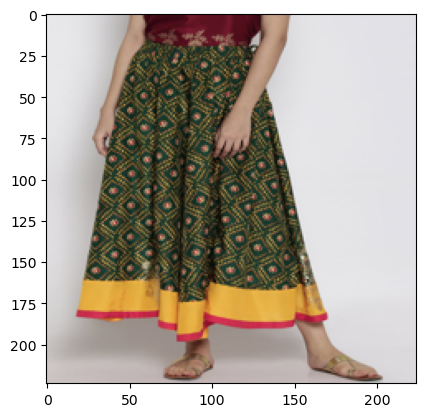

In [7]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from urllib import request

print(url)
res = request.urlopen(url).read()
print(res)
img = Image.open(BytesIO(res)).resize((224,224))
print(img)
plt.imshow(img)

In [8]:
img_array = image.img_to_array(img)
img_array.shape

(224, 224, 3)

In [9]:
expanded_img_array = np.expand_dims(img, axis=0)

expanded_img_array.shape

(1, 224, 224, 3)

In [10]:
preprocessed_img = preprocess_input(expanded_img_array)
preprocessed_img.shape

(1, 224, 224, 3)

In [11]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

In [12]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])


In [13]:
vgg = VGG16(include_top=False,
    weights="imagenet",
    
    input_shape=(224,224,3))
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [14]:
for layer in vgg.layers:
  layer.trainabe = False

In [15]:
vgg_model = tensorflow.keras.Sequential([
    vgg,
    GlobalMaxPooling2D()
])


In [16]:
images = []

for i in range(data.shape[0]):
  images.append(data['img1'].iloc[i])

print(images[0])

http://assets.myntassets.com/v1/assets/images/10247017/2019/7/19/89db9fec-b898-4ce0-bd4b-e84095b2154e1563516226861-Global-Desi-Women-Tunics-4441563516225272-1.jpg


In [19]:
vgg_feature_list = []
for url in tqdm(images):
  res = request.urlopen(url).read()
  img = Image.open(BytesIO(res)).resize((224,224))
  img_array = image.img_to_array(img)
  # print(img_array)
  expanded_img_array = np.expand_dims(img_array, axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)

  result = vgg_model.predict(preprocessed_img).flatten()
  
  normalized_result = result / norm(result)
  vgg_feature_list.append(normalized_result)

  0%|                                                                                         | 0/7432 [00:00<?, ?it/s]

1/1 [==============================] - 0s 261ms/step


  0%|                                                                                 | 1/7432 [00:00<54:31,  2.27it/s]

1/1 [==============================] - 0s 261ms/step


  0%|                                                                                 | 2/7432 [00:00<53:22,  2.32it/s]

1/1 [==============================] - 0s 247ms/step


  0%|                                                                                 | 3/7432 [00:01<59:34,  2.08it/s]

1/1 [==============================] - 0s 341ms/step


  0%|                                                                               | 4/7432 [00:01<1:00:16,  2.05it/s]

1/1 [==============================] - 0s 261ms/step


  0%|                                                                                 | 5/7432 [00:02<56:25,  2.19it/s]

1/1 [==============================] - 0s 255ms/step


  0%|                                                                                 | 6/7432 [00:02<54:56,  2.25it/s]

1/1 [==============================] - 0s 235ms/step


  0%|                                                                                 | 7/7432 [00:03<52:40,  2.35it/s]

1/1 [==============================] - 0s 266ms/step


  0%|                                                                                 | 8/7432 [00:03<51:47,  2.39it/s]

1/1 [==============================] - 0s 260ms/step


  0%|                                                                                 | 9/7432 [00:03<51:22,  2.41it/s]

1/1 [==============================] - 0s 259ms/step


  0%|                                                                                | 10/7432 [00:04<51:06,  2.42it/s]

1/1 [==============================] - 0s 285ms/step


  0%|                                                                                | 11/7432 [00:04<53:03,  2.33it/s]

1/1 [==============================] - 0s 238ms/step


  0%|▏                                                                               | 12/7432 [00:05<51:11,  2.42it/s]

1/1 [==============================] - 0s 252ms/step


  0%|▏                                                                               | 13/7432 [00:05<52:01,  2.38it/s]

1/1 [==============================] - 0s 241ms/step


  0%|▏                                                                               | 14/7432 [00:06<52:09,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


  0%|▏                                                                               | 15/7432 [00:06<56:49,  2.18it/s]

1/1 [==============================] - 0s 240ms/step


  0%|▏                                                                               | 16/7432 [00:07<58:30,  2.11it/s]

1/1 [==============================] - 0s 258ms/step


  0%|▏                                                                               | 17/7432 [00:07<56:16,  2.20it/s]

1/1 [==============================] - 0s 288ms/step


  0%|▏                                                                               | 18/7432 [00:07<56:15,  2.20it/s]

1/1 [==============================] - 0s 286ms/step


  0%|▏                                                                               | 19/7432 [00:08<56:27,  2.19it/s]

1/1 [==============================] - 0s 248ms/step


  0%|▏                                                                               | 20/7432 [00:08<54:18,  2.27it/s]

1/1 [==============================] - 0s 267ms/step


  0%|▏                                                                               | 21/7432 [00:09<53:38,  2.30it/s]

1/1 [==============================] - 0s 256ms/step


  0%|▏                                                                               | 22/7432 [00:09<57:50,  2.14it/s]

1/1 [==============================] - 0s 254ms/step


  0%|▏                                                                               | 23/7432 [00:10<55:11,  2.24it/s]

1/1 [==============================] - 0s 237ms/step


  0%|▎                                                                               | 24/7432 [00:10<53:57,  2.29it/s]

1/1 [==============================] - 0s 252ms/step


  0%|▎                                                                               | 25/7432 [00:11<56:50,  2.17it/s]

1/1 [==============================] - 0s 237ms/step


  0%|▎                                                                               | 26/7432 [00:11<53:37,  2.30it/s]

1/1 [==============================] - 0s 242ms/step


  0%|▎                                                                               | 27/7432 [00:11<52:49,  2.34it/s]

1/1 [==============================] - 0s 245ms/step


  0%|▎                                                                               | 28/7432 [00:12<50:53,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


  0%|▎                                                                               | 29/7432 [00:12<49:59,  2.47it/s]

1/1 [==============================] - 0s 262ms/step


  0%|▎                                                                               | 30/7432 [00:13<51:34,  2.39it/s]

1/1 [==============================] - 0s 227ms/step


  0%|▎                                                                               | 31/7432 [00:13<52:41,  2.34it/s]

1/1 [==============================] - 0s 233ms/step


  0%|▎                                                                               | 32/7432 [00:13<51:00,  2.42it/s]

1/1 [==============================] - 0s 248ms/step


  0%|▎                                                                               | 33/7432 [00:14<52:05,  2.37it/s]

1/1 [==============================] - 0s 236ms/step


  0%|▎                                                                               | 34/7432 [00:14<51:40,  2.39it/s]

1/1 [==============================] - 0s 227ms/step


  0%|▍                                                                               | 35/7432 [00:15<50:35,  2.44it/s]

1/1 [==============================] - 0s 238ms/step


  0%|▍                                                                               | 36/7432 [00:15<52:43,  2.34it/s]

1/1 [==============================] - 0s 254ms/step


  0%|▍                                                                               | 37/7432 [00:16<51:11,  2.41it/s]

1/1 [==============================] - 0s 270ms/step


  1%|▍                                                                               | 38/7432 [00:16<51:39,  2.39it/s]

1/1 [==============================] - 0s 240ms/step


  1%|▍                                                                               | 39/7432 [00:16<50:39,  2.43it/s]

1/1 [==============================] - 0s 245ms/step


  1%|▍                                                                               | 40/7432 [00:17<50:54,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


  1%|▍                                                                               | 41/7432 [00:17<48:53,  2.52it/s]

1/1 [==============================] - 0s 249ms/step


  1%|▍                                                                               | 42/7432 [00:18<50:16,  2.45it/s]

1/1 [==============================] - 0s 242ms/step


  1%|▍                                                                               | 43/7432 [00:18<51:41,  2.38it/s]

1/1 [==============================] - 0s 248ms/step


  1%|▍                                                                               | 44/7432 [00:18<50:57,  2.42it/s]

1/1 [==============================] - 0s 260ms/step


  1%|▍                                                                               | 45/7432 [00:19<50:12,  2.45it/s]

1/1 [==============================] - 0s 232ms/step


  1%|▍                                                                               | 46/7432 [00:19<49:40,  2.48it/s]

1/1 [==============================] - 0s 268ms/step


  1%|▌                                                                               | 47/7432 [00:20<49:46,  2.47it/s]

1/1 [==============================] - 0s 247ms/step


  1%|▌                                                                               | 48/7432 [00:20<54:49,  2.24it/s]

1/1 [==============================] - 0s 250ms/step


  1%|▌                                                                               | 49/7432 [00:21<55:02,  2.24it/s]

1/1 [==============================] - 0s 264ms/step


  1%|▌                                                                             | 50/7432 [00:21<1:00:33,  2.03it/s]

1/1 [==============================] - 0s 242ms/step


  1%|▌                                                                               | 51/7432 [00:22<57:24,  2.14it/s]

1/1 [==============================] - 0s 233ms/step


  1%|▌                                                                               | 52/7432 [00:22<59:25,  2.07it/s]

1/1 [==============================] - 0s 257ms/step


  1%|▌                                                                               | 53/7432 [00:23<58:17,  2.11it/s]

1/1 [==============================] - 0s 259ms/step


  1%|▌                                                                               | 54/7432 [00:23<57:34,  2.14it/s]

1/1 [==============================] - 0s 237ms/step


  1%|▌                                                                               | 55/7432 [00:23<55:01,  2.23it/s]

1/1 [==============================] - 0s 260ms/step


  1%|▌                                                                               | 56/7432 [00:24<53:48,  2.28it/s]

1/1 [==============================] - 0s 245ms/step


  1%|▌                                                                               | 57/7432 [00:24<51:37,  2.38it/s]

1/1 [==============================] - 0s 279ms/step


  1%|▌                                                                               | 58/7432 [00:25<53:32,  2.30it/s]

1/1 [==============================] - 0s 241ms/step


  1%|▋                                                                               | 59/7432 [00:25<51:57,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


  1%|▋                                                                               | 60/7432 [00:26<51:43,  2.38it/s]

1/1 [==============================] - 0s 253ms/step


  1%|▋                                                                               | 61/7432 [00:26<51:35,  2.38it/s]

1/1 [==============================] - 0s 228ms/step


  1%|▋                                                                               | 62/7432 [00:26<49:47,  2.47it/s]

1/1 [==============================] - 0s 234ms/step


  1%|▋                                                                               | 63/7432 [00:27<48:52,  2.51it/s]

1/1 [==============================] - 0s 235ms/step


  1%|▋                                                                               | 64/7432 [00:27<49:38,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


  1%|▋                                                                               | 65/7432 [00:27<48:59,  2.51it/s]

1/1 [==============================] - 0s 243ms/step


  1%|▋                                                                               | 66/7432 [00:28<47:59,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


  1%|▋                                                                               | 67/7432 [00:28<47:35,  2.58it/s]

1/1 [==============================] - 0s 222ms/step


  1%|▋                                                                               | 68/7432 [00:29<46:33,  2.64it/s]

1/1 [==============================] - 0s 251ms/step


  1%|▋                                                                               | 69/7432 [00:29<47:07,  2.60it/s]

1/1 [==============================] - 0s 244ms/step


  1%|▊                                                                               | 70/7432 [00:29<47:33,  2.58it/s]

1/1 [==============================] - 0s 233ms/step


  1%|▊                                                                               | 71/7432 [00:30<51:20,  2.39it/s]

1/1 [==============================] - 0s 238ms/step


  1%|▊                                                                               | 72/7432 [00:30<50:52,  2.41it/s]

1/1 [==============================] - 0s 238ms/step


  1%|▊                                                                               | 73/7432 [00:31<50:35,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


  1%|▊                                                                               | 74/7432 [00:31<50:07,  2.45it/s]

1/1 [==============================] - 0s 246ms/step


  1%|▊                                                                               | 75/7432 [00:32<51:34,  2.38it/s]

1/1 [==============================] - 0s 249ms/step


  1%|▊                                                                               | 76/7432 [00:32<51:32,  2.38it/s]

1/1 [==============================] - 0s 238ms/step


  1%|▊                                                                               | 77/7432 [00:32<51:03,  2.40it/s]

1/1 [==============================] - 0s 255ms/step


  1%|▊                                                                               | 78/7432 [00:33<52:21,  2.34it/s]

1/1 [==============================] - 0s 256ms/step


  1%|▊                                                                               | 79/7432 [00:33<52:46,  2.32it/s]

1/1 [==============================] - 0s 242ms/step


  1%|▊                                                                               | 80/7432 [00:34<53:07,  2.31it/s]

1/1 [==============================] - 0s 254ms/step


  1%|▊                                                                               | 81/7432 [00:34<52:59,  2.31it/s]

1/1 [==============================] - 0s 259ms/step


  1%|▉                                                                               | 82/7432 [00:35<52:59,  2.31it/s]

1/1 [==============================] - 0s 246ms/step


  1%|▉                                                                               | 83/7432 [00:35<53:04,  2.31it/s]

1/1 [==============================] - 0s 239ms/step


  1%|▉                                                                               | 84/7432 [00:35<52:23,  2.34it/s]

1/1 [==============================] - 0s 227ms/step


  1%|▉                                                                               | 85/7432 [00:36<51:04,  2.40it/s]

1/1 [==============================] - 0s 246ms/step


  1%|▉                                                                               | 86/7432 [00:36<50:04,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


  1%|▉                                                                               | 87/7432 [00:37<49:32,  2.47it/s]

1/1 [==============================] - 0s 222ms/step


  1%|▉                                                                               | 88/7432 [00:37<50:14,  2.44it/s]

1/1 [==============================] - 0s 253ms/step


  1%|▉                                                                               | 89/7432 [00:37<49:56,  2.45it/s]

1/1 [==============================] - 0s 249ms/step


  1%|▉                                                                               | 90/7432 [00:38<50:54,  2.40it/s]

1/1 [==============================] - 0s 244ms/step


  1%|▉                                                                               | 91/7432 [00:38<51:45,  2.36it/s]

1/1 [==============================] - 0s 247ms/step


  1%|▉                                                                               | 92/7432 [00:39<51:51,  2.36it/s]

1/1 [==============================] - 0s 252ms/step


  1%|█                                                                               | 93/7432 [00:39<51:53,  2.36it/s]

1/1 [==============================] - 0s 237ms/step


  1%|█                                                                               | 94/7432 [00:40<50:41,  2.41it/s]

1/1 [==============================] - 0s 263ms/step


  1%|█                                                                               | 95/7432 [00:40<50:15,  2.43it/s]

1/1 [==============================] - 0s 237ms/step


  1%|█                                                                               | 96/7432 [00:40<48:34,  2.52it/s]

1/1 [==============================] - 0s 271ms/step


  1%|█                                                                               | 97/7432 [00:41<49:24,  2.47it/s]

1/1 [==============================] - 0s 219ms/step


  1%|█                                                                               | 98/7432 [00:41<48:52,  2.50it/s]

1/1 [==============================] - 0s 244ms/step


  1%|█                                                                               | 99/7432 [00:41<48:10,  2.54it/s]

1/1 [==============================] - 0s 238ms/step


  1%|█                                                                              | 100/7432 [00:42<48:30,  2.52it/s]

1/1 [==============================] - 0s 239ms/step


  1%|█                                                                              | 101/7432 [00:42<55:05,  2.22it/s]

1/1 [==============================] - 0s 270ms/step


  1%|█                                                                              | 102/7432 [00:43<54:13,  2.25it/s]

1/1 [==============================] - 0s 249ms/step


  1%|█                                                                              | 103/7432 [00:43<54:15,  2.25it/s]

1/1 [==============================] - 0s 262ms/step


  1%|█                                                                            | 104/7432 [00:44<1:02:45,  1.95it/s]

1/1 [==============================] - 0s 239ms/step


  1%|█                                                                              | 105/7432 [00:44<58:58,  2.07it/s]

1/1 [==============================] - 0s 286ms/step


  1%|█▏                                                                             | 106/7432 [00:45<57:57,  2.11it/s]

1/1 [==============================] - 0s 245ms/step


  1%|█▏                                                                             | 107/7432 [00:45<54:55,  2.22it/s]

1/1 [==============================] - 0s 248ms/step


  1%|█▏                                                                             | 108/7432 [00:46<55:51,  2.19it/s]

1/1 [==============================] - 0s 243ms/step


  1%|█▏                                                                             | 109/7432 [00:46<56:34,  2.16it/s]

1/1 [==============================] - 0s 239ms/step


  1%|█▏                                                                             | 110/7432 [00:47<55:21,  2.20it/s]

1/1 [==============================] - 0s 236ms/step


  1%|█▏                                                                             | 111/7432 [00:47<55:17,  2.21it/s]

1/1 [==============================] - 0s 251ms/step


  2%|█▏                                                                             | 112/7432 [00:48<54:34,  2.24it/s]

1/1 [==============================] - 0s 236ms/step


  2%|█▏                                                                             | 113/7432 [00:48<56:27,  2.16it/s]

1/1 [==============================] - 0s 236ms/step


  2%|█▏                                                                             | 114/7432 [00:49<56:32,  2.16it/s]

1/1 [==============================] - 0s 249ms/step


  2%|█▏                                                                             | 115/7432 [00:49<54:32,  2.24it/s]

1/1 [==============================] - 0s 233ms/step


  2%|█▏                                                                             | 116/7432 [00:49<56:39,  2.15it/s]

1/1 [==============================] - 0s 243ms/step


  2%|█▏                                                                             | 117/7432 [00:50<53:59,  2.26it/s]

1/1 [==============================] - 0s 233ms/step


  2%|█▎                                                                             | 118/7432 [00:50<55:23,  2.20it/s]

1/1 [==============================] - 0s 229ms/step


  2%|█▎                                                                             | 119/7432 [00:51<53:04,  2.30it/s]

1/1 [==============================] - 0s 236ms/step


  2%|█▎                                                                             | 120/7432 [00:51<58:56,  2.07it/s]

1/1 [==============================] - 0s 228ms/step


  2%|█▎                                                                             | 121/7432 [00:52<54:45,  2.23it/s]

1/1 [==============================] - 0s 227ms/step


  2%|█▎                                                                             | 122/7432 [00:52<53:41,  2.27it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▎                                                                             | 123/7432 [00:52<50:55,  2.39it/s]

1/1 [==============================] - 0s 227ms/step


  2%|█▎                                                                             | 124/7432 [00:53<49:11,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


  2%|█▎                                                                             | 125/7432 [00:53<51:23,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▎                                                                             | 126/7432 [00:54<50:20,  2.42it/s]

1/1 [==============================] - 0s 228ms/step


  2%|█▎                                                                             | 127/7432 [00:54<52:28,  2.32it/s]

1/1 [==============================] - 0s 244ms/step


  2%|█▎                                                                             | 128/7432 [00:55<51:45,  2.35it/s]

1/1 [==============================] - 0s 233ms/step


  2%|█▎                                                                             | 129/7432 [00:55<53:38,  2.27it/s]

1/1 [==============================] - 0s 232ms/step


  2%|█▍                                                                             | 130/7432 [00:55<51:31,  2.36it/s]

1/1 [==============================] - 0s 230ms/step


  2%|█▍                                                                             | 131/7432 [00:56<48:51,  2.49it/s]

1/1 [==============================] - 0s 332ms/step


  2%|█▍                                                                             | 132/7432 [00:56<51:36,  2.36it/s]

1/1 [==============================] - 0s 223ms/step


  2%|█▍                                                                             | 133/7432 [00:57<51:19,  2.37it/s]

1/1 [==============================] - 0s 228ms/step


  2%|█▍                                                                             | 134/7432 [00:57<50:39,  2.40it/s]

1/1 [==============================] - 0s 225ms/step


  2%|█▍                                                                             | 135/7432 [00:57<48:55,  2.49it/s]

1/1 [==============================] - 0s 240ms/step


  2%|█▍                                                                             | 136/7432 [00:58<48:30,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


  2%|█▍                                                                             | 137/7432 [00:58<47:48,  2.54it/s]

1/1 [==============================] - 0s 229ms/step


  2%|█▍                                                                             | 138/7432 [00:59<48:08,  2.53it/s]

1/1 [==============================] - 0s 248ms/step


  2%|█▍                                                                             | 139/7432 [00:59<50:12,  2.42it/s]

1/1 [==============================] - 0s 213ms/step


  2%|█▍                                                                             | 140/7432 [00:59<47:29,  2.56it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▍                                                                             | 141/7432 [01:00<49:04,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


  2%|█▌                                                                             | 142/7432 [01:00<49:20,  2.46it/s]

1/1 [==============================] - 0s 222ms/step


  2%|█▌                                                                             | 143/7432 [01:01<47:36,  2.55it/s]

1/1 [==============================] - 0s 237ms/step


  2%|█▌                                                                             | 144/7432 [01:01<47:53,  2.54it/s]

1/1 [==============================] - 0s 217ms/step


  2%|█▌                                                                             | 145/7432 [01:01<49:06,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


  2%|█▌                                                                             | 146/7432 [01:02<48:20,  2.51it/s]

1/1 [==============================] - 0s 230ms/step


  2%|█▌                                                                             | 147/7432 [01:02<51:35,  2.35it/s]

1/1 [==============================] - 0s 245ms/step


  2%|█▌                                                                             | 148/7432 [01:03<51:06,  2.38it/s]

1/1 [==============================] - 0s 255ms/step


  2%|█▌                                                                             | 149/7432 [01:03<53:56,  2.25it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▌                                                                             | 150/7432 [01:04<54:04,  2.24it/s]

1/1 [==============================] - 0s 236ms/step


  2%|█▌                                                                             | 151/7432 [01:04<52:01,  2.33it/s]

1/1 [==============================] - 0s 244ms/step


  2%|█▌                                                                             | 152/7432 [01:04<50:20,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


  2%|█▋                                                                             | 153/7432 [01:05<54:22,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▋                                                                             | 154/7432 [01:05<53:07,  2.28it/s]

1/1 [==============================] - 0s 239ms/step


  2%|█▋                                                                             | 155/7432 [01:06<51:27,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


  2%|█▋                                                                             | 156/7432 [01:06<50:39,  2.39it/s]

1/1 [==============================] - 0s 237ms/step


  2%|█▋                                                                             | 157/7432 [01:07<49:08,  2.47it/s]

1/1 [==============================] - 0s 235ms/step


  2%|█▋                                                                             | 158/7432 [01:07<48:21,  2.51it/s]

1/1 [==============================] - 0s 247ms/step


  2%|█▋                                                                             | 159/7432 [01:07<49:21,  2.46it/s]

1/1 [==============================] - 0s 240ms/step


  2%|█▋                                                                             | 160/7432 [01:08<50:03,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▋                                                                             | 161/7432 [01:08<49:10,  2.46it/s]

1/1 [==============================] - 0s 229ms/step


  2%|█▋                                                                             | 162/7432 [01:09<47:33,  2.55it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▋                                                                             | 163/7432 [01:09<47:36,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


  2%|█▋                                                                             | 164/7432 [01:09<47:30,  2.55it/s]

1/1 [==============================] - 0s 226ms/step


  2%|█▊                                                                             | 165/7432 [01:10<48:13,  2.51it/s]

1/1 [==============================] - 0s 225ms/step


  2%|█▊                                                                             | 166/7432 [01:10<48:19,  2.51it/s]

1/1 [==============================] - 0s 222ms/step


  2%|█▊                                                                             | 167/7432 [01:11<48:34,  2.49it/s]

1/1 [==============================] - 0s 245ms/step


  2%|█▊                                                                             | 168/7432 [01:11<49:17,  2.46it/s]

1/1 [==============================] - 0s 226ms/step


  2%|█▊                                                                             | 169/7432 [01:11<49:14,  2.46it/s]

1/1 [==============================] - 0s 336ms/step


  2%|█▊                                                                             | 170/7432 [01:12<52:26,  2.31it/s]

1/1 [==============================] - 0s 224ms/step


  2%|█▊                                                                             | 171/7432 [01:12<51:09,  2.37it/s]

1/1 [==============================] - 0s 232ms/step


  2%|█▊                                                                             | 172/7432 [01:13<50:56,  2.38it/s]

1/1 [==============================] - 0s 240ms/step


  2%|█▊                                                                             | 173/7432 [01:13<50:11,  2.41it/s]

1/1 [==============================] - 0s 221ms/step


  2%|█▊                                                                             | 174/7432 [01:13<48:35,  2.49it/s]

1/1 [==============================] - 0s 233ms/step


  2%|█▊                                                                             | 175/7432 [01:14<47:35,  2.54it/s]

1/1 [==============================] - 0s 249ms/step


  2%|█▊                                                                             | 176/7432 [01:14<47:35,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


  2%|█▉                                                                             | 177/7432 [01:15<46:42,  2.59it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▉                                                                             | 178/7432 [01:15<45:30,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


  2%|█▉                                                                             | 179/7432 [01:15<45:26,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▉                                                                             | 180/7432 [01:16<45:39,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


  2%|█▉                                                                             | 181/7432 [01:16<45:20,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


  2%|█▉                                                                             | 182/7432 [01:16<44:57,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


  2%|█▉                                                                             | 183/7432 [01:17<44:12,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


  2%|█▉                                                                             | 184/7432 [01:17<46:30,  2.60it/s]

1/1 [==============================] - 0s 237ms/step


  2%|█▉                                                                             | 185/7432 [01:18<46:12,  2.61it/s]

1/1 [==============================] - 0s 218ms/step


  3%|█▉                                                                             | 186/7432 [01:18<45:26,  2.66it/s]

1/1 [==============================] - 0s 239ms/step


  3%|█▉                                                                             | 187/7432 [01:18<47:38,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


  3%|█▉                                                                             | 188/7432 [01:19<50:57,  2.37it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██                                                                             | 189/7432 [01:19<48:52,  2.47it/s]

1/1 [==============================] - 0s 247ms/step


  3%|██                                                                             | 190/7432 [01:20<48:59,  2.46it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██                                                                             | 191/7432 [01:20<48:16,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██                                                                             | 192/7432 [01:20<46:29,  2.60it/s]

1/1 [==============================] - 0s 221ms/step


  3%|██                                                                             | 193/7432 [01:21<45:35,  2.65it/s]

1/1 [==============================] - 0s 223ms/step


  3%|██                                                                             | 194/7432 [01:21<45:31,  2.65it/s]

1/1 [==============================] - 0s 217ms/step


  3%|██                                                                             | 195/7432 [01:21<45:00,  2.68it/s]

1/1 [==============================] - 0s 225ms/step


  3%|██                                                                             | 196/7432 [01:22<45:57,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


  3%|██                                                                             | 197/7432 [01:22<45:51,  2.63it/s]

1/1 [==============================] - 0s 251ms/step


  3%|██                                                                             | 198/7432 [01:23<47:32,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


  3%|██                                                                             | 199/7432 [01:23<46:42,  2.58it/s]

1/1 [==============================] - 0s 231ms/step


  3%|██▏                                                                            | 200/7432 [01:23<47:44,  2.52it/s]

1/1 [==============================] - 0s 247ms/step


  3%|██▏                                                                            | 201/7432 [01:24<46:58,  2.57it/s]

1/1 [==============================] - 0s 227ms/step


  3%|██▏                                                                            | 202/7432 [01:24<46:51,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


  3%|██▏                                                                            | 203/7432 [01:25<46:42,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


  3%|██▏                                                                            | 204/7432 [01:25<47:15,  2.55it/s]

1/1 [==============================] - 0s 231ms/step


  3%|██▏                                                                            | 205/7432 [01:25<47:53,  2.51it/s]

1/1 [==============================] - 0s 246ms/step


  3%|██▏                                                                            | 206/7432 [01:26<48:32,  2.48it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██▏                                                                            | 207/7432 [01:26<46:53,  2.57it/s]

1/1 [==============================] - 0s 238ms/step


  3%|██▏                                                                            | 208/7432 [01:27<46:35,  2.58it/s]

1/1 [==============================] - 0s 238ms/step


  3%|██▏                                                                            | 209/7432 [01:27<48:07,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▏                                                                            | 210/7432 [01:27<47:35,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██▏                                                                            | 211/7432 [01:28<53:48,  2.24it/s]

1/1 [==============================] - 0s 243ms/step


  3%|██▎                                                                            | 212/7432 [01:28<52:30,  2.29it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██▎                                                                            | 213/7432 [01:29<49:59,  2.41it/s]

1/1 [==============================] - 0s 243ms/step


  3%|██▎                                                                            | 214/7432 [01:29<49:25,  2.43it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██▎                                                                            | 215/7432 [01:30<48:14,  2.49it/s]

1/1 [==============================] - 0s 227ms/step


  3%|██▎                                                                            | 216/7432 [01:30<52:49,  2.28it/s]

1/1 [==============================] - 0s 243ms/step


  3%|██▎                                                                            | 217/7432 [01:30<52:02,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


  3%|██▎                                                                            | 218/7432 [01:31<50:49,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▎                                                                            | 219/7432 [01:31<49:49,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▎                                                                            | 220/7432 [01:32<49:34,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


  3%|██▎                                                                            | 221/7432 [01:32<49:14,  2.44it/s]

1/1 [==============================] - 0s 253ms/step


  3%|██▎                                                                            | 222/7432 [01:32<49:09,  2.44it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▎                                                                            | 223/7432 [01:33<48:35,  2.47it/s]

1/1 [==============================] - 0s 233ms/step


  3%|██▍                                                                            | 224/7432 [01:33<47:14,  2.54it/s]

1/1 [==============================] - 0s 234ms/step


  3%|██▍                                                                            | 225/7432 [01:34<50:02,  2.40it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▍                                                                            | 226/7432 [01:34<48:58,  2.45it/s]

1/1 [==============================] - 0s 227ms/step


  3%|██▍                                                                            | 227/7432 [01:35<48:52,  2.46it/s]

1/1 [==============================] - 0s 231ms/step


  3%|██▍                                                                            | 228/7432 [01:35<47:52,  2.51it/s]

1/1 [==============================] - 0s 223ms/step


  3%|██▍                                                                            | 229/7432 [01:35<47:05,  2.55it/s]

1/1 [==============================] - 0s 241ms/step


  3%|██▍                                                                            | 230/7432 [01:36<50:33,  2.37it/s]

1/1 [==============================] - 0s 234ms/step


  3%|██▍                                                                            | 231/7432 [01:36<50:12,  2.39it/s]

1/1 [==============================] - 0s 229ms/step


  3%|██▍                                                                            | 232/7432 [01:37<48:03,  2.50it/s]

1/1 [==============================] - 0s 253ms/step


  3%|██▍                                                                            | 233/7432 [01:37<47:22,  2.53it/s]

1/1 [==============================] - 0s 236ms/step


  3%|██▍                                                                            | 234/7432 [01:37<46:27,  2.58it/s]

1/1 [==============================] - 0s 254ms/step


  3%|██▍                                                                            | 235/7432 [01:38<49:30,  2.42it/s]

1/1 [==============================] - 0s 254ms/step


  3%|██▌                                                                            | 236/7432 [01:38<49:24,  2.43it/s]

1/1 [==============================] - 0s 264ms/step


  3%|██▌                                                                            | 237/7432 [01:39<50:05,  2.39it/s]

1/1 [==============================] - 0s 264ms/step


  3%|██▌                                                                            | 238/7432 [01:39<49:54,  2.40it/s]

1/1 [==============================] - 0s 241ms/step


  3%|██▌                                                                            | 239/7432 [01:39<49:26,  2.42it/s]

1/1 [==============================] - 0s 237ms/step


  3%|██▌                                                                            | 240/7432 [01:40<48:52,  2.45it/s]

1/1 [==============================] - 0s 260ms/step


  3%|██▌                                                                            | 241/7432 [01:40<48:32,  2.47it/s]

1/1 [==============================] - 0s 228ms/step


  3%|██▌                                                                            | 242/7432 [01:41<47:15,  2.54it/s]

1/1 [==============================] - 0s 257ms/step


  3%|██▌                                                                            | 243/7432 [01:41<47:09,  2.54it/s]

1/1 [==============================] - 0s 234ms/step


  3%|██▌                                                                            | 244/7432 [01:41<46:10,  2.59it/s]

1/1 [==============================] - 0s 244ms/step


  3%|██▌                                                                            | 245/7432 [01:42<45:57,  2.61it/s]

1/1 [==============================] - 0s 242ms/step


  3%|██▌                                                                            | 246/7432 [01:42<46:28,  2.58it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▋                                                                            | 247/7432 [01:42<45:52,  2.61it/s]

1/1 [==============================] - 0s 231ms/step


  3%|██▋                                                                            | 248/7432 [01:43<45:00,  2.66it/s]

1/1 [==============================] - 0s 234ms/step


  3%|██▋                                                                            | 249/7432 [01:43<44:53,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


  3%|██▋                                                                            | 250/7432 [01:44<45:44,  2.62it/s]

1/1 [==============================] - 0s 226ms/step


  3%|██▋                                                                            | 251/7432 [01:44<45:16,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


  3%|██▋                                                                            | 252/7432 [01:44<45:05,  2.65it/s]

1/1 [==============================] - 0s 225ms/step


  3%|██▋                                                                            | 253/7432 [01:45<44:27,  2.69it/s]

1/1 [==============================] - 0s 242ms/step


  3%|██▋                                                                            | 254/7432 [01:45<45:57,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


  3%|██▋                                                                            | 255/7432 [01:45<44:37,  2.68it/s]

1/1 [==============================] - 0s 222ms/step


  3%|██▋                                                                            | 256/7432 [01:46<43:17,  2.76it/s]

1/1 [==============================] - 0s 248ms/step


  3%|██▋                                                                            | 257/7432 [01:46<44:10,  2.71it/s]

1/1 [==============================] - 0s 218ms/step


  3%|██▋                                                                            | 258/7432 [01:47<43:50,  2.73it/s]

1/1 [==============================] - 0s 233ms/step


  3%|██▊                                                                            | 259/7432 [01:47<44:45,  2.67it/s]

1/1 [==============================] - 0s 238ms/step


  3%|██▊                                                                            | 260/7432 [01:47<46:17,  2.58it/s]

1/1 [==============================] - 0s 217ms/step


  4%|██▊                                                                            | 261/7432 [01:48<44:48,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


  4%|██▊                                                                            | 262/7432 [01:48<44:25,  2.69it/s]

1/1 [==============================] - 0s 220ms/step


  4%|██▊                                                                            | 263/7432 [01:48<44:47,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


  4%|██▊                                                                            | 264/7432 [01:49<44:43,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


  4%|██▊                                                                            | 265/7432 [01:49<44:55,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


  4%|██▊                                                                            | 266/7432 [01:50<44:21,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


  4%|██▊                                                                            | 267/7432 [01:50<43:38,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


  4%|██▊                                                                            | 268/7432 [01:50<44:02,  2.71it/s]

1/1 [==============================] - 0s 226ms/step


  4%|██▊                                                                            | 269/7432 [01:51<45:30,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


  4%|██▊                                                                            | 270/7432 [01:51<48:01,  2.49it/s]

1/1 [==============================] - 0s 243ms/step


  4%|██▉                                                                            | 271/7432 [01:52<47:40,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


  4%|██▉                                                                            | 272/7432 [01:52<47:00,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


  4%|██▉                                                                            | 273/7432 [01:52<45:32,  2.62it/s]

1/1 [==============================] - 0s 229ms/step


  4%|██▉                                                                            | 274/7432 [01:53<44:25,  2.69it/s]

1/1 [==============================] - 0s 236ms/step


  4%|██▉                                                                            | 275/7432 [01:53<45:01,  2.65it/s]

1/1 [==============================] - 0s 248ms/step


  4%|██▉                                                                            | 276/7432 [01:53<45:48,  2.60it/s]

1/1 [==============================] - 0s 225ms/step


  4%|██▉                                                                            | 277/7432 [01:54<45:43,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


  4%|██▉                                                                            | 278/7432 [01:54<44:49,  2.66it/s]

1/1 [==============================] - 0s 347ms/step


  4%|██▉                                                                            | 279/7432 [01:55<48:04,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


  4%|██▉                                                                            | 280/7432 [01:55<48:47,  2.44it/s]

1/1 [==============================] - 0s 230ms/step


  4%|██▉                                                                            | 281/7432 [01:55<49:01,  2.43it/s]

1/1 [==============================] - 0s 238ms/step


  4%|██▉                                                                            | 282/7432 [01:56<47:47,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


  4%|███                                                                            | 283/7432 [01:56<47:08,  2.53it/s]

1/1 [==============================] - 0s 242ms/step


  4%|███                                                                            | 284/7432 [01:57<46:59,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


  4%|███                                                                            | 285/7432 [01:57<46:19,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


  4%|███                                                                            | 286/7432 [01:57<47:12,  2.52it/s]

1/1 [==============================] - 0s 241ms/step


  4%|███                                                                            | 287/7432 [01:58<46:02,  2.59it/s]

1/1 [==============================] - 0s 229ms/step


  4%|███                                                                            | 288/7432 [01:58<44:36,  2.67it/s]

1/1 [==============================] - 0s 221ms/step


  4%|███                                                                            | 289/7432 [01:58<43:55,  2.71it/s]

1/1 [==============================] - 0s 236ms/step


  4%|███                                                                            | 290/7432 [01:59<44:44,  2.66it/s]

1/1 [==============================] - 0s 220ms/step


  4%|███                                                                            | 291/7432 [01:59<43:37,  2.73it/s]

1/1 [==============================] - 0s 228ms/step


  4%|███                                                                            | 292/7432 [02:00<42:52,  2.78it/s]

1/1 [==============================] - 0s 224ms/step


  4%|███                                                                            | 293/7432 [02:00<42:40,  2.79it/s]

1/1 [==============================] - 0s 234ms/step


  4%|███▏                                                                           | 294/7432 [02:00<42:52,  2.77it/s]

1/1 [==============================] - 0s 221ms/step


  4%|███▏                                                                           | 295/7432 [02:01<43:07,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


  4%|███▏                                                                           | 296/7432 [02:01<43:18,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


  4%|███▏                                                                           | 297/7432 [02:01<43:14,  2.75it/s]

1/1 [==============================] - 0s 234ms/step


  4%|███▏                                                                           | 298/7432 [02:02<43:26,  2.74it/s]

1/1 [==============================] - 0s 231ms/step


  4%|███▏                                                                           | 299/7432 [02:02<44:22,  2.68it/s]

1/1 [==============================] - 0s 222ms/step


  4%|███▏                                                                           | 300/7432 [02:02<43:37,  2.72it/s]

1/1 [==============================] - 0s 260ms/step


  4%|███▏                                                                           | 301/7432 [02:03<43:47,  2.71it/s]

1/1 [==============================] - 0s 224ms/step


  4%|███▏                                                                           | 302/7432 [02:03<43:22,  2.74it/s]

1/1 [==============================] - 0s 230ms/step


  4%|███▏                                                                           | 303/7432 [02:04<43:09,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


  4%|███▏                                                                           | 304/7432 [02:04<43:49,  2.71it/s]

1/1 [==============================] - 0s 232ms/step


  4%|███▏                                                                           | 305/7432 [02:04<44:34,  2.66it/s]

1/1 [==============================] - 0s 217ms/step


  4%|███▎                                                                           | 306/7432 [02:05<44:46,  2.65it/s]

1/1 [==============================] - 0s 224ms/step


  4%|███▎                                                                           | 307/7432 [02:05<43:45,  2.71it/s]

1/1 [==============================] - 0s 230ms/step


  4%|███▎                                                                           | 308/7432 [02:05<44:45,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


  4%|███▎                                                                           | 309/7432 [02:06<43:45,  2.71it/s]

1/1 [==============================] - 0s 230ms/step


  4%|███▎                                                                           | 310/7432 [02:06<47:05,  2.52it/s]

1/1 [==============================] - 0s 220ms/step


  4%|███▎                                                                           | 311/7432 [02:07<45:51,  2.59it/s]

1/1 [==============================] - 0s 253ms/step


  4%|███▎                                                                           | 312/7432 [02:07<49:44,  2.39it/s]

1/1 [==============================] - 0s 235ms/step


  4%|███▎                                                                           | 313/7432 [02:08<50:15,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


  4%|███▎                                                                           | 314/7432 [02:08<51:15,  2.31it/s]

1/1 [==============================] - 0s 230ms/step


  4%|███▎                                                                           | 315/7432 [02:09<53:29,  2.22it/s]

1/1 [==============================] - 0s 232ms/step


  4%|███▎                                                                           | 316/7432 [02:09<54:35,  2.17it/s]

1/1 [==============================] - 0s 247ms/step


  4%|███▎                                                                           | 317/7432 [02:09<55:19,  2.14it/s]

1/1 [==============================] - 0s 232ms/step


  4%|███▎                                                                         | 318/7432 [02:10<1:01:13,  1.94it/s]

1/1 [==============================] - 0s 231ms/step


  4%|███▍                                                                           | 319/7432 [02:11<56:08,  2.11it/s]

1/1 [==============================] - 0s 233ms/step


  4%|███▍                                                                           | 320/7432 [02:11<57:30,  2.06it/s]

1/1 [==============================] - 0s 233ms/step


  4%|███▍                                                                           | 321/7432 [02:11<55:01,  2.15it/s]

1/1 [==============================] - 0s 235ms/step


  4%|███▍                                                                           | 322/7432 [02:12<52:11,  2.27it/s]

1/1 [==============================] - 0s 233ms/step


  4%|███▍                                                                           | 323/7432 [02:12<50:53,  2.33it/s]

1/1 [==============================] - 0s 338ms/step


  4%|███▍                                                                           | 324/7432 [02:13<55:06,  2.15it/s]

1/1 [==============================] - 0s 253ms/step


  4%|███▍                                                                           | 325/7432 [02:13<57:54,  2.05it/s]

1/1 [==============================] - 0s 236ms/step


  4%|███▍                                                                           | 326/7432 [02:14<54:32,  2.17it/s]

1/1 [==============================] - 0s 231ms/step


  4%|███▍                                                                           | 327/7432 [02:14<58:29,  2.02it/s]

1/1 [==============================] - 0s 213ms/step


  4%|███▍                                                                           | 328/7432 [02:15<55:09,  2.15it/s]

1/1 [==============================] - 0s 231ms/step


  4%|███▍                                                                           | 329/7432 [02:15<58:00,  2.04it/s]

1/1 [==============================] - 0s 239ms/step


  4%|███▌                                                                           | 330/7432 [02:16<53:24,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


  4%|███▌                                                                           | 331/7432 [02:16<52:49,  2.24it/s]

1/1 [==============================] - 0s 229ms/step


  4%|███▌                                                                           | 332/7432 [02:16<52:07,  2.27it/s]

1/1 [==============================] - 0s 231ms/step


  4%|███▌                                                                           | 333/7432 [02:17<52:40,  2.25it/s]

1/1 [==============================] - 0s 235ms/step


  4%|███▌                                                                           | 334/7432 [02:17<50:44,  2.33it/s]

1/1 [==============================] - 0s 245ms/step


  5%|███▌                                                                           | 335/7432 [02:18<51:32,  2.30it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▌                                                                           | 336/7432 [02:18<51:08,  2.31it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▌                                                                           | 337/7432 [02:19<49:11,  2.40it/s]

1/1 [==============================] - 0s 232ms/step


  5%|███▌                                                                           | 338/7432 [02:19<48:44,  2.43it/s]

1/1 [==============================] - 0s 232ms/step


  5%|███▌                                                                           | 339/7432 [02:19<48:01,  2.46it/s]

1/1 [==============================] - 0s 223ms/step


  5%|███▌                                                                           | 340/7432 [02:20<48:29,  2.44it/s]

1/1 [==============================] - 0s 226ms/step


  5%|███▌                                                                           | 341/7432 [02:20<47:33,  2.49it/s]

1/1 [==============================] - 0s 229ms/step


  5%|███▋                                                                           | 342/7432 [02:21<48:07,  2.46it/s]

1/1 [==============================] - 0s 247ms/step


  5%|███▋                                                                           | 343/7432 [02:21<48:02,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▋                                                                           | 344/7432 [02:21<51:15,  2.30it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▋                                                                           | 345/7432 [02:22<49:42,  2.38it/s]

1/1 [==============================] - 0s 233ms/step


  5%|███▋                                                                           | 346/7432 [02:22<48:24,  2.44it/s]

1/1 [==============================] - 0s 229ms/step


  5%|███▋                                                                           | 347/7432 [02:23<48:46,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


  5%|███▋                                                                           | 348/7432 [02:23<51:02,  2.31it/s]

1/1 [==============================] - 0s 240ms/step


  5%|███▋                                                                           | 349/7432 [02:24<50:46,  2.33it/s]

1/1 [==============================] - 0s 234ms/step


  5%|███▋                                                                           | 350/7432 [02:24<49:30,  2.38it/s]

1/1 [==============================] - 0s 247ms/step


  5%|███▋                                                                           | 351/7432 [02:24<49:22,  2.39it/s]

1/1 [==============================] - 0s 218ms/step


  5%|███▋                                                                           | 352/7432 [02:25<48:52,  2.41it/s]

1/1 [==============================] - 0s 239ms/step


  5%|███▊                                                                           | 353/7432 [02:25<48:31,  2.43it/s]

1/1 [==============================] - 0s 228ms/step


  5%|███▊                                                                           | 354/7432 [02:26<50:15,  2.35it/s]

1/1 [==============================] - 0s 221ms/step


  5%|███▊                                                                           | 355/7432 [02:26<49:27,  2.38it/s]

1/1 [==============================] - 0s 242ms/step


  5%|███▊                                                                           | 356/7432 [02:26<49:18,  2.39it/s]

1/1 [==============================] - 0s 233ms/step


  5%|███▊                                                                           | 357/7432 [02:27<49:06,  2.40it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▊                                                                           | 358/7432 [02:27<49:18,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


  5%|███▊                                                                           | 359/7432 [02:28<48:15,  2.44it/s]

1/1 [==============================] - 0s 225ms/step


  5%|███▊                                                                           | 360/7432 [02:28<48:40,  2.42it/s]

1/1 [==============================] - 0s 227ms/step


  5%|███▊                                                                           | 361/7432 [02:29<49:26,  2.38it/s]

1/1 [==============================] - 0s 332ms/step


  5%|███▊                                                                           | 362/7432 [02:29<54:16,  2.17it/s]

1/1 [==============================] - 0s 229ms/step


  5%|███▊                                                                           | 363/7432 [02:30<54:09,  2.18it/s]

1/1 [==============================] - 0s 252ms/step


  5%|███▊                                                                           | 364/7432 [02:30<53:45,  2.19it/s]

1/1 [==============================] - 0s 236ms/step


  5%|███▉                                                                           | 365/7432 [02:30<52:06,  2.26it/s]

1/1 [==============================] - 0s 235ms/step


  5%|███▉                                                                           | 366/7432 [02:31<53:01,  2.22it/s]

1/1 [==============================] - 0s 231ms/step


  5%|███▉                                                                           | 367/7432 [02:31<52:37,  2.24it/s]

1/1 [==============================] - 0s 229ms/step


  5%|███▉                                                                           | 368/7432 [02:32<49:46,  2.37it/s]

1/1 [==============================] - 0s 243ms/step


  5%|███▉                                                                           | 369/7432 [02:32<48:49,  2.41it/s]

1/1 [==============================] - 0s 208ms/step


  5%|███▉                                                                           | 370/7432 [02:32<47:28,  2.48it/s]

1/1 [==============================] - 0s 231ms/step


  5%|███▉                                                                           | 371/7432 [02:33<47:23,  2.48it/s]

1/1 [==============================] - 0s 245ms/step


  5%|███▉                                                                           | 372/7432 [02:33<48:42,  2.42it/s]

1/1 [==============================] - 0s 241ms/step


  5%|███▉                                                                           | 373/7432 [02:34<47:02,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


  5%|███▉                                                                           | 374/7432 [02:34<46:52,  2.51it/s]

1/1 [==============================] - 0s 230ms/step


  5%|███▉                                                                           | 375/7432 [02:34<46:50,  2.51it/s]

1/1 [==============================] - 0s 240ms/step


  5%|███▉                                                                           | 376/7432 [02:35<47:33,  2.47it/s]

1/1 [==============================] - 0s 239ms/step


  5%|████                                                                           | 377/7432 [02:35<48:40,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


  5%|████                                                                           | 378/7432 [02:36<49:35,  2.37it/s]

1/1 [==============================] - 0s 217ms/step


  5%|████                                                                           | 379/7432 [02:36<48:17,  2.43it/s]

1/1 [==============================] - 0s 238ms/step


  5%|████                                                                           | 380/7432 [02:37<49:30,  2.37it/s]

1/1 [==============================] - 0s 225ms/step


  5%|████                                                                           | 381/7432 [02:37<49:57,  2.35it/s]

1/1 [==============================] - 0s 236ms/step


  5%|████                                                                           | 382/7432 [02:37<49:27,  2.38it/s]

1/1 [==============================] - 0s 232ms/step


  5%|████                                                                           | 383/7432 [02:38<48:16,  2.43it/s]

1/1 [==============================] - 0s 233ms/step


  5%|████                                                                           | 384/7432 [02:38<48:09,  2.44it/s]

1/1 [==============================] - 0s 246ms/step


  5%|████                                                                           | 385/7432 [02:39<52:22,  2.24it/s]

1/1 [==============================] - 0s 229ms/step


  5%|████                                                                           | 386/7432 [02:39<51:52,  2.26it/s]

1/1 [==============================] - 0s 228ms/step


  5%|████                                                                           | 387/7432 [02:40<52:35,  2.23it/s]

1/1 [==============================] - 0s 222ms/step


  5%|████                                                                           | 388/7432 [02:40<53:13,  2.21it/s]

1/1 [==============================] - 0s 232ms/step


  5%|████▏                                                                          | 389/7432 [02:41<55:01,  2.13it/s]

1/1 [==============================] - 0s 244ms/step


  5%|████▏                                                                          | 390/7432 [02:41<53:47,  2.18it/s]

1/1 [==============================] - 0s 231ms/step


  5%|████▏                                                                          | 391/7432 [02:41<50:49,  2.31it/s]

1/1 [==============================] - 0s 233ms/step


  5%|████▏                                                                          | 392/7432 [02:42<53:19,  2.20it/s]

1/1 [==============================] - 0s 225ms/step


  5%|████▏                                                                          | 393/7432 [02:42<53:13,  2.20it/s]

1/1 [==============================] - 0s 227ms/step


  5%|████▏                                                                          | 394/7432 [02:43<55:13,  2.12it/s]

1/1 [==============================] - 0s 265ms/step


  5%|████▏                                                                          | 395/7432 [02:43<54:12,  2.16it/s]

1/1 [==============================] - 0s 228ms/step


  5%|████▏                                                                          | 396/7432 [02:44<52:30,  2.23it/s]

1/1 [==============================] - 0s 242ms/step


  5%|████▏                                                                          | 397/7432 [02:44<59:02,  1.99it/s]

1/1 [==============================] - 0s 252ms/step


  5%|████▏                                                                          | 398/7432 [02:45<58:38,  2.00it/s]

1/1 [==============================] - 0s 251ms/step


  5%|████▏                                                                        | 399/7432 [02:46<1:08:13,  1.72it/s]

1/1 [==============================] - 0s 233ms/step


  5%|████▏                                                                        | 400/7432 [02:46<1:08:02,  1.72it/s]

1/1 [==============================] - 0s 263ms/step


  5%|████▏                                                                        | 401/7432 [02:47<1:07:03,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


  5%|████▏                                                                        | 402/7432 [02:47<1:01:44,  1.90it/s]

1/1 [==============================] - 0s 233ms/step


  5%|████▏                                                                        | 403/7432 [02:48<1:02:13,  1.88it/s]

1/1 [==============================] - 0s 235ms/step


  5%|████▎                                                                          | 404/7432 [02:48<58:23,  2.01it/s]

1/1 [==============================] - 0s 230ms/step


  5%|████▏                                                                        | 405/7432 [02:49<1:00:50,  1.93it/s]

1/1 [==============================] - 0s 290ms/step


  5%|████▎                                                                          | 406/7432 [02:49<58:13,  2.01it/s]

1/1 [==============================] - 0s 232ms/step


  5%|████▏                                                                        | 407/7432 [02:50<1:01:38,  1.90it/s]

1/1 [==============================] - 0s 230ms/step


  5%|████▎                                                                          | 408/7432 [02:50<57:44,  2.03it/s]

1/1 [==============================] - 0s 252ms/step


  6%|████▏                                                                        | 409/7432 [02:51<1:00:13,  1.94it/s]

1/1 [==============================] - 0s 232ms/step


  6%|████▏                                                                        | 410/7432 [02:51<1:07:29,  1.73it/s]

1/1 [==============================] - 0s 250ms/step


  6%|████▎                                                                        | 411/7432 [02:52<1:10:17,  1.66it/s]

1/1 [==============================] - 0s 280ms/step


  6%|████▎                                                                        | 412/7432 [02:53<1:06:55,  1.75it/s]

1/1 [==============================] - 0s 250ms/step


  6%|████▎                                                                        | 413/7432 [02:53<1:06:50,  1.75it/s]

1/1 [==============================] - 0s 236ms/step


  6%|████▎                                                                        | 414/7432 [02:54<1:11:35,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


  6%|████▎                                                                        | 415/7432 [02:55<1:16:11,  1.54it/s]

1/1 [==============================] - 0s 232ms/step


  6%|████▎                                                                        | 416/7432 [02:55<1:18:13,  1.49it/s]

1/1 [==============================] - 0s 233ms/step


  6%|████▎                                                                        | 417/7432 [02:56<1:07:50,  1.72it/s]

1/1 [==============================] - 0s 332ms/step


  6%|████▎                                                                        | 418/7432 [02:56<1:09:42,  1.68it/s]

1/1 [==============================] - 0s 242ms/step


  6%|████▎                                                                        | 419/7432 [02:57<1:05:55,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


  6%|████▎                                                                        | 420/7432 [02:57<1:00:11,  1.94it/s]

1/1 [==============================] - 0s 233ms/step


  6%|████▍                                                                          | 421/7432 [02:58<56:44,  2.06it/s]

1/1 [==============================] - 0s 231ms/step


  6%|████▍                                                                          | 422/7432 [02:58<54:21,  2.15it/s]

1/1 [==============================] - 0s 223ms/step


  6%|████▍                                                                          | 423/7432 [02:59<51:59,  2.25it/s]

1/1 [==============================] - 0s 221ms/step


  6%|████▌                                                                          | 424/7432 [02:59<49:32,  2.36it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▌                                                                          | 425/7432 [02:59<49:14,  2.37it/s]

1/1 [==============================] - 0s 218ms/step


  6%|████▌                                                                          | 426/7432 [03:00<47:55,  2.44it/s]

1/1 [==============================] - 0s 243ms/step


  6%|████▌                                                                          | 427/7432 [03:00<55:16,  2.11it/s]

1/1 [==============================] - 0s 231ms/step


  6%|████▌                                                                          | 428/7432 [03:01<53:59,  2.16it/s]

1/1 [==============================] - 0s 238ms/step


  6%|████▌                                                                          | 429/7432 [03:01<55:27,  2.10it/s]

1/1 [==============================] - 0s 230ms/step


  6%|████▌                                                                          | 430/7432 [03:02<53:43,  2.17it/s]

1/1 [==============================] - 0s 232ms/step


  6%|████▌                                                                          | 431/7432 [03:02<53:36,  2.18it/s]

1/1 [==============================] - 0s 233ms/step


  6%|████▌                                                                          | 432/7432 [03:03<52:32,  2.22it/s]

1/1 [==============================] - 0s 238ms/step


  6%|████▌                                                                          | 433/7432 [03:03<51:31,  2.26it/s]

1/1 [==============================] - 0s 231ms/step


  6%|████▌                                                                          | 434/7432 [03:03<50:57,  2.29it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▌                                                                          | 435/7432 [03:04<50:38,  2.30it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▋                                                                          | 436/7432 [03:04<50:01,  2.33it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▋                                                                          | 437/7432 [03:05<49:39,  2.35it/s]

1/1 [==============================] - 0s 227ms/step


  6%|████▋                                                                          | 438/7432 [03:05<49:18,  2.36it/s]

1/1 [==============================] - 0s 221ms/step


  6%|████▋                                                                          | 439/7432 [03:05<48:58,  2.38it/s]

1/1 [==============================] - 0s 248ms/step


  6%|████▋                                                                          | 440/7432 [03:06<48:53,  2.38it/s]

1/1 [==============================] - 0s 232ms/step


  6%|████▋                                                                          | 441/7432 [03:06<49:19,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


  6%|████▋                                                                          | 442/7432 [03:07<48:54,  2.38it/s]

1/1 [==============================] - 0s 235ms/step


  6%|████▋                                                                          | 443/7432 [03:07<48:41,  2.39it/s]

1/1 [==============================] - 0s 217ms/step


  6%|████▋                                                                          | 444/7432 [03:08<48:22,  2.41it/s]

1/1 [==============================] - 0s 241ms/step


  6%|████▋                                                                          | 445/7432 [03:08<48:14,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


  6%|████▋                                                                          | 446/7432 [03:08<49:28,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


  6%|████▊                                                                          | 447/7432 [03:09<49:21,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


  6%|████▊                                                                          | 448/7432 [03:09<49:51,  2.33it/s]

1/1 [==============================] - 0s 226ms/step


  6%|████▊                                                                          | 449/7432 [03:10<49:14,  2.36it/s]

1/1 [==============================] - 0s 239ms/step


  6%|████▊                                                                          | 450/7432 [03:10<49:54,  2.33it/s]

1/1 [==============================] - 0s 229ms/step


  6%|████▊                                                                          | 451/7432 [03:11<47:41,  2.44it/s]

1/1 [==============================] - 0s 221ms/step


  6%|████▊                                                                          | 452/7432 [03:11<48:37,  2.39it/s]

1/1 [==============================] - 0s 244ms/step


  6%|████▊                                                                          | 453/7432 [03:11<49:24,  2.35it/s]

1/1 [==============================] - 0s 227ms/step


  6%|████▊                                                                          | 454/7432 [03:12<48:36,  2.39it/s]

1/1 [==============================] - 0s 227ms/step


  6%|████▊                                                                          | 455/7432 [03:12<47:53,  2.43it/s]

1/1 [==============================] - 0s 248ms/step


  6%|████▊                                                                          | 456/7432 [03:13<49:22,  2.35it/s]

1/1 [==============================] - 0s 253ms/step


  6%|████▊                                                                          | 457/7432 [03:13<49:00,  2.37it/s]

1/1 [==============================] - 0s 239ms/step


  6%|████▊                                                                          | 458/7432 [03:14<50:27,  2.30it/s]

1/1 [==============================] - 0s 238ms/step


  6%|████▊                                                                        | 459/7432 [03:14<1:00:18,  1.93it/s]

1/1 [==============================] - 0s 245ms/step


  6%|████▉                                                                          | 460/7432 [03:15<58:06,  2.00it/s]

1/1 [==============================] - 0s 233ms/step


  6%|████▉                                                                          | 461/7432 [03:15<56:00,  2.07it/s]

1/1 [==============================] - 0s 230ms/step


  6%|████▉                                                                          | 462/7432 [03:16<53:26,  2.17it/s]

1/1 [==============================] - 0s 251ms/step


  6%|████▉                                                                          | 463/7432 [03:16<52:22,  2.22it/s]

1/1 [==============================] - 0s 234ms/step


  6%|████▉                                                                          | 464/7432 [03:16<51:35,  2.25it/s]

1/1 [==============================] - 0s 233ms/step


  6%|████▉                                                                          | 465/7432 [03:17<51:40,  2.25it/s]

1/1 [==============================] - 0s 229ms/step


  6%|████▉                                                                          | 466/7432 [03:17<53:15,  2.18it/s]

1/1 [==============================] - 0s 223ms/step


  6%|████▉                                                                          | 467/7432 [03:18<50:34,  2.30it/s]

1/1 [==============================] - 0s 243ms/step


  6%|████▉                                                                          | 468/7432 [03:18<51:50,  2.24it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▉                                                                          | 469/7432 [03:19<51:52,  2.24it/s]

1/1 [==============================] - 0s 232ms/step


  6%|████▉                                                                          | 470/7432 [03:19<52:04,  2.23it/s]

1/1 [==============================] - 0s 233ms/step


  6%|█████                                                                          | 471/7432 [03:20<51:10,  2.27it/s]

1/1 [==============================] - 0s 232ms/step


  6%|█████                                                                          | 472/7432 [03:20<50:15,  2.31it/s]

1/1 [==============================] - 0s 249ms/step


  6%|█████                                                                          | 473/7432 [03:20<50:44,  2.29it/s]

1/1 [==============================] - 0s 232ms/step


  6%|█████                                                                          | 474/7432 [03:21<50:28,  2.30it/s]

1/1 [==============================] - 0s 335ms/step


  6%|█████                                                                          | 475/7432 [03:21<54:37,  2.12it/s]

1/1 [==============================] - 0s 227ms/step


  6%|█████                                                                          | 476/7432 [03:22<51:51,  2.24it/s]

1/1 [==============================] - 0s 223ms/step


  6%|█████                                                                          | 477/7432 [03:22<49:40,  2.33it/s]

1/1 [==============================] - 0s 248ms/step


  6%|█████                                                                          | 478/7432 [03:23<51:54,  2.23it/s]

1/1 [==============================] - 0s 250ms/step


  6%|█████                                                                          | 479/7432 [03:23<51:46,  2.24it/s]

1/1 [==============================] - 0s 227ms/step


  6%|█████                                                                          | 480/7432 [03:23<50:32,  2.29it/s]

1/1 [==============================] - 0s 231ms/step


  6%|█████                                                                          | 481/7432 [03:24<50:16,  2.30it/s]

1/1 [==============================] - 0s 227ms/step


  6%|█████                                                                          | 482/7432 [03:24<49:30,  2.34it/s]

1/1 [==============================] - 0s 242ms/step


  6%|█████▏                                                                         | 483/7432 [03:25<49:49,  2.32it/s]

1/1 [==============================] - 0s 241ms/step


  7%|█████▏                                                                         | 484/7432 [03:25<50:08,  2.31it/s]

1/1 [==============================] - 0s 224ms/step


  7%|█████▏                                                                         | 485/7432 [03:26<49:57,  2.32it/s]

1/1 [==============================] - 0s 227ms/step


  7%|█████▏                                                                         | 486/7432 [03:26<50:19,  2.30it/s]

1/1 [==============================] - 0s 233ms/step


  7%|█████▏                                                                         | 487/7432 [03:26<48:56,  2.37it/s]

1/1 [==============================] - 0s 251ms/step


  7%|█████▏                                                                         | 488/7432 [03:27<49:09,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▏                                                                         | 489/7432 [03:27<53:08,  2.18it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▏                                                                         | 490/7432 [03:28<53:30,  2.16it/s]

1/1 [==============================] - 0s 248ms/step


  7%|█████▏                                                                         | 491/7432 [03:28<52:44,  2.19it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▏                                                                         | 492/7432 [03:29<51:33,  2.24it/s]

1/1 [==============================] - 0s 249ms/step


  7%|█████▏                                                                         | 493/7432 [03:29<50:45,  2.28it/s]

1/1 [==============================] - 0s 232ms/step


  7%|█████▎                                                                         | 494/7432 [03:30<52:42,  2.19it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▎                                                                         | 495/7432 [03:30<52:20,  2.21it/s]

1/1 [==============================] - 0s 245ms/step


  7%|█████▎                                                                         | 496/7432 [03:31<50:44,  2.28it/s]

1/1 [==============================] - 0s 235ms/step


  7%|█████▎                                                                         | 497/7432 [03:31<50:54,  2.27it/s]

1/1 [==============================] - 0s 235ms/step


  7%|█████▎                                                                         | 498/7432 [03:31<49:16,  2.35it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▎                                                                         | 499/7432 [03:32<48:33,  2.38it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▎                                                                         | 500/7432 [03:32<50:07,  2.31it/s]

1/1 [==============================] - 0s 260ms/step


  7%|█████▎                                                                         | 501/7432 [03:33<51:57,  2.22it/s]

1/1 [==============================] - 0s 234ms/step


  7%|█████▎                                                                         | 502/7432 [03:33<51:50,  2.23it/s]

1/1 [==============================] - 0s 236ms/step


  7%|█████▎                                                                         | 503/7432 [03:34<49:42,  2.32it/s]

1/1 [==============================] - 0s 236ms/step


  7%|█████▎                                                                         | 504/7432 [03:34<49:35,  2.33it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▎                                                                         | 505/7432 [03:34<48:37,  2.37it/s]

1/1 [==============================] - 0s 255ms/step


  7%|█████▍                                                                         | 506/7432 [03:35<49:24,  2.34it/s]

1/1 [==============================] - 0s 226ms/step


  7%|█████▍                                                                         | 507/7432 [03:35<48:16,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▍                                                                         | 508/7432 [03:36<48:54,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▍                                                                         | 509/7432 [03:36<49:36,  2.33it/s]

1/1 [==============================] - 0s 241ms/step


  7%|█████▍                                                                         | 510/7432 [03:37<49:53,  2.31it/s]

1/1 [==============================] - 0s 246ms/step


  7%|█████▍                                                                         | 511/7432 [03:37<50:45,  2.27it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▍                                                                         | 512/7432 [03:37<49:38,  2.32it/s]

1/1 [==============================] - 0s 208ms/step


  7%|█████▍                                                                         | 513/7432 [03:38<47:47,  2.41it/s]

1/1 [==============================] - 0s 220ms/step


  7%|█████▍                                                                         | 514/7432 [03:38<46:27,  2.48it/s]

1/1 [==============================] - 0s 224ms/step


  7%|█████▍                                                                         | 515/7432 [03:39<46:42,  2.47it/s]

1/1 [==============================] - 0s 232ms/step


  7%|█████▍                                                                         | 516/7432 [03:39<47:16,  2.44it/s]

1/1 [==============================] - 0s 226ms/step


  7%|█████▍                                                                         | 517/7432 [03:39<46:46,  2.46it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▌                                                                         | 518/7432 [03:40<46:30,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▌                                                                         | 519/7432 [03:40<45:24,  2.54it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▌                                                                         | 520/7432 [03:41<45:48,  2.51it/s]

1/1 [==============================] - 0s 218ms/step


  7%|█████▌                                                                         | 521/7432 [03:41<48:22,  2.38it/s]

1/1 [==============================] - 0s 233ms/step


  7%|█████▌                                                                         | 522/7432 [03:42<52:11,  2.21it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▌                                                                         | 523/7432 [03:42<52:22,  2.20it/s]

1/1 [==============================] - 0s 342ms/step


  7%|█████▌                                                                         | 524/7432 [03:43<58:20,  1.97it/s]

1/1 [==============================] - 0s 235ms/step


  7%|█████▌                                                                         | 525/7432 [03:43<56:55,  2.02it/s]

1/1 [==============================] - 0s 248ms/step


  7%|█████▌                                                                         | 526/7432 [03:44<54:25,  2.11it/s]

1/1 [==============================] - 0s 232ms/step


  7%|█████▌                                                                         | 527/7432 [03:44<53:13,  2.16it/s]

1/1 [==============================] - 0s 220ms/step


  7%|█████▌                                                                         | 528/7432 [03:44<51:42,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


  7%|█████▌                                                                         | 529/7432 [03:45<50:43,  2.27it/s]

1/1 [==============================] - 0s 219ms/step


  7%|█████▋                                                                         | 530/7432 [03:45<49:39,  2.32it/s]

1/1 [==============================] - 0s 246ms/step


  7%|█████▋                                                                         | 531/7432 [03:46<51:16,  2.24it/s]

1/1 [==============================] - 0s 224ms/step


  7%|█████▋                                                                         | 532/7432 [03:46<51:40,  2.23it/s]

1/1 [==============================] - 0s 228ms/step


  7%|█████▋                                                                         | 533/7432 [03:47<50:40,  2.27it/s]

1/1 [==============================] - 0s 237ms/step


  7%|█████▋                                                                         | 534/7432 [03:47<50:20,  2.28it/s]

1/1 [==============================] - 0s 233ms/step


  7%|█████▋                                                                         | 535/7432 [03:47<50:38,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


  7%|█████▋                                                                         | 536/7432 [03:48<52:15,  2.20it/s]

1/1 [==============================] - 0s 226ms/step


  7%|█████▋                                                                         | 537/7432 [03:48<51:13,  2.24it/s]

1/1 [==============================] - 0s 237ms/step


  7%|█████▋                                                                         | 538/7432 [03:49<50:39,  2.27it/s]

1/1 [==============================] - 0s 249ms/step


  7%|█████▋                                                                         | 539/7432 [03:49<50:36,  2.27it/s]

1/1 [==============================] - 0s 249ms/step


  7%|█████▋                                                                         | 540/7432 [03:50<51:51,  2.21it/s]

1/1 [==============================] - 0s 244ms/step


  7%|█████▊                                                                         | 541/7432 [03:50<50:46,  2.26it/s]

1/1 [==============================] - 0s 229ms/step


  7%|█████▊                                                                         | 542/7432 [03:51<49:39,  2.31it/s]

1/1 [==============================] - 0s 256ms/step


  7%|█████▊                                                                         | 543/7432 [03:51<49:05,  2.34it/s]

1/1 [==============================] - 0s 249ms/step


  7%|█████▊                                                                         | 544/7432 [03:51<49:45,  2.31it/s]

1/1 [==============================] - 0s 252ms/step


  7%|█████▊                                                                         | 545/7432 [03:52<50:13,  2.29it/s]

1/1 [==============================] - 0s 263ms/step


  7%|█████▊                                                                         | 546/7432 [03:52<50:25,  2.28it/s]

1/1 [==============================] - 0s 244ms/step


  7%|█████▊                                                                         | 547/7432 [03:53<50:55,  2.25it/s]

1/1 [==============================] - 0s 275ms/step


  7%|█████▊                                                                         | 548/7432 [03:53<51:41,  2.22it/s]

1/1 [==============================] - 0s 271ms/step


  7%|█████▊                                                                         | 549/7432 [03:54<55:10,  2.08it/s]

1/1 [==============================] - 0s 237ms/step


  7%|█████▊                                                                         | 550/7432 [03:54<53:41,  2.14it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▊                                                                         | 551/7432 [03:55<51:26,  2.23it/s]

1/1 [==============================] - 0s 232ms/step


  7%|█████▊                                                                         | 552/7432 [03:55<50:59,  2.25it/s]

1/1 [==============================] - 0s 223ms/step


  7%|█████▉                                                                         | 553/7432 [03:56<50:53,  2.25it/s]

1/1 [==============================] - 0s 230ms/step


  7%|█████▉                                                                         | 554/7432 [03:56<49:29,  2.32it/s]

1/1 [==============================] - 0s 252ms/step


  7%|█████▉                                                                         | 555/7432 [03:56<49:38,  2.31it/s]

1/1 [==============================] - 0s 227ms/step


  7%|█████▉                                                                         | 556/7432 [03:57<51:17,  2.23it/s]

1/1 [==============================] - 0s 234ms/step


  7%|█████▉                                                                         | 557/7432 [03:57<51:29,  2.23it/s]

1/1 [==============================] - 0s 241ms/step


  8%|█████▉                                                                         | 558/7432 [03:58<50:39,  2.26it/s]

1/1 [==============================] - 0s 230ms/step


  8%|█████▉                                                                         | 559/7432 [03:58<50:39,  2.26it/s]

1/1 [==============================] - 0s 250ms/step


  8%|█████▉                                                                         | 560/7432 [03:59<49:44,  2.30it/s]

1/1 [==============================] - 0s 234ms/step


  8%|█████▉                                                                         | 561/7432 [03:59<49:35,  2.31it/s]

1/1 [==============================] - 0s 235ms/step


  8%|█████▉                                                                         | 562/7432 [03:59<49:59,  2.29it/s]

1/1 [==============================] - 0s 233ms/step


  8%|█████▉                                                                         | 563/7432 [04:00<49:31,  2.31it/s]

1/1 [==============================] - 0s 235ms/step


  8%|█████▉                                                                         | 564/7432 [04:00<49:32,  2.31it/s]

1/1 [==============================] - 0s 239ms/step


  8%|██████                                                                         | 565/7432 [04:01<51:18,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████                                                                         | 566/7432 [04:01<50:15,  2.28it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████                                                                         | 567/7432 [04:02<49:44,  2.30it/s]

1/1 [==============================] - 0s 221ms/step


  8%|██████                                                                         | 568/7432 [04:02<49:11,  2.33it/s]

1/1 [==============================] - 0s 230ms/step


  8%|██████                                                                         | 569/7432 [04:02<48:15,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████                                                                         | 570/7432 [04:03<48:19,  2.37it/s]

1/1 [==============================] - 0s 235ms/step


  8%|██████                                                                         | 571/7432 [04:03<48:54,  2.34it/s]

1/1 [==============================] - 0s 232ms/step


  8%|██████                                                                         | 572/7432 [04:04<48:53,  2.34it/s]

1/1 [==============================] - 0s 233ms/step


  8%|██████                                                                         | 573/7432 [04:04<48:16,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████                                                                         | 574/7432 [04:05<47:35,  2.40it/s]

1/1 [==============================] - 0s 239ms/step


  8%|██████                                                                         | 575/7432 [04:05<48:06,  2.38it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████                                                                         | 576/7432 [04:05<48:24,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


  8%|██████▏                                                                        | 577/7432 [04:06<48:26,  2.36it/s]

1/1 [==============================] - 0s 246ms/step


  8%|██████▏                                                                        | 578/7432 [04:06<48:19,  2.36it/s]

1/1 [==============================] - 0s 213ms/step


  8%|██████▏                                                                        | 579/7432 [04:07<47:28,  2.41it/s]

1/1 [==============================] - 0s 227ms/step


  8%|██████▏                                                                        | 580/7432 [04:07<47:09,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████▏                                                                        | 581/7432 [04:08<49:52,  2.29it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████▏                                                                        | 582/7432 [04:08<48:51,  2.34it/s]

1/1 [==============================] - 0s 235ms/step


  8%|██████▏                                                                        | 583/7432 [04:08<48:45,  2.34it/s]

1/1 [==============================] - 0s 237ms/step


  8%|██████▏                                                                        | 584/7432 [04:09<48:59,  2.33it/s]

1/1 [==============================] - 0s 233ms/step


  8%|██████▏                                                                        | 585/7432 [04:09<49:24,  2.31it/s]

1/1 [==============================] - 0s 237ms/step


  8%|██████▏                                                                        | 586/7432 [04:10<48:13,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


  8%|██████▏                                                                        | 587/7432 [04:10<48:41,  2.34it/s]

1/1 [==============================] - 0s 242ms/step


  8%|██████▎                                                                        | 588/7432 [04:11<50:05,  2.28it/s]

1/1 [==============================] - 0s 233ms/step


  8%|██████▎                                                                        | 589/7432 [04:11<49:06,  2.32it/s]

1/1 [==============================] - 0s 221ms/step


  8%|██████▎                                                                        | 590/7432 [04:11<48:45,  2.34it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▎                                                                        | 591/7432 [04:12<47:32,  2.40it/s]

1/1 [==============================] - 0s 215ms/step


  8%|██████▎                                                                        | 592/7432 [04:12<46:51,  2.43it/s]

1/1 [==============================] - 0s 247ms/step


  8%|██████▎                                                                        | 593/7432 [04:13<52:47,  2.16it/s]

1/1 [==============================] - 0s 219ms/step


  8%|██████▎                                                                        | 594/7432 [04:13<48:58,  2.33it/s]

1/1 [==============================] - 0s 215ms/step


  8%|██████▎                                                                        | 595/7432 [04:14<47:41,  2.39it/s]

1/1 [==============================] - 0s 235ms/step


  8%|██████▎                                                                        | 596/7432 [04:14<47:33,  2.40it/s]

1/1 [==============================] - 0s 227ms/step


  8%|██████▎                                                                        | 597/7432 [04:14<47:17,  2.41it/s]

1/1 [==============================] - 0s 252ms/step


  8%|██████▏                                                                      | 598/7432 [04:15<1:03:04,  1.81it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▎                                                                        | 599/7432 [04:16<57:45,  1.97it/s]

1/1 [==============================] - 0s 227ms/step


  8%|██████▍                                                                        | 600/7432 [04:16<53:51,  2.11it/s]

1/1 [==============================] - 0s 219ms/step


  8%|██████▍                                                                        | 601/7432 [04:17<55:14,  2.06it/s]

1/1 [==============================] - 0s 228ms/step


  8%|██████▍                                                                        | 602/7432 [04:17<52:35,  2.16it/s]

1/1 [==============================] - 0s 242ms/step


  8%|██████▍                                                                        | 603/7432 [04:17<50:58,  2.23it/s]

1/1 [==============================] - 0s 234ms/step


  8%|██████▍                                                                        | 604/7432 [04:18<50:18,  2.26it/s]

1/1 [==============================] - 0s 228ms/step


  8%|██████▍                                                                        | 605/7432 [04:18<49:21,  2.31it/s]

1/1 [==============================] - 0s 212ms/step


  8%|██████▍                                                                        | 606/7432 [04:19<48:19,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


  8%|██████▍                                                                        | 607/7432 [04:19<47:41,  2.39it/s]

1/1 [==============================] - 0s 251ms/step


  8%|██████▍                                                                        | 608/7432 [04:19<49:08,  2.31it/s]

1/1 [==============================] - 0s 221ms/step


  8%|██████▍                                                                        | 609/7432 [04:20<49:45,  2.29it/s]

1/1 [==============================] - 0s 230ms/step


  8%|██████▍                                                                        | 610/7432 [04:20<48:41,  2.34it/s]

1/1 [==============================] - 0s 224ms/step


  8%|██████▍                                                                        | 611/7432 [04:21<47:59,  2.37it/s]

1/1 [==============================] - 0s 224ms/step


  8%|██████▌                                                                        | 612/7432 [04:21<47:36,  2.39it/s]

1/1 [==============================] - 0s 220ms/step


  8%|██████▌                                                                        | 613/7432 [04:22<47:13,  2.41it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▌                                                                        | 614/7432 [04:22<46:36,  2.44it/s]

1/1 [==============================] - 0s 219ms/step


  8%|██████▌                                                                        | 615/7432 [04:22<46:05,  2.47it/s]

1/1 [==============================] - 0s 238ms/step


  8%|██████▌                                                                        | 616/7432 [04:23<46:49,  2.43it/s]

1/1 [==============================] - 0s 233ms/step


  8%|██████▌                                                                        | 617/7432 [04:23<47:27,  2.39it/s]

1/1 [==============================] - 0s 234ms/step


  8%|██████▌                                                                        | 618/7432 [04:24<47:22,  2.40it/s]

1/1 [==============================] - 0s 216ms/step


  8%|██████▌                                                                        | 619/7432 [04:24<47:03,  2.41it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▌                                                                        | 620/7432 [04:24<47:41,  2.38it/s]

1/1 [==============================] - 0s 236ms/step


  8%|██████▌                                                                        | 621/7432 [04:25<46:51,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


  8%|██████▌                                                                        | 622/7432 [04:25<49:14,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


  8%|██████▌                                                                        | 623/7432 [04:26<49:05,  2.31it/s]

1/1 [==============================] - 0s 232ms/step


  8%|██████▋                                                                        | 624/7432 [04:26<47:56,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▋                                                                        | 625/7432 [04:27<47:35,  2.38it/s]

1/1 [==============================] - 0s 250ms/step


  8%|██████▋                                                                        | 626/7432 [04:27<48:03,  2.36it/s]

1/1 [==============================] - 0s 228ms/step


  8%|██████▋                                                                        | 627/7432 [04:27<47:56,  2.37it/s]

1/1 [==============================] - 0s 216ms/step


  8%|██████▋                                                                        | 628/7432 [04:28<47:28,  2.39it/s]

1/1 [==============================] - 0s 229ms/step


  8%|██████▋                                                                        | 629/7432 [04:28<47:14,  2.40it/s]

1/1 [==============================] - 0s 221ms/step


  8%|██████▋                                                                        | 630/7432 [04:29<47:46,  2.37it/s]

1/1 [==============================] - 0s 242ms/step


  8%|██████▋                                                                        | 631/7432 [04:29<47:53,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


  9%|██████▋                                                                        | 632/7432 [04:30<49:17,  2.30it/s]

1/1 [==============================] - 0s 333ms/step


  9%|██████▋                                                                        | 633/7432 [04:30<52:18,  2.17it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▋                                                                        | 634/7432 [04:31<51:27,  2.20it/s]

1/1 [==============================] - 0s 230ms/step


  9%|██████▋                                                                        | 635/7432 [04:31<49:53,  2.27it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▊                                                                        | 636/7432 [04:31<50:05,  2.26it/s]

1/1 [==============================] - 0s 230ms/step


  9%|██████▊                                                                        | 637/7432 [04:32<48:33,  2.33it/s]

1/1 [==============================] - 0s 226ms/step


  9%|██████▊                                                                        | 638/7432 [04:32<49:08,  2.30it/s]

1/1 [==============================] - 0s 242ms/step


  9%|██████▊                                                                        | 639/7432 [04:33<49:09,  2.30it/s]

1/1 [==============================] - 0s 223ms/step


  9%|██████▊                                                                        | 640/7432 [04:33<47:53,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▊                                                                        | 641/7432 [04:34<47:45,  2.37it/s]

1/1 [==============================] - 0s 221ms/step


  9%|██████▊                                                                        | 642/7432 [04:34<46:41,  2.42it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▊                                                                        | 643/7432 [04:34<49:57,  2.26it/s]

1/1 [==============================] - 0s 357ms/step


  9%|██████▊                                                                        | 644/7432 [04:35<53:10,  2.13it/s]

1/1 [==============================] - 0s 231ms/step


  9%|██████▊                                                                        | 645/7432 [04:35<49:50,  2.27it/s]

1/1 [==============================] - 0s 235ms/step


  9%|██████▊                                                                        | 646/7432 [04:36<49:12,  2.30it/s]

1/1 [==============================] - 0s 231ms/step


  9%|██████▉                                                                        | 647/7432 [04:36<48:51,  2.31it/s]

1/1 [==============================] - 0s 228ms/step


  9%|██████▉                                                                        | 648/7432 [04:37<48:21,  2.34it/s]

1/1 [==============================] - 0s 248ms/step


  9%|██████▉                                                                        | 649/7432 [04:37<52:47,  2.14it/s]

1/1 [==============================] - 0s 216ms/step


  9%|██████▉                                                                        | 650/7432 [04:38<49:35,  2.28it/s]

1/1 [==============================] - 0s 239ms/step


  9%|██████▉                                                                        | 651/7432 [04:38<49:24,  2.29it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▉                                                                        | 652/7432 [04:39<54:37,  2.07it/s]

1/1 [==============================] - 0s 232ms/step


  9%|██████▉                                                                        | 653/7432 [04:39<52:52,  2.14it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▉                                                                        | 654/7432 [04:39<50:57,  2.22it/s]

1/1 [==============================] - 0s 213ms/step


  9%|██████▉                                                                        | 655/7432 [04:40<48:45,  2.32it/s]

1/1 [==============================] - 0s 233ms/step


  9%|██████▉                                                                        | 656/7432 [04:40<47:37,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


  9%|██████▉                                                                        | 657/7432 [04:41<48:07,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


  9%|██████▉                                                                        | 658/7432 [04:41<46:44,  2.42it/s]

1/1 [==============================] - 0s 222ms/step


  9%|███████                                                                        | 659/7432 [04:41<46:34,  2.42it/s]

1/1 [==============================] - 0s 237ms/step


  9%|███████                                                                        | 660/7432 [04:42<47:39,  2.37it/s]

1/1 [==============================] - 0s 227ms/step


  9%|███████                                                                        | 661/7432 [04:42<46:41,  2.42it/s]

1/1 [==============================] - 0s 221ms/step


  9%|███████                                                                        | 662/7432 [04:43<44:35,  2.53it/s]

1/1 [==============================] - 0s 243ms/step


  9%|███████                                                                        | 663/7432 [04:43<45:38,  2.47it/s]

1/1 [==============================] - 0s 243ms/step


  9%|███████                                                                        | 664/7432 [04:43<45:57,  2.45it/s]

1/1 [==============================] - 0s 223ms/step


  9%|███████                                                                        | 665/7432 [04:44<44:09,  2.55it/s]

1/1 [==============================] - 0s 224ms/step


  9%|███████                                                                        | 666/7432 [04:44<44:48,  2.52it/s]

1/1 [==============================] - 0s 228ms/step


  9%|███████                                                                        | 667/7432 [04:45<44:51,  2.51it/s]

1/1 [==============================] - 1s 645ms/step


  9%|██████▉                                                                      | 668/7432 [04:45<1:00:29,  1.86it/s]

1/1 [==============================] - 0s 260ms/step


  9%|███████                                                                        | 669/7432 [04:46<57:26,  1.96it/s]

1/1 [==============================] - 0s 230ms/step


  9%|███████                                                                        | 670/7432 [04:46<54:57,  2.05it/s]

1/1 [==============================] - 0s 230ms/step


  9%|███████▏                                                                       | 671/7432 [04:47<52:57,  2.13it/s]

1/1 [==============================] - 0s 234ms/step


  9%|███████▏                                                                       | 672/7432 [04:47<50:32,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


  9%|███████▏                                                                       | 673/7432 [04:48<51:58,  2.17it/s]

1/1 [==============================] - 0s 234ms/step


  9%|███████▏                                                                       | 674/7432 [04:48<50:29,  2.23it/s]

1/1 [==============================] - 0s 219ms/step


  9%|███████▏                                                                       | 675/7432 [04:48<48:45,  2.31it/s]

1/1 [==============================] - 0s 229ms/step


  9%|███████▏                                                                       | 676/7432 [04:49<48:14,  2.33it/s]

1/1 [==============================] - 0s 228ms/step


  9%|███████▏                                                                       | 677/7432 [04:49<47:33,  2.37it/s]

1/1 [==============================] - 0s 295ms/step


  9%|███████▏                                                                       | 678/7432 [04:50<51:45,  2.17it/s]

1/1 [==============================] - 0s 283ms/step


  9%|███████▏                                                                       | 679/7432 [04:50<52:13,  2.15it/s]

1/1 [==============================] - 0s 213ms/step


  9%|███████▏                                                                       | 680/7432 [04:51<49:51,  2.26it/s]

1/1 [==============================] - 0s 243ms/step


  9%|███████▏                                                                       | 681/7432 [04:51<48:42,  2.31it/s]

1/1 [==============================] - 0s 226ms/step


  9%|███████▏                                                                       | 682/7432 [04:52<47:57,  2.35it/s]

1/1 [==============================] - 0s 231ms/step


  9%|███████▎                                                                       | 683/7432 [04:52<45:56,  2.45it/s]

1/1 [==============================] - 0s 216ms/step


  9%|███████▎                                                                       | 684/7432 [04:52<45:24,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


  9%|███████                                                                      | 685/7432 [04:53<1:06:09,  1.70it/s]

1/1 [==============================] - 0s 239ms/step


  9%|███████                                                                      | 686/7432 [04:54<1:00:28,  1.86it/s]

1/1 [==============================] - 0s 229ms/step


  9%|███████▎                                                                       | 687/7432 [04:54<56:07,  2.00it/s]

1/1 [==============================] - 0s 232ms/step


  9%|███████▎                                                                       | 688/7432 [04:55<53:13,  2.11it/s]

1/1 [==============================] - 0s 249ms/step


  9%|███████▎                                                                       | 689/7432 [04:55<52:24,  2.14it/s]

1/1 [==============================] - 0s 242ms/step


  9%|███████▎                                                                       | 690/7432 [04:55<50:53,  2.21it/s]

1/1 [==============================] - 0s 252ms/step


  9%|███████▎                                                                       | 691/7432 [04:56<51:03,  2.20it/s]

1/1 [==============================] - 0s 246ms/step


  9%|███████▎                                                                       | 692/7432 [04:56<49:10,  2.28it/s]

1/1 [==============================] - 0s 215ms/step


  9%|███████▎                                                                       | 693/7432 [04:57<47:07,  2.38it/s]

1/1 [==============================] - 0s 223ms/step


  9%|███████▍                                                                       | 694/7432 [04:57<47:28,  2.37it/s]

1/1 [==============================] - 0s 251ms/step


  9%|███████▍                                                                       | 695/7432 [04:58<47:42,  2.35it/s]

1/1 [==============================] - 0s 276ms/step


  9%|███████▍                                                                       | 696/7432 [04:58<48:30,  2.31it/s]

1/1 [==============================] - 0s 224ms/step


  9%|███████▍                                                                       | 697/7432 [04:58<47:39,  2.36it/s]

1/1 [==============================] - 0s 242ms/step


  9%|███████▍                                                                       | 698/7432 [04:59<48:16,  2.32it/s]

1/1 [==============================] - 0s 220ms/step


  9%|███████▍                                                                       | 699/7432 [04:59<47:03,  2.38it/s]

1/1 [==============================] - 0s 243ms/step


  9%|███████▍                                                                       | 700/7432 [05:00<47:00,  2.39it/s]

1/1 [==============================] - 0s 219ms/step


  9%|███████▍                                                                       | 701/7432 [05:00<47:20,  2.37it/s]

1/1 [==============================] - 0s 218ms/step


  9%|███████▍                                                                       | 702/7432 [05:00<46:12,  2.43it/s]

1/1 [==============================] - 0s 234ms/step


  9%|███████▍                                                                       | 703/7432 [05:01<46:24,  2.42it/s]

1/1 [==============================] - 0s 218ms/step


  9%|███████▍                                                                       | 704/7432 [05:01<45:23,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


  9%|███████▍                                                                       | 705/7432 [05:02<45:10,  2.48it/s]

1/1 [==============================] - 0s 235ms/step


  9%|███████▌                                                                       | 706/7432 [05:02<46:20,  2.42it/s]

1/1 [==============================] - 0s 219ms/step


 10%|███████▌                                                                       | 707/7432 [05:02<45:47,  2.45it/s]

1/1 [==============================] - 0s 219ms/step


 10%|███████▌                                                                       | 708/7432 [05:03<45:45,  2.45it/s]

1/1 [==============================] - 0s 228ms/step


 10%|███████▌                                                                       | 709/7432 [05:03<47:23,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


 10%|███████▌                                                                       | 710/7432 [05:04<46:23,  2.41it/s]

1/1 [==============================] - 0s 253ms/step


 10%|███████▌                                                                       | 711/7432 [05:04<46:59,  2.38it/s]

1/1 [==============================] - 0s 227ms/step


 10%|███████▌                                                                       | 712/7432 [05:05<51:59,  2.15it/s]

1/1 [==============================] - 0s 226ms/step


 10%|███████▌                                                                       | 713/7432 [05:05<49:35,  2.26it/s]

1/1 [==============================] - 0s 219ms/step


 10%|███████▌                                                                       | 714/7432 [05:06<48:35,  2.30it/s]

1/1 [==============================] - 0s 239ms/step


 10%|███████▌                                                                       | 715/7432 [05:06<49:29,  2.26it/s]

1/1 [==============================] - 0s 236ms/step


 10%|███████▌                                                                       | 716/7432 [05:07<54:02,  2.07it/s]

1/1 [==============================] - 0s 229ms/step


 10%|███████▌                                                                       | 717/7432 [05:07<51:30,  2.17it/s]

1/1 [==============================] - 0s 237ms/step


 10%|███████▋                                                                       | 718/7432 [05:07<49:45,  2.25it/s]

1/1 [==============================] - 0s 236ms/step


 10%|███████▋                                                                       | 719/7432 [05:08<48:50,  2.29it/s]

1/1 [==============================] - 0s 227ms/step


 10%|███████▋                                                                       | 720/7432 [05:08<48:18,  2.32it/s]

1/1 [==============================] - 0s 228ms/step


 10%|███████▋                                                                       | 721/7432 [05:09<46:12,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


 10%|███████▋                                                                       | 722/7432 [05:09<45:50,  2.44it/s]

1/1 [==============================] - 0s 214ms/step


 10%|███████▋                                                                       | 723/7432 [05:09<45:34,  2.45it/s]

1/1 [==============================] - 0s 247ms/step


 10%|███████▋                                                                       | 724/7432 [05:10<46:09,  2.42it/s]

1/1 [==============================] - 0s 224ms/step


 10%|███████▋                                                                       | 725/7432 [05:10<46:13,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


 10%|███████▋                                                                       | 726/7432 [05:11<46:06,  2.42it/s]

1/1 [==============================] - 0s 260ms/step


 10%|███████▋                                                                       | 727/7432 [05:11<47:51,  2.34it/s]

1/1 [==============================] - 0s 268ms/step


 10%|███████▋                                                                       | 728/7432 [05:12<49:43,  2.25it/s]

1/1 [==============================] - 0s 249ms/step


 10%|███████▋                                                                       | 729/7432 [05:12<50:06,  2.23it/s]

1/1 [==============================] - 0s 220ms/step


 10%|███████▊                                                                       | 730/7432 [05:12<47:47,  2.34it/s]

1/1 [==============================] - 0s 238ms/step


 10%|███████▊                                                                       | 731/7432 [05:13<47:09,  2.37it/s]

1/1 [==============================] - 0s 221ms/step


 10%|███████▊                                                                       | 732/7432 [05:13<50:05,  2.23it/s]

1/1 [==============================] - 0s 230ms/step


 10%|███████▊                                                                       | 733/7432 [05:14<48:16,  2.31it/s]

1/1 [==============================] - 0s 225ms/step


 10%|███████▊                                                                       | 734/7432 [05:14<47:31,  2.35it/s]

1/1 [==============================] - 0s 225ms/step


 10%|███████▊                                                                       | 735/7432 [05:15<46:12,  2.42it/s]

1/1 [==============================] - 0s 222ms/step


 10%|███████▊                                                                       | 736/7432 [05:15<45:59,  2.43it/s]

1/1 [==============================] - 0s 229ms/step


 10%|███████▊                                                                       | 737/7432 [05:15<45:42,  2.44it/s]

1/1 [==============================] - 0s 221ms/step


 10%|███████▊                                                                       | 738/7432 [05:16<45:36,  2.45it/s]

1/1 [==============================] - 0s 241ms/step


 10%|███████▊                                                                       | 739/7432 [05:16<45:43,  2.44it/s]

1/1 [==============================] - 0s 224ms/step


 10%|███████▊                                                                       | 740/7432 [05:17<44:52,  2.49it/s]

1/1 [==============================] - 0s 229ms/step


 10%|███████▉                                                                       | 741/7432 [05:17<45:01,  2.48it/s]

1/1 [==============================] - 0s 225ms/step


 10%|███████▉                                                                       | 742/7432 [05:17<45:09,  2.47it/s]

1/1 [==============================] - 0s 232ms/step


 10%|███████▉                                                                       | 743/7432 [05:18<45:30,  2.45it/s]

1/1 [==============================] - 0s 249ms/step


 10%|███████▉                                                                       | 744/7432 [05:18<46:17,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 10%|███████▉                                                                       | 745/7432 [05:19<45:27,  2.45it/s]

1/1 [==============================] - 0s 216ms/step


 10%|███████▉                                                                       | 746/7432 [05:19<44:33,  2.50it/s]

1/1 [==============================] - 0s 223ms/step


 10%|███████▉                                                                       | 747/7432 [05:19<44:54,  2.48it/s]

1/1 [==============================] - 0s 229ms/step


 10%|███████▉                                                                       | 748/7432 [05:20<50:42,  2.20it/s]

1/1 [==============================] - 0s 253ms/step


 10%|███████▉                                                                       | 749/7432 [05:20<49:58,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


 10%|███████▉                                                                       | 750/7432 [05:21<48:08,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


 10%|███████▉                                                                       | 751/7432 [05:21<48:55,  2.28it/s]

1/1 [==============================] - 0s 229ms/step


 10%|███████▉                                                                       | 752/7432 [05:22<49:08,  2.27it/s]

1/1 [==============================] - 0s 229ms/step


 10%|████████                                                                       | 753/7432 [05:22<48:44,  2.28it/s]

1/1 [==============================] - 0s 232ms/step


 10%|████████                                                                       | 754/7432 [05:23<48:01,  2.32it/s]

1/1 [==============================] - 0s 241ms/step


 10%|████████                                                                       | 755/7432 [05:23<48:40,  2.29it/s]

1/1 [==============================] - 0s 283ms/step


 10%|████████                                                                       | 756/7432 [05:23<48:04,  2.31it/s]

1/1 [==============================] - 0s 233ms/step


 10%|████████                                                                       | 757/7432 [05:24<47:31,  2.34it/s]

1/1 [==============================] - 0s 230ms/step


 10%|████████                                                                       | 758/7432 [05:24<48:07,  2.31it/s]

1/1 [==============================] - 0s 232ms/step


 10%|████████                                                                       | 759/7432 [05:25<48:18,  2.30it/s]

1/1 [==============================] - 0s 230ms/step


 10%|████████                                                                       | 760/7432 [05:25<47:39,  2.33it/s]

1/1 [==============================] - 0s 255ms/step


 10%|████████                                                                       | 761/7432 [05:26<48:04,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 10%|████████                                                                       | 762/7432 [05:26<47:50,  2.32it/s]

1/1 [==============================] - 0s 229ms/step


 10%|████████                                                                       | 763/7432 [05:26<47:05,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 10%|████████                                                                       | 764/7432 [05:27<46:58,  2.37it/s]

1/1 [==============================] - 0s 233ms/step


 10%|████████▏                                                                      | 765/7432 [05:27<48:07,  2.31it/s]

1/1 [==============================] - 0s 251ms/step


 10%|████████▏                                                                      | 766/7432 [05:28<49:04,  2.26it/s]

1/1 [==============================] - 0s 343ms/step


 10%|████████▏                                                                      | 767/7432 [05:28<52:01,  2.14it/s]

1/1 [==============================] - 0s 224ms/step


 10%|████████▏                                                                      | 768/7432 [05:29<49:56,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 10%|████████▏                                                                      | 769/7432 [05:29<59:08,  1.88it/s]

1/1 [==============================] - 0s 233ms/step


 10%|████████▏                                                                      | 770/7432 [05:30<56:58,  1.95it/s]

1/1 [==============================] - 0s 243ms/step


 10%|████████▏                                                                      | 771/7432 [05:30<54:13,  2.05it/s]

1/1 [==============================] - 0s 226ms/step


 10%|████████▏                                                                      | 772/7432 [05:31<51:36,  2.15it/s]

1/1 [==============================] - 0s 237ms/step


 10%|████████▏                                                                      | 773/7432 [05:31<49:53,  2.22it/s]

1/1 [==============================] - 0s 232ms/step


 10%|████████▏                                                                      | 774/7432 [05:32<48:55,  2.27it/s]

1/1 [==============================] - 0s 230ms/step


 10%|████████▏                                                                      | 775/7432 [05:32<47:52,  2.32it/s]

1/1 [==============================] - 0s 253ms/step


 10%|████████▏                                                                      | 776/7432 [05:32<47:43,  2.32it/s]

1/1 [==============================] - 0s 232ms/step


 10%|████████▎                                                                      | 777/7432 [05:33<48:01,  2.31it/s]

1/1 [==============================] - 0s 240ms/step


 10%|████████▎                                                                      | 778/7432 [05:33<47:29,  2.34it/s]

1/1 [==============================] - 0s 230ms/step


 10%|████████▎                                                                      | 779/7432 [05:34<46:56,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 10%|████████▎                                                                      | 780/7432 [05:34<46:56,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


 11%|████████▎                                                                      | 781/7432 [05:35<55:30,  2.00it/s]

1/1 [==============================] - 0s 241ms/step


 11%|████████▎                                                                      | 782/7432 [05:35<53:21,  2.08it/s]

1/1 [==============================] - 0s 244ms/step


 11%|████████▎                                                                      | 783/7432 [05:36<50:57,  2.17it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▎                                                                      | 784/7432 [05:36<50:29,  2.19it/s]

1/1 [==============================] - 0s 230ms/step


 11%|████████▎                                                                      | 785/7432 [05:36<48:16,  2.29it/s]

1/1 [==============================] - 0s 231ms/step


 11%|████████▎                                                                      | 786/7432 [05:37<46:38,  2.38it/s]

1/1 [==============================] - 0s 232ms/step


 11%|████████▎                                                                      | 787/7432 [05:37<46:17,  2.39it/s]

1/1 [==============================] - 0s 246ms/step


 11%|████████▍                                                                      | 788/7432 [05:38<47:05,  2.35it/s]

1/1 [==============================] - 0s 235ms/step


 11%|████████▍                                                                      | 789/7432 [05:38<46:58,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▍                                                                      | 790/7432 [05:39<47:58,  2.31it/s]

1/1 [==============================] - 0s 233ms/step


 11%|████████▍                                                                      | 791/7432 [05:39<47:41,  2.32it/s]

1/1 [==============================] - 0s 224ms/step


 11%|████████▍                                                                      | 792/7432 [05:39<48:31,  2.28it/s]

1/1 [==============================] - 0s 236ms/step


 11%|████████▍                                                                      | 793/7432 [05:40<47:45,  2.32it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▍                                                                      | 794/7432 [05:40<46:42,  2.37it/s]

1/1 [==============================] - 0s 221ms/step


 11%|████████▍                                                                      | 795/7432 [05:41<46:40,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


 11%|████████▍                                                                      | 796/7432 [05:41<46:06,  2.40it/s]

1/1 [==============================] - 0s 221ms/step


 11%|████████▍                                                                      | 797/7432 [05:42<45:45,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


 11%|████████▍                                                                      | 798/7432 [05:42<44:44,  2.47it/s]

1/1 [==============================] - 0s 226ms/step


 11%|████████▍                                                                      | 799/7432 [05:42<45:04,  2.45it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▌                                                                      | 800/7432 [05:43<45:39,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


 11%|████████▌                                                                      | 801/7432 [05:43<45:39,  2.42it/s]

1/1 [==============================] - 0s 230ms/step


 11%|████████▌                                                                      | 802/7432 [05:44<47:36,  2.32it/s]

1/1 [==============================] - 0s 230ms/step


 11%|████████▌                                                                      | 803/7432 [05:44<46:51,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▌                                                                      | 804/7432 [05:44<47:06,  2.34it/s]

1/1 [==============================] - 0s 236ms/step


 11%|████████▌                                                                      | 805/7432 [05:45<45:44,  2.41it/s]

1/1 [==============================] - 0s 249ms/step


 11%|████████▌                                                                      | 806/7432 [05:45<46:10,  2.39it/s]

1/1 [==============================] - 0s 215ms/step


 11%|████████▌                                                                      | 807/7432 [05:46<45:06,  2.45it/s]

1/1 [==============================] - 0s 222ms/step


 11%|████████▌                                                                      | 808/7432 [05:46<44:37,  2.47it/s]

1/1 [==============================] - 0s 215ms/step


 11%|████████▌                                                                      | 809/7432 [05:46<44:50,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 11%|████████▌                                                                      | 810/7432 [05:47<43:57,  2.51it/s]

1/1 [==============================] - 0s 235ms/step


 11%|████████▌                                                                      | 811/7432 [05:47<44:18,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 11%|████████▋                                                                      | 812/7432 [05:48<44:07,  2.50it/s]

1/1 [==============================] - 0s 216ms/step


 11%|████████▋                                                                      | 813/7432 [05:48<44:15,  2.49it/s]

1/1 [==============================] - 0s 225ms/step


 11%|████████▋                                                                      | 814/7432 [05:48<43:53,  2.51it/s]

1/1 [==============================] - 0s 220ms/step


 11%|████████▋                                                                      | 815/7432 [05:49<43:32,  2.53it/s]

1/1 [==============================] - 0s 238ms/step


 11%|████████▋                                                                      | 816/7432 [05:49<44:43,  2.47it/s]

1/1 [==============================] - 0s 224ms/step


 11%|████████▋                                                                      | 817/7432 [05:50<45:11,  2.44it/s]

1/1 [==============================] - 0s 235ms/step


 11%|████████▋                                                                      | 818/7432 [05:50<45:19,  2.43it/s]

1/1 [==============================] - 0s 228ms/step


 11%|████████▋                                                                      | 819/7432 [05:51<45:32,  2.42it/s]

1/1 [==============================] - 0s 226ms/step


 11%|████████▋                                                                      | 820/7432 [05:51<44:31,  2.48it/s]

1/1 [==============================] - 0s 227ms/step


 11%|████████▋                                                                      | 821/7432 [05:51<44:03,  2.50it/s]

1/1 [==============================] - 0s 224ms/step


 11%|████████▋                                                                      | 822/7432 [05:52<43:54,  2.51it/s]

1/1 [==============================] - 0s 218ms/step


 11%|████████▋                                                                      | 823/7432 [05:52<43:09,  2.55it/s]

1/1 [==============================] - 0s 246ms/step


 11%|████████▊                                                                      | 824/7432 [05:52<44:31,  2.47it/s]

1/1 [==============================] - 0s 222ms/step


 11%|████████▊                                                                      | 825/7432 [05:53<43:12,  2.55it/s]

1/1 [==============================] - 0s 227ms/step


 11%|████████▊                                                                      | 826/7432 [05:53<43:13,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 11%|████████▊                                                                      | 827/7432 [05:54<44:20,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 11%|████████▊                                                                      | 828/7432 [05:54<44:08,  2.49it/s]

1/1 [==============================] - 0s 234ms/step


 11%|████████▊                                                                      | 829/7432 [05:54<43:57,  2.50it/s]

1/1 [==============================] - 0s 221ms/step


 11%|████████▊                                                                      | 830/7432 [05:55<43:18,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 11%|████████▊                                                                      | 831/7432 [05:55<42:36,  2.58it/s]

1/1 [==============================] - 0s 246ms/step


 11%|████████▊                                                                      | 832/7432 [05:56<44:07,  2.49it/s]

1/1 [==============================] - 0s 225ms/step


 11%|████████▊                                                                      | 833/7432 [05:56<44:01,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


 11%|████████▊                                                                      | 834/7432 [05:56<44:32,  2.47it/s]

1/1 [==============================] - 0s 233ms/step


 11%|████████▉                                                                      | 835/7432 [05:57<45:53,  2.40it/s]

1/1 [==============================] - 0s 232ms/step


 11%|████████▉                                                                      | 836/7432 [05:57<45:35,  2.41it/s]

1/1 [==============================] - 0s 236ms/step


 11%|████████▉                                                                      | 837/7432 [05:58<46:33,  2.36it/s]

1/1 [==============================] - 0s 236ms/step


 11%|████████▉                                                                      | 838/7432 [05:58<47:39,  2.31it/s]

1/1 [==============================] - 0s 245ms/step


 11%|████████▉                                                                      | 839/7432 [05:59<47:15,  2.33it/s]

1/1 [==============================] - 0s 229ms/step


 11%|████████▉                                                                      | 840/7432 [05:59<47:22,  2.32it/s]

1/1 [==============================] - 0s 230ms/step


 11%|████████▉                                                                      | 841/7432 [06:00<47:04,  2.33it/s]

1/1 [==============================] - 0s 234ms/step


 11%|████████▉                                                                      | 842/7432 [06:00<45:56,  2.39it/s]

1/1 [==============================] - 0s 230ms/step


 11%|████████▉                                                                      | 843/7432 [06:00<45:58,  2.39it/s]

1/1 [==============================] - 0s 252ms/step


 11%|████████▉                                                                      | 844/7432 [06:01<47:44,  2.30it/s]

1/1 [==============================] - 0s 250ms/step


 11%|████████▉                                                                      | 845/7432 [06:01<47:59,  2.29it/s]

1/1 [==============================] - 0s 247ms/step


 11%|████████▉                                                                      | 846/7432 [06:02<48:28,  2.26it/s]

1/1 [==============================] - 0s 264ms/step


 11%|█████████                                                                      | 847/7432 [06:02<49:43,  2.21it/s]

1/1 [==============================] - 0s 240ms/step


 11%|█████████                                                                      | 848/7432 [06:03<48:45,  2.25it/s]

1/1 [==============================] - 0s 224ms/step


 11%|█████████                                                                      | 849/7432 [06:03<48:36,  2.26it/s]

1/1 [==============================] - 0s 252ms/step


 11%|█████████                                                                      | 850/7432 [06:03<49:14,  2.23it/s]

1/1 [==============================] - 0s 268ms/step


 11%|█████████                                                                      | 851/7432 [06:04<50:44,  2.16it/s]

1/1 [==============================] - 0s 230ms/step


 11%|█████████                                                                      | 852/7432 [06:04<49:27,  2.22it/s]

1/1 [==============================] - 0s 232ms/step


 11%|█████████                                                                      | 853/7432 [06:05<49:11,  2.23it/s]

1/1 [==============================] - 0s 256ms/step


 11%|█████████                                                                      | 854/7432 [06:05<48:28,  2.26it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█████████                                                                      | 855/7432 [06:06<47:34,  2.30it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█████████                                                                      | 856/7432 [06:06<45:45,  2.40it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█████████                                                                      | 857/7432 [06:06<45:03,  2.43it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█████████                                                                      | 858/7432 [06:07<44:25,  2.47it/s]

1/1 [==============================] - 0s 244ms/step


 12%|█████████▏                                                                     | 859/7432 [06:07<45:34,  2.40it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█████████▏                                                                     | 860/7432 [06:08<47:02,  2.33it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█████████▏                                                                     | 861/7432 [06:08<46:46,  2.34it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▏                                                                     | 862/7432 [06:09<46:33,  2.35it/s]

1/1 [==============================] - 0s 237ms/step


 12%|█████████▏                                                                     | 863/7432 [06:09<46:55,  2.33it/s]

1/1 [==============================] - 0s 216ms/step


 12%|█████████▏                                                                     | 864/7432 [06:09<45:37,  2.40it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▏                                                                     | 865/7432 [06:10<45:52,  2.39it/s]

1/1 [==============================] - 0s 256ms/step


 12%|█████████▏                                                                     | 866/7432 [06:10<47:34,  2.30it/s]

1/1 [==============================] - 0s 226ms/step


 12%|█████████▏                                                                     | 867/7432 [06:11<46:43,  2.34it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█████████▏                                                                     | 868/7432 [06:11<47:36,  2.30it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▏                                                                     | 869/7432 [06:12<47:31,  2.30it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█████████▏                                                                     | 870/7432 [06:12<47:33,  2.30it/s]

1/1 [==============================] - 0s 247ms/step


 12%|█████████▎                                                                     | 871/7432 [06:12<46:43,  2.34it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▎                                                                     | 872/7432 [06:13<46:50,  2.33it/s]

1/1 [==============================] - 0s 233ms/step


 12%|█████████▎                                                                     | 873/7432 [06:13<46:25,  2.35it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▎                                                                     | 874/7432 [06:14<46:33,  2.35it/s]

1/1 [==============================] - 0s 233ms/step


 12%|█████████▎                                                                     | 875/7432 [06:14<46:09,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█████████▎                                                                     | 876/7432 [06:15<47:36,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█████████▎                                                                     | 877/7432 [06:15<47:06,  2.32it/s]

1/1 [==============================] - 0s 244ms/step


 12%|█████████▎                                                                     | 878/7432 [06:15<47:22,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█████████▎                                                                     | 879/7432 [06:16<47:10,  2.32it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█████████▎                                                                     | 880/7432 [06:16<46:49,  2.33it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█████████▎                                                                     | 881/7432 [06:17<44:22,  2.46it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█████████▍                                                                     | 882/7432 [06:17<44:03,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█████████▍                                                                     | 883/7432 [06:17<43:15,  2.52it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█████████▍                                                                     | 884/7432 [06:18<43:30,  2.51it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▍                                                                     | 885/7432 [06:18<43:34,  2.50it/s]

1/1 [==============================] - 0s 236ms/step


 12%|█████████▍                                                                     | 886/7432 [06:19<43:55,  2.48it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▍                                                                     | 887/7432 [06:19<44:02,  2.48it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█████████▍                                                                     | 888/7432 [06:19<44:09,  2.47it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█████████▍                                                                     | 889/7432 [06:20<45:55,  2.37it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█████████▍                                                                     | 890/7432 [06:20<44:04,  2.47it/s]

1/1 [==============================] - 0s 240ms/step


 12%|█████████▍                                                                     | 891/7432 [06:21<44:33,  2.45it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█████████▍                                                                     | 892/7432 [06:21<46:06,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▍                                                                     | 893/7432 [06:22<48:23,  2.25it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▌                                                                     | 894/7432 [06:22<47:49,  2.28it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▌                                                                     | 895/7432 [06:23<46:57,  2.32it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█████████▌                                                                     | 896/7432 [06:23<47:04,  2.31it/s]

1/1 [==============================] - 0s 233ms/step


 12%|█████████▌                                                                     | 897/7432 [06:23<46:36,  2.34it/s]

1/1 [==============================] - 0s 242ms/step


 12%|█████████▌                                                                     | 898/7432 [06:24<46:43,  2.33it/s]

1/1 [==============================] - 0s 233ms/step


 12%|█████████▌                                                                     | 899/7432 [06:24<46:42,  2.33it/s]

1/1 [==============================] - 0s 236ms/step


 12%|█████████▌                                                                     | 900/7432 [06:25<47:28,  2.29it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▌                                                                     | 901/7432 [06:25<47:10,  2.31it/s]

1/1 [==============================] - 0s 219ms/step


 12%|█████████▌                                                                     | 902/7432 [06:26<46:36,  2.34it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█████████▌                                                                     | 903/7432 [06:26<44:20,  2.45it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█████████▌                                                                     | 904/7432 [06:26<43:57,  2.47it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▌                                                                     | 905/7432 [06:27<48:10,  2.26it/s]

1/1 [==============================] - 0s 242ms/step


 12%|█████████▋                                                                     | 906/7432 [06:27<48:26,  2.25it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▋                                                                     | 907/7432 [06:28<47:57,  2.27it/s]

1/1 [==============================] - 0s 252ms/step


 12%|█████████▋                                                                     | 908/7432 [06:28<46:34,  2.33it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▋                                                                     | 909/7432 [06:29<46:45,  2.33it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▋                                                                     | 910/7432 [06:29<45:48,  2.37it/s]

1/1 [==============================] - 0s 240ms/step


 12%|█████████▋                                                                     | 911/7432 [06:29<45:46,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▋                                                                     | 912/7432 [06:30<44:42,  2.43it/s]

1/1 [==============================] - 0s 244ms/step


 12%|█████████▋                                                                     | 913/7432 [06:30<49:16,  2.20it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▋                                                                     | 914/7432 [06:31<47:18,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█████████▋                                                                     | 915/7432 [06:31<46:54,  2.32it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█████████▋                                                                     | 916/7432 [06:32<46:16,  2.35it/s]

1/1 [==============================] - 0s 363ms/step


 12%|█████████▋                                                                     | 917/7432 [06:32<51:42,  2.10it/s]

1/1 [==============================] - 0s 236ms/step


 12%|█████████▊                                                                     | 918/7432 [06:33<50:37,  2.14it/s]

1/1 [==============================] - 0s 231ms/step


 12%|█████████▊                                                                     | 919/7432 [06:33<48:45,  2.23it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█████████▊                                                                     | 920/7432 [06:33<48:23,  2.24it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█████████▊                                                                     | 921/7432 [06:34<47:34,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█████████▊                                                                     | 922/7432 [06:34<47:26,  2.29it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█████████▊                                                                     | 923/7432 [06:35<46:46,  2.32it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█████████▊                                                                     | 924/7432 [06:35<46:10,  2.35it/s]

1/1 [==============================] - 0s 220ms/step


 12%|█████████▊                                                                     | 925/7432 [06:36<45:20,  2.39it/s]

1/1 [==============================] - 0s 237ms/step


 12%|█████████▊                                                                     | 926/7432 [06:36<45:44,  2.37it/s]

1/1 [==============================] - 0s 227ms/step


 12%|█████████▊                                                                     | 927/7432 [06:36<45:50,  2.37it/s]

1/1 [==============================] - 0s 240ms/step


 12%|█████████▊                                                                     | 928/7432 [06:37<45:36,  2.38it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█████████▉                                                                     | 929/7432 [06:37<46:09,  2.35it/s]

1/1 [==============================] - 0s 232ms/step


 13%|█████████▉                                                                     | 930/7432 [06:38<46:33,  2.33it/s]

1/1 [==============================] - 0s 219ms/step


 13%|█████████▉                                                                     | 931/7432 [06:38<45:59,  2.36it/s]

1/1 [==============================] - 0s 220ms/step


 13%|█████████▉                                                                     | 932/7432 [06:38<45:10,  2.40it/s]

1/1 [==============================] - 0s 238ms/step


 13%|█████████▉                                                                     | 933/7432 [06:39<45:10,  2.40it/s]

1/1 [==============================] - 0s 213ms/step


 13%|█████████▉                                                                     | 934/7432 [06:39<43:31,  2.49it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█████████▉                                                                     | 935/7432 [06:40<43:40,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 13%|█████████▉                                                                     | 936/7432 [06:40<44:10,  2.45it/s]

1/1 [==============================] - 0s 229ms/step


 13%|█████████▉                                                                     | 937/7432 [06:40<43:39,  2.48it/s]

1/1 [==============================] - 0s 226ms/step


 13%|█████████▉                                                                     | 938/7432 [06:41<44:13,  2.45it/s]

1/1 [==============================] - 0s 227ms/step


 13%|█████████▉                                                                     | 939/7432 [06:41<43:50,  2.47it/s]

1/1 [==============================] - 0s 221ms/step


 13%|█████████▉                                                                     | 940/7432 [06:42<44:09,  2.45it/s]

1/1 [==============================] - 0s 239ms/step


 13%|██████████                                                                     | 941/7432 [06:42<43:49,  2.47it/s]

1/1 [==============================] - 0s 235ms/step


 13%|██████████                                                                     | 942/7432 [06:42<43:51,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


 13%|██████████                                                                     | 943/7432 [06:43<44:03,  2.45it/s]

1/1 [==============================] - 0s 231ms/step


 13%|██████████                                                                     | 944/7432 [06:43<43:56,  2.46it/s]

1/1 [==============================] - 0s 234ms/step


 13%|██████████                                                                     | 945/7432 [06:44<44:44,  2.42it/s]

1/1 [==============================] - 0s 249ms/step


 13%|██████████                                                                     | 946/7432 [06:44<45:28,  2.38it/s]

1/1 [==============================] - 0s 228ms/step


 13%|██████████                                                                     | 947/7432 [06:45<44:50,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


 13%|██████████                                                                     | 948/7432 [06:45<44:56,  2.40it/s]

1/1 [==============================] - 0s 221ms/step


 13%|██████████                                                                     | 949/7432 [06:45<43:26,  2.49it/s]

1/1 [==============================] - 0s 216ms/step


 13%|██████████                                                                     | 950/7432 [06:46<42:56,  2.52it/s]

1/1 [==============================] - 0s 355ms/step


 13%|██████████                                                                     | 951/7432 [06:46<48:56,  2.21it/s]

1/1 [==============================] - 0s 236ms/step


 13%|██████████                                                                     | 952/7432 [06:47<48:58,  2.21it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▏                                                                    | 953/7432 [06:47<48:52,  2.21it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▏                                                                    | 954/7432 [06:48<47:43,  2.26it/s]

1/1 [==============================] - 0s 245ms/step


 13%|██████████▏                                                                    | 955/7432 [06:48<47:17,  2.28it/s]

1/1 [==============================] - 0s 230ms/step


 13%|██████████▏                                                                    | 956/7432 [06:49<46:46,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 13%|██████████▏                                                                    | 957/7432 [06:49<46:15,  2.33it/s]

1/1 [==============================] - 0s 276ms/step


 13%|██████████▏                                                                    | 958/7432 [06:49<48:04,  2.24it/s]

1/1 [==============================] - 0s 242ms/step


 13%|██████████▏                                                                    | 959/7432 [06:50<47:57,  2.25it/s]

1/1 [==============================] - 0s 240ms/step


 13%|██████████▏                                                                    | 960/7432 [06:50<46:58,  2.30it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▏                                                                    | 961/7432 [06:51<48:11,  2.24it/s]

1/1 [==============================] - 0s 246ms/step


 13%|██████████▏                                                                    | 962/7432 [06:51<47:45,  2.26it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▏                                                                    | 963/7432 [06:52<47:08,  2.29it/s]

1/1 [==============================] - 0s 230ms/step


 13%|██████████▏                                                                    | 964/7432 [06:52<47:17,  2.28it/s]

1/1 [==============================] - 0s 246ms/step


 13%|██████████▎                                                                    | 965/7432 [06:53<47:45,  2.26it/s]

1/1 [==============================] - 0s 229ms/step


 13%|██████████▎                                                                    | 966/7432 [06:53<46:26,  2.32it/s]

1/1 [==============================] - 0s 228ms/step


 13%|██████████▎                                                                    | 967/7432 [06:53<46:19,  2.33it/s]

1/1 [==============================] - 0s 229ms/step


 13%|██████████▎                                                                    | 968/7432 [06:54<45:49,  2.35it/s]

1/1 [==============================] - 0s 227ms/step


 13%|██████████▎                                                                    | 969/7432 [06:54<45:36,  2.36it/s]

1/1 [==============================] - 0s 253ms/step


 13%|██████████▎                                                                    | 970/7432 [06:55<46:03,  2.34it/s]

1/1 [==============================] - 0s 232ms/step


 13%|██████████▎                                                                    | 971/7432 [06:55<44:09,  2.44it/s]

1/1 [==============================] - 0s 301ms/step


 13%|██████████▎                                                                    | 972/7432 [06:55<46:51,  2.30it/s]

1/1 [==============================] - 0s 236ms/step


 13%|██████████▎                                                                    | 973/7432 [06:56<45:37,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▎                                                                    | 974/7432 [06:56<45:10,  2.38it/s]

1/1 [==============================] - 0s 241ms/step


 13%|██████████▎                                                                    | 975/7432 [06:57<45:08,  2.38it/s]

1/1 [==============================] - 0s 226ms/step


 13%|██████████▎                                                                    | 976/7432 [06:57<44:42,  2.41it/s]

1/1 [==============================] - 0s 228ms/step


 13%|██████████▍                                                                    | 977/7432 [06:58<44:47,  2.40it/s]

1/1 [==============================] - 0s 232ms/step


 13%|██████████▍                                                                    | 978/7432 [06:58<44:20,  2.43it/s]

1/1 [==============================] - 0s 218ms/step


 13%|██████████▍                                                                    | 979/7432 [06:58<43:58,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 13%|██████████▍                                                                    | 980/7432 [06:59<43:33,  2.47it/s]

1/1 [==============================] - 0s 226ms/step


 13%|██████████▍                                                                    | 981/7432 [06:59<43:59,  2.44it/s]

1/1 [==============================] - 0s 228ms/step


 13%|██████████▍                                                                    | 982/7432 [07:00<43:27,  2.47it/s]

1/1 [==============================] - 0s 223ms/step


 13%|██████████▍                                                                    | 983/7432 [07:00<44:46,  2.40it/s]

1/1 [==============================] - 0s 232ms/step


 13%|██████████▍                                                                    | 984/7432 [07:00<44:07,  2.44it/s]

1/1 [==============================] - 0s 376ms/step


 13%|██████████▍                                                                    | 985/7432 [07:01<49:07,  2.19it/s]

1/1 [==============================] - 0s 230ms/step


 13%|██████████▍                                                                    | 986/7432 [07:02<53:05,  2.02it/s]

1/1 [==============================] - 0s 284ms/step


 13%|██████████▍                                                                    | 987/7432 [07:02<52:41,  2.04it/s]

1/1 [==============================] - 0s 237ms/step


 13%|██████████▌                                                                    | 988/7432 [07:02<50:47,  2.11it/s]

1/1 [==============================] - 0s 220ms/step


 13%|██████████▌                                                                    | 989/7432 [07:03<48:17,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 13%|██████████▌                                                                    | 990/7432 [07:03<46:50,  2.29it/s]

1/1 [==============================] - 0s 217ms/step


 13%|██████████▌                                                                    | 991/7432 [07:04<45:34,  2.36it/s]

1/1 [==============================] - 0s 228ms/step


 13%|██████████▌                                                                    | 992/7432 [07:04<45:50,  2.34it/s]

1/1 [==============================] - 0s 219ms/step


 13%|██████████▌                                                                    | 993/7432 [07:04<45:39,  2.35it/s]

1/1 [==============================] - 0s 231ms/step


 13%|██████████▌                                                                    | 994/7432 [07:05<43:53,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 13%|██████████▌                                                                    | 995/7432 [07:05<44:19,  2.42it/s]

1/1 [==============================] - 0s 252ms/step


 13%|██████████▌                                                                    | 996/7432 [07:06<49:02,  2.19it/s]

1/1 [==============================] - 0s 220ms/step


 13%|██████████▌                                                                    | 997/7432 [07:06<47:44,  2.25it/s]

1/1 [==============================] - 0s 246ms/step


 13%|██████████▌                                                                    | 998/7432 [07:07<47:38,  2.25it/s]

1/1 [==============================] - 0s 231ms/step


 13%|██████████▌                                                                    | 999/7432 [07:07<47:22,  2.26it/s]

1/1 [==============================] - 0s 222ms/step


 13%|██████████▍                                                                   | 1000/7432 [07:08<45:50,  2.34it/s]

1/1 [==============================] - 0s 231ms/step


 13%|██████████▌                                                                   | 1001/7432 [07:08<50:35,  2.12it/s]

1/1 [==============================] - 0s 244ms/step


 13%|██████████▌                                                                   | 1002/7432 [07:09<50:24,  2.13it/s]

1/1 [==============================] - 0s 261ms/step


 13%|██████████▌                                                                   | 1003/7432 [07:09<49:25,  2.17it/s]

1/1 [==============================] - 0s 256ms/step


 14%|██████████▌                                                                   | 1004/7432 [07:09<48:31,  2.21it/s]

1/1 [==============================] - 0s 236ms/step


 14%|██████████▌                                                                   | 1005/7432 [07:10<46:39,  2.30it/s]

1/1 [==============================] - 0s 251ms/step


 14%|██████████▌                                                                   | 1006/7432 [07:10<46:35,  2.30it/s]

1/1 [==============================] - 0s 361ms/step


 14%|██████████▌                                                                   | 1007/7432 [07:11<50:03,  2.14it/s]

1/1 [==============================] - 0s 233ms/step


 14%|██████████▌                                                                   | 1008/7432 [07:11<48:43,  2.20it/s]

1/1 [==============================] - 0s 234ms/step


 14%|██████████▌                                                                   | 1009/7432 [07:12<48:01,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


 14%|██████████▌                                                                   | 1010/7432 [07:12<46:40,  2.29it/s]

1/1 [==============================] - 0s 240ms/step


 14%|██████████▌                                                                   | 1011/7432 [07:13<47:30,  2.25it/s]

1/1 [==============================] - 0s 230ms/step


 14%|██████████▌                                                                   | 1012/7432 [07:13<46:02,  2.32it/s]

1/1 [==============================] - 0s 221ms/step


 14%|██████████▋                                                                   | 1013/7432 [07:13<44:20,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


 14%|██████████▋                                                                   | 1014/7432 [07:14<43:58,  2.43it/s]

1/1 [==============================] - 0s 234ms/step


 14%|██████████▋                                                                   | 1015/7432 [07:14<44:18,  2.41it/s]

1/1 [==============================] - 0s 246ms/step


 14%|██████████▋                                                                   | 1016/7432 [07:15<44:34,  2.40it/s]

1/1 [==============================] - 0s 236ms/step


 14%|██████████▋                                                                   | 1017/7432 [07:15<44:59,  2.38it/s]

1/1 [==============================] - 0s 328ms/step


 14%|██████████▋                                                                   | 1018/7432 [07:15<47:30,  2.25it/s]

1/1 [==============================] - 0s 315ms/step


 14%|██████████▋                                                                   | 1019/7432 [07:16<51:23,  2.08it/s]

1/1 [==============================] - 0s 253ms/step


 14%|██████████▋                                                                   | 1020/7432 [07:17<51:41,  2.07it/s]

1/1 [==============================] - 0s 239ms/step


 14%|██████████▋                                                                   | 1021/7432 [07:17<50:05,  2.13it/s]

1/1 [==============================] - 0s 249ms/step


 14%|██████████▋                                                                   | 1022/7432 [07:17<48:16,  2.21it/s]

1/1 [==============================] - 0s 243ms/step


 14%|██████████▋                                                                   | 1023/7432 [07:18<46:50,  2.28it/s]

1/1 [==============================] - 0s 229ms/step


 14%|██████████▋                                                                   | 1024/7432 [07:18<47:10,  2.26it/s]

1/1 [==============================] - 0s 236ms/step


 14%|██████████▊                                                                   | 1025/7432 [07:19<46:29,  2.30it/s]

1/1 [==============================] - 0s 237ms/step


 14%|██████████▊                                                                   | 1026/7432 [07:19<46:16,  2.31it/s]

1/1 [==============================] - 0s 228ms/step


 14%|██████████▊                                                                   | 1027/7432 [07:20<45:32,  2.34it/s]

1/1 [==============================] - 0s 240ms/step


 14%|██████████▊                                                                   | 1028/7432 [07:20<44:59,  2.37it/s]

1/1 [==============================] - 0s 234ms/step


 14%|██████████▊                                                                   | 1029/7432 [07:20<44:32,  2.40it/s]

1/1 [==============================] - 0s 311ms/step


 14%|██████████▊                                                                   | 1030/7432 [07:21<46:30,  2.29it/s]

1/1 [==============================] - 0s 242ms/step


 14%|██████████▊                                                                   | 1031/7432 [07:21<47:03,  2.27it/s]

1/1 [==============================] - 0s 231ms/step


 14%|██████████▊                                                                   | 1032/7432 [07:22<46:14,  2.31it/s]

1/1 [==============================] - 0s 242ms/step


 14%|██████████▊                                                                   | 1033/7432 [07:22<45:16,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 14%|██████████▊                                                                   | 1034/7432 [07:22<43:39,  2.44it/s]

1/1 [==============================] - 0s 245ms/step


 14%|██████████▊                                                                   | 1035/7432 [07:23<44:36,  2.39it/s]

1/1 [==============================] - 0s 232ms/step


 14%|██████████▊                                                                   | 1036/7432 [07:23<45:17,  2.35it/s]

1/1 [==============================] - 0s 231ms/step


 14%|██████████▉                                                                   | 1037/7432 [07:24<43:35,  2.44it/s]

1/1 [==============================] - 0s 241ms/step


 14%|██████████▉                                                                   | 1038/7432 [07:24<47:32,  2.24it/s]

1/1 [==============================] - 0s 232ms/step


 14%|██████████▉                                                                   | 1039/7432 [07:25<46:16,  2.30it/s]

1/1 [==============================] - 0s 221ms/step


 14%|██████████▉                                                                   | 1040/7432 [07:25<44:37,  2.39it/s]

1/1 [==============================] - 0s 230ms/step


 14%|██████████▉                                                                   | 1041/7432 [07:25<44:06,  2.41it/s]

1/1 [==============================] - 0s 229ms/step


 14%|██████████▉                                                                   | 1042/7432 [07:26<44:37,  2.39it/s]

1/1 [==============================] - 0s 242ms/step


 14%|██████████▉                                                                   | 1043/7432 [07:26<48:12,  2.21it/s]

1/1 [==============================] - 0s 235ms/step


 14%|██████████▉                                                                   | 1044/7432 [07:27<47:05,  2.26it/s]

1/1 [==============================] - 0s 232ms/step


 14%|██████████▉                                                                   | 1045/7432 [07:27<47:40,  2.23it/s]

1/1 [==============================] - 0s 232ms/step


 14%|██████████▉                                                                   | 1046/7432 [07:28<46:11,  2.30it/s]

1/1 [==============================] - 0s 252ms/step


 14%|██████████▉                                                                   | 1047/7432 [07:28<50:22,  2.11it/s]

1/1 [==============================] - 0s 225ms/step


 14%|██████████▉                                                                   | 1048/7432 [07:29<48:11,  2.21it/s]

1/1 [==============================] - 0s 230ms/step


 14%|███████████                                                                   | 1049/7432 [07:29<49:56,  2.13it/s]

1/1 [==============================] - 0s 236ms/step


 14%|███████████                                                                   | 1050/7432 [07:30<48:21,  2.20it/s]

1/1 [==============================] - 0s 344ms/step


 14%|███████████                                                                   | 1051/7432 [07:30<53:48,  1.98it/s]

1/1 [==============================] - 0s 234ms/step


 14%|███████████                                                                   | 1052/7432 [07:31<50:48,  2.09it/s]

1/1 [==============================] - 0s 329ms/step


 14%|███████████                                                                   | 1053/7432 [07:31<55:46,  1.91it/s]

1/1 [==============================] - 0s 232ms/step


 14%|███████████                                                                   | 1054/7432 [07:32<52:05,  2.04it/s]

1/1 [==============================] - 0s 241ms/step


 14%|███████████                                                                   | 1055/7432 [07:32<49:34,  2.14it/s]

1/1 [==============================] - 0s 227ms/step


 14%|███████████                                                                   | 1056/7432 [07:32<48:06,  2.21it/s]

1/1 [==============================] - 0s 262ms/step


 14%|███████████                                                                   | 1057/7432 [07:33<48:55,  2.17it/s]

1/1 [==============================] - 0s 275ms/step


 14%|███████████                                                                   | 1058/7432 [07:34<53:12,  2.00it/s]

1/1 [==============================] - 0s 229ms/step


 14%|███████████                                                                   | 1059/7432 [07:34<53:31,  1.98it/s]

1/1 [==============================] - 0s 229ms/step


 14%|███████████                                                                   | 1060/7432 [07:34<49:43,  2.14it/s]

1/1 [==============================] - 0s 233ms/step


 14%|███████████▏                                                                  | 1061/7432 [07:35<48:38,  2.18it/s]

1/1 [==============================] - 0s 251ms/step


 14%|███████████▏                                                                  | 1062/7432 [07:35<48:48,  2.18it/s]

1/1 [==============================] - 0s 258ms/step


 14%|███████████▏                                                                  | 1063/7432 [07:36<48:46,  2.18it/s]

1/1 [==============================] - 0s 235ms/step


 14%|███████████▏                                                                  | 1064/7432 [07:36<47:29,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


 14%|███████████▏                                                                  | 1065/7432 [07:37<48:04,  2.21it/s]

1/1 [==============================] - 0s 230ms/step


 14%|███████████▏                                                                  | 1066/7432 [07:37<47:05,  2.25it/s]

1/1 [==============================] - 0s 239ms/step


 14%|███████████▏                                                                  | 1067/7432 [07:38<46:28,  2.28it/s]

1/1 [==============================] - 0s 242ms/step


 14%|███████████▏                                                                  | 1068/7432 [07:38<47:43,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 14%|███████████▏                                                                  | 1069/7432 [07:38<47:23,  2.24it/s]

1/1 [==============================] - 0s 237ms/step


 14%|███████████▏                                                                  | 1070/7432 [07:39<46:58,  2.26it/s]

1/1 [==============================] - 0s 235ms/step


 14%|███████████▏                                                                  | 1071/7432 [07:39<45:51,  2.31it/s]

1/1 [==============================] - 0s 266ms/step


 14%|███████████▎                                                                  | 1072/7432 [07:40<46:32,  2.28it/s]

1/1 [==============================] - 0s 236ms/step


 14%|███████████▎                                                                  | 1073/7432 [07:40<46:49,  2.26it/s]

1/1 [==============================] - 0s 230ms/step


 14%|███████████▎                                                                  | 1074/7432 [07:41<44:27,  2.38it/s]

1/1 [==============================] - 0s 246ms/step


 14%|███████████▎                                                                  | 1075/7432 [07:41<44:50,  2.36it/s]

1/1 [==============================] - 0s 234ms/step


 14%|███████████▎                                                                  | 1076/7432 [07:42<52:26,  2.02it/s]

1/1 [==============================] - 0s 235ms/step


 14%|███████████▎                                                                  | 1077/7432 [07:42<51:44,  2.05it/s]

1/1 [==============================] - 0s 241ms/step


 15%|███████████▎                                                                  | 1078/7432 [07:43<50:44,  2.09it/s]

1/1 [==============================] - 0s 232ms/step


 15%|███████████▎                                                                  | 1079/7432 [07:43<49:53,  2.12it/s]

1/1 [==============================] - 0s 238ms/step


 15%|███████████▎                                                                  | 1080/7432 [07:43<48:36,  2.18it/s]

1/1 [==============================] - 0s 236ms/step


 15%|███████████▎                                                                  | 1081/7432 [07:44<47:52,  2.21it/s]

1/1 [==============================] - 0s 238ms/step


 15%|███████████▎                                                                  | 1082/7432 [07:44<46:52,  2.26it/s]

1/1 [==============================] - 0s 237ms/step


 15%|███████████▎                                                                  | 1083/7432 [07:45<48:27,  2.18it/s]

1/1 [==============================] - 0s 234ms/step


 15%|███████████▍                                                                  | 1084/7432 [07:45<46:53,  2.26it/s]

1/1 [==============================] - 0s 237ms/step


 15%|███████████▍                                                                  | 1085/7432 [07:46<45:30,  2.32it/s]

1/1 [==============================] - 0s 250ms/step


 15%|███████████▍                                                                  | 1086/7432 [07:46<44:50,  2.36it/s]

1/1 [==============================] - 0s 247ms/step


 15%|███████████▍                                                                  | 1087/7432 [07:46<44:10,  2.39it/s]

1/1 [==============================] - 0s 241ms/step


 15%|███████████▍                                                                  | 1088/7432 [07:47<43:15,  2.44it/s]

1/1 [==============================] - 0s 218ms/step


 15%|███████████▍                                                                  | 1089/7432 [07:47<42:23,  2.49it/s]

1/1 [==============================] - 0s 224ms/step


 15%|███████████▍                                                                  | 1090/7432 [07:48<41:48,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


 15%|███████████▍                                                                  | 1091/7432 [07:48<40:52,  2.59it/s]

1/1 [==============================] - 0s 234ms/step


 15%|███████████▍                                                                  | 1092/7432 [07:48<40:07,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 15%|███████████▍                                                                  | 1093/7432 [07:49<40:35,  2.60it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▍                                                                  | 1094/7432 [07:49<40:11,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 15%|███████████▍                                                                  | 1095/7432 [07:49<39:15,  2.69it/s]

1/1 [==============================] - 0s 220ms/step


 15%|███████████▌                                                                  | 1096/7432 [07:50<38:32,  2.74it/s]

1/1 [==============================] - 0s 234ms/step


 15%|███████████▌                                                                  | 1097/7432 [07:50<40:05,  2.63it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▌                                                                  | 1098/7432 [07:51<39:35,  2.67it/s]

1/1 [==============================] - 0s 240ms/step


 15%|███████████▌                                                                  | 1099/7432 [07:51<40:01,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


 15%|███████████▌                                                                  | 1100/7432 [07:51<39:58,  2.64it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▌                                                                  | 1101/7432 [07:52<41:41,  2.53it/s]

1/1 [==============================] - 0s 217ms/step


 15%|███████████▌                                                                  | 1102/7432 [07:52<40:49,  2.58it/s]

1/1 [==============================] - 0s 246ms/step


 15%|███████████▌                                                                  | 1103/7432 [07:53<41:29,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


 15%|███████████▌                                                                  | 1104/7432 [07:53<40:39,  2.59it/s]

1/1 [==============================] - 0s 223ms/step


 15%|███████████▌                                                                  | 1105/7432 [07:53<40:09,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


 15%|███████████▌                                                                  | 1106/7432 [07:54<39:35,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 15%|███████████▌                                                                  | 1107/7432 [07:54<39:40,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


 15%|███████████▋                                                                  | 1108/7432 [07:54<40:17,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 15%|███████████▋                                                                  | 1109/7432 [07:55<40:28,  2.60it/s]

1/1 [==============================] - 0s 232ms/step


 15%|███████████▋                                                                  | 1110/7432 [07:55<40:55,  2.57it/s]

1/1 [==============================] - 0s 225ms/step


 15%|███████████▋                                                                  | 1111/7432 [07:56<41:01,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▋                                                                  | 1112/7432 [07:56<40:29,  2.60it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▋                                                                  | 1113/7432 [07:56<40:55,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


 15%|███████████▋                                                                  | 1114/7432 [07:57<40:32,  2.60it/s]

1/1 [==============================] - 0s 228ms/step


 15%|███████████▋                                                                  | 1115/7432 [07:57<39:59,  2.63it/s]

1/1 [==============================] - 0s 231ms/step


 15%|███████████▋                                                                  | 1116/7432 [07:58<39:59,  2.63it/s]

1/1 [==============================] - 0s 237ms/step


 15%|███████████▋                                                                  | 1117/7432 [07:58<40:23,  2.61it/s]

1/1 [==============================] - 0s 239ms/step


 15%|███████████▋                                                                  | 1118/7432 [07:58<40:21,  2.61it/s]

1/1 [==============================] - 0s 240ms/step


 15%|███████████▋                                                                  | 1119/7432 [07:59<40:50,  2.58it/s]

1/1 [==============================] - 0s 254ms/step


 15%|███████████▊                                                                  | 1120/7432 [07:59<41:28,  2.54it/s]

1/1 [==============================] - 0s 235ms/step


 15%|███████████▊                                                                  | 1121/7432 [07:59<41:44,  2.52it/s]

1/1 [==============================] - 0s 232ms/step


 15%|███████████▊                                                                  | 1122/7432 [08:00<41:44,  2.52it/s]

1/1 [==============================] - 0s 240ms/step


 15%|███████████▊                                                                  | 1123/7432 [08:00<41:42,  2.52it/s]

1/1 [==============================] - 0s 246ms/step


 15%|███████████▊                                                                  | 1124/7432 [08:01<41:47,  2.52it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▊                                                                  | 1125/7432 [08:01<40:53,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▊                                                                  | 1126/7432 [08:01<41:06,  2.56it/s]

1/1 [==============================] - 0s 235ms/step


 15%|███████████▊                                                                  | 1127/7432 [08:02<41:09,  2.55it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▊                                                                  | 1128/7432 [08:02<41:48,  2.51it/s]

1/1 [==============================] - 0s 223ms/step


 15%|███████████▊                                                                  | 1129/7432 [08:03<40:51,  2.57it/s]

1/1 [==============================] - 0s 221ms/step


 15%|███████████▊                                                                  | 1130/7432 [08:03<39:58,  2.63it/s]

1/1 [==============================] - 0s 240ms/step


 15%|███████████▊                                                                  | 1131/7432 [08:03<40:14,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


 15%|███████████▉                                                                  | 1132/7432 [08:04<41:49,  2.51it/s]

1/1 [==============================] - 0s 228ms/step


 15%|███████████▉                                                                  | 1133/7432 [08:04<41:36,  2.52it/s]

1/1 [==============================] - 0s 225ms/step


 15%|███████████▉                                                                  | 1134/7432 [08:05<41:39,  2.52it/s]

1/1 [==============================] - 0s 232ms/step


 15%|███████████▉                                                                  | 1135/7432 [08:05<41:39,  2.52it/s]

1/1 [==============================] - 0s 221ms/step


 15%|███████████▉                                                                  | 1136/7432 [08:05<42:53,  2.45it/s]

1/1 [==============================] - 0s 238ms/step


 15%|███████████▉                                                                  | 1137/7432 [08:06<42:14,  2.48it/s]

1/1 [==============================] - 0s 221ms/step


 15%|███████████▉                                                                  | 1138/7432 [08:06<42:22,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


 15%|███████████▉                                                                  | 1139/7432 [08:07<41:30,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


 15%|███████████▉                                                                  | 1140/7432 [08:07<41:41,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


 15%|███████████▉                                                                  | 1141/7432 [08:07<41:55,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


 15%|███████████▉                                                                  | 1142/7432 [08:08<41:39,  2.52it/s]

1/1 [==============================] - 0s 235ms/step


 15%|███████████▉                                                                  | 1143/7432 [08:08<41:47,  2.51it/s]

1/1 [==============================] - 0s 224ms/step


 15%|████████████                                                                  | 1144/7432 [08:09<41:11,  2.54it/s]

1/1 [==============================] - 0s 265ms/step


 15%|████████████                                                                  | 1145/7432 [08:09<42:21,  2.47it/s]

1/1 [==============================] - 0s 257ms/step


 15%|████████████                                                                  | 1146/7432 [08:09<42:51,  2.44it/s]

1/1 [==============================] - 0s 260ms/step


 15%|████████████                                                                  | 1147/7432 [08:10<42:50,  2.44it/s]

1/1 [==============================] - 0s 226ms/step


 15%|████████████                                                                  | 1148/7432 [08:10<41:46,  2.51it/s]

1/1 [==============================] - 0s 216ms/step


 15%|████████████                                                                  | 1149/7432 [08:11<40:27,  2.59it/s]

1/1 [==============================] - 0s 229ms/step


 15%|████████████                                                                  | 1150/7432 [08:11<40:04,  2.61it/s]

1/1 [==============================] - 0s 223ms/step


 15%|████████████                                                                  | 1151/7432 [08:11<39:30,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 16%|████████████                                                                  | 1152/7432 [08:12<38:42,  2.70it/s]

1/1 [==============================] - 0s 230ms/step


 16%|████████████                                                                  | 1153/7432 [08:12<39:39,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 16%|████████████                                                                  | 1154/7432 [08:12<40:20,  2.59it/s]

1/1 [==============================] - 0s 225ms/step


 16%|████████████                                                                  | 1155/7432 [08:13<39:55,  2.62it/s]

1/1 [==============================] - 0s 217ms/step


 16%|████████████▏                                                                 | 1156/7432 [08:13<40:08,  2.61it/s]

1/1 [==============================] - 0s 227ms/step


 16%|████████████▏                                                                 | 1157/7432 [08:14<40:57,  2.55it/s]

1/1 [==============================] - 0s 248ms/step


 16%|████████████▏                                                                 | 1158/7432 [08:14<42:30,  2.46it/s]

1/1 [==============================] - 0s 228ms/step


 16%|████████████▏                                                                 | 1159/7432 [08:14<41:30,  2.52it/s]

1/1 [==============================] - 0s 246ms/step


 16%|████████████▏                                                                 | 1160/7432 [08:15<41:20,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▏                                                                 | 1161/7432 [08:15<41:32,  2.52it/s]

1/1 [==============================] - 0s 249ms/step


 16%|████████████▏                                                                 | 1162/7432 [08:16<42:49,  2.44it/s]

1/1 [==============================] - 0s 231ms/step


 16%|████████████▏                                                                 | 1163/7432 [08:16<42:24,  2.46it/s]

1/1 [==============================] - 0s 244ms/step


 16%|████████████▏                                                                 | 1164/7432 [08:17<42:57,  2.43it/s]

1/1 [==============================] - 0s 257ms/step


 16%|████████████▏                                                                 | 1165/7432 [08:17<43:15,  2.41it/s]

1/1 [==============================] - 0s 220ms/step


 16%|████████████▏                                                                 | 1166/7432 [08:17<41:35,  2.51it/s]

1/1 [==============================] - 0s 238ms/step


 16%|████████████▏                                                                 | 1167/7432 [08:18<41:29,  2.52it/s]

1/1 [==============================] - 0s 241ms/step


 16%|████████████▎                                                                 | 1168/7432 [08:18<41:34,  2.51it/s]

1/1 [==============================] - 0s 239ms/step


 16%|████████████▎                                                                 | 1169/7432 [08:18<41:52,  2.49it/s]

1/1 [==============================] - 0s 242ms/step


 16%|████████████▎                                                                 | 1170/7432 [08:19<41:53,  2.49it/s]

1/1 [==============================] - 0s 237ms/step


 16%|████████████▎                                                                 | 1171/7432 [08:19<41:01,  2.54it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▎                                                                 | 1172/7432 [08:20<40:15,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


 16%|████████████▎                                                                 | 1173/7432 [08:20<40:48,  2.56it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▎                                                                 | 1174/7432 [08:20<40:57,  2.55it/s]

1/1 [==============================] - 0s 222ms/step


 16%|████████████▎                                                                 | 1175/7432 [08:21<40:20,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 16%|████████████▎                                                                 | 1176/7432 [08:21<39:25,  2.64it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▎                                                                 | 1177/7432 [08:22<39:13,  2.66it/s]

1/1 [==============================] - 0s 225ms/step


 16%|████████████▎                                                                 | 1178/7432 [08:22<38:57,  2.68it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▎                                                                 | 1179/7432 [08:22<38:31,  2.71it/s]

1/1 [==============================] - 0s 223ms/step


 16%|████████████▍                                                                 | 1180/7432 [08:23<37:57,  2.74it/s]

1/1 [==============================] - 0s 248ms/step


 16%|████████████▍                                                                 | 1181/7432 [08:23<38:43,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


 16%|████████████▍                                                                 | 1182/7432 [08:23<38:37,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


 16%|████████████▍                                                                 | 1183/7432 [08:24<39:02,  2.67it/s]

1/1 [==============================] - 0s 274ms/step


 16%|████████████▍                                                                 | 1184/7432 [08:24<42:15,  2.46it/s]

1/1 [==============================] - 0s 241ms/step


 16%|████████████▍                                                                 | 1185/7432 [08:25<41:56,  2.48it/s]

1/1 [==============================] - 0s 224ms/step


 16%|████████████▍                                                                 | 1186/7432 [08:25<41:53,  2.49it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▍                                                                 | 1187/7432 [08:25<42:58,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▍                                                                 | 1188/7432 [08:26<43:52,  2.37it/s]

1/1 [==============================] - 0s 333ms/step


 16%|████████████▍                                                                 | 1189/7432 [08:26<45:19,  2.30it/s]

1/1 [==============================] - 0s 241ms/step


 16%|████████████▍                                                                 | 1190/7432 [08:27<44:13,  2.35it/s]

1/1 [==============================] - 0s 236ms/step


 16%|████████████▍                                                                 | 1191/7432 [08:27<43:16,  2.40it/s]

1/1 [==============================] - 0s 221ms/step


 16%|████████████▌                                                                 | 1192/7432 [08:28<42:08,  2.47it/s]

1/1 [==============================] - 0s 218ms/step


 16%|████████████▌                                                                 | 1193/7432 [08:28<40:45,  2.55it/s]

1/1 [==============================] - 0s 220ms/step


 16%|████████████▌                                                                 | 1194/7432 [08:28<39:24,  2.64it/s]

1/1 [==============================] - 0s 236ms/step


 16%|████████████▌                                                                 | 1195/7432 [08:29<40:26,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 16%|████████████▌                                                                 | 1196/7432 [08:29<40:26,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


 16%|████████████▌                                                                 | 1197/7432 [08:29<40:26,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 16%|████████████▌                                                                 | 1198/7432 [08:30<40:29,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▌                                                                 | 1199/7432 [08:30<40:22,  2.57it/s]

1/1 [==============================] - 0s 360ms/step


 16%|████████████▌                                                                 | 1200/7432 [08:31<45:13,  2.30it/s]

1/1 [==============================] - 0s 218ms/step


 16%|████████████▌                                                                 | 1201/7432 [08:31<43:10,  2.41it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▌                                                                 | 1202/7432 [08:32<43:38,  2.38it/s]

1/1 [==============================] - 0s 239ms/step


 16%|████████████▋                                                                 | 1203/7432 [08:32<43:09,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


 16%|████████████▋                                                                 | 1204/7432 [08:32<42:30,  2.44it/s]

1/1 [==============================] - 0s 237ms/step


 16%|████████████▋                                                                 | 1205/7432 [08:33<42:17,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 16%|████████████▋                                                                 | 1206/7432 [08:33<43:34,  2.38it/s]

1/1 [==============================] - 0s 233ms/step


 16%|████████████▋                                                                 | 1207/7432 [08:34<44:39,  2.32it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▋                                                                 | 1208/7432 [08:34<43:01,  2.41it/s]

1/1 [==============================] - 0s 230ms/step


 16%|████████████▋                                                                 | 1209/7432 [08:34<41:07,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▋                                                                 | 1210/7432 [08:35<40:40,  2.55it/s]

1/1 [==============================] - 0s 350ms/step


 16%|████████████▋                                                                 | 1211/7432 [08:35<44:37,  2.32it/s]

1/1 [==============================] - 0s 231ms/step


 16%|████████████▋                                                                 | 1212/7432 [08:36<46:42,  2.22it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▋                                                                 | 1213/7432 [08:36<43:40,  2.37it/s]

1/1 [==============================] - 0s 249ms/step


 16%|████████████▋                                                                 | 1214/7432 [08:37<43:09,  2.40it/s]

1/1 [==============================] - 0s 223ms/step


 16%|████████████▊                                                                 | 1215/7432 [08:37<42:15,  2.45it/s]

1/1 [==============================] - 0s 232ms/step


 16%|████████████▊                                                                 | 1216/7432 [08:37<42:15,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 16%|████████████▊                                                                 | 1217/7432 [08:38<42:22,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 16%|████████████▊                                                                 | 1218/7432 [08:38<40:52,  2.53it/s]

1/1 [==============================] - 0s 237ms/step


 16%|████████████▊                                                                 | 1219/7432 [08:39<40:40,  2.55it/s]

1/1 [==============================] - 0s 237ms/step


 16%|████████████▊                                                                 | 1220/7432 [08:39<40:47,  2.54it/s]

1/1 [==============================] - 0s 223ms/step


 16%|████████████▊                                                                 | 1221/7432 [08:39<40:19,  2.57it/s]

1/1 [==============================] - 0s 232ms/step


 16%|████████████▊                                                                 | 1222/7432 [08:40<39:53,  2.59it/s]

1/1 [==============================] - 0s 382ms/step


 16%|████████████▊                                                                 | 1223/7432 [08:40<45:06,  2.29it/s]

1/1 [==============================] - 0s 239ms/step


 16%|████████████▊                                                                 | 1224/7432 [08:41<43:49,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 16%|████████████▊                                                                 | 1225/7432 [08:41<42:48,  2.42it/s]

1/1 [==============================] - 0s 222ms/step


 16%|████████████▊                                                                 | 1226/7432 [08:41<41:38,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


 17%|████████████▉                                                                 | 1227/7432 [08:42<40:27,  2.56it/s]

1/1 [==============================] - 0s 220ms/step


 17%|████████████▉                                                                 | 1228/7432 [08:42<39:15,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


 17%|████████████▉                                                                 | 1229/7432 [08:43<40:59,  2.52it/s]

1/1 [==============================] - 0s 239ms/step


 17%|████████████▉                                                                 | 1230/7432 [08:43<41:00,  2.52it/s]

1/1 [==============================] - 0s 230ms/step


 17%|████████████▉                                                                 | 1231/7432 [08:43<40:13,  2.57it/s]

1/1 [==============================] - 0s 231ms/step


 17%|████████████▉                                                                 | 1232/7432 [08:44<40:14,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 17%|████████████▉                                                                 | 1233/7432 [08:44<39:50,  2.59it/s]

1/1 [==============================] - 0s 338ms/step


 17%|████████████▉                                                                 | 1234/7432 [08:45<43:12,  2.39it/s]

1/1 [==============================] - 0s 232ms/step


 17%|████████████▉                                                                 | 1235/7432 [08:45<42:15,  2.44it/s]

1/1 [==============================] - 0s 230ms/step


 17%|████████████▉                                                                 | 1236/7432 [08:45<42:08,  2.45it/s]

1/1 [==============================] - 0s 219ms/step


 17%|████████████▉                                                                 | 1237/7432 [08:46<42:11,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 17%|████████████▉                                                                 | 1238/7432 [08:46<41:34,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 17%|█████████████                                                                 | 1239/7432 [08:47<40:39,  2.54it/s]

1/1 [==============================] - 0s 249ms/step


 17%|█████████████                                                                 | 1240/7432 [08:47<41:39,  2.48it/s]

1/1 [==============================] - 0s 228ms/step


 17%|█████████████                                                                 | 1241/7432 [08:47<41:26,  2.49it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█████████████                                                                 | 1242/7432 [08:48<40:28,  2.55it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████                                                                 | 1243/7432 [08:48<42:19,  2.44it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█████████████                                                                 | 1244/7432 [08:49<45:45,  2.25it/s]

1/1 [==============================] - 0s 419ms/step


 17%|█████████████                                                                 | 1245/7432 [08:49<51:02,  2.02it/s]

1/1 [==============================] - 0s 235ms/step


 17%|█████████████                                                                 | 1246/7432 [08:50<47:39,  2.16it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█████████████                                                                 | 1247/7432 [08:50<44:57,  2.29it/s]

1/1 [==============================] - 0s 231ms/step


 17%|█████████████                                                                 | 1248/7432 [08:50<43:22,  2.38it/s]

1/1 [==============================] - 0s 241ms/step


 17%|█████████████                                                                 | 1249/7432 [08:51<43:11,  2.39it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█████████████                                                                 | 1250/7432 [08:51<42:21,  2.43it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▏                                                                | 1251/7432 [08:52<41:33,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 17%|█████████████▏                                                                | 1252/7432 [08:52<40:37,  2.54it/s]

1/1 [==============================] - 0s 227ms/step


 17%|█████████████▏                                                                | 1253/7432 [08:52<40:04,  2.57it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█████████████▏                                                                | 1254/7432 [08:53<39:43,  2.59it/s]

1/1 [==============================] - 0s 228ms/step


 17%|█████████████▏                                                                | 1255/7432 [08:53<40:05,  2.57it/s]

1/1 [==============================] - 0s 262ms/step


 17%|█████████████▏                                                                | 1256/7432 [08:54<44:56,  2.29it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█████████████▏                                                                | 1257/7432 [08:54<42:36,  2.42it/s]

1/1 [==============================] - 0s 223ms/step


 17%|█████████████▏                                                                | 1258/7432 [08:55<42:12,  2.44it/s]

1/1 [==============================] - 0s 222ms/step


 17%|█████████████▏                                                                | 1259/7432 [08:55<40:11,  2.56it/s]

1/1 [==============================] - 0s 221ms/step


 17%|█████████████▏                                                                | 1260/7432 [08:55<39:15,  2.62it/s]

1/1 [==============================] - 0s 214ms/step


 17%|█████████████▏                                                                | 1261/7432 [08:56<38:00,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█████████████▏                                                                | 1262/7432 [08:56<37:23,  2.75it/s]

1/1 [==============================] - 0s 222ms/step


 17%|█████████████▎                                                                | 1263/7432 [08:56<37:07,  2.77it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█████████████▎                                                                | 1264/7432 [08:57<36:37,  2.81it/s]

1/1 [==============================] - 0s 229ms/step


 17%|█████████████▎                                                                | 1265/7432 [08:57<38:33,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


 17%|█████████████▎                                                                | 1266/7432 [08:57<38:44,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


 17%|█████████████▎                                                                | 1267/7432 [08:58<38:59,  2.63it/s]

1/1 [==============================] - 0s 229ms/step


 17%|█████████████▎                                                                | 1268/7432 [08:58<39:13,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▎                                                                | 1269/7432 [08:59<39:41,  2.59it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█████████████▎                                                                | 1270/7432 [08:59<51:05,  2.01it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█████████████▎                                                                | 1271/7432 [09:00<48:00,  2.14it/s]

1/1 [==============================] - 0s 237ms/step


 17%|█████████████▎                                                                | 1272/7432 [09:00<45:14,  2.27it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▎                                                                | 1273/7432 [09:01<43:47,  2.34it/s]

1/1 [==============================] - 0s 240ms/step


 17%|█████████████▎                                                                | 1274/7432 [09:01<43:07,  2.38it/s]

1/1 [==============================] - 0s 242ms/step


 17%|█████████████▍                                                                | 1275/7432 [09:01<42:22,  2.42it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█████████████▍                                                                | 1276/7432 [09:02<41:43,  2.46it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▍                                                                | 1277/7432 [09:02<41:20,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 17%|█████████████▍                                                                | 1278/7432 [09:02<41:00,  2.50it/s]

1/1 [==============================] - 0s 247ms/step


 17%|█████████████▍                                                                | 1279/7432 [09:03<41:00,  2.50it/s]

1/1 [==============================] - 0s 241ms/step


 17%|█████████████▍                                                                | 1280/7432 [09:03<41:03,  2.50it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▍                                                                | 1281/7432 [09:04<40:31,  2.53it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█████████████▍                                                                | 1282/7432 [09:04<39:50,  2.57it/s]

1/1 [==============================] - 0s 231ms/step


 17%|█████████████▍                                                                | 1283/7432 [09:04<40:06,  2.56it/s]

1/1 [==============================] - 0s 244ms/step


 17%|█████████████▍                                                                | 1284/7432 [09:05<40:09,  2.55it/s]

1/1 [==============================] - 0s 230ms/step


 17%|█████████████▍                                                                | 1285/7432 [09:05<41:10,  2.49it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█████████████▍                                                                | 1286/7432 [09:06<39:48,  2.57it/s]

1/1 [==============================] - 0s 243ms/step


 17%|█████████████▌                                                                | 1287/7432 [09:06<40:02,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 17%|█████████████▌                                                                | 1288/7432 [09:07<44:14,  2.31it/s]

1/1 [==============================] - 0s 226ms/step


 17%|█████████████▌                                                                | 1289/7432 [09:07<41:46,  2.45it/s]

1/1 [==============================] - 0s 237ms/step


 17%|█████████████▌                                                                | 1290/7432 [09:07<40:46,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█████████████▌                                                                | 1291/7432 [09:08<39:48,  2.57it/s]

1/1 [==============================] - 0s 238ms/step


 17%|█████████████▌                                                                | 1292/7432 [09:08<39:37,  2.58it/s]

1/1 [==============================] - 0s 227ms/step


 17%|█████████████▌                                                                | 1293/7432 [09:08<38:41,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 17%|█████████████▌                                                                | 1294/7432 [09:09<38:24,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


 17%|█████████████▌                                                                | 1295/7432 [09:09<38:29,  2.66it/s]

1/1 [==============================] - 0s 235ms/step


 17%|█████████████▌                                                                | 1296/7432 [09:10<39:05,  2.62it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█████████████▌                                                                | 1297/7432 [09:10<41:04,  2.49it/s]

1/1 [==============================] - 0s 220ms/step


 17%|█████████████▌                                                                | 1298/7432 [09:10<40:53,  2.50it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█████████████▋                                                                | 1299/7432 [09:11<40:35,  2.52it/s]

1/1 [==============================] - 0s 235ms/step


 17%|█████████████▋                                                                | 1300/7432 [09:11<40:31,  2.52it/s]

1/1 [==============================] - 0s 233ms/step


 18%|█████████████▋                                                                | 1301/7432 [09:12<39:53,  2.56it/s]

1/1 [==============================] - 0s 220ms/step


 18%|█████████████▋                                                                | 1302/7432 [09:12<39:14,  2.60it/s]

1/1 [==============================] - 0s 230ms/step


 18%|█████████████▋                                                                | 1303/7432 [09:12<38:58,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 18%|█████████████▋                                                                | 1304/7432 [09:13<38:58,  2.62it/s]

1/1 [==============================] - 0s 234ms/step


 18%|█████████████▋                                                                | 1305/7432 [09:13<39:17,  2.60it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█████████████▋                                                                | 1306/7432 [09:13<38:42,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 18%|█████████████▋                                                                | 1307/7432 [09:14<38:40,  2.64it/s]

1/1 [==============================] - 0s 227ms/step


 18%|█████████████▋                                                                | 1308/7432 [09:14<38:09,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█████████████▋                                                                | 1309/7432 [09:15<37:56,  2.69it/s]

1/1 [==============================] - 0s 228ms/step


 18%|█████████████▋                                                                | 1310/7432 [09:15<37:34,  2.72it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█████████████▊                                                                | 1311/7432 [09:15<38:00,  2.68it/s]

1/1 [==============================] - 0s 234ms/step


 18%|█████████████▊                                                                | 1312/7432 [09:16<38:37,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


 18%|█████████████▊                                                                | 1313/7432 [09:16<38:09,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


 18%|█████████████▊                                                                | 1314/7432 [09:16<37:43,  2.70it/s]

1/1 [==============================] - 0s 227ms/step


 18%|█████████████▊                                                                | 1315/7432 [09:17<37:15,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


 18%|█████████████▊                                                                | 1316/7432 [09:17<37:46,  2.70it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█████████████▊                                                                | 1317/7432 [09:17<37:12,  2.74it/s]

1/1 [==============================] - 0s 236ms/step


 18%|█████████████▊                                                                | 1318/7432 [09:18<37:52,  2.69it/s]

1/1 [==============================] - 0s 242ms/step


 18%|█████████████▊                                                                | 1319/7432 [09:18<39:28,  2.58it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█████████████▊                                                                | 1320/7432 [09:19<38:35,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


 18%|█████████████▊                                                                | 1321/7432 [09:19<39:37,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 18%|█████████████▊                                                                | 1322/7432 [09:19<39:56,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 18%|█████████████▉                                                                | 1323/7432 [09:20<39:18,  2.59it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█████████████▉                                                                | 1324/7432 [09:20<39:35,  2.57it/s]

1/1 [==============================] - 0s 222ms/step


 18%|█████████████▉                                                                | 1325/7432 [09:21<39:02,  2.61it/s]

1/1 [==============================] - 0s 252ms/step


 18%|█████████████▉                                                                | 1326/7432 [09:21<42:30,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


 18%|█████████████▉                                                                | 1327/7432 [09:21<41:26,  2.46it/s]

1/1 [==============================] - 0s 265ms/step


 18%|█████████████▉                                                                | 1328/7432 [09:22<42:02,  2.42it/s]

1/1 [==============================] - 0s 225ms/step


 18%|█████████████▉                                                                | 1329/7432 [09:22<40:46,  2.49it/s]

1/1 [==============================] - 0s 249ms/step


 18%|█████████████▉                                                                | 1330/7432 [09:23<40:57,  2.48it/s]

1/1 [==============================] - 0s 239ms/step


 18%|█████████████▉                                                                | 1331/7432 [09:23<40:34,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█████████████▉                                                                | 1332/7432 [09:23<39:53,  2.55it/s]

1/1 [==============================] - 0s 235ms/step


 18%|█████████████▉                                                                | 1333/7432 [09:24<39:45,  2.56it/s]

1/1 [==============================] - 0s 227ms/step


 18%|██████████████                                                                | 1334/7432 [09:24<39:53,  2.55it/s]

1/1 [==============================] - 0s 221ms/step


 18%|██████████████                                                                | 1335/7432 [09:25<38:51,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 18%|██████████████                                                                | 1336/7432 [09:25<38:51,  2.61it/s]

1/1 [==============================] - 0s 218ms/step


 18%|██████████████                                                                | 1337/7432 [09:25<38:37,  2.63it/s]

1/1 [==============================] - 0s 230ms/step


 18%|██████████████                                                                | 1338/7432 [09:26<38:33,  2.63it/s]

1/1 [==============================] - 0s 240ms/step


 18%|██████████████                                                                | 1339/7432 [09:26<39:16,  2.59it/s]

1/1 [==============================] - 0s 226ms/step


 18%|██████████████                                                                | 1340/7432 [09:27<38:45,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 18%|██████████████                                                                | 1341/7432 [09:27<38:32,  2.63it/s]

1/1 [==============================] - 0s 237ms/step


 18%|██████████████                                                                | 1342/7432 [09:27<38:54,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


 18%|██████████████                                                                | 1343/7432 [09:28<38:36,  2.63it/s]

1/1 [==============================] - 0s 218ms/step


 18%|██████████████                                                                | 1344/7432 [09:28<38:03,  2.67it/s]

1/1 [==============================] - 0s 261ms/step


 18%|██████████████                                                                | 1345/7432 [09:28<41:13,  2.46it/s]

1/1 [==============================] - 0s 226ms/step


 18%|██████████████▏                                                               | 1346/7432 [09:29<41:52,  2.42it/s]

1/1 [==============================] - 0s 228ms/step


 18%|██████████████▏                                                               | 1347/7432 [09:29<41:45,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 18%|██████████████▏                                                               | 1348/7432 [09:30<41:24,  2.45it/s]

1/1 [==============================] - 0s 229ms/step


 18%|██████████████▏                                                               | 1349/7432 [09:30<41:20,  2.45it/s]

1/1 [==============================] - 0s 231ms/step


 18%|██████████████▏                                                               | 1350/7432 [09:31<42:06,  2.41it/s]

1/1 [==============================] - 0s 238ms/step


 18%|██████████████▏                                                               | 1351/7432 [09:31<41:25,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 18%|██████████████▏                                                               | 1352/7432 [09:31<40:36,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


 18%|██████████████▏                                                               | 1353/7432 [09:32<41:31,  2.44it/s]

1/1 [==============================] - 0s 228ms/step


 18%|██████████████▏                                                               | 1354/7432 [09:32<40:23,  2.51it/s]

1/1 [==============================] - 0s 216ms/step


 18%|██████████████▏                                                               | 1355/7432 [09:33<40:18,  2.51it/s]

1/1 [==============================] - 0s 223ms/step


 18%|██████████████▏                                                               | 1356/7432 [09:33<39:50,  2.54it/s]

1/1 [==============================] - 0s 239ms/step


 18%|██████████████▏                                                               | 1357/7432 [09:33<39:50,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 18%|██████████████▎                                                               | 1358/7432 [09:34<40:04,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


 18%|██████████████▎                                                               | 1359/7432 [09:34<39:02,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 18%|██████████████▎                                                               | 1360/7432 [09:34<38:35,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


 18%|██████████████▎                                                               | 1361/7432 [09:35<37:51,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


 18%|██████████████▎                                                               | 1362/7432 [09:35<39:21,  2.57it/s]

1/1 [==============================] - 0s 227ms/step


 18%|██████████████▎                                                               | 1363/7432 [09:36<39:33,  2.56it/s]

1/1 [==============================] - 0s 233ms/step


 18%|██████████████▎                                                               | 1364/7432 [09:36<39:12,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


 18%|██████████████▎                                                               | 1365/7432 [09:36<39:55,  2.53it/s]

1/1 [==============================] - 0s 234ms/step


 18%|██████████████▎                                                               | 1366/7432 [09:37<39:04,  2.59it/s]

1/1 [==============================] - 0s 236ms/step


 18%|██████████████▎                                                               | 1367/7432 [09:37<39:24,  2.56it/s]

1/1 [==============================] - 0s 236ms/step


 18%|██████████████▎                                                               | 1368/7432 [09:38<40:44,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 18%|██████████████▎                                                               | 1369/7432 [09:38<40:12,  2.51it/s]

1/1 [==============================] - 0s 246ms/step


 18%|██████████████▍                                                               | 1370/7432 [09:38<40:29,  2.50it/s]

1/1 [==============================] - 0s 233ms/step


 18%|██████████████▍                                                               | 1371/7432 [09:39<40:02,  2.52it/s]

1/1 [==============================] - 0s 224ms/step


 18%|██████████████▍                                                               | 1372/7432 [09:39<39:29,  2.56it/s]

1/1 [==============================] - 0s 215ms/step


 18%|██████████████▍                                                               | 1373/7432 [09:40<38:12,  2.64it/s]

1/1 [==============================] - 0s 233ms/step


 18%|██████████████▍                                                               | 1374/7432 [09:40<39:15,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▍                                                               | 1375/7432 [09:40<39:06,  2.58it/s]

1/1 [==============================] - 0s 230ms/step


 19%|██████████████▍                                                               | 1376/7432 [09:41<39:02,  2.59it/s]

1/1 [==============================] - 0s 231ms/step


 19%|██████████████▍                                                               | 1377/7432 [09:41<39:43,  2.54it/s]

1/1 [==============================] - 0s 229ms/step


 19%|██████████████▍                                                               | 1378/7432 [09:41<39:18,  2.57it/s]

1/1 [==============================] - 0s 221ms/step


 19%|██████████████▍                                                               | 1379/7432 [09:42<38:59,  2.59it/s]

1/1 [==============================] - 0s 238ms/step


 19%|██████████████▍                                                               | 1380/7432 [09:42<39:22,  2.56it/s]

1/1 [==============================] - 0s 231ms/step


 19%|██████████████▍                                                               | 1381/7432 [09:43<38:57,  2.59it/s]

1/1 [==============================] - 0s 238ms/step


 19%|██████████████▌                                                               | 1382/7432 [09:43<38:28,  2.62it/s]

1/1 [==============================] - 0s 258ms/step


 19%|██████████████▌                                                               | 1383/7432 [09:43<40:21,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 19%|██████████████▌                                                               | 1384/7432 [09:44<44:01,  2.29it/s]

1/1 [==============================] - 0s 240ms/step


 19%|██████████████▌                                                               | 1385/7432 [09:44<42:32,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


 19%|██████████████▌                                                               | 1386/7432 [09:45<40:44,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


 19%|██████████████▌                                                               | 1387/7432 [09:45<40:12,  2.51it/s]

1/1 [==============================] - 0s 241ms/step


 19%|██████████████▌                                                               | 1388/7432 [09:46<40:04,  2.51it/s]

1/1 [==============================] - 0s 228ms/step


 19%|██████████████▌                                                               | 1389/7432 [09:46<39:14,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▌                                                               | 1390/7432 [09:47<49:43,  2.03it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▌                                                               | 1391/7432 [09:47<46:37,  2.16it/s]

1/1 [==============================] - 0s 236ms/step


 19%|██████████████▌                                                               | 1392/7432 [09:47<44:33,  2.26it/s]

1/1 [==============================] - 0s 240ms/step


 19%|██████████████▌                                                               | 1393/7432 [09:48<42:55,  2.34it/s]

1/1 [==============================] - 0s 257ms/step


 19%|██████████████▋                                                               | 1394/7432 [09:48<43:21,  2.32it/s]

1/1 [==============================] - 0s 244ms/step


 19%|██████████████▋                                                               | 1395/7432 [09:49<43:19,  2.32it/s]

1/1 [==============================] - 0s 232ms/step


 19%|██████████████▋                                                               | 1396/7432 [09:49<41:53,  2.40it/s]

1/1 [==============================] - 0s 247ms/step


 19%|██████████████▋                                                               | 1397/7432 [09:49<41:05,  2.45it/s]

1/1 [==============================] - 0s 270ms/step


 19%|██████████████▋                                                               | 1398/7432 [09:50<42:45,  2.35it/s]

1/1 [==============================] - 0s 260ms/step


 19%|██████████████▋                                                               | 1399/7432 [09:50<42:29,  2.37it/s]

1/1 [==============================] - 0s 259ms/step


 19%|██████████████▋                                                               | 1400/7432 [09:51<41:08,  2.44it/s]

1/1 [==============================] - 0s 216ms/step


 19%|██████████████▋                                                               | 1401/7432 [09:51<38:59,  2.58it/s]

1/1 [==============================] - 0s 215ms/step


 19%|██████████████▋                                                               | 1402/7432 [09:51<38:26,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▋                                                               | 1403/7432 [09:52<38:01,  2.64it/s]

1/1 [==============================] - 0s 216ms/step


 19%|██████████████▋                                                               | 1404/7432 [09:52<37:51,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 19%|██████████████▋                                                               | 1405/7432 [09:53<37:40,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


 19%|██████████████▊                                                               | 1406/7432 [09:53<37:58,  2.64it/s]

1/1 [==============================] - 0s 232ms/step


 19%|██████████████▊                                                               | 1407/7432 [09:53<38:41,  2.60it/s]

1/1 [==============================] - 0s 240ms/step


 19%|██████████████▊                                                               | 1408/7432 [09:54<39:41,  2.53it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▊                                                               | 1409/7432 [09:54<39:14,  2.56it/s]

1/1 [==============================] - 0s 227ms/step


 19%|██████████████▊                                                               | 1410/7432 [09:54<39:14,  2.56it/s]

1/1 [==============================] - 0s 232ms/step


 19%|██████████████▊                                                               | 1411/7432 [09:55<39:29,  2.54it/s]

1/1 [==============================] - 0s 237ms/step


 19%|██████████████▊                                                               | 1412/7432 [09:55<39:33,  2.54it/s]

1/1 [==============================] - 0s 237ms/step


 19%|██████████████▊                                                               | 1413/7432 [09:56<40:06,  2.50it/s]

1/1 [==============================] - 0s 231ms/step


 19%|██████████████▊                                                               | 1414/7432 [09:56<40:30,  2.48it/s]

1/1 [==============================] - 0s 238ms/step


 19%|██████████████▊                                                               | 1415/7432 [09:57<40:42,  2.46it/s]

1/1 [==============================] - 0s 245ms/step


 19%|██████████████▊                                                               | 1416/7432 [09:57<39:46,  2.52it/s]

1/1 [==============================] - 0s 238ms/step


 19%|██████████████▊                                                               | 1417/7432 [09:57<39:04,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 19%|██████████████▉                                                               | 1418/7432 [09:58<39:35,  2.53it/s]

1/1 [==============================] - 0s 220ms/step


 19%|██████████████▉                                                               | 1419/7432 [09:58<39:33,  2.53it/s]

1/1 [==============================] - 0s 224ms/step


 19%|██████████████▉                                                               | 1420/7432 [09:58<38:38,  2.59it/s]

1/1 [==============================] - 0s 224ms/step


 19%|██████████████▉                                                               | 1421/7432 [09:59<38:00,  2.64it/s]

1/1 [==============================] - 0s 215ms/step


 19%|██████████████▉                                                               | 1422/7432 [09:59<37:41,  2.66it/s]

1/1 [==============================] - 0s 215ms/step


 19%|██████████████▉                                                               | 1423/7432 [10:00<36:55,  2.71it/s]

1/1 [==============================] - 0s 228ms/step


 19%|██████████████▉                                                               | 1424/7432 [10:00<37:15,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 19%|██████████████▉                                                               | 1425/7432 [10:00<37:33,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


 19%|██████████████▉                                                               | 1426/7432 [10:01<37:04,  2.70it/s]

1/1 [==============================] - 0s 220ms/step


 19%|██████████████▉                                                               | 1427/7432 [10:01<37:03,  2.70it/s]

1/1 [==============================] - 0s 216ms/step


 19%|██████████████▉                                                               | 1428/7432 [10:01<36:51,  2.71it/s]

1/1 [==============================] - 0s 239ms/step


 19%|██████████████▉                                                               | 1429/7432 [10:02<36:50,  2.72it/s]

1/1 [==============================] - 0s 226ms/step


 19%|███████████████                                                               | 1430/7432 [10:02<36:38,  2.73it/s]

1/1 [==============================] - 0s 223ms/step


 19%|███████████████                                                               | 1431/7432 [10:03<38:25,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 19%|███████████████                                                               | 1432/7432 [10:03<37:21,  2.68it/s]

1/1 [==============================] - 0s 229ms/step


 19%|███████████████                                                               | 1433/7432 [10:03<37:24,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


 19%|███████████████                                                               | 1434/7432 [10:04<37:27,  2.67it/s]

1/1 [==============================] - 0s 222ms/step


 19%|███████████████                                                               | 1435/7432 [10:04<37:16,  2.68it/s]

1/1 [==============================] - 0s 227ms/step


 19%|███████████████                                                               | 1436/7432 [10:04<37:49,  2.64it/s]

1/1 [==============================] - 0s 227ms/step


 19%|███████████████                                                               | 1437/7432 [10:05<37:37,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


 19%|███████████████                                                               | 1438/7432 [10:05<37:12,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 19%|███████████████                                                               | 1439/7432 [10:06<37:15,  2.68it/s]

1/1 [==============================] - 0s 240ms/step


 19%|███████████████                                                               | 1440/7432 [10:06<37:54,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


 19%|███████████████                                                               | 1441/7432 [10:06<40:24,  2.47it/s]

1/1 [==============================] - 0s 218ms/step


 19%|███████████████▏                                                              | 1442/7432 [10:07<38:48,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


 19%|███████████████▏                                                              | 1443/7432 [10:07<41:29,  2.41it/s]

1/1 [==============================] - 0s 336ms/step


 19%|███████████████▏                                                              | 1444/7432 [10:08<44:02,  2.27it/s]

1/1 [==============================] - 0s 236ms/step


 19%|███████████████▏                                                              | 1445/7432 [10:08<42:44,  2.33it/s]

1/1 [==============================] - 0s 223ms/step


 19%|███████████████▏                                                              | 1446/7432 [10:08<41:42,  2.39it/s]

1/1 [==============================] - 0s 234ms/step


 19%|███████████████▏                                                              | 1447/7432 [10:09<41:19,  2.41it/s]

1/1 [==============================] - 0s 238ms/step


 19%|███████████████▏                                                              | 1448/7432 [10:09<43:47,  2.28it/s]

1/1 [==============================] - 0s 236ms/step


 19%|███████████████▏                                                              | 1449/7432 [10:10<43:07,  2.31it/s]

1/1 [==============================] - 0s 230ms/step


 20%|███████████████▏                                                              | 1450/7432 [10:10<43:31,  2.29it/s]

1/1 [==============================] - 0s 222ms/step


 20%|███████████████▏                                                              | 1451/7432 [10:11<41:43,  2.39it/s]

1/1 [==============================] - 0s 233ms/step


 20%|███████████████▏                                                              | 1452/7432 [10:11<43:18,  2.30it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▏                                                              | 1453/7432 [10:11<41:42,  2.39it/s]

1/1 [==============================] - 0s 220ms/step


 20%|███████████████▎                                                              | 1454/7432 [10:12<40:36,  2.45it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▎                                                              | 1455/7432 [10:12<39:37,  2.51it/s]

1/1 [==============================] - 0s 224ms/step


 20%|███████████████▎                                                              | 1456/7432 [10:13<38:15,  2.60it/s]

1/1 [==============================] - 0s 240ms/step


 20%|███████████████▎                                                              | 1457/7432 [10:13<38:13,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 20%|███████████████▎                                                              | 1458/7432 [10:13<39:46,  2.50it/s]

1/1 [==============================] - 0s 220ms/step


 20%|███████████████▎                                                              | 1459/7432 [10:14<39:07,  2.54it/s]

1/1 [==============================] - 0s 237ms/step


 20%|███████████████▎                                                              | 1460/7432 [10:14<41:21,  2.41it/s]

1/1 [==============================] - 0s 236ms/step


 20%|███████████████▎                                                              | 1461/7432 [10:15<41:27,  2.40it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▎                                                              | 1462/7432 [10:15<42:45,  2.33it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▎                                                              | 1463/7432 [10:16<40:48,  2.44it/s]

1/1 [==============================] - 0s 239ms/step


 20%|███████████████▎                                                              | 1464/7432 [10:16<41:18,  2.41it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▍                                                              | 1465/7432 [10:16<39:56,  2.49it/s]

1/1 [==============================] - 0s 234ms/step


 20%|███████████████▍                                                              | 1466/7432 [10:17<39:27,  2.52it/s]

1/1 [==============================] - 0s 237ms/step


 20%|███████████████▍                                                              | 1467/7432 [10:17<39:11,  2.54it/s]

1/1 [==============================] - 0s 237ms/step


 20%|███████████████▍                                                              | 1468/7432 [10:17<39:15,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


 20%|███████████████▍                                                              | 1469/7432 [10:18<46:14,  2.15it/s]

1/1 [==============================] - 0s 229ms/step


 20%|███████████████▍                                                              | 1470/7432 [10:18<43:21,  2.29it/s]

1/1 [==============================] - 0s 233ms/step


 20%|███████████████▍                                                              | 1471/7432 [10:19<41:56,  2.37it/s]

1/1 [==============================] - 0s 228ms/step


 20%|███████████████▍                                                              | 1472/7432 [10:19<41:26,  2.40it/s]

1/1 [==============================] - 0s 232ms/step


 20%|███████████████▍                                                              | 1473/7432 [10:20<41:05,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


 20%|███████████████▍                                                              | 1474/7432 [10:20<39:41,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


 20%|███████████████▍                                                              | 1475/7432 [10:20<39:04,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 20%|███████████████▍                                                              | 1476/7432 [10:21<39:17,  2.53it/s]

1/1 [==============================] - 0s 248ms/step


 20%|███████████████▌                                                              | 1477/7432 [10:21<44:44,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 20%|███████████████▌                                                              | 1478/7432 [10:22<42:50,  2.32it/s]

1/1 [==============================] - 0s 236ms/step


 20%|███████████████▌                                                              | 1479/7432 [10:22<44:01,  2.25it/s]

1/1 [==============================] - 0s 234ms/step


 20%|███████████████▌                                                              | 1480/7432 [10:23<45:35,  2.18it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▌                                                              | 1481/7432 [10:23<46:26,  2.14it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▌                                                              | 1482/7432 [10:24<44:24,  2.23it/s]

1/1 [==============================] - 0s 246ms/step


 20%|███████████████▌                                                              | 1483/7432 [10:24<42:29,  2.33it/s]

1/1 [==============================] - 0s 247ms/step


 20%|███████████████▌                                                              | 1484/7432 [10:24<42:20,  2.34it/s]

1/1 [==============================] - 0s 251ms/step


 20%|███████████████▌                                                              | 1485/7432 [10:25<41:58,  2.36it/s]

1/1 [==============================] - 0s 219ms/step


 20%|███████████████▌                                                              | 1486/7432 [10:25<41:03,  2.41it/s]

1/1 [==============================] - 0s 224ms/step


 20%|███████████████▌                                                              | 1487/7432 [10:26<41:00,  2.42it/s]

1/1 [==============================] - 0s 218ms/step


 20%|███████████████▌                                                              | 1488/7432 [10:26<40:30,  2.45it/s]

1/1 [==============================] - 0s 223ms/step


 20%|███████████████▋                                                              | 1489/7432 [10:26<39:20,  2.52it/s]

1/1 [==============================] - 0s 237ms/step


 20%|███████████████▋                                                              | 1490/7432 [10:27<39:44,  2.49it/s]

1/1 [==============================] - 0s 243ms/step


 20%|███████████████▋                                                              | 1491/7432 [10:27<40:04,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


 20%|███████████████▋                                                              | 1492/7432 [10:28<40:12,  2.46it/s]

1/1 [==============================] - 0s 224ms/step


 20%|███████████████▋                                                              | 1493/7432 [10:28<39:52,  2.48it/s]

1/1 [==============================] - 0s 244ms/step


 20%|███████████████▋                                                              | 1494/7432 [10:28<39:29,  2.51it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▋                                                              | 1495/7432 [10:29<39:05,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▋                                                              | 1496/7432 [10:29<38:27,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 20%|███████████████▋                                                              | 1497/7432 [10:30<37:41,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


 20%|███████████████▋                                                              | 1498/7432 [10:30<37:07,  2.66it/s]

1/1 [==============================] - 0s 228ms/step


 20%|███████████████▋                                                              | 1499/7432 [10:30<37:09,  2.66it/s]

1/1 [==============================] - 0s 220ms/step


 20%|███████████████▋                                                              | 1500/7432 [10:31<36:39,  2.70it/s]

1/1 [==============================] - 0s 229ms/step


 20%|███████████████▊                                                              | 1501/7432 [10:31<36:17,  2.72it/s]

1/1 [==============================] - 0s 222ms/step


 20%|███████████████▊                                                              | 1502/7432 [10:31<36:08,  2.74it/s]

1/1 [==============================] - 0s 214ms/step


 20%|███████████████▊                                                              | 1503/7432 [10:32<35:54,  2.75it/s]

1/1 [==============================] - 0s 214ms/step


 20%|███████████████▊                                                              | 1504/7432 [10:32<35:46,  2.76it/s]

1/1 [==============================] - 0s 215ms/step


 20%|███████████████▊                                                              | 1505/7432 [10:32<35:21,  2.79it/s]

1/1 [==============================] - 0s 227ms/step


 20%|███████████████▊                                                              | 1506/7432 [10:33<35:37,  2.77it/s]

1/1 [==============================] - 0s 227ms/step


 20%|███████████████▊                                                              | 1507/7432 [10:33<35:43,  2.76it/s]

1/1 [==============================] - 0s 216ms/step


 20%|███████████████▊                                                              | 1508/7432 [10:34<35:22,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


 20%|███████████████▊                                                              | 1509/7432 [10:34<36:18,  2.72it/s]

1/1 [==============================] - 0s 221ms/step


 20%|███████████████▊                                                              | 1510/7432 [10:34<35:46,  2.76it/s]

1/1 [==============================] - 0s 218ms/step


 20%|███████████████▊                                                              | 1511/7432 [10:35<35:04,  2.81it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▊                                                              | 1512/7432 [10:35<36:04,  2.74it/s]

1/1 [==============================] - 0s 226ms/step


 20%|███████████████▉                                                              | 1513/7432 [10:35<36:29,  2.70it/s]

1/1 [==============================] - 0s 218ms/step


 20%|███████████████▉                                                              | 1514/7432 [10:36<36:27,  2.70it/s]

1/1 [==============================] - 0s 230ms/step


 20%|███████████████▉                                                              | 1515/7432 [10:36<36:49,  2.68it/s]

1/1 [==============================] - 0s 225ms/step


 20%|███████████████▉                                                              | 1516/7432 [10:37<37:02,  2.66it/s]

1/1 [==============================] - 0s 228ms/step


 20%|███████████████▉                                                              | 1517/7432 [10:37<37:13,  2.65it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▉                                                              | 1518/7432 [10:37<37:03,  2.66it/s]

1/1 [==============================] - 0s 220ms/step


 20%|███████████████▉                                                              | 1519/7432 [10:38<37:15,  2.65it/s]

1/1 [==============================] - 0s 223ms/step


 20%|███████████████▉                                                              | 1520/7432 [10:38<37:18,  2.64it/s]

1/1 [==============================] - 0s 232ms/step


 20%|███████████████▉                                                              | 1521/7432 [10:38<37:53,  2.60it/s]

1/1 [==============================] - 0s 227ms/step


 20%|███████████████▉                                                              | 1522/7432 [10:39<39:31,  2.49it/s]

1/1 [==============================] - 0s 231ms/step


 20%|███████████████▉                                                              | 1523/7432 [10:39<39:15,  2.51it/s]

1/1 [==============================] - 0s 229ms/step


 21%|███████████████▉                                                              | 1524/7432 [10:40<38:50,  2.53it/s]

1/1 [==============================] - 0s 229ms/step


 21%|████████████████                                                              | 1525/7432 [10:40<38:18,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████                                                              | 1526/7432 [10:40<37:54,  2.60it/s]

1/1 [==============================] - 0s 225ms/step


 21%|████████████████                                                              | 1527/7432 [10:41<37:34,  2.62it/s]

1/1 [==============================] - 0s 224ms/step


 21%|████████████████                                                              | 1528/7432 [10:41<37:29,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████                                                              | 1529/7432 [10:42<37:39,  2.61it/s]

1/1 [==============================] - 0s 227ms/step


 21%|████████████████                                                              | 1530/7432 [10:42<37:14,  2.64it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████                                                              | 1531/7432 [10:42<38:10,  2.58it/s]

1/1 [==============================] - 0s 225ms/step


 21%|████████████████                                                              | 1532/7432 [10:43<37:46,  2.60it/s]

1/1 [==============================] - 0s 231ms/step


 21%|████████████████                                                              | 1533/7432 [10:43<37:39,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████                                                              | 1534/7432 [10:43<37:30,  2.62it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████                                                              | 1535/7432 [10:44<37:13,  2.64it/s]

1/1 [==============================] - 0s 225ms/step


 21%|████████████████                                                              | 1536/7432 [10:44<37:48,  2.60it/s]

1/1 [==============================] - 0s 229ms/step


 21%|████████████████▏                                                             | 1537/7432 [10:45<37:21,  2.63it/s]

1/1 [==============================] - 0s 221ms/step


 21%|████████████████▏                                                             | 1538/7432 [10:45<36:38,  2.68it/s]

1/1 [==============================] - 0s 239ms/step


 21%|████████████████▏                                                             | 1539/7432 [10:45<36:34,  2.68it/s]

1/1 [==============================] - 0s 221ms/step


 21%|████████████████▏                                                             | 1540/7432 [10:46<37:17,  2.63it/s]

1/1 [==============================] - 0s 229ms/step


 21%|████████████████▏                                                             | 1541/7432 [10:46<37:12,  2.64it/s]

1/1 [==============================] - 0s 222ms/step


 21%|████████████████▏                                                             | 1542/7432 [10:46<37:19,  2.63it/s]

1/1 [==============================] - 0s 235ms/step


 21%|████████████████▏                                                             | 1543/7432 [10:47<37:29,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 21%|████████████████▏                                                             | 1544/7432 [10:47<37:06,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 21%|████████████████▏                                                             | 1545/7432 [10:48<38:23,  2.56it/s]

1/1 [==============================] - 0s 237ms/step


 21%|████████████████▏                                                             | 1546/7432 [10:48<38:50,  2.53it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████▏                                                             | 1547/7432 [10:48<38:44,  2.53it/s]

1/1 [==============================] - 0s 229ms/step


 21%|████████████████▏                                                             | 1548/7432 [10:49<38:28,  2.55it/s]

1/1 [==============================] - 0s 236ms/step


 21%|████████████████▎                                                             | 1549/7432 [10:49<37:52,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▎                                                             | 1550/7432 [10:50<38:08,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


 21%|████████████████▎                                                             | 1551/7432 [10:50<38:26,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 21%|████████████████▎                                                             | 1552/7432 [10:50<38:45,  2.53it/s]

1/1 [==============================] - 0s 218ms/step


 21%|████████████████▎                                                             | 1553/7432 [10:51<37:31,  2.61it/s]

1/1 [==============================] - 0s 227ms/step


 21%|████████████████▎                                                             | 1554/7432 [10:51<38:30,  2.54it/s]

1/1 [==============================] - 0s 221ms/step


 21%|████████████████▎                                                             | 1555/7432 [10:52<37:47,  2.59it/s]

1/1 [==============================] - 0s 226ms/step


 21%|████████████████▎                                                             | 1556/7432 [10:52<36:53,  2.65it/s]

1/1 [==============================] - 0s 217ms/step


 21%|████████████████▎                                                             | 1557/7432 [10:52<36:25,  2.69it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████▎                                                             | 1558/7432 [10:53<36:56,  2.65it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▎                                                             | 1559/7432 [10:53<37:41,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 21%|████████████████▎                                                             | 1560/7432 [10:54<39:18,  2.49it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████▍                                                             | 1561/7432 [10:54<38:47,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████▍                                                             | 1562/7432 [10:54<39:27,  2.48it/s]

1/1 [==============================] - 0s 246ms/step


 21%|████████████████▍                                                             | 1563/7432 [10:55<39:35,  2.47it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▍                                                             | 1564/7432 [10:55<39:11,  2.50it/s]

1/1 [==============================] - 0s 239ms/step


 21%|████████████████▍                                                             | 1565/7432 [10:55<38:35,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▍                                                             | 1566/7432 [10:56<38:44,  2.52it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████▍                                                             | 1567/7432 [10:56<38:06,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 21%|████████████████▍                                                             | 1568/7432 [10:57<38:08,  2.56it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████▍                                                             | 1569/7432 [10:57<38:30,  2.54it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▍                                                             | 1570/7432 [10:57<39:04,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▍                                                             | 1571/7432 [10:58<39:01,  2.50it/s]

1/1 [==============================] - 0s 234ms/step


 21%|████████████████▍                                                             | 1572/7432 [10:58<38:05,  2.56it/s]

1/1 [==============================] - 0s 225ms/step


 21%|████████████████▌                                                             | 1573/7432 [10:59<36:56,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▌                                                             | 1574/7432 [10:59<37:30,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


 21%|████████████████▌                                                             | 1575/7432 [10:59<37:27,  2.61it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▌                                                             | 1576/7432 [11:00<37:15,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▌                                                             | 1577/7432 [11:00<37:13,  2.62it/s]

1/1 [==============================] - 0s 230ms/step


 21%|████████████████▌                                                             | 1578/7432 [11:01<37:17,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 21%|████████████████▌                                                             | 1579/7432 [11:01<37:29,  2.60it/s]

1/1 [==============================] - 0s 231ms/step


 21%|████████████████▌                                                             | 1580/7432 [11:01<37:09,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


 21%|████████████████▌                                                             | 1581/7432 [11:02<38:14,  2.55it/s]

1/1 [==============================] - 0s 222ms/step


 21%|████████████████▌                                                             | 1582/7432 [11:02<38:04,  2.56it/s]

1/1 [==============================] - 0s 221ms/step


 21%|████████████████▌                                                             | 1583/7432 [11:02<38:13,  2.55it/s]

1/1 [==============================] - 0s 227ms/step


 21%|████████████████▌                                                             | 1584/7432 [11:03<37:54,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▋                                                             | 1585/7432 [11:03<37:27,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


 21%|████████████████▋                                                             | 1586/7432 [11:04<36:41,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 21%|████████████████▋                                                             | 1587/7432 [11:04<36:41,  2.65it/s]

1/1 [==============================] - 0s 218ms/step


 21%|████████████████▋                                                             | 1588/7432 [11:04<35:45,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▋                                                             | 1589/7432 [11:06<59:55,  1.62it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▋                                                             | 1590/7432 [11:06<53:20,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▋                                                             | 1591/7432 [11:06<48:10,  2.02it/s]

1/1 [==============================] - 0s 235ms/step


 21%|████████████████▋                                                             | 1592/7432 [11:07<45:09,  2.16it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▋                                                             | 1593/7432 [11:07<44:06,  2.21it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▋                                                             | 1594/7432 [11:07<42:23,  2.30it/s]

1/1 [==============================] - 0s 233ms/step


 21%|████████████████▋                                                             | 1595/7432 [11:08<41:06,  2.37it/s]

1/1 [==============================] - 0s 232ms/step


 21%|████████████████▊                                                             | 1596/7432 [11:08<40:16,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 21%|████████████████▊                                                             | 1597/7432 [11:09<39:37,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 22%|████████████████▊                                                             | 1598/7432 [11:09<39:40,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 22%|████████████████▊                                                             | 1599/7432 [11:10<40:19,  2.41it/s]

1/1 [==============================] - 0s 236ms/step


 22%|████████████████▊                                                             | 1600/7432 [11:10<39:55,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 22%|████████████████▊                                                             | 1601/7432 [11:10<39:52,  2.44it/s]

1/1 [==============================] - 0s 224ms/step


 22%|████████████████▊                                                             | 1602/7432 [11:11<39:00,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 22%|████████████████▊                                                             | 1603/7432 [11:11<38:07,  2.55it/s]

1/1 [==============================] - 0s 220ms/step


 22%|████████████████▊                                                             | 1604/7432 [11:11<36:52,  2.63it/s]

1/1 [==============================] - 0s 231ms/step


 22%|████████████████▊                                                             | 1605/7432 [11:12<36:54,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 22%|████████████████▊                                                             | 1606/7432 [11:12<36:08,  2.69it/s]

1/1 [==============================] - 0s 217ms/step


 22%|████████████████▊                                                             | 1607/7432 [11:13<35:52,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


 22%|████████████████▉                                                             | 1608/7432 [11:13<37:04,  2.62it/s]

1/1 [==============================] - 0s 242ms/step


 22%|████████████████▉                                                             | 1609/7432 [11:13<37:13,  2.61it/s]

1/1 [==============================] - 0s 235ms/step


 22%|████████████████▉                                                             | 1610/7432 [11:14<37:03,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 22%|████████████████▉                                                             | 1611/7432 [11:14<36:46,  2.64it/s]

1/1 [==============================] - 0s 232ms/step


 22%|████████████████▉                                                             | 1612/7432 [11:14<37:22,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


 22%|████████████████▉                                                             | 1613/7432 [11:15<37:44,  2.57it/s]

1/1 [==============================] - 0s 234ms/step


 22%|████████████████▉                                                             | 1614/7432 [11:15<37:06,  2.61it/s]

1/1 [==============================] - 0s 229ms/step


 22%|████████████████▉                                                             | 1615/7432 [11:16<39:01,  2.48it/s]

1/1 [==============================] - 0s 227ms/step


 22%|████████████████▉                                                             | 1616/7432 [11:16<38:04,  2.55it/s]

1/1 [==============================] - 0s 225ms/step


 22%|████████████████▉                                                             | 1617/7432 [11:16<37:38,  2.58it/s]

1/1 [==============================] - 0s 233ms/step


 22%|████████████████▉                                                             | 1618/7432 [11:17<37:33,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


 22%|████████████████▉                                                             | 1619/7432 [11:17<37:00,  2.62it/s]

1/1 [==============================] - 0s 222ms/step


 22%|█████████████████                                                             | 1620/7432 [11:18<35:58,  2.69it/s]

1/1 [==============================] - 0s 238ms/step


 22%|█████████████████                                                             | 1621/7432 [11:18<36:59,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 22%|█████████████████                                                             | 1622/7432 [11:18<36:38,  2.64it/s]

1/1 [==============================] - 0s 232ms/step


 22%|█████████████████                                                             | 1623/7432 [11:19<36:54,  2.62it/s]

1/1 [==============================] - 0s 240ms/step


 22%|█████████████████                                                             | 1624/7432 [11:19<37:43,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 22%|█████████████████                                                             | 1625/7432 [11:19<37:45,  2.56it/s]

1/1 [==============================] - 0s 228ms/step


 22%|█████████████████                                                             | 1626/7432 [11:20<37:29,  2.58it/s]

1/1 [==============================] - 0s 227ms/step


 22%|█████████████████                                                             | 1627/7432 [11:20<37:52,  2.55it/s]

1/1 [==============================] - 0s 226ms/step


 22%|█████████████████                                                             | 1628/7432 [11:21<37:14,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 22%|█████████████████                                                             | 1629/7432 [11:21<36:54,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 22%|█████████████████                                                             | 1630/7432 [11:21<36:34,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 22%|█████████████████                                                             | 1631/7432 [11:22<36:45,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 22%|█████████████████▏                                                            | 1632/7432 [11:22<36:34,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 22%|█████████████████▏                                                            | 1633/7432 [11:23<36:52,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


 22%|█████████████████▏                                                            | 1634/7432 [11:23<37:23,  2.58it/s]

1/1 [==============================] - 0s 230ms/step


 22%|█████████████████▏                                                            | 1635/7432 [11:23<37:19,  2.59it/s]

1/1 [==============================] - 0s 229ms/step


 22%|█████████████████▏                                                            | 1636/7432 [11:24<37:22,  2.58it/s]

1/1 [==============================] - 0s 228ms/step


 22%|█████████████████▏                                                            | 1637/7432 [11:24<38:08,  2.53it/s]

1/1 [==============================] - 0s 226ms/step


 22%|█████████████████▏                                                            | 1638/7432 [11:25<39:28,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 22%|█████████████████▏                                                            | 1639/7432 [11:25<38:34,  2.50it/s]

1/1 [==============================] - 0s 222ms/step


 22%|█████████████████▏                                                            | 1640/7432 [11:25<37:20,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 22%|█████████████████▏                                                            | 1641/7432 [11:26<36:50,  2.62it/s]

1/1 [==============================] - 0s 217ms/step


 22%|█████████████████▏                                                            | 1642/7432 [11:26<36:34,  2.64it/s]

1/1 [==============================] - 0s 237ms/step


 22%|█████████████████▏                                                            | 1643/7432 [11:27<39:12,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 22%|█████████████████▎                                                            | 1644/7432 [11:27<44:07,  2.19it/s]

1/1 [==============================] - 0s 229ms/step


 22%|█████████████████▎                                                            | 1645/7432 [11:27<41:33,  2.32it/s]

1/1 [==============================] - 0s 221ms/step


 22%|█████████████████▎                                                            | 1646/7432 [11:28<39:12,  2.46it/s]

1/1 [==============================] - 0s 237ms/step


 22%|█████████████████▎                                                            | 1647/7432 [11:28<40:45,  2.37it/s]

1/1 [==============================] - 0s 235ms/step


 22%|█████████████████▎                                                            | 1648/7432 [11:29<39:32,  2.44it/s]

1/1 [==============================] - 0s 223ms/step


 22%|█████████████████▎                                                            | 1649/7432 [11:29<38:48,  2.48it/s]

1/1 [==============================] - 0s 231ms/step


 22%|█████████████████▎                                                            | 1650/7432 [11:30<41:08,  2.34it/s]

1/1 [==============================] - 0s 249ms/step


 22%|█████████████████▎                                                            | 1651/7432 [11:30<43:46,  2.20it/s]

1/1 [==============================] - 0s 229ms/step


 22%|█████████████████▎                                                            | 1652/7432 [11:30<41:55,  2.30it/s]

1/1 [==============================] - 0s 229ms/step


 22%|█████████████████▎                                                            | 1653/7432 [11:31<41:13,  2.34it/s]

1/1 [==============================] - 0s 240ms/step


 22%|█████████████████▎                                                            | 1654/7432 [11:31<43:33,  2.21it/s]

1/1 [==============================] - 0s 247ms/step


 22%|█████████████████▎                                                            | 1655/7432 [11:32<41:36,  2.31it/s]

1/1 [==============================] - 0s 231ms/step


 22%|█████████████████▍                                                            | 1656/7432 [11:32<40:53,  2.35it/s]

1/1 [==============================] - 0s 240ms/step


 22%|█████████████████▍                                                            | 1657/7432 [11:33<40:15,  2.39it/s]

1/1 [==============================] - 0s 228ms/step


 22%|█████████████████▍                                                            | 1658/7432 [11:33<39:27,  2.44it/s]

1/1 [==============================] - 0s 259ms/step


 22%|█████████████████▍                                                            | 1659/7432 [11:33<42:22,  2.27it/s]

1/1 [==============================] - 0s 252ms/step


 22%|█████████████████▍                                                            | 1660/7432 [11:34<42:33,  2.26it/s]

1/1 [==============================] - 0s 256ms/step


 22%|█████████████████▍                                                            | 1661/7432 [11:34<41:14,  2.33it/s]

1/1 [==============================] - 0s 244ms/step


 22%|█████████████████▍                                                            | 1662/7432 [11:35<41:35,  2.31it/s]

1/1 [==============================] - 0s 237ms/step


 22%|█████████████████▍                                                            | 1663/7432 [11:35<43:39,  2.20it/s]

1/1 [==============================] - 0s 226ms/step


 22%|█████████████████▍                                                            | 1664/7432 [11:36<41:49,  2.30it/s]

1/1 [==============================] - 0s 217ms/step


 22%|█████████████████▍                                                            | 1665/7432 [11:36<39:03,  2.46it/s]

1/1 [==============================] - 0s 224ms/step


 22%|█████████████████▍                                                            | 1666/7432 [11:36<37:57,  2.53it/s]

1/1 [==============================] - 0s 222ms/step


 22%|█████████████████▍                                                            | 1667/7432 [11:37<37:37,  2.55it/s]

1/1 [==============================] - 0s 215ms/step


 22%|█████████████████▌                                                            | 1668/7432 [11:37<36:46,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


 22%|█████████████████▌                                                            | 1669/7432 [11:37<36:25,  2.64it/s]

1/1 [==============================] - 0s 224ms/step


 22%|█████████████████▌                                                            | 1670/7432 [11:38<35:45,  2.69it/s]

1/1 [==============================] - 0s 215ms/step


 22%|█████████████████▌                                                            | 1671/7432 [11:38<34:53,  2.75it/s]

1/1 [==============================] - 0s 225ms/step


 22%|█████████████████▌                                                            | 1672/7432 [11:39<35:42,  2.69it/s]

1/1 [==============================] - 0s 236ms/step


 23%|█████████████████▌                                                            | 1673/7432 [11:39<39:22,  2.44it/s]

1/1 [==============================] - 0s 237ms/step


 23%|█████████████████▌                                                            | 1674/7432 [11:39<38:47,  2.47it/s]

1/1 [==============================] - 0s 239ms/step


 23%|█████████████████▌                                                            | 1675/7432 [11:40<37:52,  2.53it/s]

1/1 [==============================] - 0s 224ms/step


 23%|█████████████████▌                                                            | 1676/7432 [11:40<36:29,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


 23%|█████████████████▌                                                            | 1677/7432 [11:41<37:03,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


 23%|█████████████████▌                                                            | 1678/7432 [11:41<36:15,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 23%|█████████████████▌                                                            | 1679/7432 [11:41<37:58,  2.52it/s]

1/1 [==============================] - 0s 218ms/step


 23%|█████████████████▋                                                            | 1680/7432 [11:42<37:51,  2.53it/s]

1/1 [==============================] - 0s 236ms/step


 23%|█████████████████▋                                                            | 1681/7432 [11:42<39:36,  2.42it/s]

1/1 [==============================] - 0s 229ms/step


 23%|█████████████████▋                                                            | 1682/7432 [11:43<38:40,  2.48it/s]

1/1 [==============================] - 0s 232ms/step


 23%|█████████████████▋                                                            | 1683/7432 [11:43<40:45,  2.35it/s]

1/1 [==============================] - 0s 235ms/step


 23%|█████████████████▋                                                            | 1684/7432 [11:43<39:59,  2.40it/s]

1/1 [==============================] - 0s 245ms/step


 23%|█████████████████▋                                                            | 1685/7432 [11:44<39:45,  2.41it/s]

1/1 [==============================] - 0s 233ms/step


 23%|█████████████████▋                                                            | 1686/7432 [11:44<38:39,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 23%|█████████████████▋                                                            | 1687/7432 [11:45<38:20,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 23%|█████████████████▋                                                            | 1688/7432 [11:45<37:29,  2.55it/s]

1/1 [==============================] - 0s 220ms/step


 23%|█████████████████▋                                                            | 1689/7432 [11:45<35:59,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


 23%|█████████████████▋                                                            | 1690/7432 [11:46<35:45,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 23%|█████████████████▋                                                            | 1691/7432 [11:46<35:59,  2.66it/s]

1/1 [==============================] - 0s 215ms/step


 23%|█████████████████▊                                                            | 1692/7432 [11:46<34:56,  2.74it/s]

1/1 [==============================] - 0s 218ms/step


 23%|█████████████████▊                                                            | 1693/7432 [11:47<35:06,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


 23%|█████████████████▊                                                            | 1694/7432 [11:47<34:59,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


 23%|█████████████████▊                                                            | 1695/7432 [11:48<35:52,  2.67it/s]

1/1 [==============================] - 0s 233ms/step


 23%|█████████████████▊                                                            | 1696/7432 [11:48<36:29,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 23%|█████████████████▊                                                            | 1697/7432 [11:48<36:57,  2.59it/s]

1/1 [==============================] - 0s 213ms/step


 23%|█████████████████▊                                                            | 1698/7432 [11:49<35:36,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 23%|█████████████████▊                                                            | 1699/7432 [11:49<34:35,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


 23%|█████████████████▊                                                            | 1700/7432 [11:49<35:30,  2.69it/s]

1/1 [==============================] - 0s 222ms/step


 23%|█████████████████▊                                                            | 1701/7432 [11:50<35:53,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


 23%|█████████████████▊                                                            | 1702/7432 [11:50<36:31,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 23%|█████████████████▊                                                            | 1703/7432 [11:51<36:31,  2.61it/s]

1/1 [==============================] - 0s 220ms/step


 23%|█████████████████▉                                                            | 1704/7432 [11:51<36:28,  2.62it/s]

1/1 [==============================] - 0s 234ms/step


 23%|█████████████████▉                                                            | 1705/7432 [11:51<36:48,  2.59it/s]

1/1 [==============================] - 0s 236ms/step


 23%|█████████████████▉                                                            | 1706/7432 [11:52<37:09,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 23%|█████████████████▉                                                            | 1707/7432 [11:52<36:40,  2.60it/s]

1/1 [==============================] - 0s 243ms/step


 23%|█████████████████▉                                                            | 1708/7432 [11:53<45:33,  2.09it/s]

1/1 [==============================] - 0s 271ms/step


 23%|█████████████████▉                                                            | 1709/7432 [11:53<44:29,  2.14it/s]

1/1 [==============================] - 0s 236ms/step


 23%|█████████████████▉                                                            | 1710/7432 [11:54<42:14,  2.26it/s]

1/1 [==============================] - 0s 237ms/step


 23%|█████████████████▉                                                            | 1711/7432 [11:54<41:14,  2.31it/s]

1/1 [==============================] - 0s 222ms/step


 23%|█████████████████▉                                                            | 1712/7432 [11:54<38:47,  2.46it/s]

1/1 [==============================] - 0s 232ms/step


 23%|█████████████████▉                                                            | 1713/7432 [11:55<38:30,  2.48it/s]

1/1 [==============================] - 0s 224ms/step


 23%|█████████████████▉                                                            | 1714/7432 [11:55<37:47,  2.52it/s]

1/1 [==============================] - 0s 235ms/step


 23%|█████████████████▉                                                            | 1715/7432 [11:56<38:42,  2.46it/s]

1/1 [==============================] - 0s 231ms/step


 23%|██████████████████                                                            | 1716/7432 [11:56<39:42,  2.40it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██████████████████                                                            | 1717/7432 [11:56<38:50,  2.45it/s]

1/1 [==============================] - 0s 232ms/step


 23%|██████████████████                                                            | 1718/7432 [11:57<45:41,  2.08it/s]

1/1 [==============================] - 0s 242ms/step


 23%|██████████████████                                                            | 1719/7432 [11:58<44:11,  2.15it/s]

1/1 [==============================] - 0s 252ms/step


 23%|██████████████████                                                            | 1720/7432 [11:58<43:05,  2.21it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██████████████████                                                            | 1721/7432 [11:58<41:03,  2.32it/s]

1/1 [==============================] - 0s 242ms/step


 23%|██████████████████                                                            | 1722/7432 [11:59<39:54,  2.38it/s]

1/1 [==============================] - 0s 262ms/step


 23%|██████████████████                                                            | 1723/7432 [11:59<40:41,  2.34it/s]

1/1 [==============================] - 0s 237ms/step


 23%|██████████████████                                                            | 1724/7432 [12:00<40:00,  2.38it/s]

1/1 [==============================] - 0s 245ms/step


 23%|██████████████████                                                            | 1725/7432 [12:00<39:46,  2.39it/s]

1/1 [==============================] - 0s 242ms/step


 23%|██████████████████                                                            | 1726/7432 [12:00<39:41,  2.40it/s]

1/1 [==============================] - 0s 243ms/step


 23%|██████████████████▏                                                           | 1727/7432 [12:01<39:12,  2.43it/s]

1/1 [==============================] - 0s 240ms/step


 23%|██████████████████▏                                                           | 1728/7432 [12:01<39:40,  2.40it/s]

1/1 [==============================] - 0s 237ms/step


 23%|██████████████████▏                                                           | 1729/7432 [12:02<39:26,  2.41it/s]

1/1 [==============================] - 0s 266ms/step


 23%|██████████████████▏                                                           | 1730/7432 [12:02<40:06,  2.37it/s]

1/1 [==============================] - 0s 340ms/step


 23%|██████████████████▏                                                           | 1731/7432 [12:03<43:07,  2.20it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██████████████████▏                                                           | 1732/7432 [12:03<41:00,  2.32it/s]

1/1 [==============================] - 0s 246ms/step


 23%|██████████████████▏                                                           | 1733/7432 [12:03<39:55,  2.38it/s]

1/1 [==============================] - 0s 231ms/step


 23%|██████████████████▏                                                           | 1734/7432 [12:04<39:11,  2.42it/s]

1/1 [==============================] - 0s 235ms/step


 23%|██████████████████▏                                                           | 1735/7432 [12:04<38:00,  2.50it/s]

1/1 [==============================] - 0s 251ms/step


 23%|██████████████████▏                                                           | 1736/7432 [12:05<37:52,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██████████████████▏                                                           | 1737/7432 [12:05<39:12,  2.42it/s]

1/1 [==============================] - 0s 246ms/step


 23%|██████████████████▏                                                           | 1738/7432 [12:05<39:23,  2.41it/s]

1/1 [==============================] - 0s 237ms/step


 23%|█████████████████▊                                                          | 1739/7432 [12:07<1:07:31,  1.41it/s]

1/1 [==============================] - 0s 243ms/step


 23%|██████████████████▎                                                           | 1740/7432 [12:07<57:37,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 23%|██████████████████▎                                                           | 1741/7432 [12:08<52:03,  1.82it/s]

1/1 [==============================] - 0s 231ms/step


 23%|██████████████████▎                                                           | 1742/7432 [12:08<49:08,  1.93it/s]

1/1 [==============================] - 0s 245ms/step


 23%|██████████████████▎                                                           | 1743/7432 [12:08<45:06,  2.10it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██████████████████▎                                                           | 1744/7432 [12:09<43:29,  2.18it/s]

1/1 [==============================] - 0s 235ms/step


 23%|██████████████████▎                                                           | 1745/7432 [12:09<42:43,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██████████████████▎                                                           | 1746/7432 [12:10<40:28,  2.34it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▎                                                           | 1747/7432 [12:10<39:11,  2.42it/s]

1/1 [==============================] - 0s 247ms/step


 24%|██████████████████▎                                                           | 1748/7432 [12:10<39:00,  2.43it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▎                                                           | 1749/7432 [12:11<39:48,  2.38it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▎                                                           | 1750/7432 [12:11<38:36,  2.45it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▍                                                           | 1751/7432 [12:12<38:50,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▍                                                           | 1752/7432 [12:12<38:42,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▍                                                           | 1753/7432 [12:12<38:52,  2.43it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▍                                                           | 1754/7432 [12:13<38:45,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▍                                                           | 1755/7432 [12:13<39:40,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▍                                                           | 1756/7432 [12:14<40:32,  2.33it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██████████████████▍                                                           | 1757/7432 [12:14<39:40,  2.38it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▍                                                           | 1758/7432 [12:15<42:56,  2.20it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▍                                                           | 1759/7432 [12:15<40:43,  2.32it/s]

1/1 [==============================] - 0s 239ms/step


 24%|██████████████████▍                                                           | 1760/7432 [12:15<39:50,  2.37it/s]

1/1 [==============================] - 0s 243ms/step


 24%|██████████████████▍                                                           | 1761/7432 [12:16<39:37,  2.38it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██████████████████▍                                                           | 1762/7432 [12:16<39:06,  2.42it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▌                                                           | 1763/7432 [12:17<38:19,  2.47it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▌                                                           | 1764/7432 [12:17<39:42,  2.38it/s]

1/1 [==============================] - 0s 240ms/step


 24%|██████████████████▌                                                           | 1765/7432 [12:18<39:33,  2.39it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▌                                                           | 1766/7432 [12:18<38:41,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▌                                                           | 1767/7432 [12:18<38:27,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


 24%|██████████████████▌                                                           | 1768/7432 [12:19<37:37,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██████████████████▌                                                           | 1769/7432 [12:19<37:18,  2.53it/s]

1/1 [==============================] - 0s 226ms/step


 24%|██████████████████▌                                                           | 1770/7432 [12:20<39:05,  2.41it/s]

1/1 [==============================] - 0s 222ms/step


 24%|██████████████████▌                                                           | 1771/7432 [12:20<38:37,  2.44it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▌                                                           | 1772/7432 [12:21<44:48,  2.11it/s]

1/1 [==============================] - 0s 244ms/step


 24%|██████████████████▌                                                           | 1773/7432 [12:21<43:24,  2.17it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▌                                                           | 1774/7432 [12:21<41:30,  2.27it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▋                                                           | 1775/7432 [12:22<40:28,  2.33it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▋                                                           | 1776/7432 [12:22<39:33,  2.38it/s]

1/1 [==============================] - 0s 238ms/step


 24%|██████████████████▋                                                           | 1777/7432 [12:23<39:07,  2.41it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██████████████████▋                                                           | 1778/7432 [12:23<39:17,  2.40it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▋                                                           | 1779/7432 [12:23<40:07,  2.35it/s]

1/1 [==============================] - 0s 247ms/step


 24%|██████████████████▋                                                           | 1780/7432 [12:24<39:34,  2.38it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▋                                                           | 1781/7432 [12:24<38:51,  2.42it/s]

1/1 [==============================] - 0s 237ms/step


 24%|██████████████████▋                                                           | 1782/7432 [12:25<39:13,  2.40it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▋                                                           | 1783/7432 [12:25<39:22,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▋                                                           | 1784/7432 [12:26<38:21,  2.45it/s]

1/1 [==============================] - 0s 245ms/step


 24%|██████████████████▋                                                           | 1785/7432 [12:26<37:59,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 24%|██████████████████▋                                                           | 1786/7432 [12:26<38:41,  2.43it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▊                                                           | 1787/7432 [12:27<38:08,  2.47it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██████████████████▊                                                           | 1788/7432 [12:27<37:47,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▊                                                           | 1789/7432 [12:28<37:52,  2.48it/s]

1/1 [==============================] - 0s 253ms/step


 24%|██████████████████▊                                                           | 1790/7432 [12:28<38:11,  2.46it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██████████████████▊                                                           | 1791/7432 [12:28<37:37,  2.50it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██████████████████▊                                                           | 1792/7432 [12:29<37:42,  2.49it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▊                                                           | 1793/7432 [12:29<38:20,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▊                                                           | 1794/7432 [12:30<37:10,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▊                                                           | 1795/7432 [12:30<39:51,  2.36it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██████████████████▊                                                           | 1796/7432 [12:30<38:21,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▊                                                           | 1797/7432 [12:31<37:51,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 24%|██████████████████▊                                                           | 1798/7432 [12:31<37:02,  2.53it/s]

1/1 [==============================] - 0s 230ms/step


 24%|██████████████████▉                                                           | 1799/7432 [12:32<39:05,  2.40it/s]

1/1 [==============================] - 0s 250ms/step


 24%|██████████████████▉                                                           | 1800/7432 [12:32<38:03,  2.47it/s]

1/1 [==============================] - 0s 307ms/step


 24%|██████████████████▉                                                           | 1801/7432 [12:33<42:17,  2.22it/s]

1/1 [==============================] - 0s 277ms/step


 24%|██████████████████▉                                                           | 1802/7432 [12:33<42:41,  2.20it/s]

1/1 [==============================] - 0s 246ms/step


 24%|██████████████████▉                                                           | 1803/7432 [12:33<41:49,  2.24it/s]

1/1 [==============================] - 0s 250ms/step


 24%|██████████████████▉                                                           | 1804/7432 [12:34<41:12,  2.28it/s]

1/1 [==============================] - 0s 250ms/step


 24%|██████████████████▉                                                           | 1805/7432 [12:34<40:02,  2.34it/s]

1/1 [==============================] - 0s 256ms/step


 24%|██████████████████▉                                                           | 1806/7432 [12:35<41:45,  2.25it/s]

1/1 [==============================] - 0s 244ms/step


 24%|██████████████████▉                                                           | 1807/7432 [12:35<41:12,  2.28it/s]

1/1 [==============================] - 0s 264ms/step


 24%|██████████████████▉                                                           | 1808/7432 [12:36<40:08,  2.33it/s]

1/1 [==============================] - 0s 265ms/step


 24%|██████████████████▉                                                           | 1809/7432 [12:36<40:06,  2.34it/s]

1/1 [==============================] - 0s 246ms/step


 24%|██████████████████▉                                                           | 1810/7432 [12:36<39:54,  2.35it/s]

1/1 [==============================] - 0s 249ms/step


 24%|███████████████████                                                           | 1811/7432 [12:37<38:57,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 24%|███████████████████                                                           | 1812/7432 [12:37<39:50,  2.35it/s]

1/1 [==============================] - 0s 241ms/step


 24%|███████████████████                                                           | 1813/7432 [12:38<39:12,  2.39it/s]

1/1 [==============================] - 0s 268ms/step


 24%|███████████████████                                                           | 1814/7432 [12:38<39:32,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


 24%|███████████████████                                                           | 1815/7432 [12:39<39:08,  2.39it/s]

1/1 [==============================] - 0s 245ms/step


 24%|███████████████████                                                           | 1816/7432 [12:39<37:53,  2.47it/s]

1/1 [==============================] - 0s 234ms/step


 24%|███████████████████                                                           | 1817/7432 [12:39<38:47,  2.41it/s]

1/1 [==============================] - 0s 252ms/step


 24%|███████████████████                                                           | 1818/7432 [12:40<42:29,  2.20it/s]

1/1 [==============================] - 0s 225ms/step


 24%|███████████████████                                                           | 1819/7432 [12:40<40:33,  2.31it/s]

1/1 [==============================] - 0s 264ms/step


 24%|███████████████████                                                           | 1820/7432 [12:41<39:55,  2.34it/s]

1/1 [==============================] - 0s 239ms/step


 25%|███████████████████                                                           | 1821/7432 [12:41<39:26,  2.37it/s]

1/1 [==============================] - 0s 230ms/step


 25%|███████████████████                                                           | 1822/7432 [12:41<37:22,  2.50it/s]

1/1 [==============================] - 0s 239ms/step


 25%|███████████████████▏                                                          | 1823/7432 [12:42<39:43,  2.35it/s]

1/1 [==============================] - 0s 230ms/step


 25%|███████████████████▏                                                          | 1824/7432 [12:42<38:34,  2.42it/s]

1/1 [==============================] - 0s 223ms/step


 25%|███████████████████▏                                                          | 1825/7432 [12:43<37:43,  2.48it/s]

1/1 [==============================] - 0s 224ms/step


 25%|███████████████████▏                                                          | 1826/7432 [12:43<36:12,  2.58it/s]

1/1 [==============================] - 0s 226ms/step


 25%|███████████████████▏                                                          | 1827/7432 [12:43<36:31,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


 25%|███████████████████▏                                                          | 1828/7432 [12:44<38:25,  2.43it/s]

1/1 [==============================] - 0s 230ms/step


 25%|███████████████████▏                                                          | 1829/7432 [12:44<37:31,  2.49it/s]

1/1 [==============================] - 0s 218ms/step


 25%|███████████████████▏                                                          | 1830/7432 [12:45<36:47,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


 25%|███████████████████▏                                                          | 1831/7432 [12:45<35:38,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


 25%|███████████████████▏                                                          | 1832/7432 [12:45<35:26,  2.63it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▏                                                          | 1833/7432 [12:46<36:17,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 25%|███████████████████▏                                                          | 1834/7432 [12:46<35:43,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


 25%|███████████████████▎                                                          | 1835/7432 [12:47<38:27,  2.43it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▎                                                          | 1836/7432 [12:47<42:19,  2.20it/s]

1/1 [==============================] - 0s 229ms/step


 25%|███████████████████▎                                                          | 1837/7432 [12:48<40:36,  2.30it/s]

1/1 [==============================] - 0s 237ms/step


 25%|███████████████████▎                                                          | 1838/7432 [12:48<43:51,  2.13it/s]

1/1 [==============================] - 0s 239ms/step


 25%|███████████████████▎                                                          | 1839/7432 [12:49<42:08,  2.21it/s]

1/1 [==============================] - 0s 232ms/step


 25%|███████████████████▎                                                          | 1840/7432 [12:49<40:17,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▎                                                          | 1841/7432 [12:49<40:44,  2.29it/s]

1/1 [==============================] - 0s 235ms/step


 25%|███████████████████▎                                                          | 1842/7432 [12:50<39:50,  2.34it/s]

1/1 [==============================] - 0s 241ms/step


 25%|███████████████████▎                                                          | 1843/7432 [12:50<41:10,  2.26it/s]

1/1 [==============================] - 0s 316ms/step


 25%|███████████████████▎                                                          | 1844/7432 [12:51<42:22,  2.20it/s]

1/1 [==============================] - 0s 255ms/step


 25%|███████████████████▎                                                          | 1845/7432 [12:51<46:57,  1.98it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▎                                                          | 1846/7432 [12:52<45:27,  2.05it/s]

1/1 [==============================] - 0s 248ms/step


 25%|███████████████████▍                                                          | 1847/7432 [12:52<43:11,  2.16it/s]

1/1 [==============================] - 0s 259ms/step


 25%|███████████████████▍                                                          | 1848/7432 [12:53<44:11,  2.11it/s]

1/1 [==============================] - 0s 250ms/step


 25%|███████████████████▍                                                          | 1849/7432 [12:53<44:01,  2.11it/s]

1/1 [==============================] - 0s 243ms/step


 25%|███████████████████▍                                                          | 1850/7432 [12:54<43:02,  2.16it/s]

1/1 [==============================] - 0s 236ms/step


 25%|███████████████████▍                                                          | 1851/7432 [12:54<44:14,  2.10it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▍                                                          | 1852/7432 [12:55<42:14,  2.20it/s]

1/1 [==============================] - 0s 227ms/step


 25%|███████████████████▍                                                          | 1853/7432 [12:55<43:43,  2.13it/s]

1/1 [==============================] - 0s 232ms/step


 25%|███████████████████▍                                                          | 1854/7432 [12:55<42:03,  2.21it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▍                                                          | 1855/7432 [12:56<41:08,  2.26it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▍                                                          | 1856/7432 [12:56<40:21,  2.30it/s]

1/1 [==============================] - 0s 241ms/step


 25%|███████████████████▍                                                          | 1857/7432 [12:57<39:51,  2.33it/s]

1/1 [==============================] - 0s 249ms/step


 25%|███████████████████▌                                                          | 1858/7432 [12:57<39:58,  2.32it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▌                                                          | 1859/7432 [12:58<39:07,  2.37it/s]

1/1 [==============================] - 0s 237ms/step


 25%|███████████████████▌                                                          | 1860/7432 [12:58<37:27,  2.48it/s]

1/1 [==============================] - 0s 235ms/step


 25%|███████████████████▌                                                          | 1861/7432 [12:58<37:43,  2.46it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▌                                                          | 1862/7432 [12:59<38:17,  2.42it/s]

1/1 [==============================] - 0s 235ms/step


 25%|███████████████████▌                                                          | 1863/7432 [12:59<38:31,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 25%|███████████████████▌                                                          | 1864/7432 [13:00<37:53,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▌                                                          | 1865/7432 [13:00<37:38,  2.47it/s]

1/1 [==============================] - 0s 239ms/step


 25%|███████████████████▌                                                          | 1866/7432 [13:00<37:46,  2.46it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▌                                                          | 1867/7432 [13:01<37:28,  2.48it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▌                                                          | 1868/7432 [13:01<38:15,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▌                                                          | 1869/7432 [13:02<40:25,  2.29it/s]

1/1 [==============================] - 0s 235ms/step


 25%|███████████████████▋                                                          | 1870/7432 [13:02<40:34,  2.28it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▋                                                          | 1871/7432 [13:03<39:46,  2.33it/s]

1/1 [==============================] - 0s 236ms/step


 25%|███████████████████▋                                                          | 1872/7432 [13:03<41:08,  2.25it/s]

1/1 [==============================] - 0s 229ms/step


 25%|███████████████████▋                                                          | 1873/7432 [13:03<39:55,  2.32it/s]

1/1 [==============================] - 0s 238ms/step


 25%|███████████████████▋                                                          | 1874/7432 [13:04<39:33,  2.34it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▋                                                          | 1875/7432 [13:04<40:24,  2.29it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▋                                                          | 1876/7432 [13:05<39:05,  2.37it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▋                                                          | 1877/7432 [13:05<37:48,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▋                                                          | 1878/7432 [13:05<36:32,  2.53it/s]

1/1 [==============================] - 0s 223ms/step


 25%|███████████████████▋                                                          | 1879/7432 [13:06<36:03,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▋                                                          | 1880/7432 [13:06<35:46,  2.59it/s]

1/1 [==============================] - 0s 223ms/step


 25%|███████████████████▋                                                          | 1881/7432 [13:07<35:33,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


 25%|███████████████████▊                                                          | 1882/7432 [13:07<35:33,  2.60it/s]

1/1 [==============================] - 0s 248ms/step


 25%|███████████████████▊                                                          | 1883/7432 [13:07<36:08,  2.56it/s]

1/1 [==============================] - 0s 219ms/step


 25%|███████████████████▊                                                          | 1884/7432 [13:08<34:53,  2.65it/s]

1/1 [==============================] - 0s 218ms/step


 25%|███████████████████▊                                                          | 1885/7432 [13:08<34:19,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


 25%|███████████████████▊                                                          | 1886/7432 [13:08<35:15,  2.62it/s]

1/1 [==============================] - 0s 222ms/step


 25%|███████████████████▊                                                          | 1887/7432 [13:09<35:17,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▊                                                          | 1888/7432 [13:09<35:09,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 25%|███████████████████▊                                                          | 1889/7432 [13:10<35:22,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▊                                                          | 1890/7432 [13:10<35:43,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 25%|███████████████████▊                                                          | 1891/7432 [13:10<35:59,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 25%|███████████████████▊                                                          | 1892/7432 [13:11<36:11,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 25%|███████████████████▊                                                          | 1893/7432 [13:11<35:31,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 25%|███████████████████▉                                                          | 1894/7432 [13:12<35:54,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


 25%|███████████████████▉                                                          | 1895/7432 [13:12<35:13,  2.62it/s]

1/1 [==============================] - 0s 231ms/step


 26%|███████████████████▉                                                          | 1896/7432 [13:12<34:54,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 26%|███████████████████▉                                                          | 1897/7432 [13:13<34:43,  2.66it/s]

1/1 [==============================] - 0s 232ms/step


 26%|███████████████████▉                                                          | 1898/7432 [13:13<36:09,  2.55it/s]

1/1 [==============================] - 0s 234ms/step


 26%|███████████████████▉                                                          | 1899/7432 [13:13<35:28,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 26%|███████████████████▉                                                          | 1900/7432 [13:14<35:27,  2.60it/s]

1/1 [==============================] - 0s 220ms/step


 26%|███████████████████▉                                                          | 1901/7432 [13:14<34:56,  2.64it/s]

1/1 [==============================] - 0s 227ms/step


 26%|███████████████████▉                                                          | 1902/7432 [13:15<34:32,  2.67it/s]

1/1 [==============================] - 0s 222ms/step


 26%|███████████████████▉                                                          | 1903/7432 [13:15<34:53,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


 26%|███████████████████▉                                                          | 1904/7432 [13:15<35:18,  2.61it/s]

1/1 [==============================] - 0s 226ms/step


 26%|███████████████████▉                                                          | 1905/7432 [13:16<35:03,  2.63it/s]

1/1 [==============================] - 0s 242ms/step


 26%|████████████████████                                                          | 1906/7432 [13:16<39:01,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████                                                          | 1907/7432 [13:17<38:04,  2.42it/s]

1/1 [==============================] - 0s 240ms/step


 26%|████████████████████                                                          | 1908/7432 [13:17<38:45,  2.38it/s]

1/1 [==============================] - 0s 235ms/step


 26%|████████████████████                                                          | 1909/7432 [13:18<41:10,  2.24it/s]

1/1 [==============================] - 0s 244ms/step


 26%|████████████████████                                                          | 1910/7432 [13:18<40:44,  2.26it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████                                                          | 1911/7432 [13:18<40:28,  2.27it/s]

1/1 [==============================] - 0s 234ms/step


 26%|████████████████████                                                          | 1912/7432 [13:19<39:44,  2.31it/s]

1/1 [==============================] - 0s 238ms/step


 26%|████████████████████                                                          | 1913/7432 [13:19<38:24,  2.40it/s]

1/1 [==============================] - 0s 230ms/step


 26%|████████████████████                                                          | 1914/7432 [13:20<37:06,  2.48it/s]

1/1 [==============================] - 0s 234ms/step


 26%|████████████████████                                                          | 1915/7432 [13:20<37:19,  2.46it/s]

1/1 [==============================] - 0s 234ms/step


 26%|████████████████████                                                          | 1916/7432 [13:20<36:53,  2.49it/s]

1/1 [==============================] - 0s 242ms/step


 26%|████████████████████                                                          | 1917/7432 [13:21<37:16,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


 26%|████████████████████▏                                                         | 1918/7432 [13:21<37:05,  2.48it/s]

1/1 [==============================] - 0s 217ms/step


 26%|████████████████████▏                                                         | 1919/7432 [13:22<35:58,  2.55it/s]

1/1 [==============================] - 0s 251ms/step


 26%|████████████████████▏                                                         | 1920/7432 [13:22<37:13,  2.47it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▏                                                         | 1921/7432 [13:22<38:07,  2.41it/s]

1/1 [==============================] - 0s 243ms/step


 26%|████████████████████▏                                                         | 1922/7432 [13:23<37:42,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▏                                                         | 1923/7432 [13:23<37:44,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 26%|████████████████████▏                                                         | 1924/7432 [13:24<36:34,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████▏                                                         | 1925/7432 [13:24<36:26,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 26%|████████████████████▏                                                         | 1926/7432 [13:24<36:11,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


 26%|████████████████████▏                                                         | 1927/7432 [13:25<35:09,  2.61it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▏                                                         | 1928/7432 [13:25<35:09,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


 26%|████████████████████▏                                                         | 1929/7432 [13:26<34:59,  2.62it/s]

1/1 [==============================] - 0s 236ms/step


 26%|████████████████████▎                                                         | 1930/7432 [13:26<35:54,  2.55it/s]

1/1 [==============================] - 0s 226ms/step


 26%|████████████████████▎                                                         | 1931/7432 [13:26<36:16,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▎                                                         | 1932/7432 [13:27<41:52,  2.19it/s]

1/1 [==============================] - 0s 238ms/step


 26%|████████████████████▎                                                         | 1933/7432 [13:27<40:01,  2.29it/s]

1/1 [==============================] - 0s 235ms/step


 26%|████████████████████▎                                                         | 1934/7432 [13:28<39:00,  2.35it/s]

1/1 [==============================] - 0s 252ms/step


 26%|████████████████████▎                                                         | 1935/7432 [13:28<41:04,  2.23it/s]

1/1 [==============================] - 0s 230ms/step


 26%|████████████████████▎                                                         | 1936/7432 [13:29<39:13,  2.33it/s]

1/1 [==============================] - 0s 235ms/step


 26%|████████████████████▎                                                         | 1937/7432 [13:29<38:19,  2.39it/s]

1/1 [==============================] - 0s 261ms/step


 26%|████████████████████▎                                                         | 1938/7432 [13:29<37:59,  2.41it/s]

1/1 [==============================] - 0s 281ms/step


 26%|████████████████████▎                                                         | 1939/7432 [13:30<39:31,  2.32it/s]

1/1 [==============================] - 0s 238ms/step


 26%|████████████████████▎                                                         | 1940/7432 [13:30<37:49,  2.42it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▎                                                         | 1941/7432 [13:31<37:16,  2.46it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████▍                                                         | 1942/7432 [13:31<37:03,  2.47it/s]

1/1 [==============================] - 0s 234ms/step


 26%|████████████████████▍                                                         | 1943/7432 [13:31<36:50,  2.48it/s]

1/1 [==============================] - 0s 235ms/step


 26%|████████████████████▍                                                         | 1944/7432 [13:32<36:42,  2.49it/s]

1/1 [==============================] - 0s 244ms/step


 26%|████████████████████▍                                                         | 1945/7432 [13:32<37:55,  2.41it/s]

1/1 [==============================] - 0s 226ms/step


 26%|████████████████████▍                                                         | 1946/7432 [13:33<36:47,  2.48it/s]

1/1 [==============================] - 0s 229ms/step


 26%|████████████████████▍                                                         | 1947/7432 [13:33<36:45,  2.49it/s]

1/1 [==============================] - 0s 220ms/step


 26%|████████████████████▍                                                         | 1948/7432 [13:33<35:18,  2.59it/s]

1/1 [==============================] - 0s 231ms/step


 26%|████████████████████▍                                                         | 1949/7432 [13:34<34:58,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


 26%|████████████████████▍                                                         | 1950/7432 [13:34<35:31,  2.57it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▍                                                         | 1951/7432 [13:35<36:11,  2.52it/s]

1/1 [==============================] - 0s 229ms/step


 26%|████████████████████▍                                                         | 1952/7432 [13:35<36:48,  2.48it/s]

1/1 [==============================] - 0s 237ms/step


 26%|████████████████████▍                                                         | 1953/7432 [13:35<36:00,  2.54it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▌                                                         | 1954/7432 [13:36<36:09,  2.52it/s]

1/1 [==============================] - 0s 227ms/step


 26%|████████████████████▌                                                         | 1955/7432 [13:36<35:25,  2.58it/s]

1/1 [==============================] - 0s 222ms/step


 26%|████████████████████▌                                                         | 1956/7432 [13:37<35:13,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████▌                                                         | 1957/7432 [13:37<35:16,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


 26%|████████████████████▌                                                         | 1958/7432 [13:37<35:53,  2.54it/s]

1/1 [==============================] - 0s 237ms/step


 26%|████████████████████▌                                                         | 1959/7432 [13:38<36:28,  2.50it/s]

1/1 [==============================] - 0s 227ms/step


 26%|████████████████████▌                                                         | 1960/7432 [13:38<36:53,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 26%|████████████████████▌                                                         | 1961/7432 [13:39<35:46,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 26%|████████████████████▌                                                         | 1962/7432 [13:39<35:49,  2.55it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████▌                                                         | 1963/7432 [13:39<36:03,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


 26%|████████████████████▌                                                         | 1964/7432 [13:40<35:19,  2.58it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▌                                                         | 1965/7432 [13:40<35:26,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 26%|████████████████████▋                                                         | 1966/7432 [13:41<37:49,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 26%|████████████████████▋                                                         | 1967/7432 [13:41<39:28,  2.31it/s]

1/1 [==============================] - 0s 250ms/step


 26%|████████████████████▋                                                         | 1968/7432 [13:41<38:13,  2.38it/s]

1/1 [==============================] - 0s 254ms/step


 26%|████████████████████▋                                                         | 1969/7432 [13:42<37:10,  2.45it/s]

1/1 [==============================] - 0s 251ms/step


 27%|████████████████████▋                                                         | 1970/7432 [13:42<36:41,  2.48it/s]

1/1 [==============================] - 0s 225ms/step


 27%|████████████████████▋                                                         | 1971/7432 [13:43<35:20,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


 27%|████████████████████▋                                                         | 1972/7432 [13:43<34:27,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 27%|████████████████████▋                                                         | 1973/7432 [13:43<34:38,  2.63it/s]

1/1 [==============================] - 0s 215ms/step


 27%|████████████████████▋                                                         | 1974/7432 [13:44<33:36,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


 27%|████████████████████▋                                                         | 1975/7432 [13:44<34:55,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


 27%|████████████████████▋                                                         | 1976/7432 [13:45<35:22,  2.57it/s]

1/1 [==============================] - 0s 238ms/step


 27%|████████████████████▋                                                         | 1977/7432 [13:45<36:01,  2.52it/s]

1/1 [==============================] - 0s 256ms/step


 27%|████████████████████▊                                                         | 1978/7432 [13:45<38:46,  2.34it/s]

1/1 [==============================] - 0s 236ms/step


 27%|████████████████████▊                                                         | 1979/7432 [13:46<38:09,  2.38it/s]

1/1 [==============================] - 0s 222ms/step


 27%|████████████████████▊                                                         | 1980/7432 [13:46<36:51,  2.47it/s]

1/1 [==============================] - 0s 231ms/step


 27%|████████████████████▊                                                         | 1981/7432 [13:47<35:55,  2.53it/s]

1/1 [==============================] - 0s 222ms/step


 27%|████████████████████▊                                                         | 1982/7432 [13:47<35:10,  2.58it/s]

1/1 [==============================] - 0s 222ms/step


 27%|████████████████████▊                                                         | 1983/7432 [13:47<34:34,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


 27%|████████████████████▊                                                         | 1984/7432 [13:48<34:42,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 27%|████████████████████▊                                                         | 1985/7432 [13:48<35:31,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 27%|████████████████████▊                                                         | 1986/7432 [13:48<35:04,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 27%|████████████████████▊                                                         | 1987/7432 [13:49<34:19,  2.64it/s]

1/1 [==============================] - 0s 235ms/step


 27%|████████████████████▊                                                         | 1988/7432 [13:49<35:24,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


 27%|████████████████████▊                                                         | 1989/7432 [13:50<35:05,  2.58it/s]

1/1 [==============================] - 0s 216ms/step


 27%|████████████████████▉                                                         | 1990/7432 [13:50<34:15,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


 27%|████████████████████▉                                                         | 1991/7432 [13:50<33:24,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


 27%|████████████████████▉                                                         | 1992/7432 [13:51<34:03,  2.66it/s]

1/1 [==============================] - 0s 225ms/step


 27%|████████████████████▉                                                         | 1993/7432 [13:51<33:36,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


 27%|████████████████████▉                                                         | 1994/7432 [13:51<34:16,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


 27%|████████████████████▉                                                         | 1995/7432 [13:52<33:38,  2.69it/s]

1/1 [==============================] - 0s 233ms/step


 27%|████████████████████▉                                                         | 1996/7432 [13:52<36:12,  2.50it/s]

1/1 [==============================] - 0s 236ms/step


 27%|████████████████████▉                                                         | 1997/7432 [13:53<36:00,  2.52it/s]

1/1 [==============================] - 0s 232ms/step


 27%|████████████████████▉                                                         | 1998/7432 [13:53<36:02,  2.51it/s]

1/1 [==============================] - 0s 237ms/step


 27%|████████████████████▉                                                         | 1999/7432 [13:54<39:52,  2.27it/s]

1/1 [==============================] - 0s 234ms/step


 27%|████████████████████▉                                                         | 2000/7432 [13:54<37:33,  2.41it/s]

1/1 [==============================] - 0s 233ms/step


 27%|█████████████████████                                                         | 2001/7432 [13:54<36:45,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 27%|█████████████████████                                                         | 2002/7432 [13:55<36:17,  2.49it/s]

1/1 [==============================] - 0s 222ms/step


 27%|█████████████████████                                                         | 2003/7432 [13:55<35:15,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


 27%|█████████████████████                                                         | 2004/7432 [13:56<34:34,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 27%|█████████████████████                                                         | 2005/7432 [13:56<34:17,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


 27%|█████████████████████                                                         | 2006/7432 [13:56<33:48,  2.67it/s]

1/1 [==============================] - 0s 229ms/step


 27%|█████████████████████                                                         | 2007/7432 [13:57<33:44,  2.68it/s]

1/1 [==============================] - 0s 224ms/step


 27%|█████████████████████                                                         | 2008/7432 [13:57<33:46,  2.68it/s]

1/1 [==============================] - 0s 230ms/step


 27%|█████████████████████                                                         | 2009/7432 [13:57<34:50,  2.59it/s]

1/1 [==============================] - 0s 234ms/step


 27%|█████████████████████                                                         | 2010/7432 [13:58<35:08,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


 27%|█████████████████████                                                         | 2011/7432 [13:58<34:52,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


 27%|█████████████████████                                                         | 2012/7432 [13:59<34:07,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 27%|█████████████████████▏                                                        | 2013/7432 [13:59<33:45,  2.68it/s]

1/1 [==============================] - 0s 218ms/step


 27%|█████████████████████▏                                                        | 2014/7432 [13:59<33:19,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


 27%|█████████████████████▏                                                        | 2015/7432 [14:00<32:57,  2.74it/s]

1/1 [==============================] - 0s 220ms/step


 27%|█████████████████████▏                                                        | 2016/7432 [14:00<32:39,  2.76it/s]

1/1 [==============================] - 0s 232ms/step


 27%|█████████████████████▏                                                        | 2017/7432 [14:00<33:44,  2.68it/s]

1/1 [==============================] - 0s 230ms/step


 27%|█████████████████████▏                                                        | 2018/7432 [14:01<34:18,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


 27%|█████████████████████▏                                                        | 2019/7432 [14:01<33:48,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


 27%|█████████████████████▏                                                        | 2020/7432 [14:01<33:11,  2.72it/s]

1/1 [==============================] - 0s 221ms/step


 27%|█████████████████████▏                                                        | 2021/7432 [14:02<32:49,  2.75it/s]

1/1 [==============================] - 0s 230ms/step


 27%|█████████████████████▏                                                        | 2022/7432 [14:02<33:18,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


 27%|█████████████████████▏                                                        | 2023/7432 [14:03<33:20,  2.70it/s]

1/1 [==============================] - 0s 261ms/step


 27%|█████████████████████▏                                                        | 2024/7432 [14:03<42:16,  2.13it/s]

1/1 [==============================] - 0s 292ms/step


 27%|█████████████████████▎                                                        | 2025/7432 [14:04<41:53,  2.15it/s]

1/1 [==============================] - 0s 228ms/step


 27%|█████████████████████▎                                                        | 2026/7432 [14:04<40:15,  2.24it/s]

1/1 [==============================] - 0s 236ms/step


 27%|█████████████████████▎                                                        | 2027/7432 [14:05<38:11,  2.36it/s]

1/1 [==============================] - 0s 242ms/step


 27%|█████████████████████▎                                                        | 2028/7432 [14:05<36:34,  2.46it/s]

1/1 [==============================] - 0s 236ms/step


 27%|█████████████████████▎                                                        | 2029/7432 [14:05<36:18,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 27%|█████████████████████▎                                                        | 2030/7432 [14:06<35:38,  2.53it/s]

1/1 [==============================] - 0s 242ms/step


 27%|█████████████████████▎                                                        | 2031/7432 [14:06<36:07,  2.49it/s]

1/1 [==============================] - 0s 233ms/step


 27%|█████████████████████▎                                                        | 2032/7432 [14:06<36:09,  2.49it/s]

1/1 [==============================] - 0s 232ms/step


 27%|█████████████████████▎                                                        | 2033/7432 [14:07<36:01,  2.50it/s]

1/1 [==============================] - 0s 233ms/step


 27%|█████████████████████▎                                                        | 2034/7432 [14:07<35:28,  2.54it/s]

1/1 [==============================] - 0s 229ms/step


 27%|█████████████████████▎                                                        | 2035/7432 [14:08<35:31,  2.53it/s]

1/1 [==============================] - 0s 224ms/step


 27%|█████████████████████▎                                                        | 2036/7432 [14:08<35:21,  2.54it/s]

1/1 [==============================] - 0s 232ms/step


 27%|█████████████████████▍                                                        | 2037/7432 [14:08<34:50,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 27%|█████████████████████▍                                                        | 2038/7432 [14:09<35:02,  2.57it/s]

1/1 [==============================] - 0s 230ms/step


 27%|█████████████████████▍                                                        | 2039/7432 [14:09<34:50,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 27%|█████████████████████▍                                                        | 2040/7432 [14:10<34:05,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 27%|█████████████████████▍                                                        | 2041/7432 [14:10<33:44,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 27%|█████████████████████▍                                                        | 2042/7432 [14:10<33:40,  2.67it/s]

1/1 [==============================] - 0s 213ms/step


 27%|█████████████████████▍                                                        | 2043/7432 [14:11<33:12,  2.70it/s]

1/1 [==============================] - 0s 218ms/step


 28%|█████████████████████▍                                                        | 2044/7432 [14:11<32:40,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▍                                                        | 2045/7432 [14:11<32:54,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


 28%|█████████████████████▍                                                        | 2046/7432 [14:12<33:09,  2.71it/s]

1/1 [==============================] - 0s 214ms/step


 28%|█████████████████████▍                                                        | 2047/7432 [14:12<32:30,  2.76it/s]

1/1 [==============================] - 0s 235ms/step


 28%|█████████████████████▍                                                        | 2048/7432 [14:12<32:52,  2.73it/s]

1/1 [==============================] - 0s 220ms/step


 28%|█████████████████████▌                                                        | 2049/7432 [14:13<32:51,  2.73it/s]

1/1 [==============================] - 0s 226ms/step


 28%|█████████████████████▌                                                        | 2050/7432 [14:13<32:36,  2.75it/s]

1/1 [==============================] - 0s 229ms/step


 28%|█████████████████████▌                                                        | 2051/7432 [14:14<36:34,  2.45it/s]

1/1 [==============================] - 0s 235ms/step


 28%|█████████████████████▌                                                        | 2052/7432 [14:14<36:00,  2.49it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▌                                                        | 2053/7432 [14:14<35:18,  2.54it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▌                                                        | 2054/7432 [14:15<35:08,  2.55it/s]

1/1 [==============================] - 0s 222ms/step


 28%|█████████████████████▌                                                        | 2055/7432 [14:15<34:03,  2.63it/s]

1/1 [==============================] - 0s 222ms/step


 28%|█████████████████████▌                                                        | 2056/7432 [14:16<33:30,  2.67it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▌                                                        | 2057/7432 [14:16<34:01,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▌                                                        | 2058/7432 [14:16<33:53,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▌                                                        | 2059/7432 [14:17<36:34,  2.45it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▌                                                        | 2060/7432 [14:17<35:44,  2.51it/s]

1/1 [==============================] - 0s 235ms/step


 28%|█████████████████████▋                                                        | 2061/7432 [14:18<34:50,  2.57it/s]

1/1 [==============================] - 0s 240ms/step


 28%|█████████████████████▋                                                        | 2062/7432 [14:18<35:00,  2.56it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▋                                                        | 2063/7432 [14:18<35:21,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


 28%|█████████████████████▋                                                        | 2064/7432 [14:19<34:22,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


 28%|█████████████████████▋                                                        | 2065/7432 [14:19<34:01,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 28%|█████████████████████▋                                                        | 2066/7432 [14:19<34:26,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 28%|█████████████████████▋                                                        | 2067/7432 [14:20<34:09,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 28%|█████████████████████▋                                                        | 2068/7432 [14:20<33:46,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▋                                                        | 2069/7432 [14:21<33:47,  2.64it/s]

1/1 [==============================] - 0s 230ms/step


 28%|█████████████████████▋                                                        | 2070/7432 [14:21<33:42,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


 28%|█████████████████████▋                                                        | 2071/7432 [14:21<32:56,  2.71it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▋                                                        | 2072/7432 [14:22<33:08,  2.70it/s]

1/1 [==============================] - 0s 223ms/step


 28%|█████████████████████▊                                                        | 2073/7432 [14:22<32:47,  2.72it/s]

1/1 [==============================] - 0s 217ms/step


 28%|█████████████████████▊                                                        | 2074/7432 [14:22<32:31,  2.75it/s]

1/1 [==============================] - 0s 215ms/step


 28%|█████████████████████▊                                                        | 2075/7432 [14:23<32:03,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


 28%|█████████████████████▊                                                        | 2076/7432 [14:23<33:00,  2.70it/s]

1/1 [==============================] - 0s 215ms/step


 28%|█████████████████████▊                                                        | 2077/7432 [14:24<32:28,  2.75it/s]

1/1 [==============================] - 0s 217ms/step


 28%|█████████████████████▊                                                        | 2078/7432 [14:24<32:14,  2.77it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▊                                                        | 2079/7432 [14:24<32:38,  2.73it/s]

1/1 [==============================] - 0s 225ms/step


 28%|█████████████████████▊                                                        | 2080/7432 [14:25<32:33,  2.74it/s]

1/1 [==============================] - 0s 218ms/step


 28%|█████████████████████▊                                                        | 2081/7432 [14:25<32:33,  2.74it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▊                                                        | 2082/7432 [14:25<32:31,  2.74it/s]

1/1 [==============================] - 0s 220ms/step


 28%|█████████████████████▊                                                        | 2083/7432 [14:26<32:04,  2.78it/s]

1/1 [==============================] - 0s 229ms/step


 28%|█████████████████████▊                                                        | 2084/7432 [14:26<32:29,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


 28%|█████████████████████▉                                                        | 2085/7432 [14:26<34:04,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


 28%|█████████████████████▉                                                        | 2086/7432 [14:27<33:33,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▉                                                        | 2087/7432 [14:27<34:15,  2.60it/s]

1/1 [==============================] - 0s 227ms/step


 28%|█████████████████████▉                                                        | 2088/7432 [14:28<33:58,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 28%|█████████████████████▉                                                        | 2089/7432 [14:28<33:25,  2.66it/s]

1/1 [==============================] - 0s 223ms/step


 28%|█████████████████████▉                                                        | 2090/7432 [14:28<33:02,  2.70it/s]

1/1 [==============================] - 0s 220ms/step


 28%|█████████████████████▉                                                        | 2091/7432 [14:29<33:06,  2.69it/s]

1/1 [==============================] - 0s 216ms/step


 28%|█████████████████████▉                                                        | 2092/7432 [14:29<32:31,  2.74it/s]

1/1 [==============================] - 0s 214ms/step


 28%|█████████████████████▉                                                        | 2093/7432 [14:29<32:28,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


 28%|█████████████████████▉                                                        | 2094/7432 [14:30<32:28,  2.74it/s]

1/1 [==============================] - 0s 217ms/step


 28%|█████████████████████▉                                                        | 2095/7432 [14:30<32:11,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


 28%|█████████████████████▉                                                        | 2096/7432 [14:30<31:53,  2.79it/s]

1/1 [==============================] - 0s 222ms/step


 28%|██████████████████████                                                        | 2097/7432 [14:31<32:02,  2.78it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██████████████████████                                                        | 2098/7432 [14:31<31:41,  2.81it/s]

1/1 [==============================] - 0s 225ms/step


 28%|██████████████████████                                                        | 2099/7432 [14:32<33:04,  2.69it/s]

1/1 [==============================] - 0s 220ms/step


 28%|██████████████████████                                                        | 2100/7432 [14:32<33:57,  2.62it/s]

1/1 [==============================] - 0s 230ms/step


 28%|██████████████████████                                                        | 2101/7432 [14:32<35:49,  2.48it/s]

1/1 [==============================] - 0s 232ms/step


 28%|██████████████████████                                                        | 2102/7432 [14:33<35:29,  2.50it/s]

1/1 [==============================] - 0s 232ms/step


 28%|██████████████████████                                                        | 2103/7432 [14:33<34:22,  2.58it/s]

1/1 [==============================] - 0s 233ms/step


 28%|██████████████████████                                                        | 2104/7432 [14:34<34:03,  2.61it/s]

1/1 [==============================] - 0s 237ms/step


 28%|██████████████████████                                                        | 2105/7432 [14:34<34:56,  2.54it/s]

1/1 [==============================] - 0s 239ms/step


 28%|██████████████████████                                                        | 2106/7432 [14:34<34:55,  2.54it/s]

1/1 [==============================] - 0s 234ms/step


 28%|██████████████████████                                                        | 2107/7432 [14:35<34:40,  2.56it/s]

1/1 [==============================] - 0s 217ms/step


 28%|██████████████████████                                                        | 2108/7432 [14:35<33:14,  2.67it/s]

1/1 [==============================] - 0s 231ms/step


 28%|██████████████████████▏                                                       | 2109/7432 [14:36<35:59,  2.46it/s]

1/1 [==============================] - 0s 235ms/step


 28%|██████████████████████▏                                                       | 2110/7432 [14:36<36:19,  2.44it/s]

1/1 [==============================] - 0s 220ms/step


 28%|██████████████████████▏                                                       | 2111/7432 [14:36<35:32,  2.50it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██████████████████████▏                                                       | 2112/7432 [14:37<34:36,  2.56it/s]

1/1 [==============================] - 0s 220ms/step


 28%|██████████████████████▏                                                       | 2113/7432 [14:37<34:01,  2.61it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██████████████████████▏                                                       | 2114/7432 [14:37<32:57,  2.69it/s]

1/1 [==============================] - 0s 231ms/step


 28%|██████████████████████▏                                                       | 2115/7432 [14:38<33:03,  2.68it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██████████████████████▏                                                       | 2116/7432 [14:38<32:56,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██████████████████████▏                                                       | 2117/7432 [14:39<32:27,  2.73it/s]

1/1 [==============================] - 0s 229ms/step


 28%|██████████████████████▏                                                       | 2118/7432 [14:39<34:53,  2.54it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██████████████████████▏                                                       | 2119/7432 [14:39<34:10,  2.59it/s]

1/1 [==============================] - 0s 224ms/step


 29%|██████████████████████▏                                                       | 2120/7432 [14:40<33:00,  2.68it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██████████████████████▎                                                       | 2121/7432 [14:40<32:33,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██████████████████████▎                                                       | 2122/7432 [14:40<32:50,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▎                                                       | 2123/7432 [14:41<32:24,  2.73it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██████████████████████▎                                                       | 2124/7432 [14:41<32:11,  2.75it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██████████████████████▎                                                       | 2125/7432 [14:42<32:52,  2.69it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██████████████████████▎                                                       | 2126/7432 [14:42<32:12,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██████████████████████▎                                                       | 2127/7432 [14:42<31:40,  2.79it/s]

1/1 [==============================] - 0s 219ms/step


 29%|██████████████████████▎                                                       | 2128/7432 [14:43<31:42,  2.79it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██████████████████████▎                                                       | 2129/7432 [14:43<31:23,  2.82it/s]

1/1 [==============================] - 0s 217ms/step


 29%|██████████████████████▎                                                       | 2130/7432 [14:43<31:42,  2.79it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██████████████████████▎                                                       | 2131/7432 [14:44<31:40,  2.79it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██████████████████████▍                                                       | 2132/7432 [14:44<31:01,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██████████████████████▍                                                       | 2133/7432 [14:44<31:01,  2.85it/s]

1/1 [==============================] - 0s 225ms/step


 29%|██████████████████████▍                                                       | 2134/7432 [14:45<30:49,  2.86it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██████████████████████▍                                                       | 2135/7432 [14:45<31:19,  2.82it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██████████████████████▍                                                       | 2136/7432 [14:46<32:41,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 29%|██████████████████████▍                                                       | 2137/7432 [14:46<33:39,  2.62it/s]

1/1 [==============================] - 0s 226ms/step


 29%|██████████████████████▍                                                       | 2138/7432 [14:46<33:35,  2.63it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██████████████████████▍                                                       | 2139/7432 [14:47<32:55,  2.68it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██████████████████████▍                                                       | 2140/7432 [14:47<33:36,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██████████████████████▍                                                       | 2141/7432 [14:47<34:19,  2.57it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▍                                                       | 2142/7432 [14:48<33:58,  2.59it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██████████████████████▍                                                       | 2143/7432 [14:48<34:27,  2.56it/s]

1/1 [==============================] - 0s 247ms/step


 29%|██████████████████████▌                                                       | 2144/7432 [14:49<34:48,  2.53it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██████████████████████▌                                                       | 2145/7432 [14:49<34:54,  2.52it/s]

1/1 [==============================] - 0s 238ms/step


 29%|██████████████████████▌                                                       | 2146/7432 [14:49<34:55,  2.52it/s]

1/1 [==============================] - 0s 233ms/step


 29%|██████████████████████▌                                                       | 2147/7432 [14:50<35:16,  2.50it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██████████████████████▌                                                       | 2148/7432 [14:50<34:10,  2.58it/s]

1/1 [==============================] - 0s 218ms/step


 29%|██████████████████████▌                                                       | 2149/7432 [14:51<34:45,  2.53it/s]

1/1 [==============================] - 0s 239ms/step


 29%|██████████████████████▌                                                       | 2150/7432 [14:51<34:21,  2.56it/s]

1/1 [==============================] - 0s 233ms/step


 29%|██████████████████████▌                                                       | 2151/7432 [14:52<41:46,  2.11it/s]

1/1 [==============================] - 0s 240ms/step


 29%|██████████████████████▌                                                       | 2152/7432 [14:52<40:29,  2.17it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██████████████████████▌                                                       | 2153/7432 [14:53<38:53,  2.26it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██████████████████████▌                                                       | 2154/7432 [14:53<38:11,  2.30it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██████████████████████▌                                                       | 2155/7432 [14:53<37:06,  2.37it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██████████████████████▋                                                       | 2156/7432 [14:54<37:06,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██████████████████████▋                                                       | 2157/7432 [14:54<35:59,  2.44it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██████████████████████▋                                                       | 2158/7432 [14:55<35:41,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


 29%|██████████████████████▋                                                       | 2159/7432 [14:55<35:26,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██████████████████████▋                                                       | 2160/7432 [14:55<34:53,  2.52it/s]

1/1 [==============================] - 0s 233ms/step


 29%|██████████████████████▋                                                       | 2161/7432 [14:56<34:31,  2.55it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██████████████████████▋                                                       | 2162/7432 [14:56<34:10,  2.57it/s]

1/1 [==============================] - 0s 230ms/step


 29%|██████████████████████▋                                                       | 2163/7432 [14:56<34:06,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 29%|██████████████████████▋                                                       | 2164/7432 [14:57<34:16,  2.56it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██████████████████████▋                                                       | 2165/7432 [14:57<34:09,  2.57it/s]

1/1 [==============================] - 0s 219ms/step


 29%|██████████████████████▋                                                       | 2166/7432 [14:58<33:28,  2.62it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██████████████████████▋                                                       | 2167/7432 [14:58<33:10,  2.65it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██████████████████████▊                                                       | 2168/7432 [14:58<33:52,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


 29%|██████████████████████▊                                                       | 2169/7432 [14:59<34:31,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 29%|██████████████████████▊                                                       | 2170/7432 [14:59<34:41,  2.53it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██████████████████████▊                                                       | 2171/7432 [15:00<33:40,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██████████████████████▊                                                       | 2172/7432 [15:00<33:17,  2.63it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▊                                                       | 2173/7432 [15:00<32:49,  2.67it/s]

1/1 [==============================] - 0s 233ms/step


 29%|██████████████████████▊                                                       | 2174/7432 [15:01<34:00,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▊                                                       | 2175/7432 [15:01<34:57,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██████████████████████▊                                                       | 2176/7432 [15:02<35:25,  2.47it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██████████████████████▊                                                       | 2177/7432 [15:02<35:16,  2.48it/s]

1/1 [==============================] - 0s 216ms/step


 29%|██████████████████████▊                                                       | 2178/7432 [15:02<33:56,  2.58it/s]

1/1 [==============================] - 0s 225ms/step


 29%|██████████████████████▊                                                       | 2179/7432 [15:03<34:37,  2.53it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██████████████████████▉                                                       | 2180/7432 [15:03<34:42,  2.52it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▉                                                       | 2181/7432 [15:03<34:04,  2.57it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██████████████████████▉                                                       | 2182/7432 [15:04<33:33,  2.61it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██████████████████████▉                                                       | 2183/7432 [15:04<34:33,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██████████████████████▉                                                       | 2184/7432 [15:05<35:07,  2.49it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██████████████████████▉                                                       | 2185/7432 [15:05<34:03,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██████████████████████▉                                                       | 2186/7432 [15:05<34:56,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 29%|██████████████████████▉                                                       | 2187/7432 [15:06<34:29,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██████████████████████▉                                                       | 2188/7432 [15:06<33:54,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██████████████████████▉                                                       | 2189/7432 [15:07<33:06,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██████████████████████▉                                                       | 2190/7432 [15:07<34:14,  2.55it/s]

1/1 [==============================] - 0s 263ms/step


 29%|██████████████████████▉                                                       | 2191/7432 [15:07<36:02,  2.42it/s]

1/1 [==============================] - 0s 225ms/step


 29%|███████████████████████                                                       | 2192/7432 [15:08<36:13,  2.41it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███████████████████████                                                       | 2193/7432 [15:08<35:54,  2.43it/s]

1/1 [==============================] - 0s 235ms/step


 30%|███████████████████████                                                       | 2194/7432 [15:09<35:42,  2.44it/s]

1/1 [==============================] - 0s 219ms/step


 30%|███████████████████████                                                       | 2195/7432 [15:09<35:07,  2.48it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████                                                       | 2196/7432 [15:09<34:13,  2.55it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████                                                       | 2197/7432 [15:10<33:25,  2.61it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███████████████████████                                                       | 2198/7432 [15:10<33:05,  2.64it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███████████████████████                                                       | 2199/7432 [15:11<33:56,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███████████████████████                                                       | 2200/7432 [15:11<33:05,  2.63it/s]

1/1 [==============================] - 0s 225ms/step


 30%|███████████████████████                                                       | 2201/7432 [15:11<33:10,  2.63it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████                                                       | 2202/7432 [15:12<32:47,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████                                                       | 2203/7432 [15:12<32:50,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


 30%|███████████████████████▏                                                      | 2204/7432 [15:12<32:44,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████▏                                                      | 2205/7432 [15:13<32:28,  2.68it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▏                                                      | 2206/7432 [15:13<31:16,  2.78it/s]

1/1 [==============================] - 0s 230ms/step


 30%|███████████████████████▏                                                      | 2207/7432 [15:14<32:40,  2.66it/s]

1/1 [==============================] - 0s 223ms/step


 30%|███████████████████████▏                                                      | 2208/7432 [15:14<32:44,  2.66it/s]

1/1 [==============================] - 0s 220ms/step


 30%|███████████████████████▏                                                      | 2209/7432 [15:14<32:37,  2.67it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███████████████████████▏                                                      | 2210/7432 [15:15<32:31,  2.68it/s]

1/1 [==============================] - 0s 231ms/step


 30%|███████████████████████▏                                                      | 2211/7432 [15:15<32:43,  2.66it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███████████████████████▏                                                      | 2212/7432 [15:15<32:35,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▏                                                      | 2213/7432 [15:16<32:10,  2.70it/s]

1/1 [==============================] - 0s 212ms/step


 30%|███████████████████████▏                                                      | 2214/7432 [15:16<32:11,  2.70it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███████████████████████▏                                                      | 2215/7432 [15:17<32:27,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███████████████████████▎                                                      | 2216/7432 [15:17<31:58,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███████████████████████▎                                                      | 2217/7432 [15:17<32:38,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███████████████████████▎                                                      | 2218/7432 [15:18<32:12,  2.70it/s]

1/1 [==============================] - 0s 219ms/step


 30%|███████████████████████▎                                                      | 2219/7432 [15:18<31:44,  2.74it/s]

1/1 [==============================] - 0s 212ms/step


 30%|███████████████████████▎                                                      | 2220/7432 [15:18<31:18,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


 30%|███████████████████████▎                                                      | 2221/7432 [15:19<30:32,  2.84it/s]

1/1 [==============================] - 0s 221ms/step


 30%|███████████████████████▎                                                      | 2222/7432 [15:19<30:34,  2.84it/s]

1/1 [==============================] - 0s 223ms/step


 30%|███████████████████████▎                                                      | 2223/7432 [15:19<30:50,  2.82it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▎                                                      | 2224/7432 [15:20<31:01,  2.80it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███████████████████████▎                                                      | 2225/7432 [15:20<31:00,  2.80it/s]

1/1 [==============================] - 0s 225ms/step


 30%|███████████████████████▎                                                      | 2226/7432 [15:20<31:28,  2.76it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███████████████████████▎                                                      | 2227/7432 [15:21<31:22,  2.77it/s]

1/1 [==============================] - 0s 235ms/step


 30%|███████████████████████▍                                                      | 2228/7432 [15:21<32:41,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


 30%|███████████████████████▍                                                      | 2229/7432 [15:22<32:33,  2.66it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███████████████████████▍                                                      | 2230/7432 [15:22<31:59,  2.71it/s]

1/1 [==============================] - 0s 227ms/step


 30%|███████████████████████▍                                                      | 2231/7432 [15:22<31:58,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▍                                                      | 2232/7432 [15:23<31:30,  2.75it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████▍                                                      | 2233/7432 [15:23<31:53,  2.72it/s]

1/1 [==============================] - 0s 229ms/step


 30%|███████████████████████▍                                                      | 2234/7432 [15:23<32:38,  2.65it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███████████████████████▍                                                      | 2235/7432 [15:24<33:08,  2.61it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▍                                                      | 2236/7432 [15:24<32:24,  2.67it/s]

1/1 [==============================] - 0s 244ms/step


 30%|███████████████████████▍                                                      | 2237/7432 [15:25<41:03,  2.11it/s]

1/1 [==============================] - 0s 234ms/step


 30%|███████████████████████▍                                                      | 2238/7432 [15:25<39:00,  2.22it/s]

1/1 [==============================] - 0s 235ms/step


 30%|███████████████████████▍                                                      | 2239/7432 [15:26<38:35,  2.24it/s]

1/1 [==============================] - 0s 241ms/step


 30%|███████████████████████▌                                                      | 2240/7432 [15:26<36:53,  2.35it/s]

1/1 [==============================] - 0s 238ms/step


 30%|███████████████████████▌                                                      | 2241/7432 [15:27<36:07,  2.40it/s]

1/1 [==============================] - 0s 233ms/step


 30%|███████████████████████▌                                                      | 2242/7432 [15:27<36:20,  2.38it/s]

1/1 [==============================] - 0s 230ms/step


 30%|███████████████████████▌                                                      | 2243/7432 [15:27<36:00,  2.40it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███████████████████████▌                                                      | 2244/7432 [15:28<34:54,  2.48it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▌                                                      | 2245/7432 [15:28<33:14,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████▌                                                      | 2246/7432 [15:28<32:56,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 30%|███████████████████████▌                                                      | 2247/7432 [15:29<33:11,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


 30%|███████████████████████▌                                                      | 2248/7432 [15:29<32:47,  2.63it/s]

1/1 [==============================] - 0s 219ms/step


 30%|███████████████████████▌                                                      | 2249/7432 [15:30<31:53,  2.71it/s]

1/1 [==============================] - 0s 210ms/step


 30%|███████████████████████▌                                                      | 2250/7432 [15:30<31:41,  2.73it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▌                                                      | 2251/7432 [15:30<31:39,  2.73it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███████████████████████▋                                                      | 2252/7432 [15:31<31:47,  2.72it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▋                                                      | 2253/7432 [15:31<31:24,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 30%|███████████████████████▋                                                      | 2254/7432 [15:31<31:44,  2.72it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███████████████████████▋                                                      | 2255/7432 [15:32<31:59,  2.70it/s]

1/1 [==============================] - 0s 223ms/step


 30%|███████████████████████▋                                                      | 2256/7432 [15:32<31:45,  2.72it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▋                                                      | 2257/7432 [15:32<31:28,  2.74it/s]

1/1 [==============================] - 0s 222ms/step


 30%|███████████████████████▋                                                      | 2258/7432 [15:33<31:30,  2.74it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███████████████████████▋                                                      | 2259/7432 [15:33<31:10,  2.77it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▋                                                      | 2260/7432 [15:34<31:08,  2.77it/s]

1/1 [==============================] - 0s 222ms/step


 30%|███████████████████████▋                                                      | 2261/7432 [15:34<31:38,  2.72it/s]

1/1 [==============================] - 0s 222ms/step


 30%|███████████████████████▋                                                      | 2262/7432 [15:34<31:57,  2.70it/s]

1/1 [==============================] - 0s 221ms/step


 30%|███████████████████████▊                                                      | 2263/7432 [15:35<31:31,  2.73it/s]

1/1 [==============================] - 0s 214ms/step


 30%|███████████████████████▊                                                      | 2264/7432 [15:35<31:05,  2.77it/s]

1/1 [==============================] - 0s 225ms/step


 30%|███████████████████████▊                                                      | 2265/7432 [15:35<32:51,  2.62it/s]

1/1 [==============================] - 0s 222ms/step


 30%|███████████████████████▊                                                      | 2266/7432 [15:36<33:04,  2.60it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███████████████████████▊                                                      | 2267/7432 [15:36<32:08,  2.68it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███████████████████████▊                                                      | 2268/7432 [15:37<32:15,  2.67it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███████████████████████▊                                                      | 2269/7432 [15:37<31:33,  2.73it/s]

1/1 [==============================] - 0s 238ms/step


 31%|███████████████████████▊                                                      | 2270/7432 [15:37<32:47,  2.62it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███████████████████████▊                                                      | 2271/7432 [15:38<32:54,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███████████████████████▊                                                      | 2272/7432 [15:38<32:25,  2.65it/s]

1/1 [==============================] - 0s 216ms/step


 31%|███████████████████████▊                                                      | 2273/7432 [15:38<32:41,  2.63it/s]

1/1 [==============================] - 0s 213ms/step


 31%|███████████████████████▊                                                      | 2274/7432 [15:39<32:14,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███████████████████████▉                                                      | 2275/7432 [15:39<32:31,  2.64it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███████████████████████▉                                                      | 2276/7432 [15:40<32:09,  2.67it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███████████████████████▉                                                      | 2277/7432 [15:40<32:46,  2.62it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███████████████████████▉                                                      | 2278/7432 [15:40<32:23,  2.65it/s]

1/1 [==============================] - 0s 213ms/step


 31%|███████████████████████▉                                                      | 2279/7432 [15:41<32:16,  2.66it/s]

1/1 [==============================] - 0s 214ms/step


 31%|███████████████████████▉                                                      | 2280/7432 [15:41<31:52,  2.69it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███████████████████████▉                                                      | 2281/7432 [15:41<32:38,  2.63it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███████████████████████▉                                                      | 2282/7432 [15:42<33:08,  2.59it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███████████████████████▉                                                      | 2283/7432 [15:42<32:24,  2.65it/s]

1/1 [==============================] - 0s 240ms/step


 31%|███████████████████████▉                                                      | 2284/7432 [15:43<34:05,  2.52it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███████████████████████▉                                                      | 2285/7432 [15:43<33:36,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███████████████████████▉                                                      | 2286/7432 [15:43<33:38,  2.55it/s]

1/1 [==============================] - 0s 221ms/step


 31%|████████████████████████                                                      | 2287/7432 [15:44<34:02,  2.52it/s]

1/1 [==============================] - 0s 222ms/step


 31%|████████████████████████                                                      | 2288/7432 [15:44<32:54,  2.61it/s]

1/1 [==============================] - 0s 214ms/step


 31%|████████████████████████                                                      | 2289/7432 [15:45<32:40,  2.62it/s]

1/1 [==============================] - 0s 229ms/step


 31%|████████████████████████                                                      | 2290/7432 [15:45<33:44,  2.54it/s]

1/1 [==============================] - 0s 226ms/step


 31%|████████████████████████                                                      | 2291/7432 [15:45<32:58,  2.60it/s]

1/1 [==============================] - 0s 215ms/step


 31%|████████████████████████                                                      | 2292/7432 [15:46<31:56,  2.68it/s]

1/1 [==============================] - 0s 224ms/step


 31%|████████████████████████                                                      | 2293/7432 [15:46<32:20,  2.65it/s]

1/1 [==============================] - 0s 220ms/step


 31%|████████████████████████                                                      | 2294/7432 [15:46<31:53,  2.69it/s]

1/1 [==============================] - 0s 213ms/step


 31%|████████████████████████                                                      | 2295/7432 [15:47<31:52,  2.69it/s]

1/1 [==============================] - 0s 216ms/step


 31%|████████████████████████                                                      | 2296/7432 [15:47<31:53,  2.68it/s]

1/1 [==============================] - 0s 229ms/step


 31%|████████████████████████                                                      | 2297/7432 [15:48<32:52,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


 31%|████████████████████████                                                      | 2298/7432 [15:48<33:45,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


 31%|████████████████████████▏                                                     | 2299/7432 [15:48<33:21,  2.57it/s]

1/1 [==============================] - 0s 242ms/step


 31%|████████████████████████▏                                                     | 2300/7432 [15:49<34:41,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 31%|████████████████████████▏                                                     | 2301/7432 [15:49<33:40,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 31%|████████████████████████▏                                                     | 2302/7432 [15:50<33:54,  2.52it/s]

1/1 [==============================] - 0s 218ms/step


 31%|████████████████████████▏                                                     | 2303/7432 [15:50<33:23,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


 31%|████████████████████████▏                                                     | 2304/7432 [15:50<33:11,  2.57it/s]

1/1 [==============================] - 0s 222ms/step


 31%|████████████████████████▏                                                     | 2305/7432 [15:51<33:02,  2.59it/s]

1/1 [==============================] - 0s 229ms/step


 31%|████████████████████████▏                                                     | 2306/7432 [15:51<33:21,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


 31%|████████████████████████▏                                                     | 2307/7432 [15:52<33:06,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 31%|████████████████████████▏                                                     | 2308/7432 [15:52<32:13,  2.65it/s]

1/1 [==============================] - 0s 215ms/step


 31%|████████████████████████▏                                                     | 2309/7432 [15:52<32:21,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 31%|████████████████████████▏                                                     | 2310/7432 [15:53<32:16,  2.65it/s]

1/1 [==============================] - 0s 218ms/step


 31%|████████████████████████▎                                                     | 2311/7432 [15:53<32:03,  2.66it/s]

1/1 [==============================] - 0s 236ms/step


 31%|████████████████████████▎                                                     | 2312/7432 [15:53<32:46,  2.60it/s]

1/1 [==============================] - 0s 273ms/step


 31%|████████████████████████▎                                                     | 2313/7432 [15:54<33:49,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 31%|████████████████████████▎                                                     | 2314/7432 [15:54<33:31,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


 31%|████████████████████████▎                                                     | 2315/7432 [15:55<32:39,  2.61it/s]

1/1 [==============================] - 0s 239ms/step


 31%|████████████████████████▎                                                     | 2316/7432 [15:55<32:58,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 31%|████████████████████████▎                                                     | 2317/7432 [15:55<32:06,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 31%|████████████████████████▎                                                     | 2318/7432 [15:56<32:33,  2.62it/s]

1/1 [==============================] - 0s 231ms/step


 31%|████████████████████████▎                                                     | 2319/7432 [15:56<32:02,  2.66it/s]

1/1 [==============================] - 0s 217ms/step


 31%|████████████████████████▎                                                     | 2320/7432 [15:56<31:39,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


 31%|████████████████████████▎                                                     | 2321/7432 [15:57<31:51,  2.67it/s]

1/1 [==============================] - 0s 222ms/step


 31%|████████████████████████▎                                                     | 2322/7432 [15:57<31:42,  2.69it/s]

1/1 [==============================] - 0s 214ms/step


 31%|████████████████████████▍                                                     | 2323/7432 [15:58<31:44,  2.68it/s]

1/1 [==============================] - 0s 232ms/step


 31%|████████████████████████▍                                                     | 2324/7432 [15:58<31:40,  2.69it/s]

1/1 [==============================] - 0s 217ms/step


 31%|████████████████████████▍                                                     | 2325/7432 [15:58<31:30,  2.70it/s]

1/1 [==============================] - 0s 229ms/step


 31%|████████████████████████▍                                                     | 2326/7432 [15:59<31:49,  2.67it/s]

1/1 [==============================] - 0s 218ms/step


 31%|████████████████████████▍                                                     | 2327/7432 [15:59<31:23,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


 31%|████████████████████████▍                                                     | 2328/7432 [15:59<31:01,  2.74it/s]

1/1 [==============================] - 0s 219ms/step


 31%|████████████████████████▍                                                     | 2329/7432 [16:00<31:01,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


 31%|████████████████████████▍                                                     | 2330/7432 [16:00<31:18,  2.72it/s]

1/1 [==============================] - 0s 219ms/step


 31%|████████████████████████▍                                                     | 2331/7432 [16:01<30:52,  2.75it/s]

1/1 [==============================] - 0s 231ms/step


 31%|████████████████████████▍                                                     | 2332/7432 [16:01<31:10,  2.73it/s]

1/1 [==============================] - 0s 214ms/step


 31%|████████████████████████▍                                                     | 2333/7432 [16:01<31:11,  2.72it/s]

1/1 [==============================] - 0s 220ms/step


 31%|████████████████████████▍                                                     | 2334/7432 [16:02<31:44,  2.68it/s]

1/1 [==============================] - 0s 217ms/step


 31%|████████████████████████▌                                                     | 2335/7432 [16:02<31:12,  2.72it/s]

1/1 [==============================] - 0s 223ms/step


 31%|████████████████████████▌                                                     | 2336/7432 [16:02<31:14,  2.72it/s]

1/1 [==============================] - 0s 228ms/step


 31%|████████████████████████▌                                                     | 2337/7432 [16:03<31:47,  2.67it/s]

1/1 [==============================] - 0s 242ms/step


 31%|████████████████████████▌                                                     | 2338/7432 [16:03<31:21,  2.71it/s]

1/1 [==============================] - 0s 241ms/step


 31%|████████████████████████▌                                                     | 2339/7432 [16:04<32:21,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


 31%|████████████████████████▌                                                     | 2340/7432 [16:04<31:45,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 31%|████████████████████████▌                                                     | 2341/7432 [16:04<31:09,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


 32%|████████████████████████▌                                                     | 2342/7432 [16:05<31:15,  2.71it/s]

1/1 [==============================] - 0s 229ms/step


 32%|████████████████████████▌                                                     | 2343/7432 [16:05<31:29,  2.69it/s]

1/1 [==============================] - 0s 222ms/step


 32%|████████████████████████▌                                                     | 2344/7432 [16:05<31:24,  2.70it/s]

1/1 [==============================] - 0s 216ms/step


 32%|████████████████████████▌                                                     | 2345/7432 [16:06<31:01,  2.73it/s]

1/1 [==============================] - 0s 214ms/step


 32%|████████████████████████▌                                                     | 2346/7432 [16:06<31:24,  2.70it/s]

1/1 [==============================] - 0s 217ms/step


 32%|████████████████████████▋                                                     | 2347/7432 [16:06<30:57,  2.74it/s]

1/1 [==============================] - 0s 219ms/step


 32%|████████████████████████▋                                                     | 2348/7432 [16:07<30:21,  2.79it/s]

1/1 [==============================] - 0s 214ms/step


 32%|████████████████████████▋                                                     | 2349/7432 [16:07<30:04,  2.82it/s]

1/1 [==============================] - 0s 216ms/step


 32%|████████████████████████▋                                                     | 2350/7432 [16:08<30:07,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


 32%|████████████████████████▋                                                     | 2351/7432 [16:08<30:28,  2.78it/s]

1/1 [==============================] - 0s 228ms/step


 32%|████████████████████████▋                                                     | 2352/7432 [16:08<31:07,  2.72it/s]

1/1 [==============================] - 0s 219ms/step


 32%|████████████████████████▋                                                     | 2353/7432 [16:09<30:40,  2.76it/s]

1/1 [==============================] - 0s 223ms/step


 32%|████████████████████████▋                                                     | 2354/7432 [16:09<30:51,  2.74it/s]

1/1 [==============================] - 0s 225ms/step


 32%|████████████████████████▋                                                     | 2355/7432 [16:09<31:37,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


 32%|████████████████████████▋                                                     | 2356/7432 [16:10<32:30,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


 32%|████████████████████████▋                                                     | 2357/7432 [16:10<32:31,  2.60it/s]

1/1 [==============================] - 0s 258ms/step


 32%|████████████████████████                                                    | 2358/7432 [16:12<1:02:56,  1.34it/s]

1/1 [==============================] - 0s 269ms/step


 32%|████████████████████████▊                                                     | 2359/7432 [16:12<54:17,  1.56it/s]

1/1 [==============================] - 0s 271ms/step


 32%|████████████████████████▊                                                     | 2360/7432 [16:13<50:49,  1.66it/s]

1/1 [==============================] - 0s 282ms/step


 32%|████████████████████████▊                                                     | 2361/7432 [16:13<47:39,  1.77it/s]

1/1 [==============================] - 0s 257ms/step


 32%|████████████████████████▊                                                     | 2362/7432 [16:14<44:34,  1.90it/s]

1/1 [==============================] - 0s 303ms/step


 32%|████████████████████████▊                                                     | 2363/7432 [16:14<43:13,  1.95it/s]

1/1 [==============================] - 0s 238ms/step


 32%|████████████████████████▊                                                     | 2364/7432 [16:15<41:22,  2.04it/s]

1/1 [==============================] - 0s 213ms/step


 32%|████████████████████████▊                                                     | 2365/7432 [16:15<37:55,  2.23it/s]

1/1 [==============================] - 0s 216ms/step


 32%|████████████████████████▊                                                     | 2366/7432 [16:15<35:25,  2.38it/s]

1/1 [==============================] - 0s 222ms/step


 32%|████████████████████████▊                                                     | 2367/7432 [16:16<33:38,  2.51it/s]

1/1 [==============================] - 0s 220ms/step


 32%|████████████████████████▊                                                     | 2368/7432 [16:16<32:33,  2.59it/s]

1/1 [==============================] - 0s 232ms/step


 32%|████████████████████████▊                                                     | 2369/7432 [16:16<32:22,  2.61it/s]

1/1 [==============================] - 0s 217ms/step


 32%|████████████████████████▊                                                     | 2370/7432 [16:17<31:38,  2.67it/s]

1/1 [==============================] - 0s 233ms/step


 32%|████████████████████████▉                                                     | 2371/7432 [16:17<32:20,  2.61it/s]

1/1 [==============================] - 0s 226ms/step


 32%|████████████████████████▉                                                     | 2372/7432 [16:17<32:47,  2.57it/s]

1/1 [==============================] - 0s 232ms/step


 32%|████████████████████████▉                                                     | 2373/7432 [16:18<33:04,  2.55it/s]

1/1 [==============================] - 0s 223ms/step


 32%|████████████████████████▉                                                     | 2374/7432 [16:18<33:52,  2.49it/s]

1/1 [==============================] - 0s 215ms/step


 32%|████████████████████████▉                                                     | 2375/7432 [16:19<33:00,  2.55it/s]

1/1 [==============================] - 0s 231ms/step


 32%|████████████████████████▉                                                     | 2376/7432 [16:19<32:23,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


 32%|████████████████████████▉                                                     | 2377/7432 [16:19<31:55,  2.64it/s]

1/1 [==============================] - 0s 218ms/step


 32%|████████████████████████▉                                                     | 2378/7432 [16:20<31:28,  2.68it/s]

1/1 [==============================] - 0s 229ms/step


 32%|████████████████████████▉                                                     | 2379/7432 [16:20<31:34,  2.67it/s]

1/1 [==============================] - 0s 222ms/step


 32%|████████████████████████▉                                                     | 2380/7432 [16:20<31:12,  2.70it/s]

1/1 [==============================] - 0s 228ms/step


 32%|████████████████████████▉                                                     | 2381/7432 [16:21<31:32,  2.67it/s]

1/1 [==============================] - 0s 217ms/step


 32%|████████████████████████▉                                                     | 2382/7432 [16:21<31:24,  2.68it/s]

1/1 [==============================] - 0s 232ms/step


 32%|█████████████████████████                                                     | 2383/7432 [16:22<34:15,  2.46it/s]

1/1 [==============================] - 0s 234ms/step


 32%|█████████████████████████                                                     | 2384/7432 [16:22<34:24,  2.45it/s]

1/1 [==============================] - 0s 230ms/step


 32%|█████████████████████████                                                     | 2385/7432 [16:23<34:04,  2.47it/s]

1/1 [==============================] - 0s 234ms/step


 32%|█████████████████████████                                                     | 2386/7432 [16:23<33:13,  2.53it/s]

1/1 [==============================] - 0s 227ms/step


 32%|█████████████████████████                                                     | 2387/7432 [16:23<32:41,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


 32%|█████████████████████████                                                     | 2388/7432 [16:24<33:28,  2.51it/s]

1/1 [==============================] - 0s 215ms/step


 32%|█████████████████████████                                                     | 2389/7432 [16:24<32:39,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 32%|█████████████████████████                                                     | 2390/7432 [16:24<31:58,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


 32%|█████████████████████████                                                     | 2391/7432 [16:25<32:04,  2.62it/s]

1/1 [==============================] - 0s 222ms/step


 32%|█████████████████████████                                                     | 2392/7432 [16:25<31:48,  2.64it/s]

1/1 [==============================] - 0s 217ms/step


 32%|█████████████████████████                                                     | 2393/7432 [16:26<31:35,  2.66it/s]

1/1 [==============================] - 0s 212ms/step


 32%|█████████████████████████▏                                                    | 2394/7432 [16:26<31:08,  2.70it/s]

1/1 [==============================] - 0s 234ms/step


 32%|█████████████████████████▏                                                    | 2395/7432 [16:26<32:52,  2.55it/s]

1/1 [==============================] - 0s 240ms/step


 32%|█████████████████████████▏                                                    | 2396/7432 [16:27<32:49,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 32%|█████████████████████████▏                                                    | 2397/7432 [16:27<32:21,  2.59it/s]

1/1 [==============================] - 0s 235ms/step


 32%|█████████████████████████▏                                                    | 2398/7432 [16:28<41:19,  2.03it/s]

1/1 [==============================] - 0s 230ms/step


 32%|█████████████████████████▏                                                    | 2399/7432 [16:28<38:03,  2.20it/s]

1/1 [==============================] - 0s 235ms/step


 32%|█████████████████████████▏                                                    | 2400/7432 [16:29<40:02,  2.09it/s]

1/1 [==============================] - 0s 244ms/step


 32%|█████████████████████████▏                                                    | 2401/7432 [16:29<37:36,  2.23it/s]

1/1 [==============================] - 0s 231ms/step


 32%|█████████████████████████▏                                                    | 2402/7432 [16:29<35:28,  2.36it/s]

1/1 [==============================] - 0s 234ms/step


 32%|█████████████████████████▏                                                    | 2403/7432 [16:30<34:21,  2.44it/s]

1/1 [==============================] - 0s 233ms/step


 32%|█████████████████████████▏                                                    | 2404/7432 [16:30<33:21,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 32%|█████████████████████████▏                                                    | 2405/7432 [16:31<33:22,  2.51it/s]

1/1 [==============================] - 0s 239ms/step


 32%|█████████████████████████▎                                                    | 2406/7432 [16:31<33:36,  2.49it/s]

1/1 [==============================] - 0s 232ms/step


 32%|█████████████████████████▎                                                    | 2407/7432 [16:32<35:52,  2.33it/s]

1/1 [==============================] - 0s 227ms/step


 32%|█████████████████████████▎                                                    | 2408/7432 [16:32<34:30,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 32%|█████████████████████████▎                                                    | 2409/7432 [16:32<33:36,  2.49it/s]

1/1 [==============================] - 0s 214ms/step


 32%|█████████████████████████▎                                                    | 2410/7432 [16:33<32:32,  2.57it/s]

1/1 [==============================] - 0s 219ms/step


 32%|█████████████████████████▎                                                    | 2411/7432 [16:33<31:52,  2.62it/s]

1/1 [==============================] - 0s 218ms/step


 32%|█████████████████████████▎                                                    | 2412/7432 [16:33<31:54,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 32%|█████████████████████████▎                                                    | 2413/7432 [16:34<32:57,  2.54it/s]

1/1 [==============================] - 0s 220ms/step


 32%|█████████████████████████▎                                                    | 2414/7432 [16:34<32:08,  2.60it/s]

1/1 [==============================] - 0s 216ms/step


 32%|█████████████████████████▎                                                    | 2415/7432 [16:35<31:42,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 33%|█████████████████████████▎                                                    | 2416/7432 [16:35<31:41,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 33%|█████████████████████████▎                                                    | 2417/7432 [16:35<31:47,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


 33%|█████████████████████████▍                                                    | 2418/7432 [16:36<32:45,  2.55it/s]

1/1 [==============================] - 0s 229ms/step


 33%|█████████████████████████▍                                                    | 2419/7432 [16:36<32:31,  2.57it/s]

1/1 [==============================] - 0s 221ms/step


 33%|█████████████████████████▍                                                    | 2420/7432 [16:36<31:43,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 33%|█████████████████████████▍                                                    | 2421/7432 [16:37<30:52,  2.70it/s]

1/1 [==============================] - 0s 235ms/step


 33%|█████████████████████████▍                                                    | 2422/7432 [16:37<31:12,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 33%|█████████████████████████▍                                                    | 2423/7432 [16:38<31:17,  2.67it/s]

1/1 [==============================] - 0s 220ms/step


 33%|█████████████████████████▍                                                    | 2424/7432 [16:38<30:52,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


 33%|█████████████████████████▍                                                    | 2425/7432 [16:38<31:37,  2.64it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▍                                                    | 2426/7432 [16:39<32:36,  2.56it/s]

1/1 [==============================] - 0s 233ms/step


 33%|█████████████████████████▍                                                    | 2427/7432 [16:39<33:21,  2.50it/s]

1/1 [==============================] - 0s 224ms/step


 33%|█████████████████████████▍                                                    | 2428/7432 [16:40<33:44,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 33%|█████████████████████████▍                                                    | 2429/7432 [16:40<33:18,  2.50it/s]

1/1 [==============================] - 0s 217ms/step


 33%|█████████████████████████▌                                                    | 2430/7432 [16:40<32:24,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


 33%|█████████████████████████▌                                                    | 2431/7432 [16:41<32:13,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 33%|█████████████████████████▌                                                    | 2432/7432 [16:41<31:27,  2.65it/s]

1/1 [==============================] - 0s 231ms/step


 33%|█████████████████████████▌                                                    | 2433/7432 [16:41<32:26,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 33%|█████████████████████████▌                                                    | 2434/7432 [16:42<42:02,  1.98it/s]

1/1 [==============================] - 0s 224ms/step


 33%|█████████████████████████▌                                                    | 2435/7432 [16:43<38:25,  2.17it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▌                                                    | 2436/7432 [16:43<37:42,  2.21it/s]

1/1 [==============================] - 0s 228ms/step


 33%|█████████████████████████▌                                                    | 2437/7432 [16:43<36:35,  2.28it/s]

1/1 [==============================] - 0s 228ms/step


 33%|█████████████████████████▌                                                    | 2438/7432 [16:44<35:20,  2.36it/s]

1/1 [==============================] - 0s 218ms/step


 33%|█████████████████████████▌                                                    | 2439/7432 [16:44<34:41,  2.40it/s]

1/1 [==============================] - 0s 221ms/step


 33%|█████████████████████████▌                                                    | 2440/7432 [16:45<33:27,  2.49it/s]

1/1 [==============================] - 0s 224ms/step


 33%|█████████████████████████▌                                                    | 2441/7432 [16:45<34:18,  2.42it/s]

1/1 [==============================] - 0s 221ms/step


 33%|█████████████████████████▋                                                    | 2442/7432 [16:45<33:13,  2.50it/s]

1/1 [==============================] - 0s 212ms/step


 33%|█████████████████████████▋                                                    | 2443/7432 [16:46<32:23,  2.57it/s]

1/1 [==============================] - 0s 237ms/step


 33%|█████████████████████████▋                                                    | 2444/7432 [16:46<33:55,  2.45it/s]

1/1 [==============================] - 0s 239ms/step


 33%|█████████████████████████▋                                                    | 2445/7432 [16:47<33:58,  2.45it/s]

1/1 [==============================] - 0s 228ms/step


 33%|█████████████████████████▋                                                    | 2446/7432 [16:47<33:46,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 33%|█████████████████████████▋                                                    | 2447/7432 [16:47<33:16,  2.50it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▋                                                    | 2448/7432 [16:48<32:41,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 33%|█████████████████████████▋                                                    | 2449/7432 [16:48<33:35,  2.47it/s]

1/1 [==============================] - 0s 217ms/step


 33%|█████████████████████████▋                                                    | 2450/7432 [16:49<32:41,  2.54it/s]

1/1 [==============================] - 0s 225ms/step


 33%|█████████████████████████▋                                                    | 2451/7432 [16:49<32:38,  2.54it/s]

1/1 [==============================] - 0s 236ms/step


 33%|█████████████████████████▋                                                    | 2452/7432 [16:50<38:12,  2.17it/s]

1/1 [==============================] - 0s 232ms/step


 33%|█████████████████████████▋                                                    | 2453/7432 [16:50<37:10,  2.23it/s]

1/1 [==============================] - 0s 229ms/step


 33%|█████████████████████████▊                                                    | 2454/7432 [16:50<36:24,  2.28it/s]

1/1 [==============================] - 0s 241ms/step


 33%|█████████████████████████▊                                                    | 2455/7432 [16:51<35:11,  2.36it/s]

1/1 [==============================] - 0s 235ms/step


 33%|█████████████████████████▊                                                    | 2456/7432 [16:51<35:13,  2.35it/s]

1/1 [==============================] - 0s 234ms/step


 33%|█████████████████████████▊                                                    | 2457/7432 [16:52<35:58,  2.31it/s]

1/1 [==============================] - 0s 246ms/step


 33%|█████████████████████████▊                                                    | 2458/7432 [16:52<35:18,  2.35it/s]

1/1 [==============================] - 0s 226ms/step


 33%|█████████████████████████▊                                                    | 2459/7432 [16:53<33:59,  2.44it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▊                                                    | 2460/7432 [16:53<33:18,  2.49it/s]

1/1 [==============================] - 0s 224ms/step


 33%|█████████████████████████▊                                                    | 2461/7432 [16:53<32:24,  2.56it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▊                                                    | 2462/7432 [16:54<32:04,  2.58it/s]

1/1 [==============================] - 0s 219ms/step


 33%|█████████████████████████▊                                                    | 2463/7432 [16:54<31:14,  2.65it/s]

1/1 [==============================] - 0s 214ms/step


 33%|█████████████████████████▊                                                    | 2464/7432 [16:54<30:29,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▊                                                    | 2465/7432 [16:55<30:35,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


 33%|█████████████████████████▉                                                    | 2466/7432 [16:55<30:52,  2.68it/s]

1/1 [==============================] - 0s 230ms/step


 33%|█████████████████████████▉                                                    | 2467/7432 [16:55<31:07,  2.66it/s]

1/1 [==============================] - 0s 219ms/step


 33%|█████████████████████████▉                                                    | 2468/7432 [16:56<30:35,  2.70it/s]

1/1 [==============================] - 0s 227ms/step


 33%|█████████████████████████▉                                                    | 2469/7432 [16:56<30:53,  2.68it/s]

1/1 [==============================] - 0s 218ms/step


 33%|█████████████████████████▉                                                    | 2470/7432 [16:57<31:09,  2.65it/s]

1/1 [==============================] - 0s 212ms/step


 33%|█████████████████████████▉                                                    | 2471/7432 [16:57<30:03,  2.75it/s]

1/1 [==============================] - 0s 219ms/step


 33%|█████████████████████████▉                                                    | 2472/7432 [16:57<29:56,  2.76it/s]

1/1 [==============================] - 0s 226ms/step


 33%|█████████████████████████▉                                                    | 2473/7432 [16:58<31:16,  2.64it/s]

1/1 [==============================] - 0s 217ms/step


 33%|█████████████████████████▉                                                    | 2474/7432 [16:58<31:04,  2.66it/s]

1/1 [==============================] - 0s 218ms/step


 33%|█████████████████████████▉                                                    | 2475/7432 [16:58<30:47,  2.68it/s]

1/1 [==============================] - 0s 216ms/step


 33%|█████████████████████████▉                                                    | 2476/7432 [16:59<30:40,  2.69it/s]

1/1 [==============================] - 0s 223ms/step


 33%|█████████████████████████▉                                                    | 2477/7432 [16:59<30:26,  2.71it/s]

1/1 [==============================] - 0s 225ms/step


 33%|██████████████████████████                                                    | 2478/7432 [17:00<31:02,  2.66it/s]

1/1 [==============================] - 0s 211ms/step


 33%|██████████████████████████                                                    | 2479/7432 [17:00<30:30,  2.71it/s]

1/1 [==============================] - 0s 219ms/step


 33%|██████████████████████████                                                    | 2480/7432 [17:00<30:23,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 33%|██████████████████████████                                                    | 2481/7432 [17:01<30:25,  2.71it/s]

1/1 [==============================] - 0s 221ms/step


 33%|██████████████████████████                                                    | 2482/7432 [17:01<30:52,  2.67it/s]

1/1 [==============================] - 0s 223ms/step


 33%|██████████████████████████                                                    | 2483/7432 [17:01<31:15,  2.64it/s]

1/1 [==============================] - 0s 283ms/step


 33%|██████████████████████████                                                    | 2484/7432 [17:02<34:25,  2.40it/s]

1/1 [==============================] - 0s 247ms/step


 33%|██████████████████████████                                                    | 2485/7432 [17:02<34:20,  2.40it/s]

1/1 [==============================] - 0s 252ms/step


 33%|██████████████████████████                                                    | 2486/7432 [17:03<34:31,  2.39it/s]

1/1 [==============================] - 0s 250ms/step


 33%|██████████████████████████                                                    | 2487/7432 [17:03<34:34,  2.38it/s]

1/1 [==============================] - 0s 240ms/step


 33%|██████████████████████████                                                    | 2488/7432 [17:04<34:04,  2.42it/s]

1/1 [==============================] - 0s 215ms/step


 33%|██████████████████████████                                                    | 2489/7432 [17:04<32:36,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 34%|██████████████████████████▏                                                   | 2490/7432 [17:04<32:13,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


 34%|██████████████████████████▏                                                   | 2491/7432 [17:05<31:31,  2.61it/s]

1/1 [==============================] - 0s 240ms/step


 34%|██████████████████████████▏                                                   | 2492/7432 [17:05<32:34,  2.53it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▏                                                   | 2493/7432 [17:06<32:45,  2.51it/s]

1/1 [==============================] - 0s 243ms/step


 34%|██████████████████████████▏                                                   | 2494/7432 [17:06<33:53,  2.43it/s]

1/1 [==============================] - 0s 219ms/step


 34%|██████████████████████████▏                                                   | 2495/7432 [17:06<31:54,  2.58it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▏                                                   | 2496/7432 [17:07<32:22,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 34%|██████████████████████████▏                                                   | 2497/7432 [17:07<31:14,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 34%|██████████████████████████▏                                                   | 2498/7432 [17:07<31:12,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▏                                                   | 2499/7432 [17:08<31:25,  2.62it/s]

1/1 [==============================] - 0s 221ms/step


 34%|██████████████████████████▏                                                   | 2500/7432 [17:08<31:49,  2.58it/s]

1/1 [==============================] - 0s 216ms/step


 34%|██████████████████████████▏                                                   | 2501/7432 [17:09<31:07,  2.64it/s]

1/1 [==============================] - 0s 225ms/step


 34%|██████████████████████████▎                                                   | 2502/7432 [17:09<31:03,  2.65it/s]

1/1 [==============================] - 0s 219ms/step


 34%|██████████████████████████▎                                                   | 2503/7432 [17:09<31:25,  2.61it/s]

1/1 [==============================] - 0s 214ms/step


 34%|██████████████████████████▎                                                   | 2504/7432 [17:10<30:30,  2.69it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▎                                                   | 2505/7432 [17:10<30:24,  2.70it/s]

1/1 [==============================] - 0s 227ms/step


 34%|██████████████████████████▎                                                   | 2506/7432 [17:10<31:21,  2.62it/s]

1/1 [==============================] - 0s 222ms/step


 34%|██████████████████████████▎                                                   | 2507/7432 [17:11<31:37,  2.60it/s]

1/1 [==============================] - 0s 212ms/step


 34%|██████████████████████████▎                                                   | 2508/7432 [17:11<31:12,  2.63it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▎                                                   | 2509/7432 [17:12<31:20,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▎                                                   | 2510/7432 [17:12<32:55,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▎                                                   | 2511/7432 [17:13<33:57,  2.42it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▎                                                   | 2512/7432 [17:13<32:56,  2.49it/s]

1/1 [==============================] - 0s 220ms/step


 34%|██████████████████████████▎                                                   | 2513/7432 [17:13<32:10,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▍                                                   | 2514/7432 [17:14<32:00,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▍                                                   | 2515/7432 [17:14<31:55,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▍                                                   | 2516/7432 [17:14<32:36,  2.51it/s]

1/1 [==============================] - 0s 224ms/step


 34%|██████████████████████████▍                                                   | 2517/7432 [17:15<32:25,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 34%|██████████████████████████▍                                                   | 2518/7432 [17:15<32:20,  2.53it/s]

1/1 [==============================] - 0s 218ms/step


 34%|██████████████████████████▍                                                   | 2519/7432 [17:16<31:32,  2.60it/s]

1/1 [==============================] - 0s 214ms/step


 34%|██████████████████████████▍                                                   | 2520/7432 [17:16<30:59,  2.64it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▍                                                   | 2521/7432 [17:16<31:34,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▍                                                   | 2522/7432 [17:17<31:54,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 34%|██████████████████████████▍                                                   | 2523/7432 [17:17<32:36,  2.51it/s]

1/1 [==============================] - 0s 222ms/step


 34%|██████████████████████████▍                                                   | 2524/7432 [17:18<32:10,  2.54it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▌                                                   | 2525/7432 [17:18<31:13,  2.62it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▌                                                   | 2526/7432 [17:18<31:23,  2.60it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▌                                                   | 2527/7432 [17:19<31:35,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▌                                                   | 2528/7432 [17:19<31:16,  2.61it/s]

1/1 [==============================] - 0s 216ms/step


 34%|██████████████████████████▌                                                   | 2529/7432 [17:19<31:17,  2.61it/s]

1/1 [==============================] - 0s 236ms/step


 34%|██████████████████████████▌                                                   | 2530/7432 [17:20<32:05,  2.55it/s]

1/1 [==============================] - 0s 224ms/step


 34%|██████████████████████████▌                                                   | 2531/7432 [17:20<32:29,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


 34%|██████████████████████████▌                                                   | 2532/7432 [17:21<32:21,  2.52it/s]

1/1 [==============================] - 0s 221ms/step


 34%|██████████████████████████▌                                                   | 2533/7432 [17:21<32:04,  2.55it/s]

1/1 [==============================] - 0s 225ms/step


 34%|██████████████████████████▌                                                   | 2534/7432 [17:22<33:07,  2.46it/s]

1/1 [==============================] - 0s 220ms/step


 34%|██████████████████████████▌                                                   | 2535/7432 [17:22<33:13,  2.46it/s]

1/1 [==============================] - 0s 214ms/step


 34%|██████████████████████████▌                                                   | 2536/7432 [17:22<31:46,  2.57it/s]

1/1 [==============================] - 0s 218ms/step


 34%|██████████████████████████▋                                                   | 2537/7432 [17:23<31:21,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▋                                                   | 2538/7432 [17:23<31:28,  2.59it/s]

1/1 [==============================] - 0s 225ms/step


 34%|██████████████████████████▋                                                   | 2539/7432 [17:23<32:15,  2.53it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▋                                                   | 2540/7432 [17:24<31:41,  2.57it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▋                                                   | 2541/7432 [17:24<32:10,  2.53it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▋                                                   | 2542/7432 [17:25<32:04,  2.54it/s]

1/1 [==============================] - 0s 220ms/step


 34%|██████████████████████████▋                                                   | 2543/7432 [17:25<31:50,  2.56it/s]

1/1 [==============================] - 0s 229ms/step


 34%|██████████████████████████▋                                                   | 2544/7432 [17:25<31:32,  2.58it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▋                                                   | 2545/7432 [17:26<31:23,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▋                                                   | 2546/7432 [17:26<30:27,  2.67it/s]

1/1 [==============================] - 0s 214ms/step


 34%|██████████████████████████▋                                                   | 2547/7432 [17:26<30:49,  2.64it/s]

1/1 [==============================] - 0s 229ms/step


 34%|██████████████████████████▋                                                   | 2548/7432 [17:27<31:06,  2.62it/s]

1/1 [==============================] - 0s 218ms/step


 34%|██████████████████████████▊                                                   | 2549/7432 [17:27<30:26,  2.67it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▊                                                   | 2550/7432 [17:28<31:00,  2.62it/s]

1/1 [==============================] - 0s 216ms/step


 34%|██████████████████████████▊                                                   | 2551/7432 [17:28<31:24,  2.59it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▊                                                   | 2552/7432 [17:28<30:47,  2.64it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▊                                                   | 2553/7432 [17:29<30:17,  2.69it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▊                                                   | 2554/7432 [17:29<30:18,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▊                                                   | 2555/7432 [17:29<29:55,  2.72it/s]

1/1 [==============================] - 0s 221ms/step


 34%|██████████████████████████▊                                                   | 2556/7432 [17:30<30:48,  2.64it/s]

1/1 [==============================] - 0s 215ms/step


 34%|██████████████████████████▊                                                   | 2557/7432 [17:30<30:27,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


 34%|██████████████████████████▊                                                   | 2558/7432 [17:31<30:11,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 34%|██████████████████████████▊                                                   | 2559/7432 [17:31<30:08,  2.69it/s]

1/1 [==============================] - 0s 212ms/step


 34%|██████████████████████████▊                                                   | 2560/7432 [17:31<29:59,  2.71it/s]

1/1 [==============================] - 0s 214ms/step


 34%|██████████████████████████▉                                                   | 2561/7432 [17:32<29:33,  2.75it/s]

1/1 [==============================] - 0s 213ms/step


 34%|██████████████████████████▉                                                   | 2562/7432 [17:32<29:09,  2.78it/s]

1/1 [==============================] - 0s 212ms/step


 34%|██████████████████████████▉                                                   | 2563/7432 [17:32<29:06,  2.79it/s]

1/1 [==============================] - 0s 228ms/step


 34%|██████████████████████████▉                                                   | 2564/7432 [17:33<30:12,  2.69it/s]

1/1 [==============================] - 0s 344ms/step


 35%|██████████████████████████▉                                                   | 2565/7432 [17:33<32:43,  2.48it/s]

1/1 [==============================] - 0s 212ms/step


 35%|██████████████████████████▉                                                   | 2566/7432 [17:34<31:30,  2.57it/s]

1/1 [==============================] - 0s 223ms/step


 35%|██████████████████████████▉                                                   | 2567/7432 [17:34<31:20,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 35%|██████████████████████████▉                                                   | 2568/7432 [17:34<31:33,  2.57it/s]

1/1 [==============================] - 0s 217ms/step


 35%|██████████████████████████▉                                                   | 2569/7432 [17:35<30:53,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 35%|██████████████████████████▉                                                   | 2570/7432 [17:35<31:37,  2.56it/s]

1/1 [==============================] - 0s 218ms/step


 35%|██████████████████████████▉                                                   | 2571/7432 [17:36<30:20,  2.67it/s]

1/1 [==============================] - 0s 218ms/step


 35%|██████████████████████████▉                                                   | 2572/7432 [17:36<29:39,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███████████████████████████                                                   | 2573/7432 [17:36<29:25,  2.75it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███████████████████████████                                                   | 2574/7432 [17:37<29:49,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███████████████████████████                                                   | 2575/7432 [17:37<29:18,  2.76it/s]

1/1 [==============================] - 0s 236ms/step


 35%|███████████████████████████                                                   | 2576/7432 [17:37<30:46,  2.63it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███████████████████████████                                                   | 2577/7432 [17:38<31:21,  2.58it/s]

1/1 [==============================] - 0s 229ms/step


 35%|███████████████████████████                                                   | 2578/7432 [17:38<31:55,  2.53it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███████████████████████████                                                   | 2579/7432 [17:39<31:35,  2.56it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███████████████████████████                                                   | 2580/7432 [17:39<30:47,  2.63it/s]

1/1 [==============================] - 0s 220ms/step


 35%|███████████████████████████                                                   | 2581/7432 [17:39<30:20,  2.66it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███████████████████████████                                                   | 2582/7432 [17:40<29:48,  2.71it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███████████████████████████                                                   | 2583/7432 [17:40<30:01,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███████████████████████████                                                   | 2584/7432 [17:40<30:47,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 35%|███████████████████████████▏                                                  | 2585/7432 [17:41<33:58,  2.38it/s]

1/1 [==============================] - 0s 232ms/step


 35%|███████████████████████████▏                                                  | 2586/7432 [17:41<32:58,  2.45it/s]

1/1 [==============================] - 0s 358ms/step


 35%|███████████████████████████▏                                                  | 2587/7432 [17:42<36:41,  2.20it/s]

1/1 [==============================] - 0s 242ms/step


 35%|███████████████████████████▏                                                  | 2588/7432 [17:42<34:46,  2.32it/s]

1/1 [==============================] - 0s 231ms/step


 35%|███████████████████████████▏                                                  | 2589/7432 [17:43<36:01,  2.24it/s]

1/1 [==============================] - 0s 234ms/step


 35%|███████████████████████████▏                                                  | 2590/7432 [17:43<35:02,  2.30it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███████████████████████████▏                                                  | 2591/7432 [17:44<34:31,  2.34it/s]

1/1 [==============================] - 0s 229ms/step


 35%|███████████████████████████▏                                                  | 2592/7432 [17:44<34:04,  2.37it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███████████████████████████▏                                                  | 2593/7432 [17:44<34:02,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


 35%|███████████████████████████▏                                                  | 2594/7432 [17:45<32:39,  2.47it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███████████████████████████▏                                                  | 2595/7432 [17:45<31:22,  2.57it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███████████████████████████▏                                                  | 2596/7432 [17:45<30:34,  2.64it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███████████████████████████▎                                                  | 2597/7432 [17:46<29:50,  2.70it/s]

1/1 [==============================] - 0s 423ms/step


 35%|███████████████████████████▎                                                  | 2598/7432 [17:46<34:49,  2.31it/s]

1/1 [==============================] - 0s 235ms/step


 35%|███████████████████████████▎                                                  | 2599/7432 [17:47<34:17,  2.35it/s]

1/1 [==============================] - 0s 241ms/step


 35%|███████████████████████████▎                                                  | 2600/7432 [17:47<34:18,  2.35it/s]

1/1 [==============================] - 0s 235ms/step


 35%|███████████████████████████▎                                                  | 2601/7432 [17:48<33:17,  2.42it/s]

1/1 [==============================] - 0s 239ms/step


 35%|███████████████████████████▎                                                  | 2602/7432 [17:48<32:53,  2.45it/s]

1/1 [==============================] - 0s 235ms/step


 35%|███████████████████████████▎                                                  | 2603/7432 [17:48<33:21,  2.41it/s]

1/1 [==============================] - 0s 233ms/step


 35%|███████████████████████████▎                                                  | 2604/7432 [17:49<32:42,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


 35%|███████████████████████████▎                                                  | 2605/7432 [17:49<32:41,  2.46it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███████████████████████████▎                                                  | 2606/7432 [17:50<32:21,  2.49it/s]

1/1 [==============================] - 0s 239ms/step


 35%|███████████████████████████▎                                                  | 2607/7432 [17:50<32:04,  2.51it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███████████████████████████▎                                                  | 2608/7432 [17:50<31:19,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███████████████████████████▍                                                  | 2609/7432 [17:51<32:29,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███████████████████████████▍                                                  | 2610/7432 [17:51<31:56,  2.52it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███████████████████████████▍                                                  | 2611/7432 [17:52<30:47,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


 35%|███████████████████████████▍                                                  | 2612/7432 [17:52<31:21,  2.56it/s]

1/1 [==============================] - 0s 219ms/step


 35%|███████████████████████████▍                                                  | 2613/7432 [17:52<32:10,  2.50it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███████████████████████████▍                                                  | 2614/7432 [17:53<31:36,  2.54it/s]

1/1 [==============================] - 0s 219ms/step


 35%|███████████████████████████▍                                                  | 2615/7432 [17:53<30:37,  2.62it/s]

1/1 [==============================] - 0s 243ms/step


 35%|███████████████████████████▍                                                  | 2616/7432 [17:54<30:48,  2.61it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███████████████████████████▍                                                  | 2617/7432 [17:54<31:08,  2.58it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███████████████████████████▍                                                  | 2618/7432 [17:54<31:10,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███████████████████████████▍                                                  | 2619/7432 [17:55<31:09,  2.57it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███████████████████████████▍                                                  | 2620/7432 [17:55<31:37,  2.54it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███████████████████████████▌                                                  | 2621/7432 [17:56<31:48,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███████████████████████████▌                                                  | 2622/7432 [17:56<31:08,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


 35%|███████████████████████████▌                                                  | 2623/7432 [17:56<31:42,  2.53it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███████████████████████████▌                                                  | 2624/7432 [17:57<31:12,  2.57it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███████████████████████████▌                                                  | 2625/7432 [17:57<30:39,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███████████████████████████▌                                                  | 2626/7432 [17:57<30:14,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


 35%|███████████████████████████▌                                                  | 2627/7432 [17:58<30:13,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███████████████████████████▌                                                  | 2628/7432 [17:58<31:00,  2.58it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███████████████████████████▌                                                  | 2629/7432 [17:59<30:18,  2.64it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███████████████████████████▌                                                  | 2630/7432 [17:59<29:52,  2.68it/s]

1/1 [==============================] - 0s 222ms/step


 35%|███████████████████████████▌                                                  | 2631/7432 [17:59<29:42,  2.69it/s]

1/1 [==============================] - 0s 328ms/step


 35%|███████████████████████████▌                                                  | 2632/7432 [18:00<32:11,  2.49it/s]

1/1 [==============================] - 0s 336ms/step


 35%|███████████████████████████▋                                                  | 2633/7432 [18:00<34:37,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


 35%|███████████████████████████▋                                                  | 2634/7432 [18:01<33:30,  2.39it/s]

1/1 [==============================] - 0s 239ms/step


 35%|███████████████████████████▋                                                  | 2635/7432 [18:01<32:58,  2.42it/s]

1/1 [==============================] - 0s 238ms/step


 35%|███████████████████████████▋                                                  | 2636/7432 [18:01<33:11,  2.41it/s]

1/1 [==============================] - 0s 234ms/step


 35%|███████████████████████████▋                                                  | 2637/7432 [18:02<32:36,  2.45it/s]

1/1 [==============================] - 0s 237ms/step


 35%|███████████████████████████▋                                                  | 2638/7432 [18:02<32:44,  2.44it/s]

1/1 [==============================] - 0s 256ms/step


 36%|███████████████████████████▋                                                  | 2639/7432 [18:03<32:39,  2.45it/s]

1/1 [==============================] - 0s 228ms/step


 36%|███████████████████████████▋                                                  | 2640/7432 [18:03<32:11,  2.48it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███████████████████████████▋                                                  | 2641/7432 [18:03<32:11,  2.48it/s]

1/1 [==============================] - 0s 231ms/step


 36%|███████████████████████████▋                                                  | 2642/7432 [18:04<32:23,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███████████████████████████▋                                                  | 2643/7432 [18:04<31:25,  2.54it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███████████████████████████▋                                                  | 2644/7432 [18:05<31:12,  2.56it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███████████████████████████▊                                                  | 2645/7432 [18:05<30:46,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███████████████████████████▊                                                  | 2646/7432 [18:05<30:11,  2.64it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███████████████████████████▊                                                  | 2647/7432 [18:06<30:35,  2.61it/s]

1/1 [==============================] - 0s 222ms/step


 36%|███████████████████████████▊                                                  | 2648/7432 [18:06<30:43,  2.59it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███████████████████████████▊                                                  | 2649/7432 [18:07<30:22,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 36%|███████████████████████████▊                                                  | 2650/7432 [18:07<30:22,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███████████████████████████▊                                                  | 2651/7432 [18:07<30:30,  2.61it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███████████████████████████▊                                                  | 2652/7432 [18:08<30:52,  2.58it/s]

1/1 [==============================] - 0s 223ms/step


 36%|███████████████████████████▊                                                  | 2653/7432 [18:08<30:53,  2.58it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███████████████████████████▊                                                  | 2654/7432 [18:08<31:10,  2.55it/s]

1/1 [==============================] - 0s 336ms/step


 36%|███████████████████████████▊                                                  | 2655/7432 [18:09<33:18,  2.39it/s]

1/1 [==============================] - 0s 219ms/step


 36%|███████████████████████████▉                                                  | 2656/7432 [18:09<32:36,  2.44it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███████████████████████████▉                                                  | 2657/7432 [18:10<32:05,  2.48it/s]

1/1 [==============================] - 0s 241ms/step


 36%|███████████████████████████▉                                                  | 2658/7432 [18:10<31:51,  2.50it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███████████████████████████▉                                                  | 2659/7432 [18:11<31:32,  2.52it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███████████████████████████▉                                                  | 2660/7432 [18:11<31:05,  2.56it/s]

1/1 [==============================] - 0s 236ms/step


 36%|███████████████████████████▉                                                  | 2661/7432 [18:11<30:48,  2.58it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███████████████████████████▉                                                  | 2662/7432 [18:12<30:14,  2.63it/s]

1/1 [==============================] - 0s 233ms/step


 36%|███████████████████████████▉                                                  | 2663/7432 [18:12<29:58,  2.65it/s]

1/1 [==============================] - 0s 230ms/step


 36%|███████████████████████████▉                                                  | 2664/7432 [18:12<32:40,  2.43it/s]

1/1 [==============================] - 0s 246ms/step


 36%|███████████████████████████▉                                                  | 2665/7432 [18:13<32:47,  2.42it/s]

1/1 [==============================] - 0s 349ms/step


 36%|███████████████████████████▉                                                  | 2666/7432 [18:13<34:58,  2.27it/s]

1/1 [==============================] - 0s 239ms/step


 36%|███████████████████████████▉                                                  | 2667/7432 [18:14<34:24,  2.31it/s]

1/1 [==============================] - 0s 233ms/step


 36%|████████████████████████████                                                  | 2668/7432 [18:14<34:01,  2.33it/s]

1/1 [==============================] - 0s 247ms/step


 36%|████████████████████████████                                                  | 2669/7432 [18:15<33:25,  2.37it/s]

1/1 [==============================] - 0s 238ms/step


 36%|████████████████████████████                                                  | 2670/7432 [18:15<32:41,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 36%|████████████████████████████                                                  | 2671/7432 [18:15<32:09,  2.47it/s]

1/1 [==============================] - 0s 225ms/step


 36%|████████████████████████████                                                  | 2672/7432 [18:16<31:16,  2.54it/s]

1/1 [==============================] - 0s 218ms/step


 36%|████████████████████████████                                                  | 2673/7432 [18:16<31:30,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 36%|████████████████████████████                                                  | 2674/7432 [18:17<35:52,  2.21it/s]

1/1 [==============================] - 0s 236ms/step


 36%|████████████████████████████                                                  | 2675/7432 [18:17<34:33,  2.29it/s]

1/1 [==============================] - 0s 244ms/step


 36%|████████████████████████████                                                  | 2676/7432 [18:18<33:58,  2.33it/s]

1/1 [==============================] - 0s 236ms/step


 36%|████████████████████████████                                                  | 2677/7432 [18:18<33:34,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 36%|████████████████████████████                                                  | 2678/7432 [18:18<33:15,  2.38it/s]

1/1 [==============================] - 0s 238ms/step


 36%|████████████████████████████                                                  | 2679/7432 [18:19<33:23,  2.37it/s]

1/1 [==============================] - 0s 248ms/step


 36%|████████████████████████████▏                                                 | 2680/7432 [18:19<33:08,  2.39it/s]

1/1 [==============================] - 0s 231ms/step


 36%|████████████████████████████▏                                                 | 2681/7432 [18:20<32:03,  2.47it/s]

1/1 [==============================] - 0s 231ms/step


 36%|████████████████████████████▏                                                 | 2682/7432 [18:20<32:14,  2.46it/s]

1/1 [==============================] - 0s 272ms/step


 36%|████████████████████████████▏                                                 | 2683/7432 [18:20<33:39,  2.35it/s]

1/1 [==============================] - 0s 234ms/step


 36%|████████████████████████████▏                                                 | 2684/7432 [18:21<33:54,  2.33it/s]

1/1 [==============================] - 0s 233ms/step


 36%|████████████████████████████▏                                                 | 2685/7432 [18:21<34:56,  2.26it/s]

1/1 [==============================] - 0s 235ms/step


 36%|████████████████████████████▏                                                 | 2686/7432 [18:22<33:34,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 36%|████████████████████████████▏                                                 | 2687/7432 [18:22<33:43,  2.34it/s]

1/1 [==============================] - 0s 235ms/step


 36%|████████████████████████████▏                                                 | 2688/7432 [18:23<33:08,  2.39it/s]

1/1 [==============================] - 0s 321ms/step


 36%|████████████████████████████▏                                                 | 2689/7432 [18:23<34:10,  2.31it/s]

1/1 [==============================] - 0s 256ms/step


 36%|████████████████████████████▏                                                 | 2690/7432 [18:24<34:19,  2.30it/s]

1/1 [==============================] - 0s 238ms/step


 36%|████████████████████████████▏                                                 | 2691/7432 [18:24<33:07,  2.39it/s]

1/1 [==============================] - 0s 279ms/step


 36%|████████████████████████████▎                                                 | 2692/7432 [18:24<33:05,  2.39it/s]

1/1 [==============================] - 0s 239ms/step


 36%|████████████████████████████▎                                                 | 2693/7432 [18:25<33:24,  2.36it/s]

1/1 [==============================] - 0s 236ms/step


 36%|████████████████████████████▎                                                 | 2694/7432 [18:25<32:54,  2.40it/s]

1/1 [==============================] - 0s 239ms/step


 36%|████████████████████████████▎                                                 | 2695/7432 [18:26<33:08,  2.38it/s]

1/1 [==============================] - 0s 235ms/step


 36%|████████████████████████████▎                                                 | 2696/7432 [18:26<32:38,  2.42it/s]

1/1 [==============================] - 0s 238ms/step


 36%|████████████████████████████▎                                                 | 2697/7432 [18:26<32:31,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 36%|████████████████████████████▎                                                 | 2698/7432 [18:27<32:15,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 36%|████████████████████████████▎                                                 | 2699/7432 [18:27<31:29,  2.50it/s]

1/1 [==============================] - 0s 316ms/step


 36%|████████████████████████████▎                                                 | 2700/7432 [18:28<33:25,  2.36it/s]

1/1 [==============================] - 0s 337ms/step


 36%|████████████████████████████▎                                                 | 2701/7432 [18:28<35:27,  2.22it/s]

1/1 [==============================] - 0s 227ms/step


 36%|████████████████████████████▎                                                 | 2702/7432 [18:29<33:49,  2.33it/s]

1/1 [==============================] - 0s 224ms/step


 36%|████████████████████████████▎                                                 | 2703/7432 [18:29<33:34,  2.35it/s]

1/1 [==============================] - 0s 211ms/step


 36%|████████████████████████████▍                                                 | 2704/7432 [18:29<31:58,  2.46it/s]

1/1 [==============================] - 0s 235ms/step


 36%|████████████████████████████▍                                                 | 2705/7432 [18:30<33:14,  2.37it/s]

1/1 [==============================] - 0s 231ms/step


 36%|████████████████████████████▍                                                 | 2706/7432 [18:30<32:44,  2.41it/s]

1/1 [==============================] - 0s 231ms/step


 36%|████████████████████████████▍                                                 | 2707/7432 [18:31<31:46,  2.48it/s]

1/1 [==============================] - 0s 235ms/step


 36%|████████████████████████████▍                                                 | 2708/7432 [18:31<31:55,  2.47it/s]

1/1 [==============================] - 0s 236ms/step


 36%|████████████████████████████▍                                                 | 2709/7432 [18:31<31:31,  2.50it/s]

1/1 [==============================] - 0s 237ms/step


 36%|████████████████████████████▍                                                 | 2710/7432 [18:32<31:41,  2.48it/s]

1/1 [==============================] - 0s 232ms/step


 36%|████████████████████████████▍                                                 | 2711/7432 [18:32<32:11,  2.44it/s]

1/1 [==============================] - 0s 238ms/step


 36%|████████████████████████████▍                                                 | 2712/7432 [18:33<32:41,  2.41it/s]

1/1 [==============================] - 0s 239ms/step


 37%|████████████████████████████▍                                                 | 2713/7432 [18:33<32:13,  2.44it/s]

1/1 [==============================] - 0s 233ms/step


 37%|████████████████████████████▍                                                 | 2714/7432 [18:33<32:04,  2.45it/s]

1/1 [==============================] - 0s 237ms/step


 37%|████████████████████████████▍                                                 | 2715/7432 [18:34<31:44,  2.48it/s]

1/1 [==============================] - 0s 239ms/step


 37%|████████████████████████████▌                                                 | 2716/7432 [18:34<31:25,  2.50it/s]

1/1 [==============================] - 0s 227ms/step


 37%|████████████████████████████▌                                                 | 2717/7432 [18:35<31:11,  2.52it/s]

1/1 [==============================] - 0s 232ms/step


 37%|████████████████████████████▌                                                 | 2718/7432 [18:35<31:46,  2.47it/s]

1/1 [==============================] - 0s 222ms/step


 37%|████████████████████████████▌                                                 | 2719/7432 [18:35<31:02,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


 37%|████████████████████████████▌                                                 | 2720/7432 [18:36<30:16,  2.59it/s]

1/1 [==============================] - 0s 213ms/step


 37%|████████████████████████████▌                                                 | 2721/7432 [18:36<29:40,  2.65it/s]

1/1 [==============================] - 0s 231ms/step


 37%|████████████████████████████▌                                                 | 2722/7432 [18:37<30:07,  2.61it/s]

1/1 [==============================] - 0s 260ms/step


 37%|████████████████████████████▌                                                 | 2723/7432 [18:37<31:16,  2.51it/s]

1/1 [==============================] - 0s 215ms/step


 37%|████████████████████████████▌                                                 | 2724/7432 [18:37<30:53,  2.54it/s]

1/1 [==============================] - 0s 223ms/step


 37%|████████████████████████████▌                                                 | 2725/7432 [18:38<30:32,  2.57it/s]

1/1 [==============================] - 0s 225ms/step


 37%|████████████████████████████▌                                                 | 2726/7432 [18:38<30:12,  2.60it/s]

1/1 [==============================] - 0s 212ms/step


 37%|████████████████████████████▌                                                 | 2727/7432 [18:38<29:39,  2.64it/s]

1/1 [==============================] - 0s 213ms/step


 37%|████████████████████████████▋                                                 | 2728/7432 [18:39<29:24,  2.67it/s]

1/1 [==============================] - 0s 212ms/step


 37%|████████████████████████████▋                                                 | 2729/7432 [18:39<28:57,  2.71it/s]

1/1 [==============================] - 0s 216ms/step


 37%|████████████████████████████▋                                                 | 2730/7432 [18:40<29:26,  2.66it/s]

1/1 [==============================] - 0s 214ms/step


 37%|████████████████████████████▋                                                 | 2731/7432 [18:40<29:22,  2.67it/s]

1/1 [==============================] - 0s 217ms/step


 37%|████████████████████████████▋                                                 | 2732/7432 [18:40<29:10,  2.68it/s]

1/1 [==============================] - 0s 211ms/step


 37%|████████████████████████████▋                                                 | 2733/7432 [18:41<28:35,  2.74it/s]

1/1 [==============================] - 0s 246ms/step


 37%|████████████████████████████▋                                                 | 2734/7432 [18:41<29:51,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


 37%|████████████████████████████▋                                                 | 2735/7432 [18:42<31:06,  2.52it/s]

1/1 [==============================] - 0s 216ms/step


 37%|████████████████████████████▋                                                 | 2736/7432 [18:42<30:11,  2.59it/s]

1/1 [==============================] - 0s 227ms/step


 37%|████████████████████████████▋                                                 | 2737/7432 [18:42<29:41,  2.64it/s]

1/1 [==============================] - 0s 230ms/step


 37%|████████████████████████████▋                                                 | 2738/7432 [18:43<30:42,  2.55it/s]

1/1 [==============================] - 0s 224ms/step


 37%|████████████████████████████▋                                                 | 2739/7432 [18:43<30:31,  2.56it/s]

1/1 [==============================] - 0s 225ms/step


 37%|████████████████████████████▊                                                 | 2740/7432 [18:43<30:44,  2.54it/s]

1/1 [==============================] - 0s 223ms/step


 37%|████████████████████████████▊                                                 | 2741/7432 [18:44<30:06,  2.60it/s]

1/1 [==============================] - 0s 222ms/step


 37%|████████████████████████████▊                                                 | 2742/7432 [18:44<29:30,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 37%|████████████████████████████▊                                                 | 2743/7432 [18:45<29:56,  2.61it/s]

1/1 [==============================] - 0s 223ms/step


 37%|████████████████████████████▊                                                 | 2744/7432 [18:45<29:16,  2.67it/s]

1/1 [==============================] - 0s 210ms/step


 37%|████████████████████████████▊                                                 | 2745/7432 [18:45<28:55,  2.70it/s]

1/1 [==============================] - 0s 215ms/step


 37%|████████████████████████████▊                                                 | 2746/7432 [18:46<29:07,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 37%|████████████████████████████▊                                                 | 2747/7432 [18:46<28:55,  2.70it/s]

1/1 [==============================] - 0s 235ms/step


 37%|████████████████████████████▊                                                 | 2748/7432 [18:46<31:31,  2.48it/s]

1/1 [==============================] - 0s 239ms/step


 37%|████████████████████████████▊                                                 | 2749/7432 [18:47<31:43,  2.46it/s]

1/1 [==============================] - 0s 229ms/step


 37%|████████████████████████████▊                                                 | 2750/7432 [18:47<31:09,  2.50it/s]

1/1 [==============================] - 0s 222ms/step


 37%|████████████████████████████▊                                                 | 2751/7432 [18:48<30:34,  2.55it/s]

1/1 [==============================] - 0s 243ms/step


 37%|████████████████████████████▉                                                 | 2752/7432 [18:48<33:21,  2.34it/s]

1/1 [==============================] - 0s 235ms/step


 37%|████████████████████████████▉                                                 | 2753/7432 [18:49<32:34,  2.39it/s]

1/1 [==============================] - 0s 233ms/step


 37%|████████████████████████████▉                                                 | 2754/7432 [18:49<32:08,  2.43it/s]

1/1 [==============================] - 0s 219ms/step


 37%|████████████████████████████▉                                                 | 2755/7432 [18:49<33:50,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


 37%|████████████████████████████▉                                                 | 2756/7432 [18:50<32:31,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 37%|████████████████████████████▉                                                 | 2757/7432 [18:50<31:27,  2.48it/s]

1/1 [==============================] - 0s 212ms/step


 37%|████████████████████████████▉                                                 | 2758/7432 [18:51<30:39,  2.54it/s]

1/1 [==============================] - 0s 230ms/step


 37%|████████████████████████████▉                                                 | 2759/7432 [18:51<32:03,  2.43it/s]

1/1 [==============================] - 0s 227ms/step


 37%|████████████████████████████▉                                                 | 2760/7432 [18:51<31:37,  2.46it/s]

1/1 [==============================] - 0s 232ms/step


 37%|████████████████████████████▉                                                 | 2761/7432 [18:52<31:11,  2.50it/s]

1/1 [==============================] - 0s 225ms/step


 37%|████████████████████████████▉                                                 | 2762/7432 [18:52<30:29,  2.55it/s]

1/1 [==============================] - 0s 213ms/step


 37%|████████████████████████████▉                                                 | 2763/7432 [18:53<29:44,  2.62it/s]

1/1 [==============================] - 0s 213ms/step


 37%|█████████████████████████████                                                 | 2764/7432 [18:53<29:33,  2.63it/s]

1/1 [==============================] - 0s 232ms/step


 37%|█████████████████████████████                                                 | 2765/7432 [18:53<31:20,  2.48it/s]

1/1 [==============================] - 0s 241ms/step


 37%|█████████████████████████████                                                 | 2766/7432 [18:54<31:44,  2.45it/s]

1/1 [==============================] - 0s 227ms/step


 37%|█████████████████████████████                                                 | 2767/7432 [18:54<33:31,  2.32it/s]

1/1 [==============================] - 0s 218ms/step


 37%|█████████████████████████████                                                 | 2768/7432 [18:55<32:01,  2.43it/s]

1/1 [==============================] - 0s 261ms/step


 37%|█████████████████████████████                                                 | 2769/7432 [18:55<33:53,  2.29it/s]

1/1 [==============================] - 0s 235ms/step


 37%|█████████████████████████████                                                 | 2770/7432 [18:56<33:34,  2.31it/s]

1/1 [==============================] - 0s 232ms/step


 37%|█████████████████████████████                                                 | 2771/7432 [18:56<33:42,  2.30it/s]

1/1 [==============================] - 0s 249ms/step


 37%|█████████████████████████████                                                 | 2772/7432 [18:56<33:13,  2.34it/s]

1/1 [==============================] - 0s 266ms/step


 37%|█████████████████████████████                                                 | 2773/7432 [18:57<33:38,  2.31it/s]

1/1 [==============================] - 0s 262ms/step


 37%|█████████████████████████████                                                 | 2774/7432 [18:57<33:54,  2.29it/s]

1/1 [==============================] - 0s 236ms/step


 37%|█████████████████████████████                                                 | 2775/7432 [18:58<32:50,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 37%|█████████████████████████████▏                                                | 2776/7432 [18:58<31:48,  2.44it/s]

1/1 [==============================] - 0s 213ms/step


 37%|█████████████████████████████▏                                                | 2777/7432 [18:58<30:48,  2.52it/s]

1/1 [==============================] - 0s 240ms/step


 37%|█████████████████████████████▏                                                | 2778/7432 [18:59<30:36,  2.53it/s]

1/1 [==============================] - 0s 233ms/step


 37%|█████████████████████████████▏                                                | 2779/7432 [18:59<30:47,  2.52it/s]

1/1 [==============================] - 0s 251ms/step


 37%|█████████████████████████████▏                                                | 2780/7432 [19:00<30:51,  2.51it/s]

1/1 [==============================] - 0s 226ms/step


 37%|█████████████████████████████▏                                                | 2781/7432 [19:00<30:13,  2.56it/s]

1/1 [==============================] - 0s 230ms/step


 37%|█████████████████████████████▏                                                | 2782/7432 [19:00<30:48,  2.52it/s]

1/1 [==============================] - 0s 215ms/step


 37%|█████████████████████████████▏                                                | 2783/7432 [19:01<29:58,  2.58it/s]

1/1 [==============================] - 0s 231ms/step


 37%|█████████████████████████████▏                                                | 2784/7432 [19:01<29:55,  2.59it/s]

1/1 [==============================] - 0s 245ms/step


 37%|█████████████████████████████▏                                                | 2785/7432 [19:02<31:47,  2.44it/s]

1/1 [==============================] - 0s 219ms/step


 37%|█████████████████████████████▏                                                | 2786/7432 [19:02<34:09,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


 38%|█████████████████████████████▎                                                | 2787/7432 [19:03<36:18,  2.13it/s]

1/1 [==============================] - 0s 227ms/step


 38%|█████████████████████████████▎                                                | 2788/7432 [19:03<36:57,  2.09it/s]

1/1 [==============================] - 0s 231ms/step


 38%|█████████████████████████████▎                                                | 2789/7432 [19:04<34:31,  2.24it/s]

1/1 [==============================] - 0s 226ms/step


 38%|█████████████████████████████▎                                                | 2790/7432 [19:04<32:54,  2.35it/s]

1/1 [==============================] - 0s 217ms/step


 38%|█████████████████████████████▎                                                | 2791/7432 [19:04<31:32,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 38%|█████████████████████████████▎                                                | 2792/7432 [19:05<31:42,  2.44it/s]

1/1 [==============================] - 0s 212ms/step


 38%|█████████████████████████████▎                                                | 2793/7432 [19:05<30:27,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 38%|█████████████████████████████▎                                                | 2794/7432 [19:05<30:12,  2.56it/s]

1/1 [==============================] - 0s 255ms/step


 38%|█████████████████████████████▎                                                | 2795/7432 [19:06<30:44,  2.51it/s]

1/1 [==============================] - 0s 219ms/step


 38%|█████████████████████████████▎                                                | 2796/7432 [19:06<31:00,  2.49it/s]

1/1 [==============================] - 0s 234ms/step


 38%|█████████████████████████████▎                                                | 2797/7432 [19:07<30:34,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 38%|█████████████████████████████▎                                                | 2798/7432 [19:07<29:29,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 38%|█████████████████████████████▍                                                | 2799/7432 [19:07<30:14,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 38%|█████████████████████████████▍                                                | 2800/7432 [19:08<29:09,  2.65it/s]

1/1 [==============================] - 0s 232ms/step


 38%|█████████████████████████████▍                                                | 2801/7432 [19:08<29:44,  2.60it/s]

1/1 [==============================] - 0s 211ms/step


 38%|█████████████████████████████▍                                                | 2802/7432 [19:09<29:09,  2.65it/s]

1/1 [==============================] - 1s 592ms/step


 38%|█████████████████████████████▍                                                | 2803/7432 [19:09<37:22,  2.06it/s]

1/1 [==============================] - 0s 234ms/step


 38%|█████████████████████████████▍                                                | 2804/7432 [19:10<36:40,  2.10it/s]

1/1 [==============================] - 0s 265ms/step


 38%|█████████████████████████████▍                                                | 2805/7432 [19:10<36:24,  2.12it/s]

1/1 [==============================] - 0s 242ms/step


 38%|█████████████████████████████▍                                                | 2806/7432 [19:11<53:18,  1.45it/s]

1/1 [==============================] - 0s 258ms/step


 38%|█████████████████████████████▍                                                | 2807/7432 [19:12<46:51,  1.64it/s]

1/1 [==============================] - 0s 234ms/step


 38%|█████████████████████████████▍                                                | 2808/7432 [19:12<41:55,  1.84it/s]

1/1 [==============================] - 0s 264ms/step


 38%|█████████████████████████████▍                                                | 2809/7432 [19:13<41:12,  1.87it/s]

1/1 [==============================] - 0s 234ms/step


 38%|█████████████████████████████▍                                                | 2810/7432 [19:13<38:11,  2.02it/s]

1/1 [==============================] - 0s 245ms/step


 38%|█████████████████████████████▌                                                | 2811/7432 [19:14<35:52,  2.15it/s]

1/1 [==============================] - 0s 240ms/step


 38%|█████████████████████████████▌                                                | 2812/7432 [19:14<35:03,  2.20it/s]

1/1 [==============================] - 0s 244ms/step


 38%|█████████████████████████████▌                                                | 2813/7432 [19:14<34:15,  2.25it/s]

1/1 [==============================] - 0s 250ms/step


 38%|█████████████████████████████▌                                                | 2814/7432 [19:15<33:17,  2.31it/s]

1/1 [==============================] - 0s 222ms/step


 38%|█████████████████████████████▌                                                | 2815/7432 [19:15<34:12,  2.25it/s]

1/1 [==============================] - 0s 229ms/step


 38%|█████████████████████████████▌                                                | 2816/7432 [19:16<33:45,  2.28it/s]

1/1 [==============================] - 0s 218ms/step


 38%|█████████████████████████████▌                                                | 2817/7432 [19:16<32:36,  2.36it/s]

1/1 [==============================] - 0s 246ms/step


 38%|█████████████████████████████▌                                                | 2818/7432 [19:16<31:38,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 38%|█████████████████████████████▌                                                | 2819/7432 [19:17<30:46,  2.50it/s]

1/1 [==============================] - 0s 226ms/step


 38%|█████████████████████████████▌                                                | 2820/7432 [19:17<30:13,  2.54it/s]

1/1 [==============================] - 0s 249ms/step


 38%|█████████████████████████████▌                                                | 2821/7432 [19:18<30:24,  2.53it/s]

1/1 [==============================] - 0s 232ms/step


 38%|█████████████████████████████▌                                                | 2822/7432 [19:18<30:17,  2.54it/s]

1/1 [==============================] - 0s 218ms/step


 38%|█████████████████████████████▋                                                | 2823/7432 [19:18<32:00,  2.40it/s]

1/1 [==============================] - 0s 228ms/step


 38%|█████████████████████████████▋                                                | 2824/7432 [19:19<31:28,  2.44it/s]

1/1 [==============================] - 0s 218ms/step


 38%|█████████████████████████████▋                                                | 2825/7432 [19:19<31:20,  2.45it/s]

1/1 [==============================] - 0s 225ms/step


 38%|█████████████████████████████▋                                                | 2826/7432 [19:20<31:01,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


 38%|█████████████████████████████▋                                                | 2827/7432 [19:20<32:57,  2.33it/s]

1/1 [==============================] - 0s 261ms/step


 38%|█████████████████████████████▋                                                | 2828/7432 [19:21<34:33,  2.22it/s]

1/1 [==============================] - 0s 262ms/step


 38%|█████████████████████████████▋                                                | 2829/7432 [19:21<34:46,  2.21it/s]

1/1 [==============================] - 0s 228ms/step


 38%|█████████████████████████████▋                                                | 2830/7432 [19:21<33:45,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


 38%|█████████████████████████████▋                                                | 2831/7432 [19:22<32:59,  2.32it/s]

1/1 [==============================] - 0s 223ms/step


 38%|█████████████████████████████▋                                                | 2832/7432 [19:22<31:31,  2.43it/s]

1/1 [==============================] - 0s 235ms/step


 38%|█████████████████████████████▋                                                | 2833/7432 [19:23<31:28,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 38%|█████████████████████████████▋                                                | 2834/7432 [19:23<30:29,  2.51it/s]

1/1 [==============================] - 0s 220ms/step


 38%|█████████████████████████████▊                                                | 2835/7432 [19:23<30:05,  2.55it/s]

1/1 [==============================] - 0s 219ms/step


 38%|█████████████████████████████▊                                                | 2836/7432 [19:24<29:22,  2.61it/s]

1/1 [==============================] - 0s 219ms/step


 38%|█████████████████████████████▊                                                | 2837/7432 [19:24<28:57,  2.65it/s]

1/1 [==============================] - 0s 222ms/step


 38%|█████████████████████████████▊                                                | 2838/7432 [19:25<28:56,  2.65it/s]

1/1 [==============================] - 0s 228ms/step


 38%|█████████████████████████████▊                                                | 2839/7432 [19:25<28:54,  2.65it/s]

1/1 [==============================] - 0s 240ms/step


 38%|█████████████████████████████▊                                                | 2840/7432 [19:25<28:40,  2.67it/s]

1/1 [==============================] - 0s 216ms/step


 38%|█████████████████████████████▊                                                | 2841/7432 [19:26<28:29,  2.68it/s]

1/1 [==============================] - 0s 238ms/step


 38%|█████████████████████████████▊                                                | 2842/7432 [19:26<29:37,  2.58it/s]

1/1 [==============================] - 0s 234ms/step


 38%|█████████████████████████████▊                                                | 2843/7432 [19:26<29:11,  2.62it/s]

1/1 [==============================] - 0s 245ms/step


 38%|█████████████████████████████▊                                                | 2844/7432 [19:27<30:45,  2.49it/s]

1/1 [==============================] - 0s 240ms/step


 38%|█████████████████████████████▊                                                | 2845/7432 [19:27<31:28,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 38%|█████████████████████████████▊                                                | 2846/7432 [19:28<30:54,  2.47it/s]

1/1 [==============================] - 0s 247ms/step


 38%|█████████████████████████████▉                                                | 2847/7432 [19:28<30:59,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


 38%|█████████████████████████████▉                                                | 2848/7432 [19:29<30:49,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 38%|█████████████████████████████▉                                                | 2849/7432 [19:29<30:32,  2.50it/s]

1/1 [==============================] - 0s 224ms/step


 38%|█████████████████████████████▉                                                | 2850/7432 [19:29<30:04,  2.54it/s]

1/1 [==============================] - 0s 217ms/step


 38%|█████████████████████████████▉                                                | 2851/7432 [19:30<29:19,  2.60it/s]

1/1 [==============================] - 0s 219ms/step


 38%|█████████████████████████████▉                                                | 2852/7432 [19:30<29:31,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 38%|█████████████████████████████▉                                                | 2853/7432 [19:30<29:27,  2.59it/s]

1/1 [==============================] - 0s 214ms/step


 38%|█████████████████████████████▉                                                | 2854/7432 [19:31<29:44,  2.57it/s]

1/1 [==============================] - 0s 222ms/step


 38%|█████████████████████████████▉                                                | 2855/7432 [19:31<30:32,  2.50it/s]

1/1 [==============================] - 0s 221ms/step


 38%|█████████████████████████████▉                                                | 2856/7432 [19:32<31:37,  2.41it/s]

1/1 [==============================] - 0s 228ms/step


 38%|█████████████████████████████▉                                                | 2857/7432 [19:32<31:15,  2.44it/s]

1/1 [==============================] - 0s 222ms/step


 38%|█████████████████████████████▉                                                | 2858/7432 [19:32<30:36,  2.49it/s]

1/1 [==============================] - 0s 230ms/step


 38%|██████████████████████████████                                                | 2859/7432 [19:33<30:41,  2.48it/s]

1/1 [==============================] - 0s 224ms/step


 38%|██████████████████████████████                                                | 2860/7432 [19:33<30:43,  2.48it/s]

1/1 [==============================] - 0s 236ms/step


 38%|██████████████████████████████                                                | 2861/7432 [19:34<29:58,  2.54it/s]

1/1 [==============================] - 0s 220ms/step


 39%|██████████████████████████████                                                | 2862/7432 [19:34<29:20,  2.60it/s]

1/1 [==============================] - 0s 224ms/step


 39%|██████████████████████████████                                                | 2863/7432 [19:34<28:52,  2.64it/s]

1/1 [==============================] - 0s 230ms/step


 39%|██████████████████████████████                                                | 2864/7432 [19:35<29:16,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


 39%|██████████████████████████████                                                | 2865/7432 [19:35<28:50,  2.64it/s]

1/1 [==============================] - 0s 223ms/step


 39%|██████████████████████████████                                                | 2866/7432 [19:36<28:51,  2.64it/s]

1/1 [==============================] - 0s 241ms/step


 39%|██████████████████████████████                                                | 2867/7432 [19:36<29:19,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 39%|██████████████████████████████                                                | 2868/7432 [19:36<29:22,  2.59it/s]

1/1 [==============================] - 0s 234ms/step


 39%|██████████████████████████████                                                | 2869/7432 [19:37<29:02,  2.62it/s]

1/1 [==============================] - 0s 218ms/step


 39%|██████████████████████████████                                                | 2870/7432 [19:37<29:57,  2.54it/s]

1/1 [==============================] - 0s 233ms/step


 39%|██████████████████████████████▏                                               | 2871/7432 [19:38<30:07,  2.52it/s]

1/1 [==============================] - 0s 220ms/step


 39%|██████████████████████████████▏                                               | 2872/7432 [19:38<28:58,  2.62it/s]

1/1 [==============================] - 0s 238ms/step


 39%|██████████████████████████████▏                                               | 2873/7432 [19:38<29:19,  2.59it/s]

1/1 [==============================] - 0s 223ms/step


 39%|██████████████████████████████▏                                               | 2874/7432 [19:39<28:58,  2.62it/s]

1/1 [==============================] - 0s 239ms/step


 39%|██████████████████████████████▏                                               | 2875/7432 [19:39<29:14,  2.60it/s]

1/1 [==============================] - 0s 225ms/step


 39%|██████████████████████████████▏                                               | 2876/7432 [19:39<30:24,  2.50it/s]

1/1 [==============================] - 0s 333ms/step


 39%|██████████████████████████████▏                                               | 2877/7432 [19:40<32:28,  2.34it/s]

1/1 [==============================] - 0s 248ms/step


 39%|██████████████████████████████▏                                               | 2878/7432 [19:40<33:31,  2.26it/s]

1/1 [==============================] - 0s 237ms/step


 39%|██████████████████████████████▏                                               | 2879/7432 [19:41<32:55,  2.30it/s]

1/1 [==============================] - 0s 233ms/step


 39%|██████████████████████████████▏                                               | 2880/7432 [19:41<32:49,  2.31it/s]

1/1 [==============================] - 0s 263ms/step


 39%|██████████████████████████████▏                                               | 2881/7432 [19:42<32:03,  2.37it/s]

1/1 [==============================] - 0s 239ms/step


 39%|██████████████████████████████▏                                               | 2882/7432 [19:42<32:21,  2.34it/s]

1/1 [==============================] - 0s 234ms/step


 39%|██████████████████████████████▎                                               | 2883/7432 [19:43<32:48,  2.31it/s]

1/1 [==============================] - 0s 242ms/step


 39%|██████████████████████████████▎                                               | 2884/7432 [19:43<31:49,  2.38it/s]

1/1 [==============================] - 0s 249ms/step


 39%|██████████████████████████████▎                                               | 2885/7432 [19:43<31:50,  2.38it/s]

1/1 [==============================] - 0s 261ms/step


 39%|██████████████████████████████▎                                               | 2886/7432 [19:44<31:59,  2.37it/s]

1/1 [==============================] - 0s 241ms/step


 39%|██████████████████████████████▎                                               | 2887/7432 [19:44<31:20,  2.42it/s]

1/1 [==============================] - 0s 216ms/step


 39%|██████████████████████████████▎                                               | 2888/7432 [19:45<30:18,  2.50it/s]

1/1 [==============================] - 0s 218ms/step


 39%|██████████████████████████████▎                                               | 2889/7432 [19:45<29:32,  2.56it/s]

1/1 [==============================] - 0s 242ms/step


 39%|██████████████████████████████▎                                               | 2890/7432 [19:45<29:58,  2.53it/s]

1/1 [==============================] - 0s 260ms/step


 39%|██████████████████████████████▎                                               | 2891/7432 [19:46<30:39,  2.47it/s]

1/1 [==============================] - 0s 236ms/step


 39%|██████████████████████████████▎                                               | 2892/7432 [19:46<31:27,  2.41it/s]

1/1 [==============================] - 0s 218ms/step


 39%|██████████████████████████████▎                                               | 2893/7432 [19:47<30:35,  2.47it/s]

1/1 [==============================] - 0s 227ms/step


 39%|██████████████████████████████▎                                               | 2894/7432 [19:47<30:37,  2.47it/s]

1/1 [==============================] - 0s 211ms/step


 39%|██████████████████████████████▍                                               | 2895/7432 [19:47<30:01,  2.52it/s]

1/1 [==============================] - 0s 218ms/step


 39%|██████████████████████████████▍                                               | 2896/7432 [19:48<29:57,  2.52it/s]

1/1 [==============================] - 0s 219ms/step


 39%|██████████████████████████████▍                                               | 2897/7432 [19:48<29:27,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


 39%|██████████████████████████████▍                                               | 2898/7432 [19:49<30:03,  2.51it/s]

1/1 [==============================] - 0s 233ms/step


 39%|██████████████████████████████▍                                               | 2899/7432 [19:49<31:53,  2.37it/s]

1/1 [==============================] - 0s 251ms/step


 39%|██████████████████████████████▍                                               | 2900/7432 [19:49<32:53,  2.30it/s]

1/1 [==============================] - 0s 253ms/step


 39%|██████████████████████████████▍                                               | 2901/7432 [19:50<33:16,  2.27it/s]

1/1 [==============================] - 0s 218ms/step


 39%|██████████████████████████████▍                                               | 2902/7432 [19:50<31:49,  2.37it/s]

1/1 [==============================] - 0s 227ms/step


 39%|██████████████████████████████▍                                               | 2903/7432 [19:51<30:47,  2.45it/s]

1/1 [==============================] - 0s 246ms/step


 39%|██████████████████████████████▍                                               | 2904/7432 [19:51<30:02,  2.51it/s]

1/1 [==============================] - 0s 217ms/step


 39%|██████████████████████████████▍                                               | 2905/7432 [19:51<29:10,  2.59it/s]

1/1 [==============================] - 0s 224ms/step


 39%|██████████████████████████████▍                                               | 2906/7432 [19:52<29:06,  2.59it/s]

1/1 [==============================] - 0s 235ms/step


 39%|██████████████████████████████▌                                               | 2907/7432 [19:52<29:13,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 39%|██████████████████████████████▌                                               | 2908/7432 [19:53<29:06,  2.59it/s]

1/1 [==============================] - 0s 226ms/step


 39%|██████████████████████████████▌                                               | 2909/7432 [19:53<29:09,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 39%|██████████████████████████████▌                                               | 2910/7432 [19:53<29:10,  2.58it/s]

1/1 [==============================] - 0s 211ms/step


 39%|██████████████████████████████▌                                               | 2911/7432 [19:54<28:35,  2.64it/s]

1/1 [==============================] - 0s 249ms/step


 39%|██████████████████████████████▌                                               | 2912/7432 [19:54<29:24,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


 39%|██████████████████████████████▌                                               | 2913/7432 [19:55<28:49,  2.61it/s]

1/1 [==============================] - 0s 226ms/step


 39%|██████████████████████████████▌                                               | 2914/7432 [19:55<28:11,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


 39%|██████████████████████████████▌                                               | 2915/7432 [19:55<28:44,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 39%|██████████████████████████████▌                                               | 2916/7432 [19:56<28:56,  2.60it/s]

1/1 [==============================] - 0s 228ms/step


 39%|██████████████████████████████▌                                               | 2917/7432 [19:56<29:03,  2.59it/s]

1/1 [==============================] - 0s 264ms/step


 39%|██████████████████████████████▌                                               | 2918/7432 [19:56<30:20,  2.48it/s]

1/1 [==============================] - 0s 215ms/step


 39%|██████████████████████████████▋                                               | 2919/7432 [19:57<30:53,  2.44it/s]

1/1 [==============================] - 0s 237ms/step


 39%|██████████████████████████████▋                                               | 2920/7432 [19:57<30:50,  2.44it/s]

1/1 [==============================] - 0s 244ms/step


 39%|██████████████████████████████▋                                               | 2921/7432 [19:58<35:27,  2.12it/s]

1/1 [==============================] - 0s 239ms/step


 39%|██████████████████████████████▋                                               | 2922/7432 [19:58<34:08,  2.20it/s]

1/1 [==============================] - 0s 234ms/step


 39%|██████████████████████████████▋                                               | 2923/7432 [19:59<32:58,  2.28it/s]

1/1 [==============================] - 0s 236ms/step


 39%|██████████████████████████████▋                                               | 2924/7432 [19:59<32:16,  2.33it/s]

1/1 [==============================] - 0s 238ms/step


 39%|██████████████████████████████▋                                               | 2925/7432 [20:00<34:36,  2.17it/s]

1/1 [==============================] - 0s 239ms/step


 39%|██████████████████████████████▋                                               | 2926/7432 [20:00<35:06,  2.14it/s]

1/1 [==============================] - 0s 212ms/step


 39%|██████████████████████████████▋                                               | 2927/7432 [20:01<33:59,  2.21it/s]

1/1 [==============================] - 0s 222ms/step


 39%|██████████████████████████████▋                                               | 2928/7432 [20:01<33:24,  2.25it/s]

1/1 [==============================] - 0s 229ms/step


 39%|██████████████████████████████▋                                               | 2929/7432 [20:01<32:16,  2.33it/s]

1/1 [==============================] - 0s 216ms/step


 39%|██████████████████████████████▊                                               | 2930/7432 [20:02<31:00,  2.42it/s]

1/1 [==============================] - 0s 229ms/step


 39%|██████████████████████████████▊                                               | 2931/7432 [20:02<30:57,  2.42it/s]

1/1 [==============================] - 0s 212ms/step


 39%|██████████████████████████████▊                                               | 2932/7432 [20:03<30:19,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 39%|██████████████████████████████▊                                               | 2933/7432 [20:03<30:25,  2.46it/s]

1/1 [==============================] - 0s 251ms/step


 39%|██████████████████████████████▊                                               | 2934/7432 [20:03<29:53,  2.51it/s]

1/1 [==============================] - 0s 217ms/step


 39%|██████████████████████████████▊                                               | 2935/7432 [20:04<29:41,  2.52it/s]

1/1 [==============================] - 0s 227ms/step


 40%|██████████████████████████████▊                                               | 2936/7432 [20:04<29:43,  2.52it/s]

1/1 [==============================] - 0s 251ms/step


 40%|██████████████████████████████▊                                               | 2937/7432 [20:05<29:50,  2.51it/s]

1/1 [==============================] - 0s 234ms/step


 40%|██████████████████████████████▊                                               | 2938/7432 [20:05<32:35,  2.30it/s]

1/1 [==============================] - 0s 240ms/step


 40%|██████████████████████████████▊                                               | 2939/7432 [20:06<33:12,  2.26it/s]

1/1 [==============================] - 0s 261ms/step


 40%|██████████████████████████████▊                                               | 2940/7432 [20:06<33:33,  2.23it/s]

1/1 [==============================] - 0s 250ms/step


 40%|██████████████████████████████▊                                               | 2941/7432 [20:06<34:17,  2.18it/s]

1/1 [==============================] - 0s 231ms/step


 40%|██████████████████████████████▉                                               | 2942/7432 [20:07<33:54,  2.21it/s]

1/1 [==============================] - 0s 243ms/step


 40%|██████████████████████████████▉                                               | 2943/7432 [20:07<32:34,  2.30it/s]

1/1 [==============================] - 0s 246ms/step


 40%|██████████████████████████████▉                                               | 2944/7432 [20:08<32:20,  2.31it/s]

1/1 [==============================] - 0s 227ms/step


 40%|██████████████████████████████▉                                               | 2945/7432 [20:08<31:07,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 40%|██████████████████████████████▉                                               | 2946/7432 [20:09<30:21,  2.46it/s]

1/1 [==============================] - 0s 230ms/step


 40%|██████████████████████████████▉                                               | 2947/7432 [20:09<30:06,  2.48it/s]

1/1 [==============================] - 0s 240ms/step


 40%|██████████████████████████████▉                                               | 2948/7432 [20:09<32:06,  2.33it/s]

1/1 [==============================] - 0s 283ms/step


 40%|██████████████████████████████▉                                               | 2949/7432 [20:10<33:04,  2.26it/s]

1/1 [==============================] - 0s 273ms/step


 40%|██████████████████████████████▉                                               | 2950/7432 [20:10<33:02,  2.26it/s]

1/1 [==============================] - 0s 211ms/step


 40%|██████████████████████████████▉                                               | 2951/7432 [20:11<31:06,  2.40it/s]

1/1 [==============================] - 0s 230ms/step


 40%|██████████████████████████████▉                                               | 2952/7432 [20:11<33:41,  2.22it/s]

1/1 [==============================] - 0s 276ms/step


 40%|██████████████████████████████▉                                               | 2953/7432 [20:12<35:23,  2.11it/s]

1/1 [==============================] - 0s 233ms/step


 40%|███████████████████████████████                                               | 2954/7432 [20:12<33:51,  2.20it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███████████████████████████████                                               | 2955/7432 [20:13<32:36,  2.29it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███████████████████████████████                                               | 2956/7432 [20:13<31:35,  2.36it/s]

1/1 [==============================] - 0s 232ms/step


 40%|███████████████████████████████                                               | 2957/7432 [20:13<32:31,  2.29it/s]

1/1 [==============================] - 0s 240ms/step


 40%|███████████████████████████████                                               | 2958/7432 [20:14<32:20,  2.31it/s]

1/1 [==============================] - 0s 237ms/step


 40%|███████████████████████████████                                               | 2959/7432 [20:14<32:20,  2.30it/s]

1/1 [==============================] - 0s 264ms/step


 40%|███████████████████████████████                                               | 2960/7432 [20:15<32:20,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


 40%|███████████████████████████████                                               | 2961/7432 [20:15<32:50,  2.27it/s]

1/1 [==============================] - 0s 235ms/step


 40%|███████████████████████████████                                               | 2962/7432 [20:16<31:52,  2.34it/s]

1/1 [==============================] - 0s 271ms/step


 40%|███████████████████████████████                                               | 2963/7432 [20:16<32:51,  2.27it/s]

1/1 [==============================] - 0s 233ms/step


 40%|███████████████████████████████                                               | 2964/7432 [20:16<31:53,  2.34it/s]

1/1 [==============================] - 0s 253ms/step


 40%|███████████████████████████████                                               | 2965/7432 [20:17<30:46,  2.42it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███████████████████████████████▏                                              | 2966/7432 [20:17<30:00,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


 40%|███████████████████████████████▏                                              | 2967/7432 [20:18<30:06,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 40%|███████████████████████████████▏                                              | 2968/7432 [20:18<29:26,  2.53it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███████████████████████████████▏                                              | 2969/7432 [20:18<28:42,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


 40%|███████████████████████████████▏                                              | 2970/7432 [20:19<28:15,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


 40%|███████████████████████████████▏                                              | 2971/7432 [20:19<28:58,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 40%|███████████████████████████████▏                                              | 2972/7432 [20:20<30:19,  2.45it/s]

1/1 [==============================] - 0s 244ms/step


 40%|███████████████████████████████▏                                              | 2973/7432 [20:20<30:20,  2.45it/s]

1/1 [==============================] - 0s 233ms/step


 40%|███████████████████████████████▏                                              | 2974/7432 [20:20<30:48,  2.41it/s]

1/1 [==============================] - 0s 223ms/step


 40%|███████████████████████████████▏                                              | 2975/7432 [20:21<30:49,  2.41it/s]

1/1 [==============================] - 0s 247ms/step


 40%|███████████████████████████████▏                                              | 2976/7432 [20:21<30:21,  2.45it/s]

1/1 [==============================] - 0s 224ms/step


 40%|███████████████████████████████▏                                              | 2977/7432 [20:22<29:52,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


 40%|███████████████████████████████▎                                              | 2978/7432 [20:22<31:42,  2.34it/s]

1/1 [==============================] - 0s 246ms/step


 40%|███████████████████████████████▎                                              | 2979/7432 [20:22<31:23,  2.36it/s]

1/1 [==============================] - 0s 252ms/step


 40%|███████████████████████████████▎                                              | 2980/7432 [20:23<32:31,  2.28it/s]

1/1 [==============================] - 0s 218ms/step


 40%|███████████████████████████████▎                                              | 2981/7432 [20:23<31:08,  2.38it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███████████████████████████████▎                                              | 2982/7432 [20:24<31:08,  2.38it/s]

1/1 [==============================] - 0s 246ms/step


 40%|███████████████████████████████▎                                              | 2983/7432 [20:24<31:04,  2.39it/s]

1/1 [==============================] - 0s 224ms/step


 40%|███████████████████████████████▎                                              | 2984/7432 [20:25<30:21,  2.44it/s]

1/1 [==============================] - 0s 218ms/step


 40%|███████████████████████████████▎                                              | 2985/7432 [20:25<29:45,  2.49it/s]

1/1 [==============================] - 0s 218ms/step


 40%|███████████████████████████████▎                                              | 2986/7432 [20:25<29:02,  2.55it/s]

1/1 [==============================] - 0s 235ms/step


 40%|███████████████████████████████▎                                              | 2987/7432 [20:26<29:14,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 40%|███████████████████████████████▎                                              | 2988/7432 [20:26<30:26,  2.43it/s]

1/1 [==============================] - 0s 234ms/step


 40%|███████████████████████████████▎                                              | 2989/7432 [20:27<30:29,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███████████████████████████████▍                                              | 2990/7432 [20:27<30:20,  2.44it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███████████████████████████████▍                                              | 2991/7432 [20:27<30:04,  2.46it/s]

1/1 [==============================] - 0s 238ms/step


 40%|███████████████████████████████▍                                              | 2992/7432 [20:28<30:20,  2.44it/s]

1/1 [==============================] - 0s 220ms/step


 40%|███████████████████████████████▍                                              | 2993/7432 [20:28<29:46,  2.48it/s]

1/1 [==============================] - 0s 323ms/step


 40%|███████████████████████████████▍                                              | 2994/7432 [20:29<31:12,  2.37it/s]

1/1 [==============================] - 0s 321ms/step


 40%|███████████████████████████████▍                                              | 2995/7432 [20:29<33:21,  2.22it/s]

1/1 [==============================] - 0s 226ms/step


 40%|███████████████████████████████▍                                              | 2996/7432 [20:30<32:04,  2.30it/s]

1/1 [==============================] - 0s 235ms/step


 40%|███████████████████████████████▍                                              | 2997/7432 [20:30<32:12,  2.29it/s]

1/1 [==============================] - 0s 240ms/step


 40%|███████████████████████████████▍                                              | 2998/7432 [20:30<31:25,  2.35it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███████████████████████████████▍                                              | 2999/7432 [20:31<30:11,  2.45it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███████████████████████████████▍                                              | 3000/7432 [20:31<30:13,  2.44it/s]

1/1 [==============================] - 0s 254ms/step


 40%|███████████████████████████████▍                                              | 3001/7432 [20:32<30:15,  2.44it/s]

1/1 [==============================] - 0s 220ms/step


 40%|███████████████████████████████▌                                              | 3002/7432 [20:32<29:42,  2.49it/s]

1/1 [==============================] - 0s 256ms/step


 40%|███████████████████████████████▌                                              | 3003/7432 [20:32<31:59,  2.31it/s]

1/1 [==============================] - 0s 268ms/step


 40%|███████████████████████████████▌                                              | 3004/7432 [20:33<32:17,  2.29it/s]

1/1 [==============================] - 0s 286ms/step


 40%|███████████████████████████████▌                                              | 3005/7432 [20:33<32:25,  2.28it/s]

1/1 [==============================] - 0s 254ms/step


 40%|███████████████████████████████▌                                              | 3006/7432 [20:34<34:00,  2.17it/s]

1/1 [==============================] - 0s 322ms/step


 40%|███████████████████████████████▌                                              | 3007/7432 [20:34<34:25,  2.14it/s]

1/1 [==============================] - 0s 230ms/step


 40%|███████████████████████████████▌                                              | 3008/7432 [20:35<32:21,  2.28it/s]

1/1 [==============================] - 0s 236ms/step


 40%|███████████████████████████████▌                                              | 3009/7432 [20:35<32:56,  2.24it/s]

1/1 [==============================] - 0s 251ms/step


 41%|███████████████████████████████▌                                              | 3010/7432 [20:36<32:38,  2.26it/s]

1/1 [==============================] - 0s 241ms/step


 41%|███████████████████████████████▌                                              | 3011/7432 [20:36<31:39,  2.33it/s]

1/1 [==============================] - 0s 227ms/step


 41%|███████████████████████████████▌                                              | 3012/7432 [20:36<30:44,  2.40it/s]

1/1 [==============================] - 0s 220ms/step


 41%|███████████████████████████████▌                                              | 3013/7432 [20:37<30:56,  2.38it/s]

1/1 [==============================] - 0s 214ms/step


 41%|███████████████████████████████▋                                              | 3014/7432 [20:37<29:52,  2.47it/s]

1/1 [==============================] - 0s 222ms/step


 41%|███████████████████████████████▋                                              | 3015/7432 [20:38<29:42,  2.48it/s]

1/1 [==============================] - 0s 227ms/step


 41%|███████████████████████████████▋                                              | 3016/7432 [20:38<30:42,  2.40it/s]

1/1 [==============================] - 0s 338ms/step


 41%|███████████████████████████████▋                                              | 3017/7432 [20:39<32:37,  2.26it/s]

1/1 [==============================] - 0s 215ms/step


 41%|███████████████████████████████▋                                              | 3018/7432 [20:39<30:58,  2.38it/s]

1/1 [==============================] - 0s 217ms/step


 41%|███████████████████████████████▋                                              | 3019/7432 [20:39<30:36,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 41%|███████████████████████████████▋                                              | 3020/7432 [20:40<31:58,  2.30it/s]

1/1 [==============================] - 0s 228ms/step


 41%|███████████████████████████████▋                                              | 3021/7432 [20:40<30:39,  2.40it/s]

1/1 [==============================] - 0s 249ms/step


 41%|███████████████████████████████▋                                              | 3022/7432 [20:41<31:43,  2.32it/s]

1/1 [==============================] - 0s 268ms/step


 41%|███████████████████████████████▋                                              | 3023/7432 [20:41<31:14,  2.35it/s]

1/1 [==============================] - 0s 233ms/step


 41%|███████████████████████████████▋                                              | 3024/7432 [20:41<30:55,  2.38it/s]

1/1 [==============================] - 0s 216ms/step


 41%|███████████████████████████████▋                                              | 3025/7432 [20:42<30:26,  2.41it/s]

1/1 [==============================] - 0s 248ms/step


 41%|███████████████████████████████▊                                              | 3026/7432 [20:42<29:56,  2.45it/s]

1/1 [==============================] - 0s 230ms/step


 41%|███████████████████████████████▊                                              | 3027/7432 [20:43<30:21,  2.42it/s]

1/1 [==============================] - 0s 238ms/step


 41%|███████████████████████████████▊                                              | 3028/7432 [20:43<30:00,  2.45it/s]

1/1 [==============================] - 0s 221ms/step


 41%|███████████████████████████████▊                                              | 3029/7432 [20:43<28:37,  2.56it/s]

1/1 [==============================] - 0s 243ms/step


 41%|███████████████████████████████▊                                              | 3030/7432 [20:44<28:36,  2.56it/s]

1/1 [==============================] - 0s 216ms/step


 41%|███████████████████████████████▊                                              | 3031/7432 [20:44<28:13,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


 41%|███████████████████████████████▊                                              | 3032/7432 [20:45<27:39,  2.65it/s]

1/1 [==============================] - 0s 236ms/step


 41%|███████████████████████████████▊                                              | 3033/7432 [20:45<34:15,  2.14it/s]

1/1 [==============================] - 0s 231ms/step


 41%|███████████████████████████████▊                                              | 3034/7432 [20:46<32:46,  2.24it/s]

1/1 [==============================] - 0s 231ms/step


 41%|███████████████████████████████▊                                              | 3035/7432 [20:46<31:48,  2.30it/s]

1/1 [==============================] - 0s 217ms/step


 41%|███████████████████████████████▊                                              | 3036/7432 [20:46<30:51,  2.37it/s]

1/1 [==============================] - 0s 232ms/step


 41%|███████████████████████████████▊                                              | 3037/7432 [20:47<34:23,  2.13it/s]

1/1 [==============================] - 0s 268ms/step


 41%|███████████████████████████████▉                                              | 3038/7432 [20:47<33:22,  2.19it/s]

1/1 [==============================] - 0s 245ms/step


 41%|███████████████████████████████▉                                              | 3039/7432 [20:48<31:50,  2.30it/s]

1/1 [==============================] - 0s 232ms/step


 41%|███████████████████████████████▉                                              | 3040/7432 [20:48<30:50,  2.37it/s]

1/1 [==============================] - 0s 279ms/step


 41%|███████████████████████████████▉                                              | 3041/7432 [20:49<30:57,  2.36it/s]

1/1 [==============================] - 0s 229ms/step


 41%|███████████████████████████████▉                                              | 3042/7432 [20:49<30:16,  2.42it/s]

1/1 [==============================] - 0s 234ms/step


 41%|███████████████████████████████▉                                              | 3043/7432 [20:49<29:11,  2.51it/s]

1/1 [==============================] - 0s 258ms/step


 41%|███████████████████████████████▉                                              | 3044/7432 [20:50<29:49,  2.45it/s]

1/1 [==============================] - 0s 227ms/step


 41%|███████████████████████████████▉                                              | 3045/7432 [20:50<28:47,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 41%|███████████████████████████████▉                                              | 3046/7432 [20:51<29:12,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 41%|███████████████████████████████▉                                              | 3047/7432 [20:51<29:00,  2.52it/s]

1/1 [==============================] - 0s 218ms/step


 41%|███████████████████████████████▉                                              | 3048/7432 [20:51<28:43,  2.54it/s]

1/1 [==============================] - 0s 265ms/step


 41%|███████████████████████████████▉                                              | 3049/7432 [20:52<29:02,  2.52it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████████████████████████████████                                              | 3050/7432 [20:52<28:27,  2.57it/s]

1/1 [==============================] - 0s 227ms/step


 41%|████████████████████████████████                                              | 3051/7432 [20:53<28:03,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████████████████████████████████                                              | 3052/7432 [20:53<30:43,  2.38it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████████████████████████████████                                              | 3053/7432 [20:54<31:45,  2.30it/s]

1/1 [==============================] - 0s 243ms/step


 41%|████████████████████████████████                                              | 3054/7432 [20:54<32:38,  2.23it/s]

1/1 [==============================] - 0s 243ms/step


 41%|████████████████████████████████                                              | 3055/7432 [20:54<32:28,  2.25it/s]

1/1 [==============================] - 0s 233ms/step


 41%|████████████████████████████████                                              | 3056/7432 [20:55<31:44,  2.30it/s]

1/1 [==============================] - 0s 256ms/step


 41%|████████████████████████████████                                              | 3057/7432 [20:55<33:14,  2.19it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████████████████████████████████                                              | 3058/7432 [20:56<32:38,  2.23it/s]

1/1 [==============================] - 0s 233ms/step


 41%|████████████████████████████████                                              | 3059/7432 [20:56<37:50,  1.93it/s]

1/1 [==============================] - 0s 226ms/step


 41%|████████████████████████████████                                              | 3060/7432 [20:57<35:13,  2.07it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████████████████████████████████▏                                             | 3061/7432 [20:57<33:06,  2.20it/s]

1/1 [==============================] - 0s 229ms/step


 41%|████████████████████████████████▏                                             | 3062/7432 [20:58<31:38,  2.30it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████████████████████████████████▏                                             | 3063/7432 [20:58<30:14,  2.41it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████████████████████████████████▏                                             | 3064/7432 [20:58<30:45,  2.37it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████████████████████████████████▏                                             | 3065/7432 [20:59<29:17,  2.48it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████████████████████████████████▏                                             | 3066/7432 [20:59<28:20,  2.57it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████████████████████████████████▏                                             | 3067/7432 [21:00<27:20,  2.66it/s]

1/1 [==============================] - 0s 227ms/step


 41%|████████████████████████████████▏                                             | 3068/7432 [21:00<29:02,  2.50it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████████████████████████████████▏                                             | 3069/7432 [21:00<28:47,  2.53it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████████████████████████████████▏                                             | 3070/7432 [21:01<27:53,  2.61it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████████████████████████████████▏                                             | 3071/7432 [21:01<28:32,  2.55it/s]

1/1 [==============================] - 0s 250ms/step


 41%|████████████████████████████████▏                                             | 3072/7432 [21:02<29:48,  2.44it/s]

1/1 [==============================] - 0s 225ms/step


 41%|████████████████████████████████▎                                             | 3073/7432 [21:02<29:21,  2.47it/s]

1/1 [==============================] - 0s 223ms/step


 41%|████████████████████████████████▎                                             | 3074/7432 [21:02<28:13,  2.57it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████████████████████████████████▎                                             | 3075/7432 [21:03<28:55,  2.51it/s]

1/1 [==============================] - 0s 258ms/step


 41%|████████████████████████████████▎                                             | 3076/7432 [21:04<37:15,  1.95it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████████████████████████████████▎                                             | 3077/7432 [21:04<34:58,  2.08it/s]

1/1 [==============================] - 0s 240ms/step


 41%|████████████████████████████████▎                                             | 3078/7432 [21:04<33:16,  2.18it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████████████████████████████████▎                                             | 3079/7432 [21:05<32:55,  2.20it/s]

1/1 [==============================] - 0s 231ms/step


 41%|████████████████████████████████▎                                             | 3080/7432 [21:05<31:28,  2.30it/s]

1/1 [==============================] - 0s 247ms/step


 41%|████████████████████████████████▎                                             | 3081/7432 [21:06<30:56,  2.34it/s]

1/1 [==============================] - 0s 264ms/step


 41%|████████████████████████████████▎                                             | 3082/7432 [21:06<30:56,  2.34it/s]

1/1 [==============================] - 0s 242ms/step


 41%|████████████████████████████████▎                                             | 3083/7432 [21:06<31:50,  2.28it/s]

1/1 [==============================] - 0s 229ms/step


 41%|████████████████████████████████▎                                             | 3084/7432 [21:07<31:24,  2.31it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████▍                                             | 3085/7432 [21:07<31:24,  2.31it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████████████████████████████████▍                                             | 3086/7432 [21:08<29:23,  2.46it/s]

1/1 [==============================] - 0s 216ms/step


 42%|████████████████████████████████▍                                             | 3087/7432 [21:08<29:24,  2.46it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████████████████████████████████▍                                             | 3088/7432 [21:08<28:52,  2.51it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████████████████████████████████▍                                             | 3089/7432 [21:09<28:27,  2.54it/s]

1/1 [==============================] - 0s 211ms/step


 42%|████████████████████████████████▍                                             | 3090/7432 [21:09<27:45,  2.61it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████████████████████████████████▍                                             | 3091/7432 [21:10<27:18,  2.65it/s]

1/1 [==============================] - 0s 218ms/step


 42%|████████████████████████████████▍                                             | 3092/7432 [21:10<27:34,  2.62it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████████████████████████████████▍                                             | 3093/7432 [21:10<27:27,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████████████████████████████████▍                                             | 3094/7432 [21:11<27:07,  2.66it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████████████████████████████████▍                                             | 3095/7432 [21:11<27:46,  2.60it/s]

1/1 [==============================] - 0s 223ms/step


 42%|████████████████████████████████▍                                             | 3096/7432 [21:11<27:39,  2.61it/s]

1/1 [==============================] - 0s 258ms/step


 42%|████████████████████████████████▌                                             | 3097/7432 [21:12<29:00,  2.49it/s]

1/1 [==============================] - 0s 222ms/step


 42%|████████████████████████████████▌                                             | 3098/7432 [21:12<28:37,  2.52it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▌                                             | 3099/7432 [21:13<29:50,  2.42it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████████████████████████████████▌                                             | 3100/7432 [21:13<29:25,  2.45it/s]

1/1 [==============================] - 0s 226ms/step


 42%|████████████████████████████████▌                                             | 3101/7432 [21:14<29:35,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████████████████████████████████▌                                             | 3102/7432 [21:14<33:20,  2.16it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████████████████████████████████▌                                             | 3103/7432 [21:15<33:19,  2.17it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████████████████████████████████▌                                             | 3104/7432 [21:15<31:53,  2.26it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████████████████████████████████▌                                             | 3105/7432 [21:15<30:38,  2.35it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████████████████████████████████▌                                             | 3106/7432 [21:16<30:00,  2.40it/s]

1/1 [==============================] - 0s 218ms/step


 42%|████████████████████████████████▌                                             | 3107/7432 [21:16<29:50,  2.42it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████████████████████████████████▌                                             | 3108/7432 [21:17<29:37,  2.43it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████████████████████████████████▋                                             | 3109/7432 [21:17<28:27,  2.53it/s]

1/1 [==============================] - 0s 262ms/step


 42%|████████████████████████████████▋                                             | 3110/7432 [21:17<29:08,  2.47it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████████████████████████████████▋                                             | 3111/7432 [21:18<28:17,  2.54it/s]

1/1 [==============================] - 0s 249ms/step


 42%|████████████████████████████████▋                                             | 3112/7432 [21:18<28:27,  2.53it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████████████████████████████████▋                                             | 3113/7432 [21:19<27:58,  2.57it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████████████████████████████████▋                                             | 3114/7432 [21:20<44:08,  1.63it/s]

1/1 [==============================] - 0s 238ms/step


 42%|████████████████████████████████▋                                             | 3115/7432 [21:20<47:47,  1.51it/s]

1/1 [==============================] - 0s 242ms/step


 42%|████████████████████████████████▋                                             | 3116/7432 [21:21<42:31,  1.69it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████▋                                             | 3117/7432 [21:22<48:02,  1.50it/s]

1/1 [==============================] - 0s 235ms/step


 42%|███████████████████████████████▉                                            | 3118/7432 [21:23<1:09:19,  1.04it/s]

1/1 [==============================] - 0s 240ms/step


 42%|███████████████████████████████▉                                            | 3119/7432 [21:24<1:06:13,  1.09it/s]

1/1 [==============================] - 0s 234ms/step


 42%|███████████████████████████████▉                                            | 3120/7432 [21:25<1:01:52,  1.16it/s]

1/1 [==============================] - 0s 234ms/step


 42%|███████████████████████████████▉                                            | 3121/7432 [21:27<1:22:19,  1.15s/it]

1/1 [==============================] - 0s 247ms/step


 42%|███████████████████████████████▉                                            | 3122/7432 [21:28<1:28:37,  1.23s/it]

1/1 [==============================] - 0s 257ms/step


 42%|███████████████████████████████▉                                            | 3123/7432 [21:29<1:16:07,  1.06s/it]

1/1 [==============================] - 0s 243ms/step


 42%|███████████████████████████████▉                                            | 3124/7432 [21:29<1:01:35,  1.17it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████████████████████████████████▊                                             | 3125/7432 [21:30<51:45,  1.39it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████████████████████████████████▊                                             | 3126/7432 [21:30<51:55,  1.38it/s]

1/1 [==============================] - 0s 247ms/step


 42%|████████████████████████████████▊                                             | 3127/7432 [21:31<45:22,  1.58it/s]

1/1 [==============================] - 0s 239ms/step


 42%|████████████████████████████████▊                                             | 3128/7432 [21:31<46:44,  1.53it/s]

1/1 [==============================] - 0s 239ms/step


 42%|████████████████████████████████▊                                             | 3129/7432 [21:32<45:09,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 42%|████████████████████████████████▊                                             | 3130/7432 [21:33<50:07,  1.43it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████████████████████████████████▊                                             | 3131/7432 [21:34<49:36,  1.45it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████████████████████████████████▊                                             | 3132/7432 [21:35<59:19,  1.21it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████████████████████████████████▉                                             | 3133/7432 [21:35<58:06,  1.23it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████████████████████████████████                                            | 3134/7432 [21:37<1:10:22,  1.02it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████                                            | 3135/7432 [21:38<1:13:24,  1.03s/it]

1/1 [==============================] - 0s 233ms/step


 42%|████████████████████████████████                                            | 3136/7432 [21:39<1:07:16,  1.06it/s]

1/1 [==============================] - 0s 246ms/step


 42%|████████████████████████████████                                            | 3137/7432 [21:39<1:02:08,  1.15it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████████████████████████████████                                            | 3138/7432 [21:41<1:15:35,  1.06s/it]

1/1 [==============================] - 0s 249ms/step


 42%|████████████████████████████████                                            | 3139/7432 [21:42<1:11:02,  1.01it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████████████████████████████████                                            | 3140/7432 [21:42<1:04:20,  1.11it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████████████████████████████████                                            | 3141/7432 [21:43<1:01:50,  1.16it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████▉                                             | 3142/7432 [21:44<52:23,  1.36it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████▉                                             | 3143/7432 [21:44<45:20,  1.58it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████████████████████████████████▉                                             | 3144/7432 [21:45<43:45,  1.63it/s]

1/1 [==============================] - 0s 235ms/step


 42%|█████████████████████████████████                                             | 3145/7432 [21:45<39:43,  1.80it/s]

1/1 [==============================] - 0s 264ms/step


 42%|█████████████████████████████████                                             | 3146/7432 [21:46<45:40,  1.56it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████████████████████████████████▏                                           | 3147/7432 [21:48<1:27:20,  1.22s/it]

1/1 [==============================] - 0s 247ms/step


 42%|████████████████████████████████▏                                           | 3148/7432 [21:49<1:16:44,  1.07s/it]

1/1 [==============================] - 0s 232ms/step


 42%|████████████████████████████████▏                                           | 3149/7432 [21:50<1:06:28,  1.07it/s]

1/1 [==============================] - 0s 257ms/step


 42%|████████████████████████████████▏                                           | 3150/7432 [21:51<1:04:08,  1.11it/s]

1/1 [==============================] - 0s 234ms/step


 42%|█████████████████████████████████                                             | 3151/7432 [21:51<57:40,  1.24it/s]

1/1 [==============================] - 0s 236ms/step


 42%|█████████████████████████████████                                             | 3152/7432 [21:52<58:15,  1.22it/s]

1/1 [==============================] - 0s 236ms/step


 42%|█████████████████████████████████                                             | 3153/7432 [21:53<53:11,  1.34it/s]

1/1 [==============================] - 0s 234ms/step


 42%|█████████████████████████████████                                             | 3154/7432 [21:53<49:35,  1.44it/s]

1/1 [==============================] - 0s 233ms/step


 42%|█████████████████████████████████                                             | 3155/7432 [21:54<50:32,  1.41it/s]

1/1 [==============================] - 0s 237ms/step


 42%|█████████████████████████████████                                             | 3156/7432 [21:55<47:34,  1.50it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████████████████████████████████▎                                           | 3157/7432 [21:56<1:05:52,  1.08it/s]

1/1 [==============================] - 0s 239ms/step


 42%|█████████████████████████████████▏                                            | 3158/7432 [21:56<55:00,  1.29it/s]

1/1 [==============================] - 0s 248ms/step


 43%|████████████████████████████████▎                                           | 3159/7432 [21:58<1:07:23,  1.06it/s]

1/1 [==============================] - 0s 239ms/step


 43%|█████████████████████████████████▏                                            | 3160/7432 [21:58<54:51,  1.30it/s]

1/1 [==============================] - 0s 256ms/step


 43%|█████████████████████████████████▏                                            | 3161/7432 [21:59<51:15,  1.39it/s]

1/1 [==============================] - 0s 230ms/step


 43%|█████████████████████████████████▏                                            | 3162/7432 [21:59<51:01,  1.39it/s]

1/1 [==============================] - 0s 256ms/step


 43%|█████████████████████████████████▏                                            | 3163/7432 [22:00<50:51,  1.40it/s]

1/1 [==============================] - 0s 243ms/step


 43%|█████████████████████████████████▏                                            | 3164/7432 [22:01<44:04,  1.61it/s]

1/1 [==============================] - 0s 237ms/step


 43%|█████████████████████████████████▏                                            | 3165/7432 [22:01<43:00,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 43%|█████████████████████████████████▏                                            | 3166/7432 [22:03<59:53,  1.19it/s]

1/1 [==============================] - 0s 260ms/step


 43%|█████████████████████████████████▏                                            | 3167/7432 [22:03<58:47,  1.21it/s]

1/1 [==============================] - 0s 236ms/step


 43%|████████████████████████████████▍                                           | 3168/7432 [22:04<1:01:31,  1.16it/s]

1/1 [==============================] - 0s 234ms/step


 43%|█████████████████████████████████▎                                            | 3169/7432 [22:05<56:37,  1.25it/s]

1/1 [==============================] - 0s 235ms/step


 43%|█████████████████████████████████▎                                            | 3170/7432 [22:05<48:22,  1.47it/s]

1/1 [==============================] - 0s 246ms/step


 43%|█████████████████████████████████▎                                            | 3171/7432 [22:06<43:11,  1.64it/s]

1/1 [==============================] - 0s 238ms/step


 43%|█████████████████████████████████▎                                            | 3172/7432 [22:06<38:47,  1.83it/s]

1/1 [==============================] - 0s 250ms/step


 43%|█████████████████████████████████▎                                            | 3173/7432 [22:07<51:04,  1.39it/s]

1/1 [==============================] - 0s 222ms/step


 43%|█████████████████████████████████▎                                            | 3174/7432 [22:08<43:17,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 43%|█████████████████████████████████▎                                            | 3175/7432 [22:08<45:39,  1.55it/s]

1/1 [==============================] - 0s 254ms/step


 43%|█████████████████████████████████▎                                            | 3176/7432 [22:09<48:13,  1.47it/s]

1/1 [==============================] - 0s 295ms/step


 43%|█████████████████████████████████▎                                            | 3177/7432 [22:10<48:00,  1.48it/s]

1/1 [==============================] - 0s 233ms/step


 43%|████████████████████████████████▍                                           | 3178/7432 [22:11<1:04:28,  1.10it/s]

1/1 [==============================] - 0s 235ms/step


 43%|█████████████████████████████████▎                                            | 3179/7432 [22:12<54:02,  1.31it/s]

1/1 [==============================] - 0s 243ms/step


 43%|█████████████████████████████████▎                                            | 3180/7432 [22:13<56:40,  1.25it/s]

1/1 [==============================] - 0s 235ms/step


 43%|█████████████████████████████████▍                                            | 3181/7432 [22:13<52:08,  1.36it/s]

1/1 [==============================] - 0s 236ms/step


 43%|█████████████████████████████████▍                                            | 3182/7432 [22:14<45:46,  1.55it/s]

1/1 [==============================] - 0s 241ms/step


 43%|█████████████████████████████████▍                                            | 3183/7432 [22:15<58:40,  1.21it/s]

1/1 [==============================] - 0s 257ms/step


 43%|████████████████████████████████▌                                           | 3184/7432 [22:16<1:01:56,  1.14it/s]

1/1 [==============================] - 0s 236ms/step


 43%|█████████████████████████████████▍                                            | 3185/7432 [22:16<56:11,  1.26it/s]

1/1 [==============================] - 0s 237ms/step


 43%|█████████████████████████████████▍                                            | 3186/7432 [22:17<54:59,  1.29it/s]

1/1 [==============================] - 0s 233ms/step


 43%|█████████████████████████████████▍                                            | 3187/7432 [22:18<55:26,  1.28it/s]

1/1 [==============================] - 0s 249ms/step


 43%|█████████████████████████████████▍                                            | 3188/7432 [22:18<47:40,  1.48it/s]

1/1 [==============================] - 0s 237ms/step


 43%|████████████████████████████████▌                                           | 3189/7432 [22:20<1:08:36,  1.03it/s]

1/1 [==============================] - 0s 288ms/step


 43%|████████████████████████████████▌                                           | 3190/7432 [22:21<1:02:12,  1.14it/s]

1/1 [==============================] - 0s 247ms/step


 43%|████████████████████████████████▋                                           | 3191/7432 [22:22<1:05:05,  1.09it/s]

1/1 [==============================] - 0s 251ms/step


 43%|████████████████████████████████▋                                           | 3192/7432 [22:23<1:02:38,  1.13it/s]

1/1 [==============================] - 0s 269ms/step


 43%|█████████████████████████████████▌                                            | 3193/7432 [22:23<53:31,  1.32it/s]

1/1 [==============================] - 0s 246ms/step


 43%|█████████████████████████████████▌                                            | 3194/7432 [22:23<46:23,  1.52it/s]

1/1 [==============================] - 0s 242ms/step


 43%|█████████████████████████████████▌                                            | 3195/7432 [22:24<52:31,  1.34it/s]

1/1 [==============================] - 0s 249ms/step


 43%|█████████████████████████████████▌                                            | 3196/7432 [22:25<45:49,  1.54it/s]

1/1 [==============================] - 0s 262ms/step


 43%|████████████████████████████████▋                                           | 3197/7432 [22:28<1:46:43,  1.51s/it]

1/1 [==============================] - 0s 286ms/step


 43%|████████████████████████████████▋                                           | 3198/7432 [22:29<1:24:39,  1.20s/it]

1/1 [==============================] - 0s 272ms/step


 43%|████████████████████████████████▋                                           | 3199/7432 [22:29<1:12:37,  1.03s/it]

1/1 [==============================] - 0s 243ms/step


 43%|████████████████████████████████▋                                           | 3200/7432 [22:31<1:17:36,  1.10s/it]

1/1 [==============================] - 0s 249ms/step


 43%|████████████████████████████████▋                                           | 3201/7432 [22:31<1:06:49,  1.06it/s]

1/1 [==============================] - 0s 241ms/step


 43%|████████████████████████████████▋                                           | 3202/7432 [22:32<1:10:24,  1.00it/s]

1/1 [==============================] - 0s 254ms/step


 43%|█████████████████████████████████▌                                            | 3203/7432 [22:33<58:11,  1.21it/s]

1/1 [==============================] - 0s 258ms/step


 43%|████████████████████████████████▊                                           | 3204/7432 [22:35<1:19:10,  1.12s/it]

1/1 [==============================] - 0s 276ms/step


 43%|████████████████████████████████▊                                           | 3205/7432 [22:36<1:14:06,  1.05s/it]

1/1 [==============================] - 0s 263ms/step


 43%|████████████████████████████████▊                                           | 3206/7432 [22:36<1:07:57,  1.04it/s]

1/1 [==============================] - 0s 277ms/step


 43%|█████████████████████████████████▋                                            | 3207/7432 [22:37<57:17,  1.23it/s]

1/1 [==============================] - 0s 288ms/step


 43%|████████████████████████████████▊                                           | 3208/7432 [22:38<1:02:54,  1.12it/s]

1/1 [==============================] - 0s 258ms/step


 43%|████████████████████████████████▊                                           | 3209/7432 [22:39<1:09:16,  1.02it/s]

1/1 [==============================] - 0s 315ms/step


 43%|████████████████████████████████▊                                           | 3210/7432 [22:42<1:41:57,  1.45s/it]

1/1 [==============================] - 0s 285ms/step


 43%|████████████████████████████████▊                                           | 3211/7432 [22:42<1:21:33,  1.16s/it]

1/1 [==============================] - 0s 271ms/step


 43%|████████████████████████████████▊                                           | 3212/7432 [22:43<1:13:52,  1.05s/it]

1/1 [==============================] - 0s 280ms/step


 43%|████████████████████████████████▊                                           | 3213/7432 [22:44<1:10:44,  1.01s/it]

1/1 [==============================] - 0s 257ms/step


 43%|████████████████████████████████▊                                           | 3214/7432 [22:45<1:06:47,  1.05it/s]

1/1 [==============================] - 0s 276ms/step


 43%|█████████████████████████████████▋                                            | 3215/7432 [22:45<55:24,  1.27it/s]

1/1 [==============================] - 0s 279ms/step


 43%|█████████████████████████████████▊                                            | 3216/7432 [22:46<52:12,  1.35it/s]

1/1 [==============================] - 0s 236ms/step


 43%|█████████████████████████████████▊                                            | 3217/7432 [22:47<56:46,  1.24it/s]

1/1 [==============================] - 0s 248ms/step


 43%|█████████████████████████████████▊                                            | 3218/7432 [22:47<47:37,  1.47it/s]

1/1 [==============================] - 0s 253ms/step


 43%|█████████████████████████████████▊                                            | 3219/7432 [22:47<42:31,  1.65it/s]

1/1 [==============================] - 0s 266ms/step


 43%|█████████████████████████████████▊                                            | 3220/7432 [22:48<38:46,  1.81it/s]

1/1 [==============================] - 0s 232ms/step


 43%|█████████████████████████████████▊                                            | 3221/7432 [22:48<35:18,  1.99it/s]

1/1 [==============================] - 0s 233ms/step


 43%|█████████████████████████████████▊                                            | 3222/7432 [22:49<33:55,  2.07it/s]

1/1 [==============================] - 0s 231ms/step


 43%|█████████████████████████████████▊                                            | 3223/7432 [22:49<32:29,  2.16it/s]

1/1 [==============================] - 0s 234ms/step


 43%|█████████████████████████████████▊                                            | 3224/7432 [22:50<33:42,  2.08it/s]

1/1 [==============================] - 0s 243ms/step


 43%|█████████████████████████████████▊                                            | 3225/7432 [22:50<36:42,  1.91it/s]

1/1 [==============================] - 0s 225ms/step


 43%|█████████████████████████████████▊                                            | 3226/7432 [22:51<40:59,  1.71it/s]

1/1 [==============================] - 0s 249ms/step


 43%|█████████████████████████████████▊                                            | 3227/7432 [22:51<37:12,  1.88it/s]

1/1 [==============================] - 0s 233ms/step


 43%|█████████████████████████████████▉                                            | 3228/7432 [22:52<35:25,  1.98it/s]

1/1 [==============================] - 0s 252ms/step


 43%|█████████████████████████████████▉                                            | 3229/7432 [22:53<44:15,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 43%|█████████████████████████████████▉                                            | 3230/7432 [22:53<38:42,  1.81it/s]

1/1 [==============================] - 0s 232ms/step


 43%|█████████████████████████████████▉                                            | 3231/7432 [22:54<42:55,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


 43%|█████████████████████████████████▉                                            | 3232/7432 [22:54<42:03,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


 44%|█████████████████████████████████▉                                            | 3233/7432 [22:55<39:37,  1.77it/s]

1/1 [==============================] - 0s 242ms/step


 44%|█████████████████████████████████▉                                            | 3234/7432 [22:55<35:33,  1.97it/s]

1/1 [==============================] - 0s 249ms/step


 44%|█████████████████████████████████▉                                            | 3235/7432 [22:56<48:57,  1.43it/s]

1/1 [==============================] - 0s 267ms/step


 44%|█████████████████████████████████▉                                            | 3236/7432 [22:57<43:47,  1.60it/s]

1/1 [==============================] - 0s 277ms/step


 44%|█████████████████████████████████▉                                            | 3237/7432 [22:57<43:50,  1.60it/s]

1/1 [==============================] - 0s 235ms/step


 44%|█████████████████████████████████▉                                            | 3238/7432 [22:58<38:56,  1.79it/s]

1/1 [==============================] - 0s 233ms/step


 44%|█████████████████████████████████▉                                            | 3239/7432 [22:59<42:44,  1.63it/s]

1/1 [==============================] - 0s 246ms/step


 44%|██████████████████████████████████                                            | 3240/7432 [23:00<49:06,  1.42it/s]

1/1 [==============================] - 0s 226ms/step


 44%|██████████████████████████████████                                            | 3241/7432 [23:00<42:40,  1.64it/s]

1/1 [==============================] - 0s 232ms/step


 44%|██████████████████████████████████                                            | 3242/7432 [23:01<57:55,  1.21it/s]

1/1 [==============================] - 0s 248ms/step


 44%|██████████████████████████████████                                            | 3243/7432 [23:02<49:09,  1.42it/s]

1/1 [==============================] - 0s 234ms/step


 44%|██████████████████████████████████                                            | 3244/7432 [23:03<52:18,  1.33it/s]

1/1 [==============================] - 0s 262ms/step


 44%|██████████████████████████████████                                            | 3245/7432 [23:03<51:21,  1.36it/s]

1/1 [==============================] - 0s 229ms/step


 44%|█████████████████████████████████▏                                          | 3246/7432 [23:05<1:05:42,  1.06it/s]

1/1 [==============================] - 0s 245ms/step


 44%|██████████████████████████████████                                            | 3247/7432 [23:05<58:45,  1.19it/s]

1/1 [==============================] - 0s 239ms/step


 44%|█████████████████████████████████▏                                          | 3248/7432 [23:07<1:07:17,  1.04it/s]

1/1 [==============================] - 0s 247ms/step


 44%|██████████████████████████████████                                            | 3249/7432 [23:07<55:27,  1.26it/s]

1/1 [==============================] - 0s 270ms/step


 44%|██████████████████████████████████                                            | 3250/7432 [23:07<47:55,  1.45it/s]

1/1 [==============================] - 0s 270ms/step


 44%|██████████████████████████████████                                            | 3251/7432 [23:08<55:04,  1.27it/s]

1/1 [==============================] - 0s 238ms/step


 44%|██████████████████████████████████▏                                           | 3252/7432 [23:09<47:33,  1.46it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▏                                           | 3253/7432 [23:09<46:18,  1.50it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▏                                           | 3254/7432 [23:10<47:33,  1.46it/s]

1/1 [==============================] - 0s 250ms/step


 44%|██████████████████████████████████▏                                           | 3255/7432 [23:11<45:03,  1.54it/s]

1/1 [==============================] - 0s 255ms/step


 44%|██████████████████████████████████▏                                           | 3256/7432 [23:12<59:38,  1.17it/s]

1/1 [==============================] - 0s 237ms/step


 44%|█████████████████████████████████▎                                          | 3257/7432 [23:13<1:10:48,  1.02s/it]

1/1 [==============================] - 0s 253ms/step


 44%|█████████████████████████████████▎                                          | 3258/7432 [23:14<1:09:30,  1.00it/s]

1/1 [==============================] - 0s 230ms/step


 44%|█████████████████████████████████▎                                          | 3259/7432 [23:15<1:03:55,  1.09it/s]

1/1 [==============================] - 0s 243ms/step


 44%|██████████████████████████████████▏                                           | 3260/7432 [23:16<53:06,  1.31it/s]

1/1 [==============================] - 0s 231ms/step


 44%|█████████████████████████████████▎                                          | 3261/7432 [23:17<1:06:39,  1.04it/s]

1/1 [==============================] - 0s 242ms/step


 44%|██████████████████████████████████▏                                           | 3262/7432 [23:17<54:47,  1.27it/s]

1/1 [==============================] - 0s 245ms/step


 44%|██████████████████████████████████▏                                           | 3263/7432 [23:18<46:55,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


 44%|██████████████████████████████████▎                                           | 3264/7432 [23:18<46:21,  1.50it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▎                                           | 3265/7432 [23:19<44:26,  1.56it/s]

1/1 [==============================] - 0s 228ms/step


 44%|██████████████████████████████████▎                                           | 3266/7432 [23:20<44:45,  1.55it/s]

1/1 [==============================] - 0s 239ms/step


 44%|██████████████████████████████████▎                                           | 3267/7432 [23:20<46:10,  1.50it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▎                                           | 3268/7432 [23:21<41:29,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 44%|██████████████████████████████████▎                                           | 3269/7432 [23:21<41:24,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 44%|██████████████████████████████████▎                                           | 3270/7432 [23:22<37:03,  1.87it/s]

1/1 [==============================] - 0s 237ms/step


 44%|██████████████████████████████████▎                                           | 3271/7432 [23:23<42:48,  1.62it/s]

1/1 [==============================] - 0s 254ms/step


 44%|██████████████████████████████████▎                                           | 3272/7432 [23:23<38:41,  1.79it/s]

1/1 [==============================] - 0s 263ms/step


 44%|██████████████████████████████████▎                                           | 3273/7432 [23:24<40:48,  1.70it/s]

1/1 [==============================] - 0s 248ms/step


 44%|██████████████████████████████████▎                                           | 3274/7432 [23:25<48:17,  1.43it/s]

1/1 [==============================] - 0s 246ms/step


 44%|██████████████████████████████████▎                                           | 3275/7432 [23:25<47:05,  1.47it/s]

1/1 [==============================] - 0s 231ms/step


 44%|██████████████████████████████████▍                                           | 3276/7432 [23:26<53:11,  1.30it/s]

1/1 [==============================] - 0s 231ms/step


 44%|█████████████████████████████████▌                                          | 3277/7432 [23:28<1:07:43,  1.02it/s]

1/1 [==============================] - 0s 232ms/step


 44%|██████████████████████████████████▍                                           | 3278/7432 [23:28<55:34,  1.25it/s]

1/1 [==============================] - 0s 235ms/step


 44%|██████████████████████████████████▍                                           | 3279/7432 [23:29<47:28,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 44%|██████████████████████████████████▍                                           | 3280/7432 [23:29<45:16,  1.53it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▍                                           | 3281/7432 [23:30<40:29,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▍                                           | 3282/7432 [23:31<48:57,  1.41it/s]

1/1 [==============================] - 0s 231ms/step


 44%|██████████████████████████████████▍                                           | 3283/7432 [23:31<49:36,  1.39it/s]

1/1 [==============================] - 0s 266ms/step


 44%|██████████████████████████████████▍                                           | 3284/7432 [23:32<48:18,  1.43it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▍                                           | 3285/7432 [23:33<58:03,  1.19it/s]

1/1 [==============================] - 0s 234ms/step


 44%|██████████████████████████████████▍                                           | 3286/7432 [23:34<54:42,  1.26it/s]

1/1 [==============================] - 0s 242ms/step


 44%|██████████████████████████████████▍                                           | 3287/7432 [23:34<52:19,  1.32it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▌                                           | 3288/7432 [23:35<53:46,  1.28it/s]

1/1 [==============================] - 0s 225ms/step


 44%|██████████████████████████████████▌                                           | 3289/7432 [23:36<46:59,  1.47it/s]

1/1 [==============================] - 0s 232ms/step


 44%|██████████████████████████████████▌                                           | 3290/7432 [23:36<47:34,  1.45it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▌                                           | 3291/7432 [23:37<44:48,  1.54it/s]

1/1 [==============================] - 0s 233ms/step


 44%|█████████████████████████████████▋                                          | 3292/7432 [23:39<1:06:08,  1.04it/s]

1/1 [==============================] - 0s 239ms/step


 44%|██████████████████████████████████▌                                           | 3293/7432 [23:39<54:42,  1.26it/s]

1/1 [==============================] - 0s 254ms/step


 44%|██████████████████████████████████▌                                           | 3294/7432 [23:40<57:18,  1.20it/s]

1/1 [==============================] - 0s 259ms/step


 44%|██████████████████████████████████▌                                           | 3295/7432 [23:41<57:01,  1.21it/s]

1/1 [==============================] - 0s 245ms/step


 44%|██████████████████████████████████▌                                           | 3296/7432 [23:42<54:04,  1.27it/s]

1/1 [==============================] - 0s 224ms/step


 44%|█████████████████████████████████▋                                          | 3297/7432 [23:43<1:05:34,  1.05it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▌                                           | 3298/7432 [23:43<59:15,  1.16it/s]

1/1 [==============================] - 0s 237ms/step


 44%|█████████████████████████████████▋                                          | 3299/7432 [23:45<1:07:52,  1.01it/s]

1/1 [==============================] - 0s 230ms/step


 44%|█████████████████████████████████▋                                          | 3300/7432 [23:46<1:06:01,  1.04it/s]

1/1 [==============================] - 0s 232ms/step


 44%|██████████████████████████████████▋                                           | 3301/7432 [23:46<55:15,  1.25it/s]

1/1 [==============================] - 0s 230ms/step


 44%|██████████████████████████████████▋                                           | 3302/7432 [23:47<53:24,  1.29it/s]

1/1 [==============================] - 0s 230ms/step


 44%|██████████████████████████████████▋                                           | 3303/7432 [23:47<48:41,  1.41it/s]

1/1 [==============================] - 0s 230ms/step


 44%|█████████████████████████████████▊                                          | 3304/7432 [23:49<1:06:14,  1.04it/s]

1/1 [==============================] - 0s 235ms/step


 44%|██████████████████████████████████▋                                           | 3305/7432 [23:50<59:09,  1.16it/s]

1/1 [==============================] - 0s 231ms/step


 44%|██████████████████████████████████▋                                           | 3306/7432 [23:50<49:15,  1.40it/s]

1/1 [==============================] - 0s 231ms/step


 44%|█████████████████████████████████▊                                          | 3307/7432 [23:51<1:01:59,  1.11it/s]

1/1 [==============================] - 0s 230ms/step


 45%|█████████████████████████████████▊                                          | 3308/7432 [23:52<1:05:12,  1.05it/s]

1/1 [==============================] - 0s 233ms/step


 45%|█████████████████████████████████▊                                          | 3309/7432 [23:54<1:18:03,  1.14s/it]

1/1 [==============================] - 0s 227ms/step


 45%|█████████████████████████████████▊                                          | 3310/7432 [23:54<1:02:44,  1.09it/s]

1/1 [==============================] - 0s 231ms/step


 45%|█████████████████████████████████▊                                          | 3311/7432 [23:56<1:09:10,  1.01s/it]

1/1 [==============================] - 0s 229ms/step


 45%|█████████████████████████████████▊                                          | 3312/7432 [23:57<1:10:30,  1.03s/it]

1/1 [==============================] - 0s 229ms/step


 45%|█████████████████████████████████▉                                          | 3313/7432 [23:59<1:29:42,  1.31s/it]

1/1 [==============================] - 0s 230ms/step


 45%|█████████████████████████████████▉                                          | 3314/7432 [23:59<1:18:41,  1.15s/it]

1/1 [==============================] - 0s 230ms/step


 45%|█████████████████████████████████▉                                          | 3315/7432 [24:00<1:11:09,  1.04s/it]

1/1 [==============================] - 0s 232ms/step


 45%|██████████████████████████████████▊                                           | 3316/7432 [24:01<59:53,  1.15it/s]

1/1 [==============================] - 0s 229ms/step


 45%|██████████████████████████████████▊                                           | 3317/7432 [24:01<53:28,  1.28it/s]

1/1 [==============================] - 0s 230ms/step


 45%|██████████████████████████████████▊                                           | 3318/7432 [24:02<52:05,  1.32it/s]

1/1 [==============================] - 0s 229ms/step


 45%|██████████████████████████████████▊                                           | 3319/7432 [24:02<47:42,  1.44it/s]

1/1 [==============================] - 0s 231ms/step


 45%|██████████████████████████████████▊                                           | 3320/7432 [24:03<48:31,  1.41it/s]

1/1 [==============================] - 0s 229ms/step


 45%|██████████████████████████████████▊                                           | 3321/7432 [24:04<54:02,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 45%|██████████████████████████████████▊                                           | 3322/7432 [24:05<51:44,  1.32it/s]

1/1 [==============================] - 0s 240ms/step


 45%|██████████████████████████████████▉                                           | 3323/7432 [24:06<54:30,  1.26it/s]

1/1 [==============================] - 0s 232ms/step


 45%|██████████████████████████████████▉                                           | 3324/7432 [24:06<46:46,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 45%|██████████████████████████████████▉                                           | 3325/7432 [24:07<52:09,  1.31it/s]

1/1 [==============================] - 0s 227ms/step


 45%|██████████████████████████████████▉                                           | 3326/7432 [24:08<59:48,  1.14it/s]

1/1 [==============================] - 0s 240ms/step


 45%|██████████████████████████████████                                          | 3327/7432 [24:11<1:29:26,  1.31s/it]

1/1 [==============================] - 0s 226ms/step


 45%|██████████████████████████████████                                          | 3328/7432 [24:11<1:16:41,  1.12s/it]

1/1 [==============================] - 0s 232ms/step


 45%|██████████████████████████████████                                          | 3329/7432 [24:12<1:02:18,  1.10it/s]

1/1 [==============================] - 0s 230ms/step


 45%|██████████████████████████████████▉                                           | 3330/7432 [24:12<58:19,  1.17it/s]

1/1 [==============================] - 0s 245ms/step


 45%|██████████████████████████████████                                          | 3331/7432 [24:14<1:10:52,  1.04s/it]

1/1 [==============================] - 0s 228ms/step


 45%|██████████████████████████████████                                          | 3332/7432 [24:15<1:06:27,  1.03it/s]

1/1 [==============================] - 0s 258ms/step


 45%|██████████████████████████████████                                          | 3333/7432 [24:15<1:01:28,  1.11it/s]

1/1 [==============================] - 0s 233ms/step


 45%|██████████████████████████████████▉                                           | 3334/7432 [24:16<51:49,  1.32it/s]

1/1 [==============================] - 0s 236ms/step


 45%|███████████████████████████████████                                           | 3335/7432 [24:17<53:02,  1.29it/s]

1/1 [==============================] - 0s 228ms/step


 45%|███████████████████████████████████                                           | 3336/7432 [24:17<52:46,  1.29it/s]

1/1 [==============================] - 0s 236ms/step


 45%|██████████████████████████████████                                          | 3337/7432 [24:19<1:15:17,  1.10s/it]

1/1 [==============================] - 0s 238ms/step


 45%|██████████████████████████████████▏                                         | 3338/7432 [24:20<1:06:18,  1.03it/s]

1/1 [==============================] - 0s 245ms/step


 45%|██████████████████████████████████▏                                         | 3339/7432 [24:21<1:03:58,  1.07it/s]

1/1 [==============================] - 0s 232ms/step


 45%|██████████████████████████████████▏                                         | 3340/7432 [24:22<1:16:16,  1.12s/it]

1/1 [==============================] - 0s 253ms/step


 45%|██████████████████████████████████▏                                         | 3341/7432 [24:23<1:07:07,  1.02it/s]

1/1 [==============================] - 0s 245ms/step


 45%|███████████████████████████████████                                           | 3342/7432 [24:23<55:38,  1.23it/s]

1/1 [==============================] - 0s 252ms/step


 45%|███████████████████████████████████                                           | 3343/7432 [24:24<53:46,  1.27it/s]

1/1 [==============================] - 0s 243ms/step


 45%|███████████████████████████████████                                           | 3344/7432 [24:25<51:13,  1.33it/s]

1/1 [==============================] - 0s 236ms/step


 45%|███████████████████████████████████                                           | 3345/7432 [24:25<49:56,  1.36it/s]

1/1 [==============================] - 0s 238ms/step


 45%|███████████████████████████████████                                           | 3346/7432 [24:26<51:26,  1.32it/s]

1/1 [==============================] - 0s 242ms/step


 45%|███████████████████████████████████▏                                          | 3347/7432 [24:27<48:09,  1.41it/s]

1/1 [==============================] - 0s 239ms/step


 45%|███████████████████████████████████▏                                          | 3348/7432 [24:28<51:35,  1.32it/s]

1/1 [==============================] - 0s 230ms/step


 45%|███████████████████████████████████▏                                          | 3349/7432 [24:29<56:00,  1.22it/s]

1/1 [==============================] - 0s 230ms/step


 45%|███████████████████████████████████▏                                          | 3350/7432 [24:29<52:18,  1.30it/s]

1/1 [==============================] - 0s 229ms/step


 45%|███████████████████████████████████▏                                          | 3351/7432 [24:30<54:46,  1.24it/s]

1/1 [==============================] - 0s 235ms/step


 45%|███████████████████████████████████▏                                          | 3352/7432 [24:31<46:52,  1.45it/s]

1/1 [==============================] - 0s 239ms/step


 45%|███████████████████████████████████▏                                          | 3353/7432 [24:31<41:21,  1.64it/s]

1/1 [==============================] - 0s 230ms/step


 45%|██████████████████████████████████▎                                         | 3354/7432 [24:35<1:46:43,  1.57s/it]

1/1 [==============================] - 0s 234ms/step


 45%|██████████████████████████████████▎                                         | 3355/7432 [24:36<1:28:07,  1.30s/it]

1/1 [==============================] - 0s 259ms/step


 45%|██████████████████████████████████▎                                         | 3356/7432 [24:36<1:15:16,  1.11s/it]

1/1 [==============================] - 0s 241ms/step


 45%|██████████████████████████████████▎                                         | 3357/7432 [24:37<1:01:33,  1.10it/s]

1/1 [==============================] - 0s 228ms/step


 45%|██████████████████████████████████▎                                         | 3358/7432 [24:38<1:08:53,  1.01s/it]

1/1 [==============================] - 0s 231ms/step


 45%|██████████████████████████████████▎                                         | 3359/7432 [24:40<1:33:40,  1.38s/it]

1/1 [==============================] - 0s 236ms/step


 45%|██████████████████████████████████▎                                         | 3360/7432 [24:41<1:19:37,  1.17s/it]

1/1 [==============================] - 0s 240ms/step


 45%|██████████████████████████████████▎                                         | 3361/7432 [24:43<1:29:04,  1.31s/it]

1/1 [==============================] - 0s 238ms/step


 45%|██████████████████████████████████▍                                         | 3362/7432 [24:43<1:20:17,  1.18s/it]

1/1 [==============================] - 0s 233ms/step


 45%|██████████████████████████████████▍                                         | 3363/7432 [24:44<1:15:47,  1.12s/it]

1/1 [==============================] - 0s 240ms/step


 45%|██████████████████████████████████▍                                         | 3364/7432 [24:45<1:11:56,  1.06s/it]

1/1 [==============================] - 0s 226ms/step


 45%|██████████████████████████████████▍                                         | 3365/7432 [24:46<1:09:22,  1.02s/it]

1/1 [==============================] - 0s 238ms/step


 45%|██████████████████████████████████▍                                         | 3366/7432 [24:47<1:12:34,  1.07s/it]

1/1 [==============================] - 0s 236ms/step


 45%|██████████████████████████████████▍                                         | 3367/7432 [24:48<1:04:13,  1.06it/s]

1/1 [==============================] - 0s 253ms/step


 45%|███████████████████████████████████▎                                          | 3368/7432 [24:49<54:57,  1.23it/s]

1/1 [==============================] - 0s 233ms/step


 45%|███████████████████████████████████▎                                          | 3369/7432 [24:49<46:40,  1.45it/s]

1/1 [==============================] - 0s 237ms/step


 45%|███████████████████████████████████▎                                          | 3370/7432 [24:50<43:42,  1.55it/s]

1/1 [==============================] - 0s 228ms/step


 45%|███████████████████████████████████▍                                          | 3371/7432 [24:50<41:03,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 45%|███████████████████████████████████▍                                          | 3372/7432 [24:51<40:54,  1.65it/s]

1/1 [==============================] - 0s 237ms/step


 45%|███████████████████████████████████▍                                          | 3373/7432 [24:51<37:24,  1.81it/s]

1/1 [==============================] - 0s 229ms/step


 45%|███████████████████████████████████▍                                          | 3374/7432 [24:52<40:27,  1.67it/s]

1/1 [==============================] - 0s 252ms/step


 45%|███████████████████████████████████▍                                          | 3375/7432 [24:52<39:47,  1.70it/s]

1/1 [==============================] - 0s 247ms/step


 45%|███████████████████████████████████▍                                          | 3376/7432 [24:54<52:54,  1.28it/s]

1/1 [==============================] - 0s 243ms/step


 45%|███████████████████████████████████▍                                          | 3377/7432 [24:54<49:25,  1.37it/s]

1/1 [==============================] - 0s 234ms/step


 45%|███████████████████████████████████▍                                          | 3378/7432 [24:55<42:59,  1.57it/s]

1/1 [==============================] - 0s 236ms/step


 45%|███████████████████████████████████▍                                          | 3379/7432 [24:55<41:18,  1.64it/s]

1/1 [==============================] - 0s 232ms/step


 45%|███████████████████████████████████▍                                          | 3380/7432 [24:56<43:45,  1.54it/s]

1/1 [==============================] - 0s 256ms/step


 45%|███████████████████████████████████▍                                          | 3381/7432 [24:56<41:53,  1.61it/s]

1/1 [==============================] - 0s 255ms/step


 46%|███████████████████████████████████▍                                          | 3382/7432 [24:57<42:53,  1.57it/s]

1/1 [==============================] - 0s 245ms/step


 46%|███████████████████████████████████▌                                          | 3383/7432 [24:58<41:07,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 46%|███████████████████████████████████▌                                          | 3384/7432 [24:58<41:06,  1.64it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▌                                          | 3385/7432 [24:59<40:22,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 46%|██████████████████████████████████▋                                         | 3386/7432 [25:00<1:01:41,  1.09it/s]

1/1 [==============================] - 0s 247ms/step


 46%|██████████████████████████████████▋                                         | 3387/7432 [25:02<1:05:57,  1.02it/s]

1/1 [==============================] - 0s 240ms/step


 46%|███████████████████████████████████▌                                          | 3388/7432 [25:02<54:47,  1.23it/s]

1/1 [==============================] - 0s 251ms/step


 46%|███████████████████████████████████▌                                          | 3389/7432 [25:03<57:59,  1.16it/s]

1/1 [==============================] - 0s 233ms/step


 46%|███████████████████████████████████▌                                          | 3390/7432 [25:04<51:23,  1.31it/s]

1/1 [==============================] - 0s 229ms/step


 46%|███████████████████████████████████▌                                          | 3391/7432 [25:04<48:29,  1.39it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▌                                          | 3392/7432 [25:05<54:12,  1.24it/s]

1/1 [==============================] - 0s 230ms/step


 46%|███████████████████████████████████▌                                          | 3393/7432 [25:06<47:28,  1.42it/s]

1/1 [==============================] - 0s 256ms/step


 46%|███████████████████████████████████▌                                          | 3394/7432 [25:06<41:48,  1.61it/s]

1/1 [==============================] - 0s 241ms/step


 46%|███████████████████████████████████▋                                          | 3395/7432 [25:07<49:12,  1.37it/s]

1/1 [==============================] - 0s 244ms/step


 46%|███████████████████████████████████▋                                          | 3396/7432 [25:07<42:28,  1.58it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▋                                          | 3397/7432 [25:08<40:47,  1.65it/s]

1/1 [==============================] - 0s 242ms/step


 46%|███████████████████████████████████▋                                          | 3398/7432 [25:08<36:36,  1.84it/s]

1/1 [==============================] - 0s 227ms/step


 46%|███████████████████████████████████▋                                          | 3399/7432 [25:09<40:06,  1.68it/s]

1/1 [==============================] - 0s 246ms/step


 46%|██████████████████████████████████▊                                         | 3400/7432 [25:11<1:09:39,  1.04s/it]

1/1 [==============================] - 0s 254ms/step


 46%|██████████████████████████████████▊                                         | 3401/7432 [25:12<1:00:05,  1.12it/s]

1/1 [==============================] - 0s 240ms/step


 46%|███████████████████████████████████▋                                          | 3402/7432 [25:12<53:42,  1.25it/s]

1/1 [==============================] - 0s 263ms/step


 46%|██████████████████████████████████▊                                         | 3403/7432 [25:14<1:08:33,  1.02s/it]

1/1 [==============================] - 0s 236ms/step


 46%|███████████████████████████████████▋                                          | 3404/7432 [25:14<55:48,  1.20it/s]

1/1 [==============================] - 0s 237ms/step


 46%|███████████████████████████████████▋                                          | 3405/7432 [25:15<59:29,  1.13it/s]

1/1 [==============================] - 0s 231ms/step


 46%|███████████████████████████████████▋                                          | 3406/7432 [25:16<54:39,  1.23it/s]

1/1 [==============================] - 0s 230ms/step


 46%|██████████████████████████████████▊                                         | 3407/7432 [25:17<1:09:38,  1.04s/it]

1/1 [==============================] - 0s 242ms/step


 46%|███████████████████████████████████▊                                          | 3408/7432 [25:18<57:50,  1.16it/s]

1/1 [==============================] - 0s 229ms/step


 46%|███████████████████████████████████▊                                          | 3409/7432 [25:19<53:24,  1.26it/s]

1/1 [==============================] - 0s 253ms/step


 46%|███████████████████████████████████▊                                          | 3410/7432 [25:19<48:29,  1.38it/s]

1/1 [==============================] - 0s 232ms/step


 46%|███████████████████████████████████▊                                          | 3411/7432 [25:20<44:53,  1.49it/s]

1/1 [==============================] - 0s 245ms/step


 46%|███████████████████████████████████▊                                          | 3412/7432 [25:20<39:38,  1.69it/s]

1/1 [==============================] - 0s 237ms/step


 46%|███████████████████████████████████▊                                          | 3413/7432 [25:21<43:32,  1.54it/s]

1/1 [==============================] - 0s 252ms/step


 46%|███████████████████████████████████▊                                          | 3414/7432 [25:21<42:27,  1.58it/s]

1/1 [==============================] - 0s 229ms/step


 46%|███████████████████████████████████▊                                          | 3415/7432 [25:22<41:13,  1.62it/s]

1/1 [==============================] - 0s 230ms/step


 46%|███████████████████████████████████▊                                          | 3416/7432 [25:23<43:08,  1.55it/s]

1/1 [==============================] - 0s 232ms/step


 46%|███████████████████████████████████▊                                          | 3417/7432 [25:23<44:50,  1.49it/s]

1/1 [==============================] - 0s 240ms/step


 46%|███████████████████████████████████▊                                          | 3418/7432 [25:24<46:26,  1.44it/s]

1/1 [==============================] - 0s 237ms/step


 46%|███████████████████████████████████▉                                          | 3419/7432 [25:25<44:56,  1.49it/s]

1/1 [==============================] - 0s 239ms/step


 46%|███████████████████████████████████▉                                          | 3420/7432 [25:25<43:14,  1.55it/s]

1/1 [==============================] - 0s 254ms/step


 46%|███████████████████████████████████▉                                          | 3421/7432 [25:27<55:00,  1.22it/s]

1/1 [==============================] - 0s 231ms/step


 46%|███████████████████████████████████▉                                          | 3422/7432 [25:28<56:11,  1.19it/s]

1/1 [==============================] - 0s 248ms/step


 46%|███████████████████████████████████▉                                          | 3423/7432 [25:28<53:38,  1.25it/s]

1/1 [==============================] - 0s 228ms/step


 46%|███████████████████████████████████▉                                          | 3424/7432 [25:29<46:13,  1.45it/s]

1/1 [==============================] - 0s 242ms/step


 46%|███████████████████████████████████▉                                          | 3425/7432 [25:29<47:52,  1.39it/s]

1/1 [==============================] - 0s 230ms/step


 46%|███████████████████████████████████▉                                          | 3426/7432 [25:30<53:54,  1.24it/s]

1/1 [==============================] - 0s 237ms/step


 46%|███████████████████████████████████▉                                          | 3427/7432 [25:31<45:26,  1.47it/s]

1/1 [==============================] - 0s 253ms/step


 46%|███████████████████████████████████▉                                          | 3428/7432 [25:31<40:08,  1.66it/s]

1/1 [==============================] - 0s 241ms/step


 46%|███████████████████████████████████▉                                          | 3429/7432 [25:32<36:10,  1.84it/s]

1/1 [==============================] - 0s 233ms/step


 46%|███████████████████████████████████▉                                          | 3430/7432 [25:33<43:27,  1.53it/s]

1/1 [==============================] - 0s 240ms/step


 46%|████████████████████████████████████                                          | 3431/7432 [25:33<41:46,  1.60it/s]

1/1 [==============================] - 0s 233ms/step


 46%|████████████████████████████████████                                          | 3432/7432 [25:34<44:32,  1.50it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████████████████████████████████████                                          | 3433/7432 [25:35<44:46,  1.49it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████████████████████████████████████                                          | 3434/7432 [25:35<40:36,  1.64it/s]

1/1 [==============================] - 0s 267ms/step


 46%|████████████████████████████████████                                          | 3435/7432 [25:36<38:02,  1.75it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████████████████████████████████████                                          | 3436/7432 [25:36<39:20,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 46%|████████████████████████████████████                                          | 3437/7432 [25:37<35:57,  1.85it/s]

1/1 [==============================] - 0s 230ms/step


 46%|████████████████████████████████████                                          | 3438/7432 [25:38<44:41,  1.49it/s]

1/1 [==============================] - 0s 233ms/step


 46%|████████████████████████████████████                                          | 3439/7432 [25:38<43:59,  1.51it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████████████████████████████████████                                          | 3440/7432 [25:39<42:45,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 46%|████████████████████████████████████                                          | 3441/7432 [25:40<48:29,  1.37it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████████████████████████████████████                                          | 3442/7432 [25:41<51:42,  1.29it/s]

1/1 [==============================] - 0s 235ms/step


 46%|████████████████████████████████████▏                                         | 3443/7432 [25:41<47:37,  1.40it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████████████████████████████████████▏                                         | 3444/7432 [25:42<51:18,  1.30it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▏                                        | 3445/7432 [25:44<1:09:43,  1.05s/it]

1/1 [==============================] - 0s 228ms/step


 46%|███████████████████████████████████▏                                        | 3446/7432 [25:45<1:03:01,  1.05it/s]

1/1 [==============================] - 0s 230ms/step


 46%|████████████████████████████████████▏                                         | 3447/7432 [25:45<58:51,  1.13it/s]

1/1 [==============================] - 0s 233ms/step


 46%|████████████████████████████████████▏                                         | 3448/7432 [25:46<48:49,  1.36it/s]

1/1 [==============================] - 0s 244ms/step


 46%|████████████████████████████████████▏                                         | 3449/7432 [25:46<47:14,  1.40it/s]

1/1 [==============================] - 0s 238ms/step


 46%|████████████████████████████████████▏                                         | 3450/7432 [25:47<46:17,  1.43it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████████████████████████████████████▏                                         | 3451/7432 [25:48<46:33,  1.43it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████████████████████████████████████▏                                         | 3452/7432 [25:48<48:12,  1.38it/s]

1/1 [==============================] - 0s 240ms/step


 46%|████████████████████████████████████▏                                         | 3453/7432 [25:50<59:20,  1.12it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████████████████████████████████████▎                                         | 3454/7432 [25:50<49:10,  1.35it/s]

1/1 [==============================] - 0s 238ms/step


 46%|████████████████████████████████████▎                                         | 3455/7432 [25:51<50:24,  1.31it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▎                                         | 3456/7432 [25:52<51:39,  1.28it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████████████████████████████████████▎                                         | 3457/7432 [25:52<44:26,  1.49it/s]

1/1 [==============================] - 0s 249ms/step


 47%|████████████████████████████████████▎                                         | 3458/7432 [25:53<55:40,  1.19it/s]

1/1 [==============================] - 0s 258ms/step


 47%|████████████████████████████████████▎                                         | 3459/7432 [25:54<50:36,  1.31it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████████████████████████████████████▎                                         | 3460/7432 [25:54<44:22,  1.49it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████████████████████████████████████▎                                         | 3461/7432 [25:55<51:08,  1.29it/s]

1/1 [==============================] - 0s 276ms/step


 47%|███████████████████████████████████▍                                        | 3462/7432 [25:57<1:03:58,  1.03it/s]

1/1 [==============================] - 0s 231ms/step


 47%|███████████████████████████████████▍                                        | 3463/7432 [25:58<1:12:25,  1.09s/it]

1/1 [==============================] - 0s 239ms/step


 47%|███████████████████████████████████▍                                        | 3464/7432 [25:59<1:06:16,  1.00s/it]

1/1 [==============================] - 0s 228ms/step


 47%|████████████████████████████████████▎                                         | 3465/7432 [26:00<56:26,  1.17it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████████████████████████████████████▍                                         | 3466/7432 [26:00<47:21,  1.40it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▍                                         | 3467/7432 [26:01<45:52,  1.44it/s]

1/1 [==============================] - 0s 243ms/step


 47%|████████████████████████████████████▍                                         | 3468/7432 [26:01<45:34,  1.45it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████████████████████████████████████▍                                         | 3469/7432 [26:02<43:42,  1.51it/s]

1/1 [==============================] - 0s 237ms/step


 47%|████████████████████████████████████▍                                         | 3470/7432 [26:02<41:24,  1.59it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████████████████████████████████████▍                                         | 3471/7432 [26:03<37:20,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▍                                         | 3472/7432 [26:03<37:19,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▍                                         | 3473/7432 [26:05<48:54,  1.35it/s]

1/1 [==============================] - 0s 243ms/step


 47%|████████████████████████████████████▍                                         | 3474/7432 [26:05<42:23,  1.56it/s]

1/1 [==============================] - 0s 227ms/step


 47%|███████████████████████████████████▌                                        | 3475/7432 [26:07<1:03:03,  1.05it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████████████████████████████████████▍                                         | 3476/7432 [26:07<54:54,  1.20it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▍                                         | 3477/7432 [26:08<48:43,  1.35it/s]

1/1 [==============================] - 0s 237ms/step


 47%|████████████████████████████████████▌                                         | 3478/7432 [26:08<47:53,  1.38it/s]

1/1 [==============================] - 0s 238ms/step


 47%|████████████████████████████████████▌                                         | 3479/7432 [26:09<44:57,  1.47it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▌                                         | 3480/7432 [26:10<42:30,  1.55it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████████████████████████████████████▌                                         | 3481/7432 [26:11<54:07,  1.22it/s]

1/1 [==============================] - 0s 241ms/step


 47%|████████████████████████████████████▌                                         | 3482/7432 [26:11<46:24,  1.42it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████████████████████████████████████▌                                         | 3483/7432 [26:12<40:09,  1.64it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████████████████████████████████████▌                                         | 3484/7432 [26:12<39:33,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▌                                         | 3485/7432 [26:13<38:13,  1.72it/s]

1/1 [==============================] - 0s 238ms/step


 47%|████████████████████████████████████▌                                         | 3486/7432 [26:13<35:11,  1.87it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████████████████████████████████████▌                                         | 3487/7432 [26:14<46:56,  1.40it/s]

1/1 [==============================] - 0s 235ms/step


 47%|███████████████████████████████████▋                                        | 3488/7432 [26:16<1:01:19,  1.07it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████████████████████████████████████▌                                         | 3489/7432 [26:16<54:33,  1.20it/s]

1/1 [==============================] - 0s 238ms/step


 47%|████████████████████████████████████▋                                         | 3490/7432 [26:17<59:11,  1.11it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████████████████████████████████████▋                                         | 3491/7432 [26:18<54:06,  1.21it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████████████████████████████████████▋                                         | 3492/7432 [26:19<53:05,  1.24it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████████████████████████████████████▋                                         | 3493/7432 [26:20<54:33,  1.20it/s]

1/1 [==============================] - 0s 237ms/step


 47%|████████████████████████████████████▋                                         | 3494/7432 [26:21<53:49,  1.22it/s]

1/1 [==============================] - 0s 229ms/step


 47%|███████████████████████████████████▋                                        | 3495/7432 [26:22<1:09:56,  1.07s/it]

1/1 [==============================] - 0s 244ms/step


 47%|███████████████████████████████████▊                                        | 3496/7432 [26:23<1:03:26,  1.03it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████████████████████████████████████▋                                         | 3497/7432 [26:23<51:51,  1.26it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████████████████████████████████████▋                                         | 3498/7432 [26:24<43:59,  1.49it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████████████████████████████████████▋                                         | 3499/7432 [26:24<45:05,  1.45it/s]

1/1 [==============================] - 0s 248ms/step


 47%|████████████████████████████████████▋                                         | 3500/7432 [26:25<50:35,  1.30it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▋                                         | 3501/7432 [26:26<51:05,  1.28it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▊                                         | 3502/7432 [26:27<52:06,  1.26it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▊                                         | 3503/7432 [26:28<49:29,  1.32it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████████████████████████████████████▊                                         | 3504/7432 [26:28<47:33,  1.38it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████████████████████████████████████▊                                         | 3505/7432 [26:29<45:02,  1.45it/s]

1/1 [==============================] - 0s 269ms/step


 47%|████████████████████████████████████▊                                         | 3506/7432 [26:29<39:52,  1.64it/s]

1/1 [==============================] - 0s 246ms/step


 47%|████████████████████████████████████▊                                         | 3507/7432 [26:30<42:09,  1.55it/s]

1/1 [==============================] - 0s 330ms/step


 47%|████████████████████████████████████▊                                         | 3508/7432 [26:31<40:08,  1.63it/s]

1/1 [==============================] - 0s 303ms/step


 47%|████████████████████████████████████▊                                         | 3509/7432 [26:31<42:00,  1.56it/s]

1/1 [==============================] - 0s 244ms/step


 47%|████████████████████████████████████▊                                         | 3510/7432 [26:33<53:58,  1.21it/s]

1/1 [==============================] - 0s 235ms/step


 47%|███████████████████████████████████▉                                        | 3511/7432 [26:34<1:01:00,  1.07it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████████████████████████████████████▊                                         | 3512/7432 [26:34<54:14,  1.20it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████████████████████████████████████▊                                         | 3513/7432 [26:35<49:10,  1.33it/s]

1/1 [==============================] - 0s 250ms/step


 47%|████████████████████████████████████▉                                         | 3514/7432 [26:36<46:12,  1.41it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▉                                         | 3515/7432 [26:36<40:46,  1.60it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▉                                         | 3516/7432 [26:36<36:18,  1.80it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████████████████████████████████████▉                                         | 3517/7432 [26:37<36:16,  1.80it/s]

1/1 [==============================] - 0s 254ms/step


 47%|████████████████████████████████████▉                                         | 3518/7432 [26:38<43:05,  1.51it/s]

1/1 [==============================] - 0s 255ms/step


 47%|████████████████████████████████████▉                                         | 3519/7432 [26:39<45:18,  1.44it/s]

1/1 [==============================] - 0s 237ms/step


 47%|███████████████████████████████████▉                                        | 3520/7432 [26:41<1:12:25,  1.11s/it]

1/1 [==============================] - 0s 237ms/step


 47%|████████████████████████████████████                                        | 3521/7432 [26:41<1:01:27,  1.06it/s]

1/1 [==============================] - 0s 256ms/step


 47%|████████████████████████████████████▉                                         | 3522/7432 [26:42<51:29,  1.27it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████████████████████████████████████                                        | 3523/7432 [26:43<1:02:19,  1.05it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████████████████████████████████████▉                                         | 3524/7432 [26:44<58:26,  1.11it/s]

1/1 [==============================] - 0s 253ms/step


 47%|████████████████████████████████████▉                                         | 3525/7432 [26:44<52:12,  1.25it/s]

1/1 [==============================] - 0s 229ms/step


 47%|█████████████████████████████████████                                         | 3526/7432 [26:45<51:50,  1.26it/s]

1/1 [==============================] - 0s 242ms/step


 47%|█████████████████████████████████████                                         | 3527/7432 [26:46<44:40,  1.46it/s]

1/1 [==============================] - 0s 250ms/step


 47%|█████████████████████████████████████                                         | 3528/7432 [26:47<52:34,  1.24it/s]

1/1 [==============================] - 0s 234ms/step


 47%|█████████████████████████████████████                                         | 3529/7432 [26:47<45:40,  1.42it/s]

1/1 [==============================] - 0s 232ms/step


 47%|█████████████████████████████████████                                         | 3530/7432 [26:48<43:06,  1.51it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████                                         | 3531/7432 [26:48<41:04,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 48%|█████████████████████████████████████                                         | 3532/7432 [26:49<37:57,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 48%|█████████████████████████████████████                                         | 3533/7432 [26:50<46:57,  1.38it/s]

1/1 [==============================] - 0s 228ms/step


 48%|█████████████████████████████████████                                         | 3534/7432 [26:50<47:08,  1.38it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████                                         | 3535/7432 [26:51<48:13,  1.35it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████                                         | 3536/7432 [26:52<47:23,  1.37it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████                                         | 3537/7432 [26:53<44:49,  1.45it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▏                                        | 3538/7432 [26:53<39:32,  1.64it/s]

1/1 [==============================] - 0s 248ms/step


 48%|█████████████████████████████████████▏                                        | 3539/7432 [26:54<39:00,  1.66it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▏                                        | 3540/7432 [26:55<46:42,  1.39it/s]

1/1 [==============================] - 0s 235ms/step


 48%|█████████████████████████████████████▏                                        | 3541/7432 [26:55<40:40,  1.59it/s]

1/1 [==============================] - 0s 235ms/step


 48%|█████████████████████████████████████▏                                        | 3542/7432 [26:55<36:32,  1.77it/s]

1/1 [==============================] - 0s 245ms/step


 48%|█████████████████████████████████████▏                                        | 3543/7432 [26:56<33:36,  1.93it/s]

1/1 [==============================] - 0s 261ms/step


 48%|█████████████████████████████████████▏                                        | 3544/7432 [26:56<31:41,  2.04it/s]

1/1 [==============================] - 0s 239ms/step


 48%|█████████████████████████████████████▏                                        | 3545/7432 [26:57<34:37,  1.87it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▏                                        | 3546/7432 [26:58<39:59,  1.62it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████▏                                        | 3547/7432 [26:58<42:31,  1.52it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▏                                        | 3548/7432 [26:59<50:01,  1.29it/s]

1/1 [==============================] - 0s 251ms/step


 48%|█████████████████████████████████████▏                                        | 3549/7432 [27:00<46:25,  1.39it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████▎                                        | 3550/7432 [27:01<49:58,  1.29it/s]

1/1 [==============================] - 0s 274ms/step


 48%|█████████████████████████████████████▎                                        | 3551/7432 [27:02<53:48,  1.20it/s]

1/1 [==============================] - 0s 282ms/step


 48%|█████████████████████████████████████▎                                        | 3552/7432 [27:03<59:22,  1.09it/s]

1/1 [==============================] - 0s 268ms/step


 48%|█████████████████████████████████████▎                                        | 3553/7432 [27:04<55:48,  1.16it/s]

1/1 [==============================] - 0s 271ms/step


 48%|█████████████████████████████████████▎                                        | 3554/7432 [27:04<50:35,  1.28it/s]

1/1 [==============================] - 0s 235ms/step


 48%|█████████████████████████████████████▎                                        | 3555/7432 [27:05<42:58,  1.50it/s]

1/1 [==============================] - 0s 252ms/step


 48%|█████████████████████████████████████▎                                        | 3556/7432 [27:05<44:02,  1.47it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████▎                                        | 3557/7432 [27:06<38:53,  1.66it/s]

1/1 [==============================] - 0s 259ms/step


 48%|█████████████████████████████████████▎                                        | 3558/7432 [27:07<41:38,  1.55it/s]

1/1 [==============================] - 0s 241ms/step


 48%|█████████████████████████████████████▎                                        | 3559/7432 [27:07<41:04,  1.57it/s]

1/1 [==============================] - 0s 250ms/step


 48%|█████████████████████████████████████▎                                        | 3560/7432 [27:08<46:12,  1.40it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▎                                        | 3561/7432 [27:09<58:30,  1.10it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████▍                                        | 3562/7432 [27:10<51:53,  1.24it/s]

1/1 [==============================] - 0s 244ms/step


 48%|████████████████████████████████████▍                                       | 3563/7432 [27:12<1:05:28,  1.02s/it]

1/1 [==============================] - 0s 240ms/step


 48%|█████████████████████████████████████▍                                        | 3564/7432 [27:12<54:20,  1.19it/s]

1/1 [==============================] - 0s 258ms/step


 48%|█████████████████████████████████████▍                                        | 3565/7432 [27:12<46:04,  1.40it/s]

1/1 [==============================] - 0s 260ms/step


 48%|█████████████████████████████████████▍                                        | 3566/7432 [27:13<44:43,  1.44it/s]

1/1 [==============================] - 0s 237ms/step


 48%|█████████████████████████████████████▍                                        | 3567/7432 [27:13<38:37,  1.67it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████▍                                        | 3568/7432 [27:14<38:58,  1.65it/s]

1/1 [==============================] - 0s 258ms/step


 48%|█████████████████████████████████████▍                                        | 3569/7432 [27:15<40:48,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 48%|█████████████████████████████████████▍                                        | 3570/7432 [27:15<39:28,  1.63it/s]

1/1 [==============================] - 0s 230ms/step


 48%|█████████████████████████████████████▍                                        | 3571/7432 [27:17<50:57,  1.26it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▍                                        | 3572/7432 [27:17<49:25,  1.30it/s]

1/1 [==============================] - 0s 238ms/step


 48%|████████████████████████████████████▌                                       | 3573/7432 [27:19<1:01:30,  1.05it/s]

1/1 [==============================] - 0s 257ms/step


 48%|████████████████████████████████████▌                                       | 3574/7432 [27:20<1:10:16,  1.09s/it]

1/1 [==============================] - 0s 248ms/step


 48%|████████████████████████████████████▌                                       | 3575/7432 [27:21<1:13:40,  1.15s/it]

1/1 [==============================] - 0s 244ms/step


 48%|████████████████████████████████████▌                                       | 3576/7432 [27:22<1:09:50,  1.09s/it]

1/1 [==============================] - 0s 224ms/step


 48%|████████████████████████████████████▌                                       | 3577/7432 [27:24<1:29:53,  1.40s/it]

1/1 [==============================] - 0s 237ms/step


 48%|████████████████████████████████████▌                                       | 3578/7432 [27:25<1:09:58,  1.09s/it]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████▌                                        | 3579/7432 [27:25<59:18,  1.08it/s]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▌                                        | 3580/7432 [27:26<56:59,  1.13it/s]

1/1 [==============================] - 0s 233ms/step


 48%|████████████████████████████████████▌                                       | 3581/7432 [27:28<1:13:29,  1.14s/it]

1/1 [==============================] - 0s 246ms/step


 48%|████████████████████████████████████▋                                       | 3582/7432 [27:28<1:01:35,  1.04it/s]

1/1 [==============================] - 0s 228ms/step


 48%|████████████████████████████████████▋                                       | 3583/7432 [27:30<1:07:49,  1.06s/it]

1/1 [==============================] - 0s 241ms/step


 48%|████████████████████████████████████▋                                       | 3584/7432 [27:31<1:14:25,  1.16s/it]

1/1 [==============================] - 0s 247ms/step


 48%|████████████████████████████████████▋                                       | 3585/7432 [27:32<1:05:34,  1.02s/it]

1/1 [==============================] - 0s 230ms/step


 48%|█████████████████████████████████████▋                                        | 3586/7432 [27:32<57:42,  1.11it/s]

1/1 [==============================] - 0s 249ms/step


 48%|█████████████████████████████████████▋                                        | 3587/7432 [27:33<58:17,  1.10it/s]

1/1 [==============================] - 0s 230ms/step


 48%|█████████████████████████████████████▋                                        | 3588/7432 [27:34<51:01,  1.26it/s]

1/1 [==============================] - 0s 260ms/step


 48%|█████████████████████████████████████▋                                        | 3589/7432 [27:34<44:08,  1.45it/s]

1/1 [==============================] - 0s 259ms/step


 48%|████████████████████████████████████▋                                       | 3590/7432 [27:36<1:02:33,  1.02it/s]

1/1 [==============================] - 0s 285ms/step


 48%|████████████████████████████████████▋                                       | 3591/7432 [27:37<1:06:43,  1.04s/it]

1/1 [==============================] - 0s 252ms/step


 48%|█████████████████████████████████████▋                                        | 3592/7432 [27:38<57:23,  1.12it/s]

1/1 [==============================] - 0s 253ms/step


 48%|█████████████████████████████████████▋                                        | 3593/7432 [27:38<55:11,  1.16it/s]

1/1 [==============================] - 0s 314ms/step


 48%|█████████████████████████████████████▋                                        | 3594/7432 [27:39<54:39,  1.17it/s]

1/1 [==============================] - 0s 264ms/step


 48%|█████████████████████████████████████▋                                        | 3595/7432 [27:40<48:03,  1.33it/s]

1/1 [==============================] - 0s 230ms/step


 48%|█████████████████████████████████████▋                                        | 3596/7432 [27:41<57:08,  1.12it/s]

1/1 [==============================] - 0s 232ms/step


 48%|████████████████████████████████████▊                                       | 3597/7432 [27:44<1:28:00,  1.38s/it]

1/1 [==============================] - 0s 235ms/step


 48%|████████████████████████████████████▊                                       | 3598/7432 [27:45<1:25:02,  1.33s/it]

1/1 [==============================] - 0s 230ms/step


 48%|████████████████████████████████████▊                                       | 3599/7432 [27:46<1:27:18,  1.37s/it]

1/1 [==============================] - 0s 228ms/step


 48%|████████████████████████████████████▊                                       | 3600/7432 [27:47<1:14:01,  1.16s/it]

1/1 [==============================] - 0s 232ms/step


 48%|█████████████████████████████████████▊                                        | 3601/7432 [27:47<59:14,  1.08it/s]

1/1 [==============================] - 0s 233ms/step


 48%|████████████████████████████████████▊                                       | 3602/7432 [27:48<1:00:04,  1.06it/s]

1/1 [==============================] - 0s 237ms/step


 48%|████████████████████████████████████▊                                       | 3603/7432 [27:50<1:06:09,  1.04s/it]

1/1 [==============================] - 0s 234ms/step


 48%|█████████████████████████████████████▊                                        | 3604/7432 [27:50<59:38,  1.07it/s]

1/1 [==============================] - 0s 234ms/step


 49%|█████████████████████████████████████▊                                        | 3605/7432 [27:51<54:50,  1.16it/s]

1/1 [==============================] - 0s 234ms/step


 49%|█████████████████████████████████████▊                                        | 3606/7432 [27:52<50:25,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 49%|█████████████████████████████████████▊                                        | 3607/7432 [27:52<47:19,  1.35it/s]

1/1 [==============================] - 0s 240ms/step


 49%|█████████████████████████████████████▊                                        | 3608/7432 [27:53<41:26,  1.54it/s]

1/1 [==============================] - 0s 231ms/step


 49%|█████████████████████████████████████▉                                        | 3609/7432 [27:53<37:08,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 49%|█████████████████████████████████████▉                                        | 3610/7432 [27:54<42:32,  1.50it/s]

1/1 [==============================] - 0s 230ms/step


 49%|█████████████████████████████████████▉                                        | 3611/7432 [27:55<41:56,  1.52it/s]

1/1 [==============================] - 0s 233ms/step


 49%|█████████████████████████████████████▉                                        | 3612/7432 [27:55<37:34,  1.69it/s]

1/1 [==============================] - 0s 231ms/step


 49%|█████████████████████████████████████▉                                        | 3613/7432 [27:56<37:28,  1.70it/s]

1/1 [==============================] - 0s 229ms/step


 49%|█████████████████████████████████████▉                                        | 3614/7432 [27:57<47:59,  1.33it/s]

1/1 [==============================] - 0s 232ms/step


 49%|█████████████████████████████████████▉                                        | 3615/7432 [27:57<41:19,  1.54it/s]

1/1 [==============================] - 0s 233ms/step


 49%|█████████████████████████████████████▉                                        | 3616/7432 [27:58<38:33,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


 49%|█████████████████████████████████████▉                                        | 3617/7432 [27:58<39:40,  1.60it/s]

1/1 [==============================] - 0s 228ms/step


 49%|█████████████████████████████████████▉                                        | 3618/7432 [27:59<44:10,  1.44it/s]

1/1 [==============================] - 0s 229ms/step


 49%|█████████████████████████████████████▉                                        | 3619/7432 [28:01<58:16,  1.09it/s]

1/1 [==============================] - 0s 230ms/step


 49%|█████████████████████████████████████▉                                        | 3620/7432 [28:01<56:42,  1.12it/s]

1/1 [==============================] - 0s 232ms/step


 49%|█████████████████████████████████████                                       | 3621/7432 [28:02<1:00:44,  1.05it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████                                        | 3622/7432 [28:03<52:11,  1.22it/s]

1/1 [==============================] - 0s 227ms/step


 49%|█████████████████████████████████████                                       | 3623/7432 [28:04<1:01:29,  1.03it/s]

1/1 [==============================] - 0s 228ms/step


 49%|█████████████████████████████████████                                       | 3624/7432 [28:05<1:02:42,  1.01it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████                                        | 3625/7432 [28:06<53:29,  1.19it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████                                        | 3626/7432 [28:07<55:50,  1.14it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████                                        | 3627/7432 [28:07<50:23,  1.26it/s]

1/1 [==============================] - 0s 252ms/step


 49%|██████████████████████████████████████                                        | 3628/7432 [28:08<49:10,  1.29it/s]

1/1 [==============================] - 0s 258ms/step


 49%|██████████████████████████████████████                                        | 3629/7432 [28:09<50:26,  1.26it/s]

1/1 [==============================] - 0s 254ms/step


 49%|██████████████████████████████████████                                        | 3630/7432 [28:10<48:27,  1.31it/s]

1/1 [==============================] - 0s 229ms/step


 49%|██████████████████████████████████████                                        | 3631/7432 [28:10<44:29,  1.42it/s]

1/1 [==============================] - 0s 252ms/step


 49%|██████████████████████████████████████                                        | 3632/7432 [28:11<45:50,  1.38it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▏                                       | 3633/7432 [28:12<43:01,  1.47it/s]

1/1 [==============================] - 0s 237ms/step


 49%|██████████████████████████████████████▏                                       | 3634/7432 [28:12<38:42,  1.64it/s]

1/1 [==============================] - 0s 247ms/step


 49%|██████████████████████████████████████▏                                       | 3635/7432 [28:12<35:10,  1.80it/s]

1/1 [==============================] - 0s 243ms/step


 49%|██████████████████████████████████████▏                                       | 3636/7432 [28:13<33:03,  1.91it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▏                                       | 3637/7432 [28:14<39:16,  1.61it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▏                                       | 3638/7432 [28:15<41:56,  1.51it/s]

1/1 [==============================] - 0s 244ms/step


 49%|██████████████████████████████████████▏                                       | 3639/7432 [28:15<40:04,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████▏                                       | 3640/7432 [28:16<36:09,  1.75it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████▏                                       | 3641/7432 [28:17<55:32,  1.14it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▏                                       | 3642/7432 [28:17<45:52,  1.38it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▏                                       | 3643/7432 [28:18<42:43,  1.48it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████▏                                       | 3644/7432 [28:19<49:47,  1.27it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▎                                       | 3645/7432 [28:20<43:01,  1.47it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▎                                       | 3646/7432 [28:20<37:53,  1.67it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████▎                                       | 3647/7432 [28:21<46:01,  1.37it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▎                                       | 3648/7432 [28:22<46:09,  1.37it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▎                                       | 3649/7432 [28:22<39:57,  1.58it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▎                                       | 3650/7432 [28:23<35:51,  1.76it/s]

1/1 [==============================] - 0s 239ms/step


 49%|██████████████████████████████████████▎                                       | 3651/7432 [28:23<34:50,  1.81it/s]

1/1 [==============================] - 0s 238ms/step


 49%|██████████████████████████████████████▎                                       | 3652/7432 [28:23<32:30,  1.94it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▎                                       | 3653/7432 [28:25<49:04,  1.28it/s]

1/1 [==============================] - 0s 230ms/step


 49%|█████████████████████████████████████▎                                      | 3654/7432 [28:26<1:00:53,  1.03it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▎                                       | 3655/7432 [28:27<49:41,  1.27it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▎                                       | 3656/7432 [28:27<48:27,  1.30it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████▍                                       | 3657/7432 [28:28<41:45,  1.51it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▍                                       | 3658/7432 [28:28<41:33,  1.51it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████▍                                       | 3659/7432 [28:30<51:15,  1.23it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▍                                       | 3660/7432 [28:30<43:06,  1.46it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▍                                       | 3661/7432 [28:31<40:28,  1.55it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▍                                       | 3662/7432 [28:31<37:43,  1.67it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▍                                       | 3663/7432 [28:32<38:56,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████▍                                       | 3664/7432 [28:32<37:36,  1.67it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████▍                                       | 3665/7432 [28:33<36:04,  1.74it/s]

1/1 [==============================] - 0s 232ms/step


 49%|██████████████████████████████████████▍                                       | 3666/7432 [28:33<36:37,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 49%|██████████████████████████████████████▍                                       | 3667/7432 [28:34<42:12,  1.49it/s]

1/1 [==============================] - 0s 238ms/step


 49%|██████████████████████████████████████▍                                       | 3668/7432 [28:35<36:36,  1.71it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▌                                       | 3669/7432 [28:35<37:56,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▌                                       | 3670/7432 [28:36<42:36,  1.47it/s]

1/1 [==============================] - 0s 235ms/step


 49%|██████████████████████████████████████▌                                       | 3671/7432 [28:37<47:24,  1.32it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████▌                                       | 3672/7432 [28:38<46:41,  1.34it/s]

1/1 [==============================] - 0s 229ms/step


 49%|██████████████████████████████████████▌                                       | 3673/7432 [28:39<46:29,  1.35it/s]

1/1 [==============================] - 0s 232ms/step


 49%|██████████████████████████████████████▌                                       | 3674/7432 [28:40<57:10,  1.10it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▌                                       | 3675/7432 [28:40<47:26,  1.32it/s]

1/1 [==============================] - 0s 238ms/step


 49%|██████████████████████████████████████▌                                       | 3676/7432 [28:41<46:27,  1.35it/s]

1/1 [==============================] - 0s 234ms/step


 49%|██████████████████████████████████████▌                                       | 3677/7432 [28:41<39:53,  1.57it/s]

1/1 [==============================] - 0s 230ms/step


 49%|██████████████████████████████████████▌                                       | 3678/7432 [28:42<38:34,  1.62it/s]

1/1 [==============================] - 0s 231ms/step


 50%|██████████████████████████████████████▌                                       | 3679/7432 [28:43<41:15,  1.52it/s]

1/1 [==============================] - 0s 230ms/step


 50%|██████████████████████████████████████▌                                       | 3680/7432 [28:43<41:33,  1.50it/s]

1/1 [==============================] - 0s 241ms/step


 50%|█████████████████████████████████████▋                                      | 3681/7432 [28:45<1:03:05,  1.01s/it]

1/1 [==============================] - 0s 250ms/step


 50%|██████████████████████████████████████▋                                       | 3682/7432 [28:46<54:44,  1.14it/s]

1/1 [==============================] - 0s 232ms/step


 50%|██████████████████████████████████████▋                                       | 3683/7432 [28:47<55:04,  1.13it/s]

1/1 [==============================] - 0s 258ms/step


 50%|██████████████████████████████████████▋                                       | 3684/7432 [28:47<46:37,  1.34it/s]

1/1 [==============================] - 0s 228ms/step


 50%|█████████████████████████████████████▋                                      | 3685/7432 [28:49<1:02:55,  1.01s/it]

1/1 [==============================] - 0s 242ms/step


 50%|██████████████████████████████████████▋                                       | 3686/7432 [28:49<51:37,  1.21it/s]

1/1 [==============================] - 0s 245ms/step


 50%|██████████████████████████████████████▋                                       | 3687/7432 [28:50<45:35,  1.37it/s]

1/1 [==============================] - 0s 238ms/step


 50%|██████████████████████████████████████▋                                       | 3688/7432 [28:51<58:51,  1.06it/s]

1/1 [==============================] - 0s 232ms/step


 50%|██████████████████████████████████████▋                                       | 3689/7432 [28:52<52:01,  1.20it/s]

1/1 [==============================] - 0s 233ms/step


 50%|██████████████████████████████████████▋                                       | 3690/7432 [28:52<47:43,  1.31it/s]

1/1 [==============================] - 0s 234ms/step


 50%|██████████████████████████████████████▋                                       | 3691/7432 [28:53<40:35,  1.54it/s]

1/1 [==============================] - 0s 236ms/step


 50%|█████████████████████████████████████▊                                      | 3692/7432 [28:55<1:11:23,  1.15s/it]

1/1 [==============================] - 0s 234ms/step


 50%|█████████████████████████████████████▊                                      | 3693/7432 [28:56<1:01:42,  1.01it/s]

1/1 [==============================] - 0s 233ms/step


 50%|██████████████████████████████████████▊                                       | 3694/7432 [28:56<56:00,  1.11it/s]

1/1 [==============================] - 0s 231ms/step


 50%|█████████████████████████████████████▊                                      | 3695/7432 [28:58<1:05:47,  1.06s/it]

1/1 [==============================] - 0s 278ms/step


 50%|█████████████████████████████████████▊                                      | 3696/7432 [29:00<1:30:30,  1.45s/it]

1/1 [==============================] - 0s 238ms/step


 50%|█████████████████████████████████████▊                                      | 3697/7432 [29:01<1:28:41,  1.42s/it]

1/1 [==============================] - 0s 228ms/step


 50%|█████████████████████████████████████▊                                      | 3698/7432 [29:02<1:15:56,  1.22s/it]

1/1 [==============================] - 0s 231ms/step


 50%|█████████████████████████████████████▊                                      | 3699/7432 [29:03<1:00:49,  1.02it/s]

1/1 [==============================] - 0s 229ms/step


 50%|██████████████████████████████████████▊                                       | 3700/7432 [29:03<52:36,  1.18it/s]

1/1 [==============================] - 0s 235ms/step


 50%|██████████████████████████████████████▊                                       | 3701/7432 [29:04<48:39,  1.28it/s]

1/1 [==============================] - 0s 229ms/step


 50%|██████████████████████████████████████▊                                       | 3702/7432 [29:04<44:43,  1.39it/s]

1/1 [==============================] - 0s 236ms/step


 50%|██████████████████████████████████████▊                                       | 3703/7432 [29:05<38:39,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 50%|██████████████████████████████████████▊                                       | 3704/7432 [29:05<34:50,  1.78it/s]

1/1 [==============================] - 0s 234ms/step


 50%|██████████████████████████████████████▉                                       | 3705/7432 [29:06<47:08,  1.32it/s]

1/1 [==============================] - 0s 228ms/step


 50%|██████████████████████████████████████▉                                       | 3706/7432 [29:07<40:56,  1.52it/s]

1/1 [==============================] - 0s 237ms/step


 50%|██████████████████████████████████████▉                                       | 3707/7432 [29:07<39:08,  1.59it/s]

1/1 [==============================] - 0s 230ms/step


 50%|██████████████████████████████████████▉                                       | 3708/7432 [29:08<36:40,  1.69it/s]

1/1 [==============================] - 0s 229ms/step


 50%|██████████████████████████████████████▉                                       | 3709/7432 [29:09<42:03,  1.48it/s]

1/1 [==============================] - 0s 238ms/step


 50%|██████████████████████████████████████▉                                       | 3710/7432 [29:09<39:37,  1.57it/s]

1/1 [==============================] - 0s 229ms/step


 50%|██████████████████████████████████████▉                                       | 3711/7432 [29:11<52:17,  1.19it/s]

1/1 [==============================] - 0s 229ms/step


 50%|█████████████████████████████████████▉                                      | 3712/7432 [29:12<1:01:57,  1.00it/s]

1/1 [==============================] - 0s 288ms/step


 50%|█████████████████████████████████████▉                                      | 3713/7432 [29:13<1:10:25,  1.14s/it]

1/1 [==============================] - 0s 288ms/step


 50%|█████████████████████████████████████▉                                      | 3714/7432 [29:14<1:04:04,  1.03s/it]

1/1 [==============================] - 0s 246ms/step


 50%|██████████████████████████████████████▉                                       | 3715/7432 [29:15<55:21,  1.12it/s]

1/1 [==============================] - 0s 236ms/step


 50%|███████████████████████████████████████                                       | 3716/7432 [29:15<49:34,  1.25it/s]

1/1 [==============================] - 0s 263ms/step


 50%|███████████████████████████████████████                                       | 3717/7432 [29:16<42:19,  1.46it/s]

1/1 [==============================] - 0s 245ms/step


 50%|███████████████████████████████████████                                       | 3718/7432 [29:16<39:41,  1.56it/s]

1/1 [==============================] - 0s 248ms/step


 50%|███████████████████████████████████████                                       | 3719/7432 [29:17<48:35,  1.27it/s]

1/1 [==============================] - 0s 260ms/step


 50%|███████████████████████████████████████                                       | 3720/7432 [29:18<44:51,  1.38it/s]

1/1 [==============================] - 0s 232ms/step


 50%|███████████████████████████████████████                                       | 3721/7432 [29:19<43:37,  1.42it/s]

1/1 [==============================] - 0s 228ms/step


 50%|███████████████████████████████████████                                       | 3722/7432 [29:20<47:09,  1.31it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████                                       | 3723/7432 [29:20<44:00,  1.40it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████                                       | 3724/7432 [29:21<39:56,  1.55it/s]

1/1 [==============================] - 0s 240ms/step


 50%|███████████████████████████████████████                                       | 3725/7432 [29:22<53:17,  1.16it/s]

1/1 [==============================] - 0s 235ms/step


 50%|██████████████████████████████████████                                      | 3726/7432 [29:23<1:02:13,  1.01s/it]

1/1 [==============================] - 0s 238ms/step


 50%|███████████████████████████████████████                                       | 3727/7432 [29:24<55:11,  1.12it/s]

1/1 [==============================] - 0s 230ms/step


 50%|███████████████████████████████████████▏                                      | 3728/7432 [29:25<55:05,  1.12it/s]

1/1 [==============================] - 0s 236ms/step


 50%|███████████████████████████████████████▏                                      | 3729/7432 [29:25<49:04,  1.26it/s]

1/1 [==============================] - 0s 237ms/step


 50%|███████████████████████████████████████▏                                      | 3730/7432 [29:26<42:18,  1.46it/s]

1/1 [==============================] - 0s 230ms/step


 50%|███████████████████████████████████████▏                                      | 3731/7432 [29:26<38:35,  1.60it/s]

1/1 [==============================] - 0s 234ms/step


 50%|███████████████████████████████████████▏                                      | 3732/7432 [29:27<41:11,  1.50it/s]

1/1 [==============================] - 0s 239ms/step


 50%|███████████████████████████████████████▏                                      | 3733/7432 [29:28<48:04,  1.28it/s]

1/1 [==============================] - 0s 239ms/step


 50%|███████████████████████████████████████▏                                      | 3734/7432 [29:29<44:16,  1.39it/s]

1/1 [==============================] - 0s 228ms/step


 50%|███████████████████████████████████████▏                                      | 3735/7432 [29:30<48:02,  1.28it/s]

1/1 [==============================] - 0s 241ms/step


 50%|███████████████████████████████████████▏                                      | 3736/7432 [29:30<46:09,  1.33it/s]

1/1 [==============================] - 0s 229ms/step


 50%|███████████████████████████████████████▏                                      | 3737/7432 [29:31<46:05,  1.34it/s]

1/1 [==============================] - 0s 233ms/step


 50%|███████████████████████████████████████▏                                      | 3738/7432 [29:32<51:30,  1.20it/s]

1/1 [==============================] - 0s 232ms/step


 50%|███████████████████████████████████████▏                                      | 3739/7432 [29:33<51:54,  1.19it/s]

1/1 [==============================] - 0s 241ms/step


 50%|███████████████████████████████████████▎                                      | 3740/7432 [29:33<45:58,  1.34it/s]

1/1 [==============================] - 0s 228ms/step


 50%|███████████████████████████████████████▎                                      | 3741/7432 [29:34<45:29,  1.35it/s]

1/1 [==============================] - 0s 232ms/step


 50%|███████████████████████████████████████▎                                      | 3742/7432 [29:35<43:27,  1.42it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████▎                                      | 3743/7432 [29:36<48:50,  1.26it/s]

1/1 [==============================] - 0s 232ms/step


 50%|███████████████████████████████████████▎                                      | 3744/7432 [29:37<51:25,  1.20it/s]

1/1 [==============================] - 0s 227ms/step


 50%|███████████████████████████████████████▎                                      | 3745/7432 [29:38<53:22,  1.15it/s]

1/1 [==============================] - 0s 230ms/step


 50%|███████████████████████████████████████▎                                      | 3746/7432 [29:38<45:02,  1.36it/s]

1/1 [==============================] - 0s 228ms/step


 50%|███████████████████████████████████████▎                                      | 3747/7432 [29:39<41:30,  1.48it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████▎                                      | 3748/7432 [29:39<36:54,  1.66it/s]

1/1 [==============================] - 0s 226ms/step


 50%|███████████████████████████████████████▎                                      | 3749/7432 [29:40<35:12,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 50%|███████████████████████████████████████▎                                      | 3750/7432 [29:40<35:25,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


 50%|███████████████████████████████████████▎                                      | 3751/7432 [29:41<32:34,  1.88it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████▍                                      | 3752/7432 [29:42<45:45,  1.34it/s]

1/1 [==============================] - 0s 236ms/step


 50%|███████████████████████████████████████▍                                      | 3753/7432 [29:42<40:03,  1.53it/s]

1/1 [==============================] - 0s 235ms/step


 51%|███████████████████████████████████████▍                                      | 3754/7432 [29:43<47:48,  1.28it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▍                                      | 3755/7432 [29:44<43:44,  1.40it/s]

1/1 [==============================] - 0s 237ms/step


 51%|███████████████████████████████████████▍                                      | 3756/7432 [29:44<40:49,  1.50it/s]

1/1 [==============================] - 0s 230ms/step


 51%|███████████████████████████████████████▍                                      | 3757/7432 [29:46<50:48,  1.21it/s]

1/1 [==============================] - 0s 238ms/step


 51%|███████████████████████████████████████▍                                      | 3758/7432 [29:47<52:41,  1.16it/s]

1/1 [==============================] - 0s 227ms/step


 51%|███████████████████████████████████████▍                                      | 3759/7432 [29:47<48:10,  1.27it/s]

1/1 [==============================] - 0s 232ms/step


 51%|███████████████████████████████████████▍                                      | 3760/7432 [29:48<45:22,  1.35it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▍                                      | 3761/7432 [29:48<38:54,  1.57it/s]

1/1 [==============================] - 0s 234ms/step


 51%|██████████████████████████████████████▍                                     | 3762/7432 [29:50<1:07:32,  1.10s/it]

1/1 [==============================] - 0s 230ms/step


 51%|██████████████████████████████████████▍                                     | 3763/7432 [29:52<1:11:48,  1.17s/it]

1/1 [==============================] - 0s 227ms/step


 51%|██████████████████████████████████████▍                                     | 3764/7432 [29:52<1:02:03,  1.02s/it]

1/1 [==============================] - 0s 238ms/step


 51%|███████████████████████████████████████▌                                      | 3765/7432 [29:53<50:40,  1.21it/s]

1/1 [==============================] - 0s 232ms/step


 51%|███████████████████████████████████████▌                                      | 3766/7432 [29:53<43:12,  1.41it/s]

1/1 [==============================] - 0s 230ms/step


 51%|███████████████████████████████████████▌                                      | 3767/7432 [29:54<42:36,  1.43it/s]

1/1 [==============================] - 0s 230ms/step


 51%|███████████████████████████████████████▌                                      | 3768/7432 [29:55<41:39,  1.47it/s]

1/1 [==============================] - 0s 239ms/step


 51%|██████████████████████████████████████▌                                     | 3769/7432 [29:56<1:00:21,  1.01it/s]

1/1 [==============================] - 0s 252ms/step


 51%|███████████████████████████████████████▌                                      | 3770/7432 [29:57<55:31,  1.10it/s]

1/1 [==============================] - 0s 233ms/step


 51%|██████████████████████████████████████▌                                     | 3771/7432 [30:01<1:45:31,  1.73s/it]

1/1 [==============================] - 0s 233ms/step


 51%|██████████████████████████████████████▌                                     | 3772/7432 [30:02<1:40:38,  1.65s/it]

1/1 [==============================] - 0s 231ms/step


 51%|██████████████████████████████████████▌                                     | 3773/7432 [30:04<1:36:04,  1.58s/it]

1/1 [==============================] - 0s 227ms/step


 51%|██████████████████████████████████████▌                                     | 3774/7432 [30:04<1:17:10,  1.27s/it]

1/1 [==============================] - 0s 230ms/step


 51%|██████████████████████████████████████▌                                     | 3775/7432 [30:05<1:02:35,  1.03s/it]

1/1 [==============================] - 0s 235ms/step


 51%|███████████████████████████████████████▋                                      | 3776/7432 [30:05<54:58,  1.11it/s]

1/1 [==============================] - 0s 236ms/step


 51%|███████████████████████████████████████▋                                      | 3777/7432 [30:06<46:03,  1.32it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▋                                      | 3778/7432 [30:06<45:18,  1.34it/s]

1/1 [==============================] - 0s 230ms/step


 51%|██████████████████████████████████████▋                                     | 3779/7432 [30:08<1:00:21,  1.01it/s]

1/1 [==============================] - 0s 230ms/step


 51%|██████████████████████████████████████▋                                     | 3780/7432 [30:09<1:02:57,  1.03s/it]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▋                                      | 3781/7432 [30:09<52:37,  1.16it/s]

1/1 [==============================] - 0s 233ms/step


 51%|███████████████████████████████████████▋                                      | 3782/7432 [30:10<46:32,  1.31it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▋                                      | 3783/7432 [30:11<42:19,  1.44it/s]

1/1 [==============================] - 0s 232ms/step


 51%|███████████████████████████████████████▋                                      | 3784/7432 [30:11<39:52,  1.52it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▋                                      | 3785/7432 [30:12<37:47,  1.61it/s]

1/1 [==============================] - 0s 230ms/step


 51%|███████████████████████████████████████▋                                      | 3786/7432 [30:12<36:09,  1.68it/s]

1/1 [==============================] - 0s 227ms/step


 51%|███████████████████████████████████████▋                                      | 3787/7432 [30:13<37:02,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▊                                      | 3788/7432 [30:14<43:43,  1.39it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▊                                      | 3789/7432 [30:14<42:54,  1.42it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▊                                      | 3790/7432 [30:15<48:01,  1.26it/s]

1/1 [==============================] - 0s 233ms/step


 51%|███████████████████████████████████████▊                                      | 3791/7432 [30:17<59:20,  1.02it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▊                                      | 3792/7432 [30:17<49:54,  1.22it/s]

1/1 [==============================] - 0s 230ms/step


 51%|███████████████████████████████████████▊                                      | 3793/7432 [30:18<51:08,  1.19it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▊                                      | 3794/7432 [30:19<48:02,  1.26it/s]

1/1 [==============================] - 0s 250ms/step


 51%|███████████████████████████████████████▊                                      | 3795/7432 [30:19<43:49,  1.38it/s]

1/1 [==============================] - 0s 252ms/step


 51%|███████████████████████████████████████▊                                      | 3796/7432 [30:20<41:01,  1.48it/s]

1/1 [==============================] - 0s 250ms/step


 51%|███████████████████████████████████████▊                                      | 3797/7432 [30:21<52:58,  1.14it/s]

1/1 [==============================] - 0s 251ms/step


 51%|███████████████████████████████████████▊                                      | 3798/7432 [30:22<45:22,  1.33it/s]

1/1 [==============================] - 0s 243ms/step


 51%|███████████████████████████████████████▊                                      | 3799/7432 [30:23<49:05,  1.23it/s]

1/1 [==============================] - 0s 248ms/step


 51%|███████████████████████████████████████▉                                      | 3800/7432 [30:23<44:36,  1.36it/s]

1/1 [==============================] - 0s 266ms/step


 51%|███████████████████████████████████████▉                                      | 3801/7432 [30:24<44:08,  1.37it/s]

1/1 [==============================] - 0s 233ms/step


 51%|███████████████████████████████████████▉                                      | 3802/7432 [30:25<41:26,  1.46it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▉                                      | 3803/7432 [30:25<36:44,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▉                                      | 3804/7432 [30:26<38:14,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▉                                      | 3805/7432 [30:27<45:53,  1.32it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▉                                      | 3806/7432 [30:28<46:09,  1.31it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▉                                      | 3807/7432 [30:29<49:48,  1.21it/s]

1/1 [==============================] - 0s 235ms/step


 51%|███████████████████████████████████████▉                                      | 3808/7432 [30:30<55:06,  1.10it/s]

1/1 [==============================] - 0s 231ms/step


 51%|███████████████████████████████████████▉                                      | 3809/7432 [30:30<45:15,  1.33it/s]

1/1 [==============================] - 0s 230ms/step


 51%|██████████████████████████████████████▉                                     | 3810/7432 [30:32<1:14:03,  1.23s/it]

1/1 [==============================] - 0s 234ms/step


 51%|██████████████████████████████████████▉                                     | 3811/7432 [30:33<1:03:16,  1.05s/it]

1/1 [==============================] - 0s 230ms/step


 51%|████████████████████████████████████████                                      | 3812/7432 [30:34<58:11,  1.04it/s]

1/1 [==============================] - 0s 231ms/step


 51%|████████████████████████████████████████                                      | 3813/7432 [30:34<49:33,  1.22it/s]

1/1 [==============================] - 0s 230ms/step


 51%|████████████████████████████████████████                                      | 3814/7432 [30:35<42:08,  1.43it/s]

1/1 [==============================] - 0s 228ms/step


 51%|████████████████████████████████████████                                      | 3815/7432 [30:35<37:10,  1.62it/s]

1/1 [==============================] - 0s 231ms/step


 51%|████████████████████████████████████████                                      | 3816/7432 [30:36<39:57,  1.51it/s]

1/1 [==============================] - 0s 227ms/step


 51%|████████████████████████████████████████                                      | 3817/7432 [30:37<41:57,  1.44it/s]

1/1 [==============================] - 0s 235ms/step


 51%|████████████████████████████████████████                                      | 3818/7432 [30:37<36:28,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


 51%|████████████████████████████████████████                                      | 3819/7432 [30:38<50:44,  1.19it/s]

1/1 [==============================] - 0s 228ms/step


 51%|████████████████████████████████████████                                      | 3820/7432 [30:39<48:20,  1.25it/s]

1/1 [==============================] - 0s 229ms/step


 51%|████████████████████████████████████████                                      | 3821/7432 [30:40<54:31,  1.10it/s]

1/1 [==============================] - 0s 230ms/step


 51%|████████████████████████████████████████                                      | 3822/7432 [30:41<48:01,  1.25it/s]

1/1 [==============================] - 0s 230ms/step


 51%|████████████████████████████████████████                                      | 3823/7432 [30:41<40:41,  1.48it/s]

1/1 [==============================] - 0s 231ms/step


 51%|████████████████████████████████████████▏                                     | 3824/7432 [30:42<44:24,  1.35it/s]

1/1 [==============================] - 0s 231ms/step


 51%|████████████████████████████████████████▏                                     | 3825/7432 [30:43<51:01,  1.18it/s]

1/1 [==============================] - 0s 232ms/step


 51%|████████████████████████████████████████▏                                     | 3826/7432 [30:44<42:48,  1.40it/s]

1/1 [==============================] - 0s 229ms/step


 51%|████████████████████████████████████████▏                                     | 3827/7432 [30:45<47:58,  1.25it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▏                                     | 3828/7432 [30:45<41:39,  1.44it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▏                                     | 3829/7432 [30:45<36:40,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▏                                     | 3830/7432 [30:46<35:55,  1.67it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▏                                     | 3831/7432 [30:47<39:21,  1.52it/s]

1/1 [==============================] - 0s 231ms/step


 52%|████████████████████████████████████████▏                                     | 3832/7432 [30:47<39:29,  1.52it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▏                                     | 3833/7432 [30:49<46:53,  1.28it/s]

1/1 [==============================] - 0s 235ms/step


 52%|████████████████████████████████████████▏                                     | 3834/7432 [30:49<40:24,  1.48it/s]

1/1 [==============================] - 0s 238ms/step


 52%|████████████████████████████████████████▏                                     | 3835/7432 [30:50<44:48,  1.34it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▎                                     | 3836/7432 [30:51<47:05,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▎                                     | 3837/7432 [30:51<42:51,  1.40it/s]

1/1 [==============================] - 0s 230ms/step


 52%|███████████████████████████████████████▏                                    | 3838/7432 [30:53<1:02:10,  1.04s/it]

1/1 [==============================] - 0s 228ms/step


 52%|████████████████████████████████████████▎                                     | 3839/7432 [30:54<53:44,  1.11it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▎                                     | 3840/7432 [30:55<58:22,  1.03it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▎                                     | 3841/7432 [30:56<53:14,  1.12it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▎                                     | 3842/7432 [30:56<44:18,  1.35it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▎                                     | 3843/7432 [30:56<38:20,  1.56it/s]

1/1 [==============================] - 0s 235ms/step


 52%|████████████████████████████████████████▎                                     | 3844/7432 [30:57<38:34,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▎                                     | 3845/7432 [30:58<36:44,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 52%|████████████████████████████████████████▎                                     | 3846/7432 [30:58<35:47,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▎                                     | 3847/7432 [30:59<35:29,  1.68it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▍                                     | 3848/7432 [30:59<34:53,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▍                                     | 3849/7432 [31:00<42:18,  1.41it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▍                                     | 3850/7432 [31:01<38:42,  1.54it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▍                                     | 3851/7432 [31:01<33:59,  1.76it/s]

1/1 [==============================] - 0s 231ms/step


 52%|████████████████████████████████████████▍                                     | 3852/7432 [31:02<30:44,  1.94it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▍                                     | 3853/7432 [31:03<44:24,  1.34it/s]

1/1 [==============================] - 0s 231ms/step


 52%|████████████████████████████████████████▍                                     | 3854/7432 [31:04<44:35,  1.34it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▍                                     | 3855/7432 [31:04<40:03,  1.49it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▍                                     | 3856/7432 [31:05<48:16,  1.23it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▍                                     | 3857/7432 [31:06<43:02,  1.38it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▍                                     | 3858/7432 [31:06<38:48,  1.53it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▌                                     | 3859/7432 [31:07<38:59,  1.53it/s]

1/1 [==============================] - 0s 227ms/step


 52%|███████████████████████████████████████▍                                    | 3860/7432 [31:09<1:08:08,  1.14s/it]

1/1 [==============================] - 0s 237ms/step


 52%|███████████████████████████████████████▍                                    | 3861/7432 [31:10<1:01:34,  1.03s/it]

1/1 [==============================] - 0s 234ms/step


 52%|████████████████████████████████████████▌                                     | 3862/7432 [31:10<50:29,  1.18it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▌                                     | 3863/7432 [31:12<56:52,  1.05it/s]

1/1 [==============================] - 0s 233ms/step


 52%|███████████████████████████████████████▌                                    | 3864/7432 [31:13<1:06:27,  1.12s/it]

1/1 [==============================] - 0s 226ms/step


 52%|████████████████████████████████████████▌                                     | 3865/7432 [31:14<57:52,  1.03it/s]

1/1 [==============================] - 0s 234ms/step


 52%|████████████████████████████████████████▌                                     | 3866/7432 [31:14<47:34,  1.25it/s]

1/1 [==============================] - 0s 262ms/step


 52%|████████████████████████████████████████▌                                     | 3867/7432 [31:15<41:26,  1.43it/s]

1/1 [==============================] - 0s 236ms/step


 52%|████████████████████████████████████████▌                                     | 3868/7432 [31:15<36:57,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▌                                     | 3869/7432 [31:15<33:30,  1.77it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▌                                     | 3870/7432 [31:16<36:29,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▋                                     | 3871/7432 [31:17<40:55,  1.45it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▋                                     | 3872/7432 [31:18<42:38,  1.39it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▋                                     | 3873/7432 [31:18<36:42,  1.62it/s]

1/1 [==============================] - 0s 230ms/step


 52%|███████████████████████████████████████▌                                    | 3874/7432 [31:21<1:11:57,  1.21s/it]

1/1 [==============================] - 0s 231ms/step


 52%|████████████████████████████████████████▋                                     | 3875/7432 [31:21<57:27,  1.03it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▋                                     | 3876/7432 [31:22<50:42,  1.17it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▋                                     | 3877/7432 [31:22<47:05,  1.26it/s]

1/1 [==============================] - 0s 281ms/step


 52%|████████████████████████████████████████▋                                     | 3878/7432 [31:23<45:50,  1.29it/s]

1/1 [==============================] - 0s 244ms/step


 52%|████████████████████████████████████████▋                                     | 3879/7432 [31:24<45:06,  1.31it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▋                                     | 3880/7432 [31:25<43:46,  1.35it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▋                                     | 3881/7432 [31:25<40:09,  1.47it/s]

1/1 [==============================] - 0s 266ms/step


 52%|████████████████████████████████████████▋                                     | 3882/7432 [31:26<36:10,  1.64it/s]

1/1 [==============================] - 0s 247ms/step


 52%|████████████████████████████████████████▊                                     | 3883/7432 [31:26<35:11,  1.68it/s]

1/1 [==============================] - 0s 244ms/step


 52%|████████████████████████████████████████▊                                     | 3884/7432 [31:26<31:51,  1.86it/s]

1/1 [==============================] - 0s 251ms/step


 52%|████████████████████████████████████████▊                                     | 3885/7432 [31:27<31:42,  1.86it/s]

1/1 [==============================] - 0s 260ms/step


 52%|████████████████████████████████████████▊                                     | 3886/7432 [31:27<29:46,  1.98it/s]

1/1 [==============================] - 0s 237ms/step


 52%|████████████████████████████████████████▊                                     | 3887/7432 [31:28<31:20,  1.89it/s]

1/1 [==============================] - 0s 237ms/step


 52%|████████████████████████████████████████▊                                     | 3888/7432 [31:28<29:19,  2.01it/s]

1/1 [==============================] - 0s 268ms/step


 52%|████████████████████████████████████████▊                                     | 3889/7432 [31:29<28:27,  2.07it/s]

1/1 [==============================] - 0s 264ms/step


 52%|████████████████████████████████████████▊                                     | 3890/7432 [31:29<30:01,  1.97it/s]

1/1 [==============================] - 0s 234ms/step


 52%|████████████████████████████████████████▊                                     | 3891/7432 [31:30<33:45,  1.75it/s]

1/1 [==============================] - 0s 227ms/step


 52%|████████████████████████████████████████▊                                     | 3892/7432 [31:31<39:30,  1.49it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▊                                     | 3893/7432 [31:32<36:52,  1.60it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▊                                     | 3894/7432 [31:32<38:56,  1.51it/s]

1/1 [==============================] - 0s 235ms/step


 52%|████████████████████████████████████████▉                                     | 3895/7432 [31:33<35:15,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 52%|████████████████████████████████████████▉                                     | 3896/7432 [31:34<49:32,  1.19it/s]

1/1 [==============================] - 0s 234ms/step


 52%|████████████████████████████████████████▉                                     | 3897/7432 [31:35<46:13,  1.27it/s]

1/1 [==============================] - 0s 240ms/step


 52%|████████████████████████████████████████▉                                     | 3898/7432 [31:35<39:16,  1.50it/s]

1/1 [==============================] - 0s 233ms/step


 52%|████████████████████████████████████████▉                                     | 3899/7432 [31:36<44:14,  1.33it/s]

1/1 [==============================] - 0s 237ms/step


 52%|████████████████████████████████████████▉                                     | 3900/7432 [31:37<39:00,  1.51it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▉                                     | 3901/7432 [31:37<35:01,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 53%|████████████████████████████████████████▉                                     | 3902/7432 [31:39<52:59,  1.11it/s]

1/1 [==============================] - 0s 230ms/step


 53%|████████████████████████████████████████▉                                     | 3903/7432 [31:39<43:47,  1.34it/s]

1/1 [==============================] - 0s 232ms/step


 53%|███████████████████████████████████████▉                                    | 3904/7432 [31:42<1:15:59,  1.29s/it]

1/1 [==============================] - 0s 235ms/step


 53%|███████████████████████████████████████▉                                    | 3905/7432 [31:42<1:06:09,  1.13s/it]

1/1 [==============================] - 0s 234ms/step


 53%|███████████████████████████████████████▉                                    | 3906/7432 [31:44<1:11:09,  1.21s/it]

1/1 [==============================] - 0s 229ms/step


 53%|███████████████████████████████████████▉                                    | 3907/7432 [31:45<1:04:13,  1.09s/it]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████                                     | 3908/7432 [31:45<56:20,  1.04it/s]

1/1 [==============================] - 0s 230ms/step


 53%|███████████████████████████████████████▉                                    | 3909/7432 [31:47<1:03:01,  1.07s/it]

1/1 [==============================] - 0s 235ms/step


 53%|███████████████████████████████████████▉                                    | 3910/7432 [31:48<1:04:46,  1.10s/it]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████                                     | 3911/7432 [31:49<59:58,  1.02s/it]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████                                     | 3912/7432 [31:49<51:05,  1.15it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████████████████████████████████████████                                     | 3913/7432 [31:50<48:56,  1.20it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████████████████████████████████████████                                     | 3914/7432 [31:50<41:12,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████                                     | 3915/7432 [31:51<36:12,  1.62it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████████████████████████████████████████                                     | 3916/7432 [31:51<35:15,  1.66it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████████████████████████████████████████                                     | 3917/7432 [31:53<47:38,  1.23it/s]

1/1 [==============================] - 0s 234ms/step


 53%|█████████████████████████████████████████                                     | 3918/7432 [31:53<47:45,  1.23it/s]

1/1 [==============================] - 0s 265ms/step


 53%|█████████████████████████████████████████▏                                    | 3919/7432 [31:54<52:11,  1.12it/s]

1/1 [==============================] - 0s 274ms/step


 53%|█████████████████████████████████████████▏                                    | 3920/7432 [31:55<46:57,  1.25it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████████████████████████████████████████▏                                    | 3921/7432 [31:56<54:40,  1.07it/s]

1/1 [==============================] - 0s 228ms/step


 53%|█████████████████████████████████████████▏                                    | 3922/7432 [31:57<45:49,  1.28it/s]

1/1 [==============================] - 0s 232ms/step


 53%|████████████████████████████████████████                                    | 3923/7432 [31:58<1:01:08,  1.05s/it]

1/1 [==============================] - 0s 235ms/step


 53%|█████████████████████████████████████████▏                                    | 3924/7432 [31:59<53:23,  1.10it/s]

1/1 [==============================] - 0s 227ms/step


 53%|████████████████████████████████████████▏                                   | 3925/7432 [32:01<1:14:42,  1.28s/it]

1/1 [==============================] - 0s 228ms/step


 53%|████████████████████████████████████████▏                                   | 3926/7432 [32:02<1:05:38,  1.12s/it]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▏                                    | 3927/7432 [32:03<58:38,  1.00s/it]

1/1 [==============================] - 0s 228ms/step


 53%|█████████████████████████████████████████▏                                    | 3928/7432 [32:04<57:27,  1.02it/s]

1/1 [==============================] - 1s 589ms/step


 53%|█████████████████████████████████████████▏                                    | 3929/7432 [32:04<53:26,  1.09it/s]

1/1 [==============================] - 0s 354ms/step


 53%|█████████████████████████████████████████▏                                    | 3930/7432 [32:05<48:20,  1.21it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▎                                    | 3931/7432 [32:05<40:33,  1.44it/s]

1/1 [==============================] - 0s 234ms/step


 53%|█████████████████████████████████████████▎                                    | 3932/7432 [32:06<42:48,  1.36it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████████████████████████████████████████▎                                    | 3933/7432 [32:07<42:32,  1.37it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▎                                    | 3934/7432 [32:08<44:46,  1.30it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▎                                    | 3935/7432 [32:08<38:30,  1.51it/s]

1/1 [==============================] - 0s 236ms/step


 53%|█████████████████████████████████████████▎                                    | 3936/7432 [32:09<39:46,  1.46it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▎                                    | 3937/7432 [32:10<45:46,  1.27it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▎                                    | 3938/7432 [32:11<44:43,  1.30it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████▎                                    | 3939/7432 [32:11<41:04,  1.42it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▎                                    | 3940/7432 [32:12<43:51,  1.33it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████▎                                    | 3941/7432 [32:13<45:31,  1.28it/s]

1/1 [==============================] - 0s 228ms/step


 53%|█████████████████████████████████████████▎                                    | 3942/7432 [32:13<38:49,  1.50it/s]

1/1 [==============================] - 0s 237ms/step


 53%|█████████████████████████████████████████▍                                    | 3943/7432 [32:14<45:07,  1.29it/s]

1/1 [==============================] - 0s 233ms/step


 53%|████████████████████████████████████████▎                                   | 3944/7432 [32:17<1:10:31,  1.21s/it]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▍                                    | 3945/7432 [32:17<56:54,  1.02it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████████████████████████████████████████▍                                    | 3946/7432 [32:18<51:14,  1.13it/s]

1/1 [==============================] - 0s 240ms/step


 53%|█████████████████████████████████████████▍                                    | 3947/7432 [32:18<47:58,  1.21it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████████████████████████████████████████▍                                    | 3948/7432 [32:20<58:36,  1.01s/it]

1/1 [==============================] - 0s 230ms/step


 53%|████████████████████████████████████████▍                                   | 3949/7432 [32:22<1:17:59,  1.34s/it]

1/1 [==============================] - 0s 233ms/step


 53%|████████████████████████████████████████▍                                   | 3950/7432 [32:23<1:08:52,  1.19s/it]

1/1 [==============================] - 0s 232ms/step


 53%|████████████████████████████████████████▍                                   | 3951/7432 [32:24<1:06:15,  1.14s/it]

1/1 [==============================] - 0s 232ms/step


 53%|█████████████████████████████████████████▍                                    | 3952/7432 [32:24<58:38,  1.01s/it]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▍                                    | 3953/7432 [32:26<59:31,  1.03s/it]

1/1 [==============================] - 0s 228ms/step


 53%|█████████████████████████████████████████▍                                    | 3954/7432 [32:27<58:32,  1.01s/it]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▌                                    | 3955/7432 [32:27<50:49,  1.14it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████████████████████████████████████████▌                                    | 3956/7432 [32:28<52:57,  1.09it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████████████████████████████████████████▌                                    | 3957/7432 [32:29<46:22,  1.25it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████▌                                    | 3958/7432 [32:29<41:40,  1.39it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████▌                                    | 3959/7432 [32:30<45:25,  1.27it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▌                                    | 3960/7432 [32:30<38:39,  1.50it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▌                                    | 3961/7432 [32:31<36:14,  1.60it/s]

1/1 [==============================] - 0s 241ms/step


 53%|█████████████████████████████████████████▌                                    | 3962/7432 [32:32<39:39,  1.46it/s]

1/1 [==============================] - 0s 263ms/step


 53%|█████████████████████████████████████████▌                                    | 3963/7432 [32:33<43:25,  1.33it/s]

1/1 [==============================] - 0s 253ms/step


 53%|█████████████████████████████████████████▌                                    | 3964/7432 [32:33<40:13,  1.44it/s]

1/1 [==============================] - 0s 261ms/step


 53%|█████████████████████████████████████████▌                                    | 3965/7432 [32:34<39:49,  1.45it/s]

1/1 [==============================] - 0s 243ms/step


 53%|█████████████████████████████████████████▌                                    | 3966/7432 [32:35<38:43,  1.49it/s]

1/1 [==============================] - 0s 234ms/step


 53%|█████████████████████████████████████████▋                                    | 3967/7432 [32:35<37:10,  1.55it/s]

1/1 [==============================] - 0s 260ms/step


 53%|█████████████████████████████████████████▋                                    | 3968/7432 [32:36<33:16,  1.73it/s]

1/1 [==============================] - 0s 240ms/step


 53%|█████████████████████████████████████████▋                                    | 3969/7432 [32:37<39:59,  1.44it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████████████████████████████████████████▋                                    | 3970/7432 [32:37<37:37,  1.53it/s]

1/1 [==============================] - 0s 236ms/step


 53%|█████████████████████████████████████████▋                                    | 3971/7432 [32:38<47:13,  1.22it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████████████████████████████████████████▋                                    | 3972/7432 [32:39<39:41,  1.45it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████████████████████████████████████████▋                                    | 3973/7432 [32:39<38:57,  1.48it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████████████████████████████████████████▋                                    | 3974/7432 [32:40<35:42,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████████████████████████████████████████▋                                    | 3975/7432 [32:41<42:08,  1.37it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████████████████████████████████████████▋                                    | 3976/7432 [32:42<41:01,  1.40it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████████████████████████████████████████▋                                    | 3977/7432 [32:42<35:21,  1.63it/s]

1/1 [==============================] - 0s 228ms/step


 54%|█████████████████████████████████████████▋                                    | 3978/7432 [32:43<35:38,  1.62it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████████████████████████████████████████▊                                    | 3979/7432 [32:43<36:10,  1.59it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████████████████████████████████████████▊                                    | 3980/7432 [32:44<31:58,  1.80it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████████████████████████████████████████▊                                    | 3981/7432 [32:44<31:24,  1.83it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████████████████████████████████████████▊                                    | 3982/7432 [32:45<32:08,  1.79it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████████████████████████████████████████▊                                    | 3983/7432 [32:45<32:10,  1.79it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████████████████████████████████████████▊                                    | 3984/7432 [32:46<39:47,  1.44it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████████████████████████████████████████▊                                    | 3985/7432 [32:47<36:38,  1.57it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████████████████████████████████████████▊                                    | 3986/7432 [32:47<34:26,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████████████████████████████████████████▊                                    | 3987/7432 [32:48<33:51,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████████████████████████████████████████▊                                    | 3988/7432 [32:48<30:23,  1.89it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████████████████████████████████████████▊                                    | 3989/7432 [32:49<30:37,  1.87it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████████████████████████████████████████▉                                    | 3990/7432 [32:49<29:09,  1.97it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████████████████████████████████████████▉                                    | 3991/7432 [32:50<31:44,  1.81it/s]

1/1 [==============================] - 0s 262ms/step


 54%|█████████████████████████████████████████▉                                    | 3992/7432 [32:50<31:29,  1.82it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████████████████████████████████████████▉                                    | 3993/7432 [32:52<41:03,  1.40it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████████████████████████████████████████▉                                    | 3994/7432 [32:52<38:27,  1.49it/s]

1/1 [==============================] - 0s 249ms/step


 54%|█████████████████████████████████████████▉                                    | 3995/7432 [32:53<50:30,  1.13it/s]

1/1 [==============================] - 0s 233ms/step


 54%|█████████████████████████████████████████▉                                    | 3996/7432 [32:55<59:07,  1.03s/it]

1/1 [==============================] - 0s 235ms/step


 54%|█████████████████████████████████████████▉                                    | 3997/7432 [32:55<49:09,  1.16it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████████████████████████████████████████▉                                    | 3998/7432 [32:56<44:00,  1.30it/s]

1/1 [==============================] - 0s 233ms/step


 54%|█████████████████████████████████████████▉                                    | 3999/7432 [32:57<46:19,  1.24it/s]

1/1 [==============================] - 0s 228ms/step


 54%|█████████████████████████████████████████▉                                    | 4000/7432 [32:57<43:04,  1.33it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████████████████████████████████████████▉                                    | 4001/7432 [32:58<39:22,  1.45it/s]

1/1 [==============================] - 0s 234ms/step


 54%|██████████████████████████████████████████                                    | 4002/7432 [32:58<34:30,  1.66it/s]

1/1 [==============================] - 0s 228ms/step


 54%|██████████████████████████████████████████                                    | 4003/7432 [33:00<52:42,  1.08it/s]

1/1 [==============================] - 0s 235ms/step


 54%|██████████████████████████████████████████                                    | 4004/7432 [33:01<47:58,  1.19it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████                                    | 4005/7432 [33:01<41:58,  1.36it/s]

1/1 [==============================] - 0s 230ms/step


 54%|██████████████████████████████████████████                                    | 4006/7432 [33:02<41:19,  1.38it/s]

1/1 [==============================] - 0s 238ms/step


 54%|██████████████████████████████████████████                                    | 4007/7432 [33:02<38:37,  1.48it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████                                    | 4008/7432 [33:03<35:57,  1.59it/s]

1/1 [==============================] - 0s 265ms/step


 54%|████████████████████████████████████████▉                                   | 4009/7432 [33:06<1:13:06,  1.28s/it]

1/1 [==============================] - 0s 278ms/step


 54%|█████████████████████████████████████████                                   | 4010/7432 [33:07<1:12:33,  1.27s/it]

1/1 [==============================] - 0s 267ms/step


 54%|█████████████████████████████████████████                                   | 4011/7432 [33:08<1:00:31,  1.06s/it]

1/1 [==============================] - 0s 255ms/step


 54%|██████████████████████████████████████████                                    | 4012/7432 [33:08<53:39,  1.06it/s]

1/1 [==============================] - 0s 262ms/step


 54%|██████████████████████████████████████████                                    | 4013/7432 [33:09<44:44,  1.27it/s]

1/1 [==============================] - 0s 268ms/step


 54%|██████████████████████████████████████████▏                                   | 4014/7432 [33:09<39:13,  1.45it/s]

1/1 [==============================] - 0s 254ms/step


 54%|██████████████████████████████████████████▏                                   | 4015/7432 [33:10<40:26,  1.41it/s]

1/1 [==============================] - 0s 274ms/step


 54%|██████████████████████████████████████████▏                                   | 4016/7432 [33:10<39:07,  1.46it/s]

1/1 [==============================] - 0s 258ms/step


 54%|██████████████████████████████████████████▏                                   | 4017/7432 [33:11<40:10,  1.42it/s]

1/1 [==============================] - 0s 243ms/step


 54%|██████████████████████████████████████████▏                                   | 4018/7432 [33:12<39:56,  1.42it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▏                                   | 4019/7432 [33:12<37:46,  1.51it/s]

1/1 [==============================] - 0s 230ms/step


 54%|██████████████████████████████████████████▏                                   | 4020/7432 [33:13<33:23,  1.70it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▏                                   | 4021/7432 [33:14<40:39,  1.40it/s]

1/1 [==============================] - 0s 244ms/step


 54%|██████████████████████████████████████████▏                                   | 4022/7432 [33:14<35:19,  1.61it/s]

1/1 [==============================] - 0s 229ms/step


 54%|██████████████████████████████████████████▏                                   | 4023/7432 [33:16<50:49,  1.12it/s]

1/1 [==============================] - 0s 229ms/step


 54%|██████████████████████████████████████████▏                                   | 4024/7432 [33:16<45:52,  1.24it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▏                                   | 4025/7432 [33:17<43:28,  1.31it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▎                                   | 4026/7432 [33:18<37:12,  1.53it/s]

1/1 [==============================] - 0s 230ms/step


 54%|██████████████████████████████████████████▎                                   | 4027/7432 [33:18<37:50,  1.50it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████████████████████████████████████████▏                                  | 4028/7432 [33:21<1:07:53,  1.20s/it]

1/1 [==============================] - 0s 238ms/step


 54%|██████████████████████████████████████████▎                                   | 4029/7432 [33:21<54:24,  1.04it/s]

1/1 [==============================] - 0s 239ms/step


 54%|██████████████████████████████████████████▎                                   | 4030/7432 [33:22<48:13,  1.18it/s]

1/1 [==============================] - 0s 228ms/step


 54%|██████████████████████████████████████████▎                                   | 4031/7432 [33:22<42:39,  1.33it/s]

1/1 [==============================] - 0s 236ms/step


 54%|██████████████████████████████████████████▎                                   | 4032/7432 [33:23<40:58,  1.38it/s]

1/1 [==============================] - 0s 238ms/step


 54%|██████████████████████████████████████████▎                                   | 4033/7432 [33:23<35:11,  1.61it/s]

1/1 [==============================] - 0s 235ms/step


 54%|██████████████████████████████████████████▎                                   | 4034/7432 [33:24<33:42,  1.68it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▎                                   | 4035/7432 [33:25<37:31,  1.51it/s]

1/1 [==============================] - 0s 232ms/step


 54%|██████████████████████████████████████████▎                                   | 4036/7432 [33:26<49:25,  1.15it/s]

1/1 [==============================] - 0s 246ms/step


 54%|██████████████████████████████████████████▎                                   | 4037/7432 [33:27<45:08,  1.25it/s]

1/1 [==============================] - 0s 238ms/step


 54%|██████████████████████████████████████████▍                                   | 4038/7432 [33:27<38:44,  1.46it/s]

1/1 [==============================] - 0s 229ms/step


 54%|██████████████████████████████████████████▍                                   | 4039/7432 [33:27<34:25,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 54%|██████████████████████████████████████████▍                                   | 4040/7432 [33:28<39:35,  1.43it/s]

1/1 [==============================] - 0s 236ms/step


 54%|██████████████████████████████████████████▍                                   | 4041/7432 [33:29<39:52,  1.42it/s]

1/1 [==============================] - 0s 232ms/step


 54%|██████████████████████████████████████████▍                                   | 4042/7432 [33:30<41:15,  1.37it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▍                                   | 4043/7432 [33:30<35:35,  1.59it/s]

1/1 [==============================] - 0s 230ms/step


 54%|██████████████████████████████████████████▍                                   | 4044/7432 [33:31<45:02,  1.25it/s]

1/1 [==============================] - 0s 232ms/step


 54%|██████████████████████████████████████████▍                                   | 4045/7432 [33:32<47:58,  1.18it/s]

1/1 [==============================] - 0s 260ms/step


 54%|██████████████████████████████████████████▍                                   | 4046/7432 [33:34<54:58,  1.03it/s]

1/1 [==============================] - 0s 249ms/step


 54%|██████████████████████████████████████████▍                                   | 4047/7432 [33:34<45:49,  1.23it/s]

1/1 [==============================] - 0s 232ms/step


 54%|██████████████████████████████████████████▍                                   | 4048/7432 [33:35<53:43,  1.05it/s]

1/1 [==============================] - 0s 245ms/step


 54%|██████████████████████████████████████████▍                                   | 4049/7432 [33:37<57:40,  1.02s/it]

1/1 [==============================] - 0s 235ms/step


 54%|██████████████████████████████████████████▌                                   | 4050/7432 [33:38<59:27,  1.05s/it]

1/1 [==============================] - 0s 240ms/step


 55%|██████████████████████████████████████████▌                                   | 4051/7432 [33:39<57:18,  1.02s/it]

1/1 [==============================] - 0s 235ms/step


 55%|██████████████████████████████████████████▌                                   | 4052/7432 [33:40<58:54,  1.05s/it]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▌                                   | 4053/7432 [33:40<48:20,  1.17it/s]

1/1 [==============================] - 0s 236ms/step


 55%|██████████████████████████████████████████▌                                   | 4054/7432 [33:41<40:50,  1.38it/s]

1/1 [==============================] - 0s 247ms/step


 55%|██████████████████████████████████████████▌                                   | 4055/7432 [33:41<38:39,  1.46it/s]

1/1 [==============================] - 0s 251ms/step


 55%|██████████████████████████████████████████▌                                   | 4056/7432 [33:42<40:40,  1.38it/s]

1/1 [==============================] - 0s 239ms/step


 55%|██████████████████████████████████████████▌                                   | 4057/7432 [33:43<43:41,  1.29it/s]

1/1 [==============================] - 0s 229ms/step


 55%|██████████████████████████████████████████▌                                   | 4058/7432 [33:43<39:56,  1.41it/s]

1/1 [==============================] - 0s 234ms/step


 55%|██████████████████████████████████████████▌                                   | 4059/7432 [33:44<37:24,  1.50it/s]

1/1 [==============================] - 0s 229ms/step


 55%|██████████████████████████████████████████▌                                   | 4060/7432 [33:45<49:49,  1.13it/s]

1/1 [==============================] - 0s 227ms/step


 55%|██████████████████████████████████████████▌                                   | 4061/7432 [33:46<49:06,  1.14it/s]

1/1 [==============================] - 0s 240ms/step


 55%|██████████████████████████████████████████▋                                   | 4062/7432 [33:47<44:03,  1.28it/s]

1/1 [==============================] - 0s 238ms/step


 55%|██████████████████████████████████████████▋                                   | 4063/7432 [33:47<37:20,  1.50it/s]

1/1 [==============================] - 0s 247ms/step


 55%|██████████████████████████████████████████▋                                   | 4064/7432 [33:48<34:31,  1.63it/s]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▋                                   | 4065/7432 [33:48<33:24,  1.68it/s]

1/1 [==============================] - 0s 229ms/step


 55%|██████████████████████████████████████████▋                                   | 4066/7432 [33:49<32:46,  1.71it/s]

1/1 [==============================] - 0s 236ms/step


 55%|██████████████████████████████████████████▋                                   | 4067/7432 [33:50<43:16,  1.30it/s]

1/1 [==============================] - 0s 229ms/step


 55%|█████████████████████████████████████████▌                                  | 4068/7432 [33:52<1:08:35,  1.22s/it]

1/1 [==============================] - 0s 230ms/step


 55%|█████████████████████████████████████████▌                                  | 4069/7432 [33:54<1:24:02,  1.50s/it]

1/1 [==============================] - 0s 227ms/step


 55%|█████████████████████████████████████████▌                                  | 4070/7432 [33:55<1:13:00,  1.30s/it]

1/1 [==============================] - 0s 232ms/step


 55%|█████████████████████████████████████████▋                                  | 4071/7432 [33:56<1:02:34,  1.12s/it]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▋                                   | 4072/7432 [33:57<53:55,  1.04it/s]

1/1 [==============================] - 0s 234ms/step


 55%|██████████████████████████████████████████▋                                   | 4073/7432 [33:57<49:49,  1.12it/s]

1/1 [==============================] - 0s 227ms/step


 55%|██████████████████████████████████████████▊                                   | 4074/7432 [33:58<41:54,  1.34it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▊                                   | 4075/7432 [33:58<40:02,  1.40it/s]

1/1 [==============================] - 0s 233ms/step


 55%|██████████████████████████████████████████▊                                   | 4076/7432 [33:59<37:37,  1.49it/s]

1/1 [==============================] - 0s 230ms/step


 55%|██████████████████████████████████████████▊                                   | 4077/7432 [33:59<35:25,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▊                                   | 4078/7432 [34:00<33:36,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▊                                   | 4079/7432 [34:00<31:57,  1.75it/s]

1/1 [==============================] - 0s 241ms/step


 55%|██████████████████████████████████████████▊                                   | 4080/7432 [34:01<28:38,  1.95it/s]

1/1 [==============================] - 0s 230ms/step


 55%|██████████████████████████████████████████▊                                   | 4081/7432 [34:01<30:26,  1.83it/s]

1/1 [==============================] - 0s 230ms/step


 55%|██████████████████████████████████████████▊                                   | 4082/7432 [34:02<28:36,  1.95it/s]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▊                                   | 4083/7432 [34:03<44:00,  1.27it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▊                                   | 4084/7432 [34:04<42:27,  1.31it/s]

1/1 [==============================] - 0s 268ms/step


 55%|██████████████████████████████████████████▊                                   | 4085/7432 [34:04<36:52,  1.51it/s]

1/1 [==============================] - 0s 237ms/step


 55%|██████████████████████████████████████████▉                                   | 4086/7432 [34:05<32:18,  1.73it/s]

1/1 [==============================] - 0s 236ms/step


 55%|██████████████████████████████████████████▉                                   | 4087/7432 [34:05<28:50,  1.93it/s]

1/1 [==============================] - 0s 233ms/step


 55%|██████████████████████████████████████████▉                                   | 4088/7432 [34:06<34:42,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▉                                   | 4089/7432 [34:07<33:44,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 55%|██████████████████████████████████████████▉                                   | 4090/7432 [34:08<40:02,  1.39it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▉                                   | 4091/7432 [34:08<36:06,  1.54it/s]

1/1 [==============================] - 0s 233ms/step


 55%|██████████████████████████████████████████▉                                   | 4092/7432 [34:09<34:27,  1.62it/s]

1/1 [==============================] - 0s 228ms/step


 55%|██████████████████████████████████████████▉                                   | 4093/7432 [34:09<34:15,  1.62it/s]

1/1 [==============================] - 0s 234ms/step


 55%|██████████████████████████████████████████▉                                   | 4094/7432 [34:10<35:37,  1.56it/s]

1/1 [==============================] - 0s 231ms/step


 55%|██████████████████████████████████████████▉                                   | 4095/7432 [34:11<42:19,  1.31it/s]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▉                                   | 4096/7432 [34:11<35:46,  1.55it/s]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▉                                   | 4097/7432 [34:12<35:54,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 55%|███████████████████████████████████████████                                   | 4098/7432 [34:13<33:43,  1.65it/s]

1/1 [==============================] - 0s 228ms/step


 55%|███████████████████████████████████████████                                   | 4099/7432 [34:14<44:12,  1.26it/s]

1/1 [==============================] - 0s 231ms/step


 55%|███████████████████████████████████████████                                   | 4100/7432 [34:14<42:46,  1.30it/s]

1/1 [==============================] - 0s 229ms/step


 55%|███████████████████████████████████████████                                   | 4101/7432 [34:15<40:39,  1.37it/s]

1/1 [==============================] - 0s 241ms/step


 55%|███████████████████████████████████████████                                   | 4102/7432 [34:16<34:48,  1.59it/s]

1/1 [==============================] - 0s 236ms/step


 55%|███████████████████████████████████████████                                   | 4103/7432 [34:16<30:46,  1.80it/s]

1/1 [==============================] - 0s 231ms/step


 55%|███████████████████████████████████████████                                   | 4104/7432 [34:17<41:44,  1.33it/s]

1/1 [==============================] - 0s 232ms/step


 55%|███████████████████████████████████████████                                   | 4105/7432 [34:18<49:25,  1.12it/s]

1/1 [==============================] - 0s 232ms/step


 55%|███████████████████████████████████████████                                   | 4106/7432 [34:19<44:12,  1.25it/s]

1/1 [==============================] - 0s 236ms/step


 55%|███████████████████████████████████████████                                   | 4107/7432 [34:20<42:34,  1.30it/s]

1/1 [==============================] - 0s 233ms/step


 55%|███████████████████████████████████████████                                   | 4108/7432 [34:20<36:08,  1.53it/s]

1/1 [==============================] - 0s 231ms/step


 55%|███████████████████████████████████████████                                   | 4109/7432 [34:21<35:24,  1.56it/s]

1/1 [==============================] - 0s 229ms/step


 55%|███████████████████████████████████████████▏                                  | 4110/7432 [34:21<31:46,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 55%|███████████████████████████████████████████▏                                  | 4111/7432 [34:22<34:40,  1.60it/s]

1/1 [==============================] - 0s 228ms/step


 55%|███████████████████████████████████████████▏                                  | 4112/7432 [34:22<33:32,  1.65it/s]

1/1 [==============================] - 0s 247ms/step


 55%|███████████████████████████████████████████▏                                  | 4113/7432 [34:23<35:04,  1.58it/s]

1/1 [==============================] - 0s 229ms/step


 55%|███████████████████████████████████████████▏                                  | 4114/7432 [34:24<44:24,  1.25it/s]

1/1 [==============================] - 0s 230ms/step


 55%|███████████████████████████████████████████▏                                  | 4115/7432 [34:25<39:35,  1.40it/s]

1/1 [==============================] - 0s 228ms/step


 55%|███████████████████████████████████████████▏                                  | 4116/7432 [34:25<36:44,  1.50it/s]

1/1 [==============================] - 0s 230ms/step


 55%|███████████████████████████████████████████▏                                  | 4117/7432 [34:26<42:35,  1.30it/s]

1/1 [==============================] - 0s 235ms/step


 55%|███████████████████████████████████████████▏                                  | 4118/7432 [34:27<36:12,  1.53it/s]

1/1 [==============================] - 0s 236ms/step


 55%|███████████████████████████████████████████▏                                  | 4119/7432 [34:27<34:04,  1.62it/s]

1/1 [==============================] - 0s 228ms/step


 55%|███████████████████████████████████████████▏                                  | 4120/7432 [34:28<34:35,  1.60it/s]

1/1 [==============================] - 0s 230ms/step


 55%|███████████████████████████████████████████▎                                  | 4121/7432 [34:29<40:33,  1.36it/s]

1/1 [==============================] - 0s 229ms/step


 55%|███████████████████████████████████████████▎                                  | 4122/7432 [34:29<38:13,  1.44it/s]

1/1 [==============================] - 0s 236ms/step


 55%|███████████████████████████████████████████▎                                  | 4123/7432 [34:30<33:29,  1.65it/s]

1/1 [==============================] - 0s 228ms/step


 55%|███████████████████████████████████████████▎                                  | 4124/7432 [34:30<32:19,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▎                                  | 4125/7432 [34:31<29:05,  1.89it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▎                                  | 4126/7432 [34:31<30:35,  1.80it/s]

1/1 [==============================] - 0s 234ms/step


 56%|███████████████████████████████████████████▎                                  | 4127/7432 [34:32<30:04,  1.83it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▎                                  | 4128/7432 [34:32<27:21,  2.01it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▎                                  | 4129/7432 [34:33<25:28,  2.16it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▎                                  | 4130/7432 [34:33<28:53,  1.90it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▎                                  | 4131/7432 [34:34<35:18,  1.56it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▎                                  | 4132/7432 [34:35<32:44,  1.68it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▍                                  | 4133/7432 [34:35<32:11,  1.71it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▍                                  | 4134/7432 [34:36<32:59,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 56%|███████████████████████████████████████████▍                                  | 4135/7432 [34:37<37:31,  1.46it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▍                                  | 4136/7432 [34:37<33:02,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▍                                  | 4137/7432 [34:38<37:25,  1.47it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▍                                  | 4138/7432 [34:39<34:18,  1.60it/s]

1/1 [==============================] - 0s 226ms/step


 56%|███████████████████████████████████████████▍                                  | 4139/7432 [34:40<38:49,  1.41it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▍                                  | 4140/7432 [34:40<38:25,  1.43it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▍                                  | 4141/7432 [34:41<33:20,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▍                                  | 4142/7432 [34:41<32:46,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▍                                  | 4143/7432 [34:42<32:12,  1.70it/s]

1/1 [==============================] - 0s 239ms/step


 56%|███████████████████████████████████████████▍                                  | 4144/7432 [34:42<28:54,  1.90it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▌                                  | 4145/7432 [34:43<29:37,  1.85it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▌                                  | 4146/7432 [34:43<27:14,  2.01it/s]

1/1 [==============================] - 0s 234ms/step


 56%|███████████████████████████████████████████▌                                  | 4147/7432 [34:44<29:32,  1.85it/s]

1/1 [==============================] - 0s 258ms/step


 56%|███████████████████████████████████████████▌                                  | 4148/7432 [34:44<27:47,  1.97it/s]

1/1 [==============================] - 0s 239ms/step


 56%|███████████████████████████████████████████▌                                  | 4149/7432 [34:45<28:21,  1.93it/s]

1/1 [==============================] - 0s 231ms/step


 56%|███████████████████████████████████████████▌                                  | 4150/7432 [34:45<26:37,  2.05it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▌                                  | 4151/7432 [34:45<25:01,  2.18it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▌                                  | 4152/7432 [34:46<23:57,  2.28it/s]

1/1 [==============================] - 0s 237ms/step


 56%|███████████████████████████████████████████▌                                  | 4153/7432 [34:46<23:11,  2.36it/s]

1/1 [==============================] - 0s 238ms/step


 56%|███████████████████████████████████████████▌                                  | 4154/7432 [34:47<27:13,  2.01it/s]

1/1 [==============================] - 0s 243ms/step


 56%|███████████████████████████████████████████▌                                  | 4155/7432 [34:48<29:16,  1.87it/s]

1/1 [==============================] - 0s 247ms/step


 56%|███████████████████████████████████████████▌                                  | 4156/7432 [34:48<27:16,  2.00it/s]

1/1 [==============================] - 0s 253ms/step


 56%|███████████████████████████████████████████▋                                  | 4157/7432 [34:49<41:32,  1.31it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▋                                  | 4158/7432 [34:50<35:21,  1.54it/s]

1/1 [==============================] - 0s 250ms/step


 56%|███████████████████████████████████████████▋                                  | 4159/7432 [34:50<33:42,  1.62it/s]

1/1 [==============================] - 0s 252ms/step


 56%|███████████████████████████████████████████▋                                  | 4160/7432 [34:51<30:12,  1.81it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▋                                  | 4161/7432 [34:51<27:56,  1.95it/s]

1/1 [==============================] - 0s 279ms/step


 56%|███████████████████████████████████████████▋                                  | 4162/7432 [34:52<26:32,  2.05it/s]

1/1 [==============================] - 0s 245ms/step


 56%|███████████████████████████████████████████▋                                  | 4163/7432 [34:52<29:42,  1.83it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▋                                  | 4164/7432 [34:53<29:30,  1.85it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▋                                  | 4165/7432 [34:54<38:53,  1.40it/s]

1/1 [==============================] - 0s 231ms/step


 56%|███████████████████████████████████████████▋                                  | 4166/7432 [34:55<43:48,  1.24it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▋                                  | 4167/7432 [34:56<44:02,  1.24it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▋                                  | 4168/7432 [34:56<41:05,  1.32it/s]

1/1 [==============================] - 0s 227ms/step


 56%|███████████████████████████████████████████▊                                  | 4169/7432 [34:58<50:57,  1.07it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▊                                  | 4170/7432 [34:58<46:39,  1.17it/s]

1/1 [==============================] - 0s 231ms/step


 56%|███████████████████████████████████████████▊                                  | 4171/7432 [34:59<47:18,  1.15it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▊                                  | 4172/7432 [35:00<43:32,  1.25it/s]

1/1 [==============================] - 0s 237ms/step


 56%|███████████████████████████████████████████▊                                  | 4173/7432 [35:00<36:49,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


 56%|███████████████████████████████████████████▊                                  | 4174/7432 [35:01<31:59,  1.70it/s]

1/1 [==============================] - 0s 234ms/step


 56%|███████████████████████████████████████████▊                                  | 4175/7432 [35:01<33:00,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▊                                  | 4176/7432 [35:02<33:21,  1.63it/s]

1/1 [==============================] - 0s 231ms/step


 56%|███████████████████████████████████████████▊                                  | 4177/7432 [35:03<35:37,  1.52it/s]

1/1 [==============================] - 0s 234ms/step


 56%|███████████████████████████████████████████▊                                  | 4178/7432 [35:04<45:58,  1.18it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▊                                  | 4179/7432 [35:05<42:28,  1.28it/s]

1/1 [==============================] - 0s 232ms/step


 56%|███████████████████████████████████████████▊                                  | 4180/7432 [35:05<38:42,  1.40it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▉                                  | 4181/7432 [35:06<37:19,  1.45it/s]

1/1 [==============================] - 0s 247ms/step


 56%|███████████████████████████████████████████▉                                  | 4182/7432 [35:06<32:19,  1.68it/s]

1/1 [==============================] - 0s 230ms/step


 56%|███████████████████████████████████████████▉                                  | 4183/7432 [35:07<33:31,  1.62it/s]

1/1 [==============================] - 0s 237ms/step


 56%|███████████████████████████████████████████▉                                  | 4184/7432 [35:07<32:53,  1.65it/s]

1/1 [==============================] - 0s 242ms/step


 56%|███████████████████████████████████████████▉                                  | 4185/7432 [35:08<29:45,  1.82it/s]

1/1 [==============================] - 0s 234ms/step


 56%|███████████████████████████████████████████▉                                  | 4186/7432 [35:08<27:38,  1.96it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▉                                  | 4187/7432 [35:09<34:11,  1.58it/s]

1/1 [==============================] - 0s 238ms/step


 56%|███████████████████████████████████████████▉                                  | 4188/7432 [35:10<30:13,  1.79it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▉                                  | 4189/7432 [35:10<28:10,  1.92it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▉                                  | 4190/7432 [35:11<34:12,  1.58it/s]

1/1 [==============================] - 0s 232ms/step


 56%|███████████████████████████████████████████▉                                  | 4191/7432 [35:12<33:14,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


 56%|███████████████████████████████████████████▉                                  | 4192/7432 [35:12<34:51,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 56%|████████████████████████████████████████████                                  | 4193/7432 [35:13<38:27,  1.40it/s]

1/1 [==============================] - 0s 230ms/step


 56%|████████████████████████████████████████████                                  | 4194/7432 [35:14<40:53,  1.32it/s]

1/1 [==============================] - 0s 230ms/step


 56%|████████████████████████████████████████████                                  | 4195/7432 [35:15<37:55,  1.42it/s]

1/1 [==============================] - 0s 229ms/step


 56%|████████████████████████████████████████████                                  | 4196/7432 [35:16<49:45,  1.08it/s]

1/1 [==============================] - 0s 233ms/step


 56%|████████████████████████████████████████████                                  | 4197/7432 [35:17<45:27,  1.19it/s]

1/1 [==============================] - 0s 232ms/step


 56%|████████████████████████████████████████████                                  | 4198/7432 [35:17<40:12,  1.34it/s]

1/1 [==============================] - 0s 228ms/step


 56%|████████████████████████████████████████████                                  | 4199/7432 [35:18<49:06,  1.10it/s]

1/1 [==============================] - 0s 238ms/step


 57%|████████████████████████████████████████████                                  | 4200/7432 [35:19<45:07,  1.19it/s]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████                                  | 4201/7432 [35:20<39:51,  1.35it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████                                  | 4202/7432 [35:20<34:52,  1.54it/s]

1/1 [==============================] - 0s 237ms/step


 57%|████████████████████████████████████████████                                  | 4203/7432 [35:20<31:22,  1.71it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████                                  | 4204/7432 [35:21<36:26,  1.48it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▏                                 | 4205/7432 [35:22<33:49,  1.59it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▏                                 | 4206/7432 [35:22<32:06,  1.67it/s]

1/1 [==============================] - 0s 246ms/step


 57%|████████████████████████████████████████████▏                                 | 4207/7432 [35:23<34:21,  1.56it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████▏                                 | 4208/7432 [35:24<31:30,  1.71it/s]

1/1 [==============================] - 0s 238ms/step


 57%|████████████████████████████████████████████▏                                 | 4209/7432 [35:24<28:29,  1.88it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▏                                 | 4210/7432 [35:25<29:19,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▏                                 | 4211/7432 [35:27<57:17,  1.07s/it]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▏                                 | 4212/7432 [35:28<52:35,  1.02it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████▏                                 | 4213/7432 [35:28<44:36,  1.20it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▏                                 | 4214/7432 [35:29<39:54,  1.34it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▏                                 | 4215/7432 [35:29<36:23,  1.47it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▏                                 | 4216/7432 [35:30<36:10,  1.48it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▎                                 | 4217/7432 [35:32<59:23,  1.11s/it]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████▎                                 | 4218/7432 [35:33<50:40,  1.06it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▎                                 | 4219/7432 [35:33<44:41,  1.20it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▎                                 | 4220/7432 [35:34<44:38,  1.20it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▎                                 | 4221/7432 [35:34<37:42,  1.42it/s]

1/1 [==============================] - 0s 241ms/step


 57%|████████████████████████████████████████████▎                                 | 4222/7432 [35:35<38:01,  1.41it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████▎                                 | 4223/7432 [35:36<37:23,  1.43it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▎                                 | 4224/7432 [35:37<38:39,  1.38it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████▎                                 | 4225/7432 [35:37<34:20,  1.56it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▎                                 | 4226/7432 [35:39<48:55,  1.09it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▎                                 | 4227/7432 [35:39<43:04,  1.24it/s]

1/1 [==============================] - 0s 235ms/step


 57%|████████████████████████████████████████████▎                                 | 4228/7432 [35:40<36:25,  1.47it/s]

1/1 [==============================] - 0s 239ms/step


 57%|████████████████████████████████████████████▍                                 | 4229/7432 [35:40<31:51,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 57%|████████████████████████████████████████████▍                                 | 4230/7432 [35:40<28:37,  1.86it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▍                                 | 4231/7432 [35:41<32:23,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 57%|████████████████████████████████████████████▍                                 | 4232/7432 [35:41<29:18,  1.82it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▍                                 | 4233/7432 [35:42<27:06,  1.97it/s]

1/1 [==============================] - 0s 242ms/step


 57%|████████████████████████████████████████████▍                                 | 4234/7432 [35:42<26:22,  2.02it/s]

1/1 [==============================] - 0s 269ms/step


 57%|████████████████████████████████████████████▍                                 | 4235/7432 [35:43<25:46,  2.07it/s]

1/1 [==============================] - 0s 265ms/step


 57%|████████████████████████████████████████████▍                                 | 4236/7432 [35:44<29:10,  1.83it/s]

1/1 [==============================] - 0s 263ms/step


 57%|████████████████████████████████████████████▍                                 | 4237/7432 [35:44<29:23,  1.81it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▍                                 | 4238/7432 [35:45<31:39,  1.68it/s]

1/1 [==============================] - 0s 238ms/step


 57%|████████████████████████████████████████████▍                                 | 4239/7432 [35:45<28:44,  1.85it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▍                                 | 4240/7432 [35:46<37:33,  1.42it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▌                                 | 4241/7432 [35:48<47:03,  1.13it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▌                                 | 4242/7432 [35:49<48:37,  1.09it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▌                                 | 4243/7432 [35:50<59:00,  1.11s/it]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▌                                 | 4244/7432 [35:51<50:18,  1.06it/s]

1/1 [==============================] - 0s 239ms/step


 57%|████████████████████████████████████████████▌                                 | 4245/7432 [35:51<45:47,  1.16it/s]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████▌                                 | 4246/7432 [35:52<45:53,  1.16it/s]

1/1 [==============================] - 0s 235ms/step


 57%|████████████████████████████████████████████▌                                 | 4247/7432 [35:53<39:06,  1.36it/s]

1/1 [==============================] - 0s 248ms/step


 57%|████████████████████████████████████████████▌                                 | 4248/7432 [35:53<34:11,  1.55it/s]

1/1 [==============================] - 0s 235ms/step


 57%|████████████████████████████████████████████▌                                 | 4249/7432 [35:54<38:46,  1.37it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▌                                 | 4250/7432 [35:55<41:45,  1.27it/s]

1/1 [==============================] - 0s 236ms/step


 57%|████████████████████████████████████████████▌                                 | 4251/7432 [35:56<38:10,  1.39it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▋                                 | 4252/7432 [35:56<35:52,  1.48it/s]

1/1 [==============================] - 0s 262ms/step


 57%|████████████████████████████████████████████▋                                 | 4253/7432 [35:57<33:19,  1.59it/s]

1/1 [==============================] - 0s 244ms/step


 57%|████████████████████████████████████████████▋                                 | 4254/7432 [35:57<32:14,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▋                                 | 4255/7432 [35:59<47:18,  1.12it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▋                                 | 4256/7432 [35:59<39:09,  1.35it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▋                                 | 4257/7432 [36:00<34:52,  1.52it/s]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████▋                                 | 4258/7432 [36:00<33:09,  1.60it/s]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████▋                                 | 4259/7432 [36:01<40:01,  1.32it/s]

1/1 [==============================] - 0s 241ms/step


 57%|████████████████████████████████████████████▋                                 | 4260/7432 [36:02<34:21,  1.54it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▋                                 | 4261/7432 [36:04<58:24,  1.11s/it]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▋                                 | 4262/7432 [36:04<51:30,  1.03it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▋                                 | 4263/7432 [36:05<46:22,  1.14it/s]

1/1 [==============================] - 0s 227ms/step


 57%|████████████████████████████████████████████▊                                 | 4264/7432 [36:06<41:30,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▊                                 | 4265/7432 [36:06<42:29,  1.24it/s]

1/1 [==============================] - 0s 228ms/step


 57%|████████████████████████████████████████████▊                                 | 4266/7432 [36:08<52:43,  1.00it/s]

1/1 [==============================] - 0s 230ms/step


 57%|████████████████████████████████████████████▊                                 | 4267/7432 [36:08<42:51,  1.23it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▊                                 | 4268/7432 [36:09<38:36,  1.37it/s]

1/1 [==============================] - 0s 227ms/step


 57%|████████████████████████████████████████████▊                                 | 4269/7432 [36:10<51:04,  1.03it/s]

1/1 [==============================] - 0s 229ms/step


 57%|████████████████████████████████████████████▊                                 | 4270/7432 [36:11<44:06,  1.19it/s]

1/1 [==============================] - 0s 246ms/step


 57%|████████████████████████████████████████████▊                                 | 4271/7432 [36:11<36:56,  1.43it/s]

1/1 [==============================] - 0s 232ms/step


 57%|████████████████████████████████████████████▊                                 | 4272/7432 [36:12<39:19,  1.34it/s]

1/1 [==============================] - 0s 233ms/step


 57%|████████████████████████████████████████████▊                                 | 4273/7432 [36:13<37:29,  1.40it/s]

1/1 [==============================] - 0s 235ms/step


 58%|████████████████████████████████████████████▊                                 | 4274/7432 [36:14<39:20,  1.34it/s]

1/1 [==============================] - 0s 229ms/step


 58%|████████████████████████████████████████████▊                                 | 4275/7432 [36:14<38:14,  1.38it/s]

1/1 [==============================] - 0s 231ms/step


 58%|████████████████████████████████████████████▉                                 | 4276/7432 [36:15<36:51,  1.43it/s]

1/1 [==============================] - 0s 231ms/step


 58%|████████████████████████████████████████████▉                                 | 4277/7432 [36:16<35:04,  1.50it/s]

1/1 [==============================] - 0s 227ms/step


 58%|███████████████████████████████████████████▋                                | 4278/7432 [36:18<1:02:14,  1.18s/it]

1/1 [==============================] - 0s 229ms/step


 58%|████████████████████████████████████████████▉                                 | 4279/7432 [36:19<59:59,  1.14s/it]

1/1 [==============================] - 0s 232ms/step


 58%|████████████████████████████████████████████▉                                 | 4280/7432 [36:20<52:50,  1.01s/it]

1/1 [==============================] - 0s 229ms/step


 58%|████████████████████████████████████████████▉                                 | 4281/7432 [36:20<47:15,  1.11it/s]

1/1 [==============================] - 0s 229ms/step


 58%|████████████████████████████████████████████▉                                 | 4282/7432 [36:21<39:04,  1.34it/s]

1/1 [==============================] - 0s 231ms/step


 58%|████████████████████████████████████████████▉                                 | 4283/7432 [36:21<35:06,  1.49it/s]

1/1 [==============================] - 0s 229ms/step


 58%|████████████████████████████████████████████▉                                 | 4284/7432 [36:22<36:01,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 58%|████████████████████████████████████████████▉                                 | 4285/7432 [36:22<34:06,  1.54it/s]

1/1 [==============================] - 0s 248ms/step


 58%|████████████████████████████████████████████▉                                 | 4286/7432 [36:23<30:56,  1.69it/s]

1/1 [==============================] - 0s 249ms/step


 58%|████████████████████████████████████████████▉                                 | 4287/7432 [36:23<30:37,  1.71it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████████████████████████████████████████████                                 | 4288/7432 [36:24<31:03,  1.69it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████████████████████████████████████████████                                 | 4289/7432 [36:25<27:58,  1.87it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████████████████████████████████████████████                                 | 4290/7432 [36:25<29:18,  1.79it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████                                 | 4291/7432 [36:26<29:34,  1.77it/s]

1/1 [==============================] - 0s 246ms/step


 58%|█████████████████████████████████████████████                                 | 4292/7432 [36:26<26:55,  1.94it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████████████████████████████████████████████                                 | 4293/7432 [36:27<32:57,  1.59it/s]

1/1 [==============================] - 0s 245ms/step


 58%|█████████████████████████████████████████████                                 | 4294/7432 [36:28<32:19,  1.62it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████████████████████████████████████████████                                 | 4295/7432 [36:29<45:54,  1.14it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████████████████████████████████████████████                                 | 4296/7432 [36:30<43:40,  1.20it/s]

1/1 [==============================] - 0s 240ms/step


 58%|█████████████████████████████████████████████                                 | 4297/7432 [36:30<36:37,  1.43it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████████████████████████████████████████████                                 | 4298/7432 [36:31<34:08,  1.53it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████                                 | 4299/7432 [36:32<43:49,  1.19it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████████████████████████████████████████████▏                                | 4300/7432 [36:32<38:01,  1.37it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████████████████████████████████████████████▏                                | 4301/7432 [36:33<35:25,  1.47it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▏                                | 4302/7432 [36:34<43:15,  1.21it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▏                                | 4303/7432 [36:35<36:26,  1.43it/s]

1/1 [==============================] - 0s 241ms/step


 58%|█████████████████████████████████████████████▏                                | 4304/7432 [36:36<41:01,  1.27it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████████████████████████████████████████████▏                                | 4305/7432 [36:36<36:26,  1.43it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▏                                | 4306/7432 [36:37<31:58,  1.63it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████████████████████████████████████████████▏                                | 4307/7432 [36:37<28:59,  1.80it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████████████████████████████████████████████▏                                | 4308/7432 [36:38<31:25,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████████████████████████████████████████████▏                                | 4309/7432 [36:38<32:05,  1.62it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████████████████████████████████████████████▏                                | 4310/7432 [36:39<37:15,  1.40it/s]

1/1 [==============================] - 0s 232ms/step


 58%|████████████████████████████████████████████                                | 4311/7432 [36:42<1:04:11,  1.23s/it]

1/1 [==============================] - 0s 232ms/step


 58%|█████████████████████████████████████████████▎                                | 4312/7432 [36:42<55:55,  1.08s/it]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▎                                | 4313/7432 [36:43<49:43,  1.05it/s]

1/1 [==============================] - 0s 248ms/step


 58%|█████████████████████████████████████████████▎                                | 4314/7432 [36:43<41:13,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████████████████████████████████████████████▎                                | 4315/7432 [36:44<37:12,  1.40it/s]

1/1 [==============================] - 0s 240ms/step


 58%|█████████████████████████████████████████████▎                                | 4316/7432 [36:45<39:59,  1.30it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████████████████████████████████████████████▎                                | 4317/7432 [36:45<33:59,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▎                                | 4318/7432 [36:46<32:10,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▎                                | 4319/7432 [36:46<29:10,  1.78it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████████████████████████████████████████████▎                                | 4320/7432 [36:47<28:49,  1.80it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████████████████████████████████████████████▎                                | 4321/7432 [36:47<26:36,  1.95it/s]

1/1 [==============================] - 0s 235ms/step


 58%|█████████████████████████████████████████████▎                                | 4322/7432 [36:48<27:19,  1.90it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████████████████████████████████████████████▎                                | 4323/7432 [36:48<25:44,  2.01it/s]

1/1 [==============================] - 0s 235ms/step


 58%|█████████████████████████████████████████████▍                                | 4324/7432 [36:49<24:26,  2.12it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████████████████████████████████████████████▍                                | 4325/7432 [36:49<24:14,  2.14it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▍                                | 4326/7432 [36:49<23:05,  2.24it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████████████████████████████████████████████▍                                | 4327/7432 [36:51<43:38,  1.19it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████████████████████████████████████████████▍                                | 4328/7432 [36:52<37:08,  1.39it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▍                                | 4329/7432 [36:52<34:21,  1.51it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████████████████████████████████████████████▍                                | 4330/7432 [36:53<32:54,  1.57it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▍                                | 4331/7432 [36:53<33:29,  1.54it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▍                                | 4332/7432 [36:54<31:50,  1.62it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████████████████████████████████████████████▍                                | 4333/7432 [36:54<28:57,  1.78it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████████████████████████████████████████████▍                                | 4334/7432 [36:55<31:00,  1.66it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▍                                | 4335/7432 [36:56<32:20,  1.60it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████████████████████████████████████████████▌                                | 4336/7432 [36:57<42:23,  1.22it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████████████████████████████████████████████▌                                | 4337/7432 [36:58<51:11,  1.01it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████████████████████████████████████████████▌                                | 4338/7432 [36:59<43:55,  1.17it/s]

1/1 [==============================] - 0s 261ms/step


 58%|█████████████████████████████████████████████▌                                | 4339/7432 [37:00<44:46,  1.15it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████████████████████████████████████████████▌                                | 4340/7432 [37:01<49:06,  1.05it/s]

1/1 [==============================] - 0s 248ms/step


 58%|█████████████████████████████████████████████▌                                | 4341/7432 [37:02<41:50,  1.23it/s]

1/1 [==============================] - 0s 262ms/step


 58%|█████████████████████████████████████████████▌                                | 4342/7432 [37:02<36:20,  1.42it/s]

1/1 [==============================] - 0s 250ms/step


 58%|████████████████████████████████████████████▍                               | 4343/7432 [37:04<1:01:16,  1.19s/it]

1/1 [==============================] - 0s 230ms/step


 58%|█████████████████████████████████████████████▌                                | 4344/7432 [37:05<49:10,  1.05it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▌                                | 4345/7432 [37:05<43:09,  1.19it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████████████████████████████████████████████▌                                | 4346/7432 [37:06<37:07,  1.39it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████████████████████████████████████████████▌                                | 4347/7432 [37:06<34:27,  1.49it/s]

1/1 [==============================] - 0s 246ms/step


 59%|█████████████████████████████████████████████▋                                | 4348/7432 [37:07<38:50,  1.32it/s]

1/1 [==============================] - 0s 239ms/step


 59%|█████████████████████████████████████████████▋                                | 4349/7432 [37:08<35:42,  1.44it/s]

1/1 [==============================] - 0s 230ms/step


 59%|█████████████████████████████████████████████▋                                | 4350/7432 [37:09<37:44,  1.36it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▋                                | 4351/7432 [37:09<35:27,  1.45it/s]

1/1 [==============================] - 0s 230ms/step


 59%|█████████████████████████████████████████████▋                                | 4352/7432 [37:10<34:50,  1.47it/s]

1/1 [==============================] - 0s 238ms/step


 59%|█████████████████████████████████████████████▋                                | 4353/7432 [37:11<36:54,  1.39it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████████████████████████████████████████████▋                                | 4354/7432 [37:11<31:55,  1.61it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▋                                | 4355/7432 [37:12<30:20,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▋                                | 4356/7432 [37:12<27:49,  1.84it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▋                                | 4357/7432 [37:13<27:51,  1.84it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████████████████████████████████████████████▋                                | 4358/7432 [37:13<28:09,  1.82it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████████████████████████████████████████████▋                                | 4359/7432 [37:14<25:52,  1.98it/s]

1/1 [==============================] - 0s 238ms/step


 59%|█████████████████████████████████████████████▊                                | 4360/7432 [37:14<24:11,  2.12it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████████████████████████████████████████████▊                                | 4361/7432 [37:15<38:31,  1.33it/s]

1/1 [==============================] - 0s 241ms/step


 59%|█████████████████████████████████████████████▊                                | 4362/7432 [37:16<34:06,  1.50it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▊                                | 4363/7432 [37:16<30:26,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████████████████████████████████████████████▊                                | 4364/7432 [37:18<44:08,  1.16it/s]

1/1 [==============================] - 0s 228ms/step


 59%|█████████████████████████████████████████████▊                                | 4365/7432 [37:19<42:42,  1.20it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▊                                | 4366/7432 [37:19<38:40,  1.32it/s]

1/1 [==============================] - 0s 241ms/step


 59%|█████████████████████████████████████████████▊                                | 4367/7432 [37:20<38:21,  1.33it/s]

1/1 [==============================] - 0s 248ms/step


 59%|█████████████████████████████████████████████▊                                | 4368/7432 [37:20<33:52,  1.51it/s]

1/1 [==============================] - 0s 230ms/step


 59%|█████████████████████████████████████████████▊                                | 4369/7432 [37:21<34:02,  1.50it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████████████████████████████████████████████▊                                | 4370/7432 [37:22<45:08,  1.13it/s]

1/1 [==============================] - 0s 239ms/step


 59%|█████████████████████████████████████████████▊                                | 4371/7432 [37:23<42:23,  1.20it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████████████████████████████████████████████▉                                | 4372/7432 [37:24<40:04,  1.27it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████████████████████████████████████████████▉                                | 4373/7432 [37:25<42:01,  1.21it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▉                                | 4374/7432 [37:25<40:19,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 59%|█████████████████████████████████████████████▉                                | 4375/7432 [37:26<44:06,  1.15it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████████████████████████████████████████████▉                                | 4376/7432 [37:27<42:12,  1.21it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████████████████████████████████████████████▉                                | 4377/7432 [37:29<50:59,  1.00s/it]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▉                                | 4378/7432 [37:29<41:54,  1.21it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▉                                | 4379/7432 [37:29<37:25,  1.36it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▉                                | 4380/7432 [37:30<35:49,  1.42it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████████████████████████████████████████████▉                                | 4381/7432 [37:31<34:57,  1.45it/s]

1/1 [==============================] - 0s 230ms/step


 59%|█████████████████████████████████████████████▉                                | 4382/7432 [37:32<37:45,  1.35it/s]

1/1 [==============================] - 0s 234ms/step


 59%|██████████████████████████████████████████████                                | 4383/7432 [37:32<32:37,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 59%|██████████████████████████████████████████████                                | 4384/7432 [37:34<45:34,  1.11it/s]

1/1 [==============================] - 0s 237ms/step


 59%|██████████████████████████████████████████████                                | 4385/7432 [37:35<53:27,  1.05s/it]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████                                | 4386/7432 [37:36<47:36,  1.07it/s]

1/1 [==============================] - 0s 236ms/step


 59%|██████████████████████████████████████████████                                | 4387/7432 [37:37<49:09,  1.03it/s]

1/1 [==============================] - 0s 240ms/step


 59%|██████████████████████████████████████████████                                | 4388/7432 [37:37<43:25,  1.17it/s]

1/1 [==============================] - 0s 228ms/step


 59%|██████████████████████████████████████████████                                | 4389/7432 [37:38<41:35,  1.22it/s]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████                                | 4390/7432 [37:39<40:32,  1.25it/s]

1/1 [==============================] - 0s 236ms/step


 59%|██████████████████████████████████████████████                                | 4391/7432 [37:39<34:35,  1.47it/s]

1/1 [==============================] - 0s 233ms/step


 59%|██████████████████████████████████████████████                                | 4392/7432 [37:40<38:09,  1.33it/s]

1/1 [==============================] - 0s 242ms/step


 59%|██████████████████████████████████████████████                                | 4393/7432 [37:41<36:32,  1.39it/s]

1/1 [==============================] - 0s 267ms/step


 59%|██████████████████████████████████████████████                                | 4394/7432 [37:41<32:24,  1.56it/s]

1/1 [==============================] - 0s 227ms/step


 59%|██████████████████████████████████████████████▏                               | 4395/7432 [37:42<35:41,  1.42it/s]

1/1 [==============================] - 0s 230ms/step


 59%|██████████████████████████████████████████████▏                               | 4396/7432 [37:43<33:11,  1.52it/s]

1/1 [==============================] - 0s 234ms/step


 59%|██████████████████████████████████████████████▏                               | 4397/7432 [37:43<29:45,  1.70it/s]

1/1 [==============================] - 0s 240ms/step


 59%|██████████████████████████████████████████████▏                               | 4398/7432 [37:44<34:26,  1.47it/s]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████▏                               | 4399/7432 [37:45<45:20,  1.11it/s]

1/1 [==============================] - 0s 231ms/step


 59%|██████████████████████████████████████████████▏                               | 4400/7432 [37:46<47:12,  1.07it/s]

1/1 [==============================] - 0s 232ms/step


 59%|██████████████████████████████████████████████▏                               | 4401/7432 [37:47<39:13,  1.29it/s]

1/1 [==============================] - 0s 230ms/step


 59%|██████████████████████████████████████████████▏                               | 4402/7432 [37:47<38:00,  1.33it/s]

1/1 [==============================] - 0s 233ms/step


 59%|██████████████████████████████████████████████▏                               | 4403/7432 [37:48<32:42,  1.54it/s]

1/1 [==============================] - 0s 236ms/step


 59%|██████████████████████████████████████████████▏                               | 4404/7432 [37:48<29:20,  1.72it/s]

1/1 [==============================] - 0s 236ms/step


 59%|██████████████████████████████████████████████▏                               | 4405/7432 [37:49<30:55,  1.63it/s]

1/1 [==============================] - 0s 238ms/step


 59%|██████████████████████████████████████████████▏                               | 4406/7432 [37:49<28:07,  1.79it/s]

1/1 [==============================] - 0s 228ms/step


 59%|██████████████████████████████████████████████▎                               | 4407/7432 [37:50<30:21,  1.66it/s]

1/1 [==============================] - 0s 238ms/step


 59%|██████████████████████████████████████████████▎                               | 4408/7432 [37:51<34:03,  1.48it/s]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████▎                               | 4409/7432 [37:51<32:01,  1.57it/s]

1/1 [==============================] - 0s 277ms/step


 59%|██████████████████████████████████████████████▎                               | 4410/7432 [37:53<44:30,  1.13it/s]

1/1 [==============================] - 0s 270ms/step


 59%|██████████████████████████████████████████████▎                               | 4411/7432 [37:54<41:49,  1.20it/s]

1/1 [==============================] - 0s 249ms/step


 59%|██████████████████████████████████████████████▎                               | 4412/7432 [37:54<35:45,  1.41it/s]

1/1 [==============================] - 0s 228ms/step


 59%|██████████████████████████████████████████████▎                               | 4413/7432 [37:55<44:24,  1.13it/s]

1/1 [==============================] - 0s 235ms/step


 59%|██████████████████████████████████████████████▎                               | 4414/7432 [37:56<38:02,  1.32it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████████████████████████████████████████████▏                              | 4415/7432 [37:58<1:02:41,  1.25s/it]

1/1 [==============================] - 0s 228ms/step


 59%|██████████████████████████████████████████████▎                               | 4416/7432 [37:59<52:01,  1.04s/it]

1/1 [==============================] - 0s 240ms/step


 59%|██████████████████████████████████████████████▎                               | 4417/7432 [37:59<42:58,  1.17it/s]

1/1 [==============================] - 0s 243ms/step


 59%|██████████████████████████████████████████████▎                               | 4418/7432 [38:00<38:18,  1.31it/s]

1/1 [==============================] - 0s 241ms/step


 59%|██████████████████████████████████████████████▍                               | 4419/7432 [38:00<33:07,  1.52it/s]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████▍                               | 4420/7432 [38:02<44:45,  1.12it/s]

1/1 [==============================] - 0s 230ms/step


 59%|██████████████████████████████████████████████▍                               | 4421/7432 [38:02<39:54,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 59%|██████████████████████████████████████████████▍                               | 4422/7432 [38:03<35:58,  1.39it/s]

1/1 [==============================] - 0s 244ms/step


 60%|██████████████████████████████████████████████▍                               | 4423/7432 [38:03<31:35,  1.59it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████████████████████████████████████████████▍                               | 4424/7432 [38:03<28:06,  1.78it/s]

1/1 [==============================] - 0s 239ms/step


 60%|██████████████████████████████████████████████▍                               | 4425/7432 [38:04<28:52,  1.74it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▍                               | 4426/7432 [38:05<30:53,  1.62it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████████████████████████████████████████████▍                               | 4427/7432 [38:05<28:34,  1.75it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████████████████████████████████████████████▍                               | 4428/7432 [38:06<31:12,  1.60it/s]

1/1 [==============================] - 0s 250ms/step


 60%|██████████████████████████████████████████████▍                               | 4429/7432 [38:07<31:23,  1.59it/s]

1/1 [==============================] - 0s 242ms/step


 60%|██████████████████████████████████████████████▍                               | 4430/7432 [38:07<28:34,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▌                               | 4431/7432 [38:09<47:49,  1.05it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████████████████████████████████████████████▌                               | 4432/7432 [38:10<41:34,  1.20it/s]

1/1 [==============================] - 0s 227ms/step


 60%|█████████████████████████████████████████████▎                              | 4433/7432 [38:12<1:02:48,  1.26s/it]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▌                               | 4434/7432 [38:12<54:33,  1.09s/it]

1/1 [==============================] - 0s 231ms/step


 60%|██████████████████████████████████████████████▌                               | 4435/7432 [38:13<44:36,  1.12it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████████████████████████████████████████████▌                               | 4436/7432 [38:13<37:49,  1.32it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████████████████████████████████████████████▌                               | 4437/7432 [38:14<32:37,  1.53it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████████████████████████████████████████████▌                               | 4438/7432 [38:14<31:03,  1.61it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▌                               | 4439/7432 [38:15<29:41,  1.68it/s]

1/1 [==============================] - 0s 241ms/step


 60%|██████████████████████████████████████████████▌                               | 4440/7432 [38:16<32:20,  1.54it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▌                               | 4441/7432 [38:17<37:00,  1.35it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████████████████████████████████████████████▌                               | 4442/7432 [38:17<31:44,  1.57it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▋                               | 4443/7432 [38:18<30:57,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████████████████████████████████████████████▋                               | 4444/7432 [38:18<30:20,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████████████████████████████████████████████▋                               | 4445/7432 [38:19<27:16,  1.83it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▋                               | 4446/7432 [38:19<26:48,  1.86it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▋                               | 4447/7432 [38:20<32:27,  1.53it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████████████████████████████████████████████▋                               | 4448/7432 [38:21<33:01,  1.51it/s]

1/1 [==============================] - 0s 227ms/step


 60%|██████████████████████████████████████████████▋                               | 4449/7432 [38:21<31:45,  1.57it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████████████████████████████████████████████▋                               | 4450/7432 [38:22<32:39,  1.52it/s]

1/1 [==============================] - 0s 231ms/step


 60%|██████████████████████████████████████████████▋                               | 4451/7432 [38:23<34:08,  1.46it/s]

1/1 [==============================] - 0s 235ms/step


 60%|██████████████████████████████████████████████▋                               | 4452/7432 [38:24<45:04,  1.10it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████████████████████████████████████████████▋                               | 4453/7432 [38:25<39:44,  1.25it/s]

1/1 [==============================] - 0s 231ms/step


 60%|██████████████████████████████████████████████▋                               | 4454/7432 [38:25<39:29,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████████████████████████████████████████████▊                               | 4455/7432 [38:26<40:34,  1.22it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████████████████████████████████████████████▊                               | 4456/7432 [38:27<38:44,  1.28it/s]

1/1 [==============================] - 0s 231ms/step


 60%|██████████████████████████████████████████████▊                               | 4457/7432 [38:28<46:43,  1.06it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▊                               | 4458/7432 [38:29<39:42,  1.25it/s]

1/1 [==============================] - 0s 229ms/step


 60%|█████████████████████████████████████████████▌                              | 4459/7432 [38:31<1:03:10,  1.27s/it]

1/1 [==============================] - 0s 228ms/step


 60%|█████████████████████████████████████████████▌                              | 4460/7432 [38:33<1:18:47,  1.59s/it]

1/1 [==============================] - 0s 228ms/step


 60%|█████████████████████████████████████████████▌                              | 4461/7432 [38:34<1:06:13,  1.34s/it]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▊                               | 4462/7432 [38:35<54:26,  1.10s/it]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▊                               | 4463/7432 [38:36<51:06,  1.03s/it]

1/1 [==============================] - 0s 232ms/step


 60%|█████████████████████████████████████████████▋                              | 4464/7432 [38:38<1:16:03,  1.54s/it]

1/1 [==============================] - 0s 230ms/step


 60%|█████████████████████████████████████████████▋                              | 4465/7432 [38:39<1:07:06,  1.36s/it]

1/1 [==============================] - 0s 235ms/step


 60%|██████████████████████████████████████████████▊                               | 4466/7432 [38:40<52:55,  1.07s/it]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▉                               | 4467/7432 [38:41<57:40,  1.17s/it]

1/1 [==============================] - 0s 230ms/step


 60%|█████████████████████████████████████████████▋                              | 4468/7432 [38:43<1:08:23,  1.38s/it]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▉                               | 4469/7432 [38:43<53:22,  1.08s/it]

1/1 [==============================] - 0s 228ms/step


 60%|█████████████████████████████████████████████▋                              | 4470/7432 [38:45<1:00:06,  1.22s/it]

1/1 [==============================] - 0s 227ms/step


 60%|██████████████████████████████████████████████▉                               | 4471/7432 [38:46<51:18,  1.04s/it]

1/1 [==============================] - 0s 227ms/step


 60%|██████████████████████████████████████████████▉                               | 4472/7432 [38:47<51:12,  1.04s/it]

1/1 [==============================] - 0s 227ms/step


 60%|██████████████████████████████████████████████▉                               | 4473/7432 [38:47<46:15,  1.07it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████████████████████████████████████████████▉                               | 4474/7432 [38:48<40:08,  1.23it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████████████████████████████████████████████▉                               | 4475/7432 [38:49<51:12,  1.04s/it]

1/1 [==============================] - 0s 227ms/step


 60%|██████████████████████████████████████████████▉                               | 4476/7432 [38:51<56:31,  1.15s/it]

1/1 [==============================] - 0s 231ms/step


 60%|█████████████████████████████████████████████▊                              | 4477/7432 [38:53<1:16:55,  1.56s/it]

1/1 [==============================] - 0s 231ms/step


 60%|█████████████████████████████████████████████▊                              | 4478/7432 [38:54<1:04:22,  1.31s/it]

1/1 [==============================] - 0s 227ms/step


 60%|███████████████████████████████████████████████                               | 4479/7432 [38:55<56:34,  1.15s/it]

1/1 [==============================] - 0s 237ms/step


 60%|███████████████████████████████████████████████                               | 4480/7432 [38:55<45:37,  1.08it/s]

1/1 [==============================] - 0s 229ms/step


 60%|███████████████████████████████████████████████                               | 4481/7432 [38:56<42:00,  1.17it/s]

1/1 [==============================] - 0s 230ms/step


 60%|███████████████████████████████████████████████                               | 4482/7432 [38:57<51:52,  1.05s/it]

1/1 [==============================] - 0s 230ms/step


 60%|███████████████████████████████████████████████                               | 4483/7432 [38:58<48:04,  1.02it/s]

1/1 [==============================] - 0s 231ms/step


 60%|███████████████████████████████████████████████                               | 4484/7432 [38:59<43:49,  1.12it/s]

1/1 [==============================] - 0s 230ms/step


 60%|███████████████████████████████████████████████                               | 4485/7432 [38:59<36:13,  1.36it/s]

1/1 [==============================] - 0s 236ms/step


 60%|███████████████████████████████████████████████                               | 4486/7432 [39:00<31:27,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 60%|███████████████████████████████████████████████                               | 4487/7432 [39:00<27:58,  1.75it/s]

1/1 [==============================] - 0s 230ms/step


 60%|███████████████████████████████████████████████                               | 4488/7432 [39:01<28:56,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 60%|███████████████████████████████████████████████                               | 4489/7432 [39:01<26:23,  1.86it/s]

1/1 [==============================] - 0s 228ms/step


 60%|███████████████████████████████████████████████                               | 4490/7432 [39:02<24:39,  1.99it/s]

1/1 [==============================] - 0s 235ms/step


 60%|███████████████████████████████████████████████▏                              | 4491/7432 [39:02<25:00,  1.96it/s]

1/1 [==============================] - 0s 238ms/step


 60%|███████████████████████████████████████████████▏                              | 4492/7432 [39:03<23:34,  2.08it/s]

1/1 [==============================] - 0s 231ms/step


 60%|███████████████████████████████████████████████▏                              | 4493/7432 [39:03<27:37,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 60%|███████████████████████████████████████████████▏                              | 4494/7432 [39:04<28:56,  1.69it/s]

1/1 [==============================] - 0s 229ms/step


 60%|███████████████████████████████████████████████▏                              | 4495/7432 [39:06<50:03,  1.02s/it]

1/1 [==============================] - 0s 229ms/step


 60%|███████████████████████████████████████████████▏                              | 4496/7432 [39:06<42:44,  1.14it/s]

1/1 [==============================] - 0s 239ms/step


 61%|███████████████████████████████████████████████▏                              | 4497/7432 [39:07<42:02,  1.16it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▏                              | 4498/7432 [39:08<36:43,  1.33it/s]

1/1 [==============================] - 0s 242ms/step


 61%|███████████████████████████████████████████████▏                              | 4499/7432 [39:08<33:47,  1.45it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▏                              | 4500/7432 [39:09<33:07,  1.48it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▏                              | 4501/7432 [39:10<32:18,  1.51it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▏                              | 4502/7432 [39:11<36:34,  1.34it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▎                              | 4503/7432 [39:11<34:52,  1.40it/s]

1/1 [==============================] - 0s 253ms/step


 61%|███████████████████████████████████████████████▎                              | 4504/7432 [39:12<32:01,  1.52it/s]

1/1 [==============================] - 0s 259ms/step


 61%|███████████████████████████████████████████████▎                              | 4505/7432 [39:12<28:31,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▎                              | 4506/7432 [39:14<40:48,  1.19it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████████████████████████████████████████████                              | 4507/7432 [39:16<1:04:33,  1.32s/it]

1/1 [==============================] - 0s 230ms/step


 61%|██████████████████████████████████████████████                              | 4508/7432 [39:17<1:05:31,  1.34s/it]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▎                              | 4509/7432 [39:18<56:18,  1.16s/it]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▎                              | 4510/7432 [39:19<47:53,  1.02it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▎                              | 4511/7432 [39:19<44:30,  1.09it/s]

1/1 [==============================] - 0s 239ms/step


 61%|███████████████████████████████████████████████▎                              | 4512/7432 [39:20<37:16,  1.31it/s]

1/1 [==============================] - 0s 231ms/step


 61%|██████████████████████████████████████████████▏                             | 4513/7432 [39:22<1:02:27,  1.28s/it]

1/1 [==============================] - 0s 252ms/step


 61%|███████████████████████████████████████████████▍                              | 4514/7432 [39:23<52:13,  1.07s/it]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▍                              | 4515/7432 [39:23<42:42,  1.14it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▍                              | 4516/7432 [39:25<47:28,  1.02it/s]

1/1 [==============================] - 0s 236ms/step


 61%|███████████████████████████████████████████████▍                              | 4517/7432 [39:25<39:17,  1.24it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▍                              | 4518/7432 [39:26<37:25,  1.30it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▍                              | 4519/7432 [39:26<32:42,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


 61%|███████████████████████████████████████████████▍                              | 4520/7432 [39:27<28:34,  1.70it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▍                              | 4521/7432 [39:28<40:00,  1.21it/s]

1/1 [==============================] - 0s 236ms/step


 61%|███████████████████████████████████████████████▍                              | 4522/7432 [39:28<36:35,  1.33it/s]

1/1 [==============================] - 0s 236ms/step


 61%|███████████████████████████████████████████████▍                              | 4523/7432 [39:29<31:46,  1.53it/s]

1/1 [==============================] - 0s 226ms/step


 61%|███████████████████████████████████████████████▍                              | 4524/7432 [39:31<59:07,  1.22s/it]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▍                              | 4525/7432 [39:33<58:45,  1.21s/it]

1/1 [==============================] - 0s 226ms/step


 61%|███████████████████████████████████████████████▌                              | 4526/7432 [39:34<55:24,  1.14s/it]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▌                              | 4527/7432 [39:34<46:40,  1.04it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▌                              | 4528/7432 [39:35<38:18,  1.26it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▌                              | 4529/7432 [39:36<41:56,  1.15it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▌                              | 4530/7432 [39:37<44:04,  1.10it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▌                              | 4531/7432 [39:37<36:17,  1.33it/s]

1/1 [==============================] - 0s 228ms/step


 61%|███████████████████████████████████████████████▌                              | 4532/7432 [39:38<35:49,  1.35it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▌                              | 4533/7432 [39:39<44:55,  1.08it/s]

1/1 [==============================] - 0s 228ms/step


 61%|███████████████████████████████████████████████▌                              | 4534/7432 [39:40<39:50,  1.21it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▌                              | 4535/7432 [39:41<45:49,  1.05it/s]

1/1 [==============================] - 0s 233ms/step


 61%|███████████████████████████████████████████████▌                              | 4536/7432 [39:41<37:56,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▌                              | 4537/7432 [39:42<36:44,  1.31it/s]

1/1 [==============================] - 0s 226ms/step


 61%|███████████████████████████████████████████████▋                              | 4538/7432 [39:43<33:47,  1.43it/s]

1/1 [==============================] - 0s 236ms/step


 61%|███████████████████████████████████████████████▋                              | 4539/7432 [39:43<31:28,  1.53it/s]

1/1 [==============================] - 0s 239ms/step


 61%|███████████████████████████████████████████████▋                              | 4540/7432 [39:44<27:59,  1.72it/s]

1/1 [==============================] - 0s 233ms/step


 61%|███████████████████████████████████████████████▋                              | 4541/7432 [39:44<29:13,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▋                              | 4542/7432 [39:45<31:04,  1.55it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▋                              | 4543/7432 [39:46<32:12,  1.50it/s]

1/1 [==============================] - 0s 227ms/step


 61%|███████████████████████████████████████████████▋                              | 4544/7432 [39:46<29:07,  1.65it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▋                              | 4545/7432 [39:47<33:46,  1.42it/s]

1/1 [==============================] - 0s 238ms/step


 61%|███████████████████████████████████████████████▋                              | 4546/7432 [39:48<33:19,  1.44it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▋                              | 4547/7432 [39:48<29:02,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▋                              | 4548/7432 [39:49<33:27,  1.44it/s]

1/1 [==============================] - 0s 261ms/step


 61%|███████████████████████████████████████████████▋                              | 4549/7432 [39:50<37:04,  1.30it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▊                              | 4550/7432 [39:50<31:50,  1.51it/s]

1/1 [==============================] - 0s 230ms/step


 61%|███████████████████████████████████████████████▊                              | 4551/7432 [39:51<32:54,  1.46it/s]

1/1 [==============================] - 0s 238ms/step


 61%|███████████████████████████████████████████████▊                              | 4552/7432 [39:52<32:00,  1.50it/s]

1/1 [==============================] - 0s 233ms/step


 61%|███████████████████████████████████████████████▊                              | 4553/7432 [39:52<30:06,  1.59it/s]

1/1 [==============================] - 0s 232ms/step


 61%|███████████████████████████████████████████████▊                              | 4554/7432 [39:53<28:45,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▊                              | 4555/7432 [39:53<27:37,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


 61%|███████████████████████████████████████████████▊                              | 4556/7432 [39:54<28:46,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▊                              | 4557/7432 [39:55<27:37,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 61%|███████████████████████████████████████████████▊                              | 4558/7432 [39:55<28:52,  1.66it/s]

1/1 [==============================] - 0s 233ms/step


 61%|███████████████████████████████████████████████▊                              | 4559/7432 [39:56<37:46,  1.27it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▊                              | 4560/7432 [39:58<45:51,  1.04it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▊                              | 4561/7432 [39:58<38:21,  1.25it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▉                              | 4562/7432 [40:00<45:46,  1.05it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▉                              | 4563/7432 [40:00<40:30,  1.18it/s]

1/1 [==============================] - 0s 232ms/step


 61%|███████████████████████████████████████████████▉                              | 4564/7432 [40:01<39:21,  1.21it/s]

1/1 [==============================] - 0s 231ms/step


 61%|███████████████████████████████████████████████▉                              | 4565/7432 [40:02<48:45,  1.02s/it]

1/1 [==============================] - 0s 260ms/step


 61%|███████████████████████████████████████████████▉                              | 4566/7432 [40:04<55:16,  1.16s/it]

1/1 [==============================] - 0s 281ms/step


 61%|███████████████████████████████████████████████▉                              | 4567/7432 [40:05<49:11,  1.03s/it]

1/1 [==============================] - 0s 232ms/step


 61%|███████████████████████████████████████████████▉                              | 4568/7432 [40:05<44:12,  1.08it/s]

1/1 [==============================] - 0s 231ms/step


 61%|██████████████████████████████████████████████▋                             | 4569/7432 [40:08<1:05:14,  1.37s/it]

1/1 [==============================] - 0s 245ms/step


 61%|███████████████████████████████████████████████▉                              | 4570/7432 [40:08<51:12,  1.07s/it]

1/1 [==============================] - 0s 371ms/step


 62%|███████████████████████████████████████████████▉                              | 4571/7432 [40:10<57:02,  1.20s/it]

1/1 [==============================] - 0s 237ms/step


 62%|███████████████████████████████████████████████▉                              | 4572/7432 [40:10<51:12,  1.07s/it]

1/1 [==============================] - 0s 230ms/step


 62%|███████████████████████████████████████████████▉                              | 4573/7432 [40:11<49:54,  1.05s/it]

1/1 [==============================] - 0s 234ms/step


 62%|████████████████████████████████████████████████                              | 4574/7432 [40:12<40:34,  1.17it/s]

1/1 [==============================] - 0s 228ms/step


 62%|████████████████████████████████████████████████                              | 4575/7432 [40:12<34:32,  1.38it/s]

1/1 [==============================] - 0s 228ms/step


 62%|████████████████████████████████████████████████                              | 4576/7432 [40:13<36:20,  1.31it/s]

1/1 [==============================] - 0s 230ms/step


 62%|████████████████████████████████████████████████                              | 4577/7432 [40:13<31:04,  1.53it/s]

1/1 [==============================] - 0s 230ms/step


 62%|████████████████████████████████████████████████                              | 4578/7432 [40:14<30:50,  1.54it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████                              | 4579/7432 [40:15<33:46,  1.41it/s]

1/1 [==============================] - 0s 238ms/step


 62%|████████████████████████████████████████████████                              | 4580/7432 [40:15<29:09,  1.63it/s]

1/1 [==============================] - 0s 239ms/step


 62%|████████████████████████████████████████████████                              | 4581/7432 [40:16<36:58,  1.29it/s]

1/1 [==============================] - 0s 231ms/step


 62%|████████████████████████████████████████████████                              | 4582/7432 [40:17<32:08,  1.48it/s]

1/1 [==============================] - 0s 242ms/step


 62%|████████████████████████████████████████████████                              | 4583/7432 [40:18<35:07,  1.35it/s]

1/1 [==============================] - 0s 249ms/step


 62%|████████████████████████████████████████████████                              | 4584/7432 [40:18<30:52,  1.54it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████                              | 4585/7432 [40:19<29:31,  1.61it/s]

1/1 [==============================] - 0s 245ms/step


 62%|████████████████████████████████████████████████▏                             | 4586/7432 [40:19<29:01,  1.63it/s]

1/1 [==============================] - 0s 259ms/step


 62%|████████████████████████████████████████████████▏                             | 4587/7432 [40:20<34:33,  1.37it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▏                             | 4588/7432 [40:21<33:47,  1.40it/s]

1/1 [==============================] - 0s 264ms/step


 62%|████████████████████████████████████████████████▏                             | 4589/7432 [40:21<29:24,  1.61it/s]

1/1 [==============================] - 0s 248ms/step


 62%|████████████████████████████████████████████████▏                             | 4590/7432 [40:22<28:42,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 62%|████████████████████████████████████████████████▏                             | 4591/7432 [40:23<31:58,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


 62%|████████████████████████████████████████████████▏                             | 4592/7432 [40:23<27:55,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▏                             | 4593/7432 [40:24<37:24,  1.26it/s]

1/1 [==============================] - 0s 233ms/step


 62%|████████████████████████████████████████████████▏                             | 4594/7432 [40:25<32:22,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▏                             | 4595/7432 [40:25<28:20,  1.67it/s]

1/1 [==============================] - 0s 230ms/step


 62%|████████████████████████████████████████████████▏                             | 4596/7432 [40:26<35:07,  1.35it/s]

1/1 [==============================] - 0s 228ms/step


 62%|████████████████████████████████████████████████▏                             | 4597/7432 [40:27<35:01,  1.35it/s]

1/1 [==============================] - 0s 234ms/step


 62%|████████████████████████████████████████████████▎                             | 4598/7432 [40:28<35:05,  1.35it/s]

1/1 [==============================] - 0s 230ms/step


 62%|████████████████████████████████████████████████▎                             | 4599/7432 [40:28<29:58,  1.58it/s]

1/1 [==============================] - 0s 240ms/step


 62%|████████████████████████████████████████████████▎                             | 4600/7432 [40:29<28:26,  1.66it/s]

1/1 [==============================] - 0s 227ms/step


 62%|████████████████████████████████████████████████▎                             | 4601/7432 [40:30<40:28,  1.17it/s]

1/1 [==============================] - 0s 230ms/step


 62%|████████████████████████████████████████████████▎                             | 4602/7432 [40:32<48:40,  1.03s/it]

1/1 [==============================] - 0s 228ms/step


 62%|████████████████████████████████████████████████▎                             | 4603/7432 [40:32<42:13,  1.12it/s]

1/1 [==============================] - 0s 239ms/step


 62%|████████████████████████████████████████████████▎                             | 4604/7432 [40:33<39:57,  1.18it/s]

1/1 [==============================] - 0s 235ms/step


 62%|████████████████████████████████████████████████▎                             | 4605/7432 [40:34<36:06,  1.31it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▎                             | 4606/7432 [40:34<33:07,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 62%|████████████████████████████████████████████████▎                             | 4607/7432 [40:35<29:03,  1.62it/s]

1/1 [==============================] - 0s 269ms/step


 62%|████████████████████████████████████████████████▎                             | 4608/7432 [40:35<26:07,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 62%|████████████████████████████████████████████████▎                             | 4609/7432 [40:36<38:48,  1.21it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▍                             | 4610/7432 [40:37<33:55,  1.39it/s]

1/1 [==============================] - 0s 233ms/step


 62%|████████████████████████████████████████████████▍                             | 4611/7432 [40:37<29:30,  1.59it/s]

1/1 [==============================] - 0s 239ms/step


 62%|████████████████████████████████████████████████▍                             | 4612/7432 [40:38<26:28,  1.77it/s]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▍                             | 4613/7432 [40:39<36:27,  1.29it/s]

1/1 [==============================] - 0s 233ms/step


 62%|████████████████████████████████████████████████▍                             | 4614/7432 [40:40<34:35,  1.36it/s]

1/1 [==============================] - 0s 234ms/step


 62%|████████████████████████████████████████████████▍                             | 4615/7432 [40:40<29:50,  1.57it/s]

1/1 [==============================] - 0s 239ms/step


 62%|████████████████████████████████████████████████▍                             | 4616/7432 [40:41<35:08,  1.34it/s]

1/1 [==============================] - 0s 231ms/step


 62%|████████████████████████████████████████████████▍                             | 4617/7432 [40:43<48:43,  1.04s/it]

1/1 [==============================] - 0s 232ms/step


 62%|████████████████████████████████████████████████▍                             | 4618/7432 [41:04<25:02,  1.87it/s]


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
pickle.dump(vgg_feature_list,open('vgg.pkl','wb'))


In [ ]:
vgg_feature_list

In [ ]:
result = model.predict(preprocessed_img).flatten()
result.shape

In [ ]:
normalized_result = result / norm(result)

In [ ]:
images = []

for i in range(data.shape[0]):
  images.append(data['img1'].iloc[i])

print(images[0])

# Function for feature extractor

def extract_features(url,model):
    # img = image.load_img(img_path,target_size=(224,224))
    res = request.urlopen(url).read()
    img = Image.open(BytesIO(res)).resize((224,224))
    img_array = image.img_to_array(img)
    print(img_array)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [ ]:
# for img in tqdm(images):
#   print(img)

In [ ]:
feature_list = []
for url in tqdm(images):
  res = request.urlopen(url).read()
  img = Image.open(BytesIO(res)).resize((224,224))
  img_array = image.img_to_array(img)
  # print(img_array)
  expanded_img_array = np.expand_dims(img_array, axis=0)
  preprocessed_img = preprocess_input(expanded_img_array)
  result = model.predict(preprocessed_img).flatten()
  normalized_result = result / norm(result)
  feature_list.append(normalized_result)



In [ ]:
# get all product image features
#print(feature_list)

In [ ]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
# pickle.dump(images,open('images.pkl','wb'))